In [ ]:
# Tested on Colab T4
!pip uninstall -y transformers
!pip install -q -U git+https://github.com/huggingface/transformers
!pip install -q -U datasets bitsandbytes accelerate peft flash_attn

Found existing installation: transformers 4.38.2
Uninstalling transformers-4.38.2:
  Successfully uninstalled transformers-4.38.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 92.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Define your base green color as an RGB tuple
base_green = (0.0, 0.5, 0.0)  # A medium green

# To create a lighter tone, increase each of the RGB values by the same amount (making sure not to exceed 1)
light_green = tuple(min(value + 0.3, 1.0) for value in base_green)

# To create a darker tone, decrease each of the RGB values by the same amount (making sure not to go below 0)
dark_green = tuple(max(value + 0.1, 0.0) for value in base_green)

def plot_model_accuracy(tasks, title, base_phi_2_accuracy, flan_phi_2_accuracy, symbol_phi_2_accuracy, mistral_accuracy, gpt_accuracy):
    plt.figure(figsize=(16, 9))

    # Setting the positions and width for the bars
    positions = np.arange(len(tasks))
    bar_width = 0.15

    plt.bar(positions - bar_width * 2, base_phi_2_accuracy, bar_width, label='Base-Phi-2', color="grey")
    plt.bar(positions - bar_width, flan_phi_2_accuracy, bar_width, label='FLAN-Phi-2', color="lightblue")
    plt.bar(positions, symbol_phi_2_accuracy, bar_width, label='FLAN-Phi-2-Symbol', color="dodgerblue")
    plt.bar(positions + bar_width, mistral_accuracy, bar_width, label='Mistral-7B-Instruct', color=light_green)
    plt.bar(positions + bar_width * 2, gpt_accuracy, bar_width, label='GPT-3.5', color=dark_green)

    # Adding some text for labels, title, and custom x-axis tick labels, etc.
    plt.ylabel('Accuracy (%)')
    plt.title(title)
    plt.xticks(positions, tasks)
    plt.legend()

# Overall Evaluation

## Accuracy in Different in-context understanding tasks with Instructions and Symbols

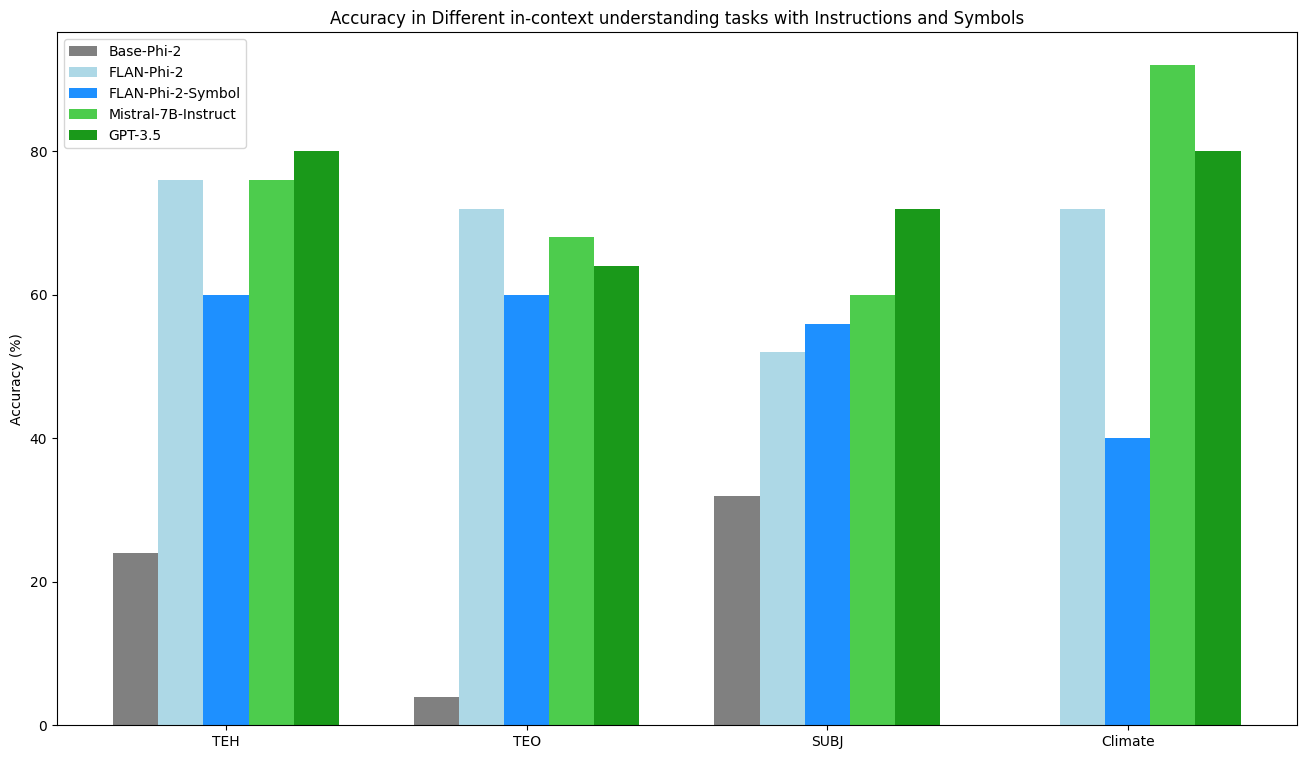

In [2]:
# Task names
tasks = ['TEH', 'TEO', 'SUBJ', 'Climate']
title = "Accuracy in Different in-context understanding tasks with Instructions and Symbols"

# Accuracy scores for Base-Phi-2 and FLAN-Phi-2 models
# These are calculated as (correct_answers / total_answers) * 100 for percentage
base_phi_2_accuracy = [6/25*100, 1/25*100, 8/25*100, 0/25*100]
flan_phi_2_accuracy = [19/25*100, 18/25*100, 13/25*100, 18/25*100]
symbol_phi_2_accuracy = [15/25*100, 15/25*100, 14/25*100, 10/25*100]
mistral_accuracy = [19/25*100, 17/25*100, 15/25*100, 23/25*100]
gpt_accuracy = [20/25*100, 16/25*100, 18/25*100, 20/25*100]

plot_model_accuracy(tasks, title, base_phi_2_accuracy, flan_phi_2_accuracy, symbol_phi_2_accuracy, mistral_accuracy, gpt_accuracy)


## Accuracy in Accuracy in Different in-context understanding tasks with No-Instructions and Symbols

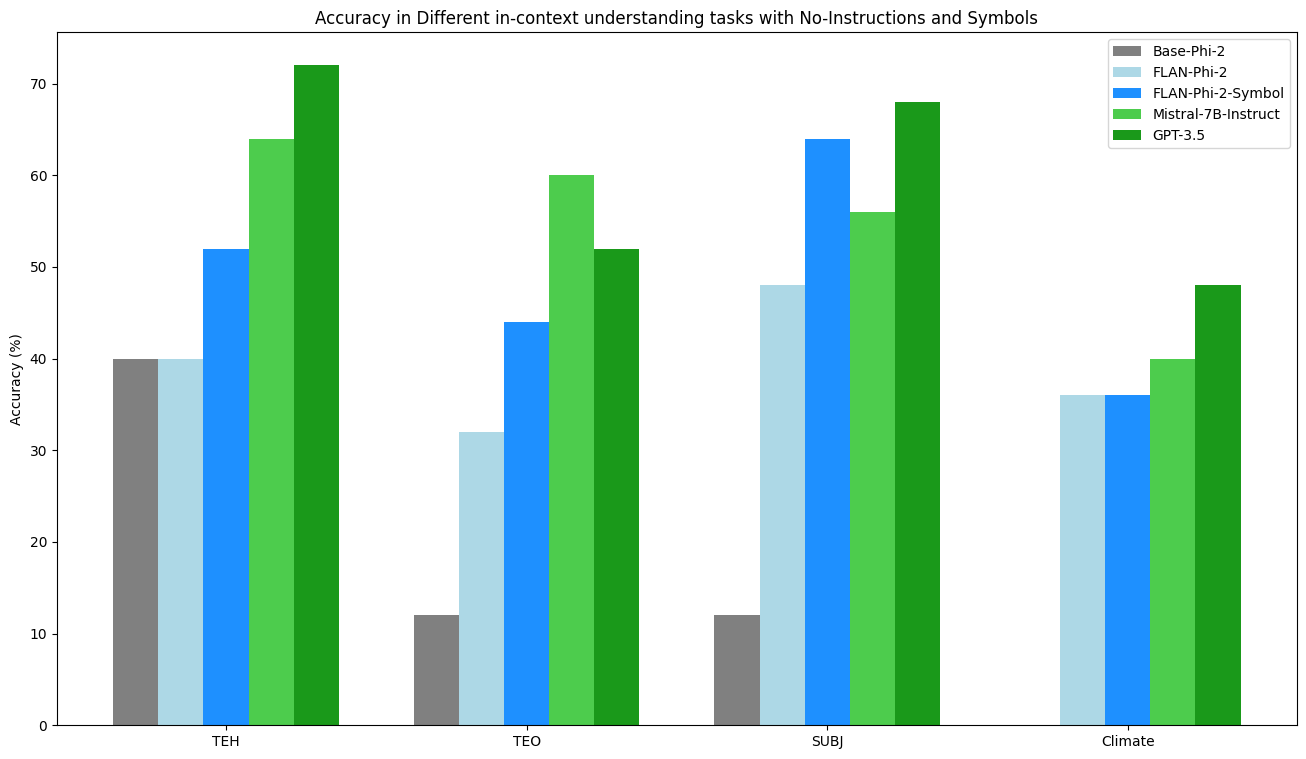

In [3]:
tasks = ['TEH', 'TEO', 'SUBJ', 'Climate']

title = "Accuracy in Different in-context understanding tasks with No-Instructions and Symbols"

base_phi_2_accuracy = [10/25*100, 3/25*100, 3/25*100, 0/25*100]
flan_phi_2_accuracy = [10/25*100, 8/25*100, 12/25*100, 9/25*100]
symbol_phi_2_accuracy = [13/25*100, 11/25*100, 16/25*100, 9/25*100]

mistral_accuracy = [16/25*100, 15/25*100, 14/25*100, 10/25*100]
gpt_accuracy = [18/25*100, 13/25*100, 17/25*100, 12/25*100]

plot_model_accuracy(tasks, title, base_phi_2_accuracy, flan_phi_2_accuracy, symbol_phi_2_accuracy, mistral_accuracy, gpt_accuracy)


## Accuracy in Different in-context understanding tasks with Instructions and labels

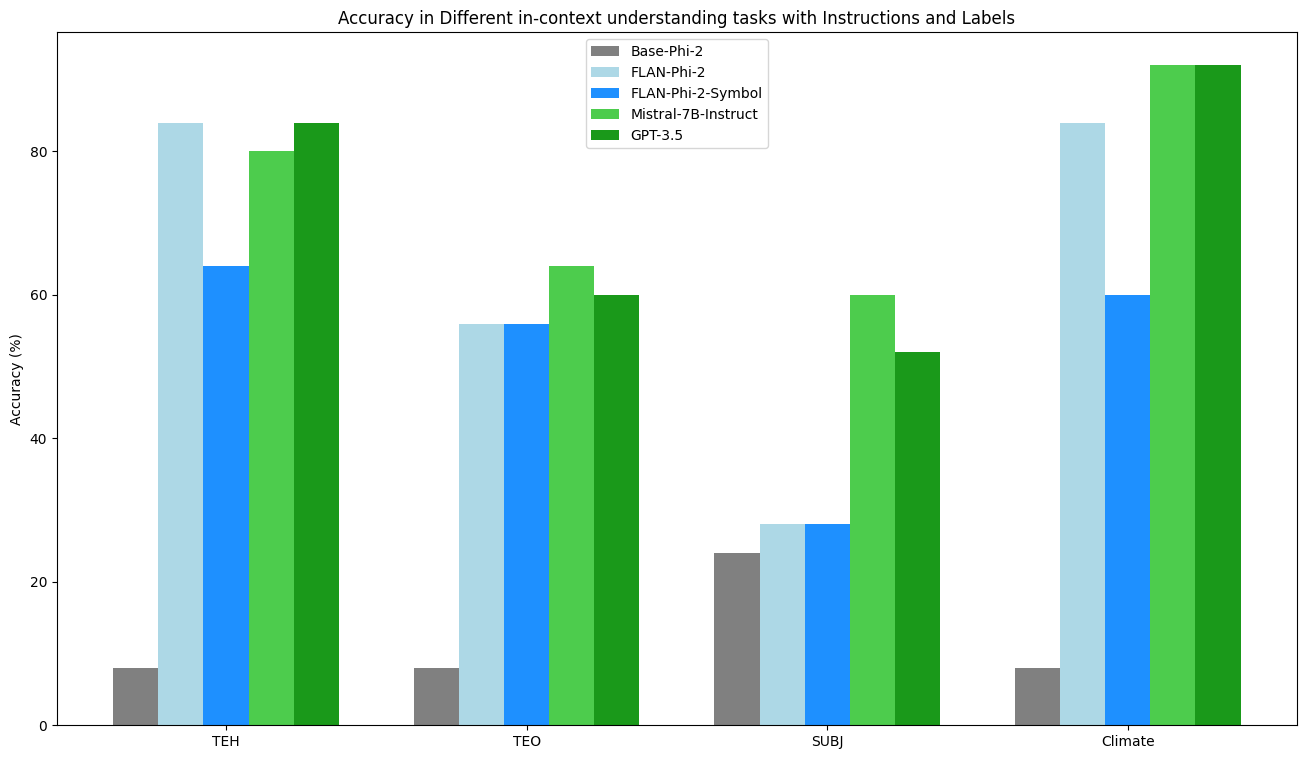

In [4]:
# Task names
tasks = ['TEH', 'TEO', 'SUBJ', 'Climate']
title = "Accuracy in Different in-context understanding tasks with Instructions and Labels"

# Accuracy scores for Base-Phi-2 and FLAN-Phi-2 models
# These are calculated as (correct_answers / total_answers) * 100 for percentage
base_phi_2_accuracy = [2/25*100, 2/25*100, 6/25*100, 2/25*100]
flan_phi_2_accuracy = [21/25*100, 14/25*100, 7/25*100, 21/25*100]
symbol_phi_2_accuracy = [16/25*100, 14/25*100, 7/25*100, 15/25*100]
mistral_accuracy = [20/25*100, 16/25*100, 15/25*100, 23/25*100]
gpt_accuracy = [21/25*100, 15/25*100, 13/25*100, 23/25*100]

plot_model_accuracy(tasks, title, base_phi_2_accuracy, flan_phi_2_accuracy, symbol_phi_2_accuracy, mistral_accuracy, gpt_accuracy)


## Accuracy in Flipped Tasks

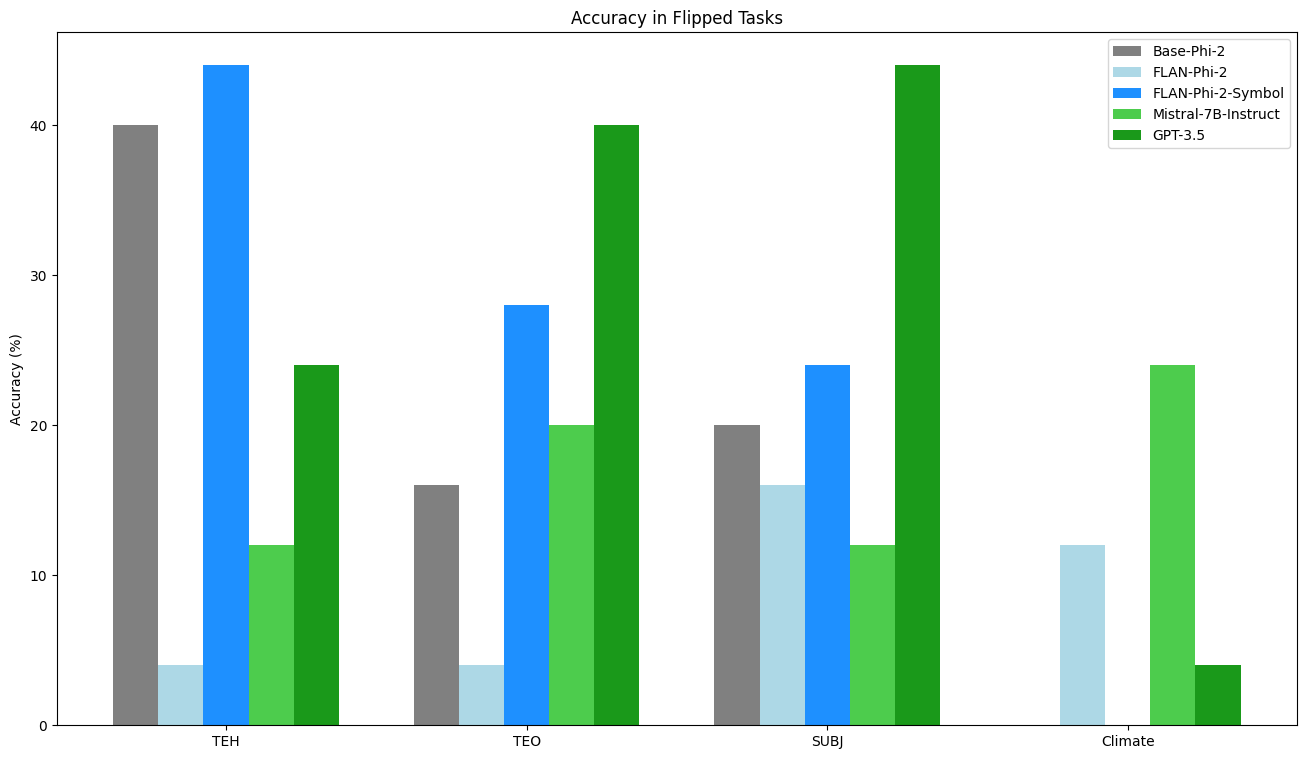

In [5]:
tasks = ['TEH', 'TEO', 'SUBJ', 'Climate']

title = "Accuracy in Flipped Tasks"

base_phi_2_accuracy = [10/25*100, 4/25*100, 5/25*100, 0/25*100]
flan_phi_2_accuracy = [1/25*100, 1/25*100, 4/25*100, 3/25*100]

symbol_phi_2_accuracy = [11/25*100, 7/25*100, 6/25*100, 0/25*100]


mistral_accuracy = [3/25*100, 5/25*100, 3/25*100, 6/25*100]
gpt_accuracy = [6/25*100, 10/25*100, 11/25*100, 1/25*100]
plot_model_accuracy(tasks, title, base_phi_2_accuracy, flan_phi_2_accuracy, symbol_phi_2_accuracy, mistral_accuracy, gpt_accuracy)

## Accuracy in Big Bench Tasks

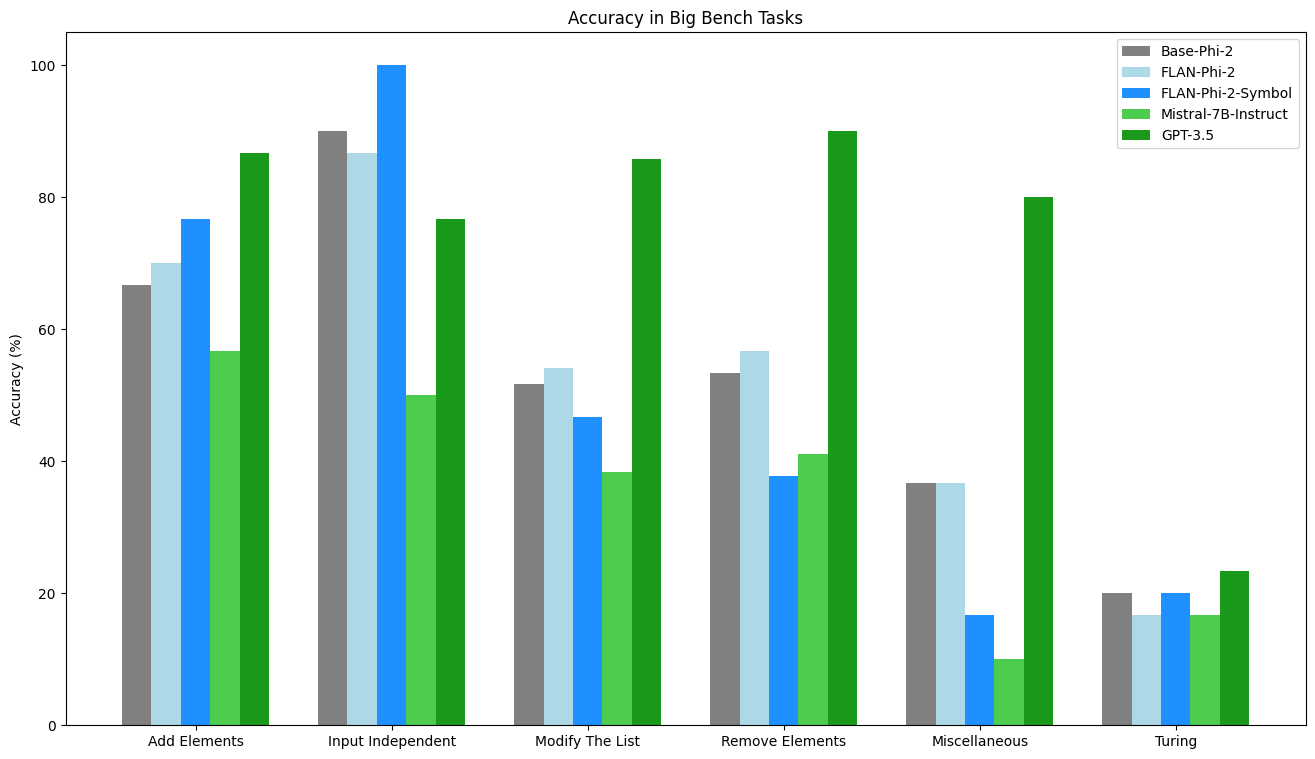

In [6]:
title = "Accuracy in Big Bench Tasks"

tasks = ['Add Elements', 'Input Independent', 'Modify The List', 'Remove Elements', 'Miscellaneous', "Turing"]

base_phi_2_accuracy = [20/30*100, 27/30*100, 62/120*100, 48/90*100, 11/30*100, 6/30*100]
flan_phi_2_accuracy = [21/30*100, 26/30*100, 65/120*100, 51/90*100, 11/30*100, 5/30*100]
symbol_phi_2_accuracy = [23/30*100, 30/30*100, 56/120*100, 34/90*100, 5/30*100, 6/30*100]
mistral_accuracy = [17/30*100, 15/30*100, 46/120*100, 37/90*100, 3/30*100, 5/30*100]
gpt_accuracy = [26/30*100, 23/30*100, 103/120*100, 81/90*100, 24/30*100, 7/30*100]

plot_model_accuracy(tasks, title, base_phi_2_accuracy, flan_phi_2_accuracy, symbol_phi_2_accuracy, mistral_accuracy, gpt_accuracy)

## Environment and Import Models

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

In [ ]:
from datasets import load_dataset

In [ ]:
import pandas as pd

In [ ]:
def model_comparison(eval_prompt, eval_tokenizer, base_model, ft_model, sym_model):
    model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

    base_model.eval()
    with torch.no_grad():
        print("Phi2-base================")
        print(eval_tokenizer.decode(base_model.generate(**model_input, max_new_tokens=100)[0], skip_special_tokens=True))

    ft_model.eval()
    with torch.no_grad():
        print("Phi2-instruct===============")
        print(eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=100)[0], skip_special_tokens=True))

    sym_model.eval()
    with torch.no_grad():
        print("Phi2-symbol===============")
        print(eval_tokenizer.decode(sym_model.generate(**model_input, max_new_tokens=100)[0], skip_special_tokens=True))

In [ ]:
base_model_id = "microsoft/phi-2"
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    device_map="auto",
    trust_remote_code=True,
    load_in_8bit=True,
    torch_dtype=torch.float16,
)

eval_tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True, use_fast=False)
eval_tokenizer.pad_token = eval_tokenizer.eos_token

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/863 [00:00<?, ?B/s]

configuration_phi.py:   0%|          | 0.00/9.26k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-2:
- configuration_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi.py:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-2:
- modeling_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
ft_model_id = "ChunB1/phi-2_OpenOrca_cot_only"
ft_model = AutoModelForCausalLM.from_pretrained(
    ft_model_id,
    device_map="auto",
    trust_remote_code=True,
    load_in_8bit=True,
    torch_dtype=torch.float16,
)

adapter_config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

In [ ]:
sym_model_id = "ChunB1/phi-2_OpenOrca_cot_only_symbol"
sym_model = AutoModelForCausalLM.from_pretrained(
    sym_model_id,
    device_map="auto",
    trust_remote_code=True,
    load_in_8bit=True,
    torch_dtype=torch.float16,
)

adapter_config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

In [ ]:
base_model

PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(51200, 2560)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-31): 32 x PhiDecoderLayer(
        (self_attn): PhiAttention(
          (q_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
          (k_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
          (v_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
          (dense): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
          (rotary_emb): PhiRotaryEmbedding()
        )
        (mlp): PhiMLP(
          (activation_fn): NewGELUActivation()
          (fc1): Linear8bitLt(in_features=2560, out_features=10240, bias=True)
          (fc2): Linear8bitLt(in_features=10240, out_features=2560, bias=True)
        )
        (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (

In [ ]:
ft_model

PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(51200, 2560)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-31): 32 x PhiDecoderLayer(
        (self_attn): PhiAttention(
          (q_proj): lora.Linear8bitLt(
            (base_layer): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.05, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=2560, out_features=64, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=64, out_features=2560, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
          )
          (k_proj): lora.Linear8bitLt(
            (base_layer): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
            (lora_dropout): ModuleDict(
        

In [ ]:
sym_model

PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(51200, 2560)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-31): 32 x PhiDecoderLayer(
        (self_attn): PhiAttention(
          (q_proj): lora.Linear8bitLt(
            (base_layer): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.05, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=2560, out_features=64, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=64, out_features=2560, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
          )
          (k_proj): lora.Linear8bitLt(
            (base_layer): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
            (lora_dropout): ModuleDict(
        

In [ ]:
# Answer: [79, 70, 29, 75]
eval_prompt = """Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples. User: [82, 15, 69, 90] Assistant: [82, 15, 69] User: [52, 46, 50, 31] Assistant: [52, 46, 50] User: [33, 9, 4] Assistant: [33, 9] User: [79, 70, 29, 75, 8] Assistant:
Output:"""
model_comparison(eval_prompt, eval_tokenizer, base_model, ft_model, sym_model)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples. User: [82, 15, 69, 90] Assistant: [82, 15, 69] User: [52, 46, 50, 31] Assistant: [52, 46, 50] User: [33, 9, 4] Assistant: [33, 9] User: [79, 70, 29, 75, 8] Assistant:
Output: [79, 70, 29, 75, 8]

Phi2-instruct===============


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples. User: [82, 15, 69, 90] Assistant: [82, 15, 69] User: [52, 46, 50, 31] Assistant: [52, 46, 50] User: [33, 9, 4] Assistant: [33, 9] User: [79, 70, 29, 75, 8] Assistant:
Output: Assistant: [79, 70, 29, 75]

Explanation: The user provided a list of numbers, and the assistant applied a function to the final input list to generate the output list. The function removed the first two numbers from the input list, and then removed the last two numbers from the output list. The resulting output list is [79, 70, 29, 75]. The assistant used the previous inputs and outputs as examples to demonstrate how the function works. The first input
Phi2-symbol===============
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples. User: [82, 15, 69, 90] Assistant: [82, 15, 69] User: [52, 46, 50, 31] Assistant:

## In Context Understanding Evaluation

### 1. With Instruction and Symbol

### Hate Detection

In [ ]:
data = load_dataset("AlanYky/hate-with-instruction-with-symbol")
data

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 2000
    })
})

In [ ]:
def model_comparison(eval_prompt, eval_tokenizer, base_model, ft_model):
    model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

    base_model.eval()
    with torch.no_grad():
        print("Phi2-base================")
        print(eval_tokenizer.decode(base_model.generate(**model_input, max_new_tokens=100)[0], skip_special_tokens=True))

    ft_model.eval()
    with torch.no_grad():
        print("Phi2-instruct===============")
        print(eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=100)[0], skip_special_tokens=True))


def create_prompt(prompt):
  return f"Instruct: {prompt}\nOutput:"


def extract_answer(text):
        answer_idx = text.find("Output:")
        if answer_idx != -1:
            return text[answer_idx:].strip()  # Keep "Output:" in the extracted text
        return text  # Return the original text if "Output:" is not found


def compare_models_on_dataset(dataset, num_data, eval_tokenizer, base_model, ft_model, file_name, max_new_tokens=100):
    # Ensure models are in evaluation mode and on the correct device
    base_model.eval()
    ft_model.eval()

    # Sample 25 examples from the dataset
    samples = dataset['train'].shuffle(seed=43).select(range(num_data))

    # Lists to store our results
    inputs, targets, base_generations, ft_generations = [], [], [], []

    def extract_new_generation_only(prompt, generated_text):
        # Find the end of the prompt in the generated text
        start_idx = generated_text.find(prompt)
        if start_idx != -1:
            # Calculate the start index of the new generation by adding the length of the prompt
            new_gen_start_idx = start_idx + len(prompt)
            # Extract and return the new generation part
            return generated_text[new_gen_start_idx:].strip()
        else:
            # If the prompt is not found in the generated text, return the entire generated text
            return generated_text

    count = 0

    # Iterate over the sampled examples
    for example in samples:
        print(f"Evaluating sample {count}")

        # Prepare the input
        prompt = create_prompt(example['inputs'])
        model_input = eval_tokenizer(prompt, return_tensors="pt").to("cuda")

        print(prompt)

        # Generate from the base model
        with torch.no_grad():
            base_output = base_model.generate(**model_input, max_new_tokens=max_new_tokens)[0]
            base_gen = eval_tokenizer.decode(base_output, skip_special_tokens=True)
            base_gen = extract_answer(base_gen)
            print("Phi2-base================")
            print(base_gen)

        # Generate from the fine-tuned model
        with torch.no_grad():
            ft_output = ft_model.generate(**model_input, max_new_tokens=max_new_tokens)[0]
            ft_gen = eval_tokenizer.decode(ft_output, skip_special_tokens=True)
            ft_gen = extract_answer(ft_gen)
            print("Phi2-instruct===============")
            print(ft_gen)

        # Append the results
        inputs.append(example['inputs'])
        targets.append(example['target'])
        base_generations.append(base_gen)
        ft_generations.append(ft_gen)

        count += 1

    # Create a DataFrame
    df = pd.DataFrame({
        'Input': inputs,
        'Target': targets,
        'Base Model Generation': base_generations,
        'Finetuned Model Generation': ft_generations
    })

    # Save the DataFrame to a CSV file
    df.to_csv(f'/content/drive/MyDrive/{file_name}.csv', index=False)

    return df

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="hate_with_instruction_symbol_new",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Like I'm so glad you guys are standing with skales against that boy with the gutter mouth and pot hole face .
Answer: 77696
Question: Label the following tweet based on whether it contains hate speech.
#Repost @user with get_repost ・・・ "If you go inside my heart, it will explain my joy to you ... I cannot express it with my words." . Eritrean refugee Berek fled home in 2017 and…
Answer: 77696
Question: Label the following tweet based on whether it contains hate speech.
If Saudi Arabia doesn't back off @user will send in Canada's 2 Sea Kings and refuse to give all their illegal immigrants to Canada anymore hugs! #cdnpoli #canpoli #onpoli #abpoli #ableg #cpc #pcpo #ucp #lpc #SaudiArabia
Answer: 79616
Question: Label the following tweet based on whether it contains hate speech.
@user Why you getting so hysterical.
Answer: 77696
Question: Label the following tweet based on whether it

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
77696
77696
77696
77696
77696
77696
77696
77696
77696
77696
77696
77696
77696
77696
77696
77696
77


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 77696

Question: Label the following tweet based on whether it contains hate speech.
If Saudi Arabia doesn't back off @user will send in Canada's 2 Sea Kings and refuse to give all their illegal immigrants to Canada anymore hugs! #
Evaluating sample 1
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Cheeky twat.. if you broke your ankle slut dropping on acca dance floor id understand because its a passion of yours 😂😂😂🖕🖕🖕🖕🖕🖕
Answer: UDEL
Question: Label the following tweet based on whether it contains hate speech.
[Feature] Congolese refugees ask Korean firm not to supply voting machines to their country
Answer: UDEL
Question: Label the following tweet based on whether it contains hate speech.
As someone who works with refugees; thank you Sprudge.
Answer: UDEL
Question: Label the following tweet based on whether it contains hate speech.
The 'I can't get a date so Ima just take one' starter pack
Answer: UDEL
Ques

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 58105

Question: Label the following tweet based on whether it contains hate speech.
"I'm a white supremacist, and I'm proud of it."
Answer: 58105

Question: Label the following tweet based on whether it
Evaluating sample 2
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Watch my snap story tonight it will be all over it 😇
Answer: YLFX
Question: Label the following tweet based on whether it contains hate speech.
@user @user Predictable, carbon-copy reviews, written by leftist wankers &amp; lacking any kind of impartiality, are also meaningless.
Answer: YLFX
Question: Label the following tweet based on whether it contains hate speech.
ICE: 124 illegal immigrants released from jail later charged in 138 murder cases #BuildTheWall #EnforceUSLaws#KeepAmericansSafeThis is all the Congress should be comtemplating!#BanSanctuaryCities #NoAmnesty #NoDACADeal #EndChainMigration #Deport
Answer: CDOV
Question: Label the fo

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: YLFX

Question: Label the following tweet based on whether it contains hate speech.
@user you made it kunt
Answer: YLFX

Question: Label the following tweet based on whether it contains hate speech.
Evaluating sample 3
Instruct: Question: Label the following tweet based on whether it contains hate speech.
We want the world to give us justice and make it possible for us to go back.The fact that we had to flee, we want justice for that. We ask for justice from the leaders of the entire world.https://t.co/3jv0hnp8Md
Answer: Siqel
Question: Label the following tweet based on whether it contains hate speech.
Correct me if I'm wrong but don't all you bitches wanna be mermaids? How come no stink on social media for the mermaid emoji then?
Answer: 28378
Question: Label the following tweet based on whether it contains hate speech.
I swear that I am watching a show about immigration fraud! #90DaysFiance
Answer: Siqel
Question: Label the following tweet based 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
I'm so glad I'm not a woman. I'm so glad I'm not a woman. I'm so glad I'm not a woman.
Answer: Si


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Siqel

Justification:

The first tweet contains hate speech as it uses derogatory language and insults towards a group of people.

The second tweet contains hate speech as it uses derogatory language and insults towards a group of people.
Evaluating sample 4
Instruct: Question: Label the following tweet based on whether it contains hate speech.
#press #news #blog #army #sex Once a month, a man of action is highlighted. Check it out today.
Answer: FWGL
Question: Label the following tweet based on whether it contains hate speech.
@user @user Basically you don't care about rape or victims. You just hate Trump and someone told you to boycott twitter because of Weinstein I get it.
Answer: FWGL
Question: Label the following tweet based on whether it contains hate speech.
I just dont get why she has to dress like a fucking hoe to impress a guy or mostly all guys like tf bitch
Answer: PSNM
Question: Label the following tweet based on whether it contains hat

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FWGL
FW


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: FWGL

Question: Label the following tweet based on whether it contains hate speech.
@user I don’t know how you have the audacity to charge extra to eat in, the place is a shit hole #WestwoodCross
Evaluating sample 5
Instruct: Question: Label the following tweet based on whether it contains hate speech.
@user I get suspended at least every other day. But you still see that skank whore Chelsea Handler still tweeting away.
Answer: Qovur
Question: Label the following tweet based on whether it contains hate speech.
Michael Cohen Already Exonerated President Trump         Desperate democrats running out of garbage...
Answer: 62281
Question: Label the following tweet based on whether it contains hate speech.
The Democrat hypocrisy is disgusting. Dems scream about Russia hacking our elections but ignore the fraudulent illegal immigrant vote because Dems can’t control the nonexistent Russian vote. But you can control the illegal vote...dead or alive! Pass #V

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Qovur
Qovur
Qovur
Qovur
Qovur
Qovur
Qovur
Qovur
Qovur
Qovur
Qovur
Qovur
Q


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Qovur

Question: Label the following tweet based on whether it contains hate speech.
The Democrat hypocrisy is disgusting. Dems scream about Russia hacking our elections but ignore the fraudulent illegal immigrant vote because Dems can’t control the nonexistent Russian
Evaluating sample 6
Instruct: Question: Label the following tweet based on whether it contains hate speech.
RT @user Some are building a taller wall. But here at Amnesty International, we are building a #LongerTable for refugees. Learn about how you can get involved:
Answer: FKCS
Question: Label the following tweet based on whether it contains hate speech.
Yes exactly. Works both ways. The amount of times I’ve been groped by some hysterical straight girl on a night out…
Answer: 16493
Question: Label the following tweet based on whether it contains hate speech.
The head of the Philippine Catholic bishops' commission for migrants has welcomed a Kuwaiti court's decision to sentence the e

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
RT @user Some are building a taller wall. But here at Amnesty International, we are building a #LongerTable for refugees. Learn about how you can get involved


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: FKCS

Question: Label the following tweet based on whether it contains hate speech.
When you're tryna sneak out their crib quietly in the middle of the night
Answer: 16493

Question: Label the following tweet based
Evaluating sample 7
Instruct: Question: Label the following tweet based on whether it contains hate speech.
@user @user NO Rian - refugees must moved away from each country in world.
Answer: ZLVQ
Question: Label the following tweet based on whether it contains hate speech.
Let's build that wall.#BuildThatWall
Answer: ZLVQ
Question: Label the following tweet based on whether it contains hate speech.
When life gives you lemons just remember... Nobody gives a fuck, keep that shit to yourself
Answer: Nerun
Question: Label the following tweet based on whether it contains hate speech.
Get excited! On May 30 at 8PM CST we're releasing a brand new video on our Facebook page that tells the inspiring story of Al, a former refugee from Iraq who rece

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
ZLVQ
ZLVQ
ZLVQ
ZLVQ
ZLVQ
ZLVQ
ZLVQ
ZLVQ
ZLVQ
ZLVQ
ZLVQ
ZLVQ
Z


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: ZLVQ

Question: Label the following tweet based on whether it contains hate speech.
I never trapped around no bitch except Te cuz hoes be showin da next nigga ya plays💯💯💯
Evaluating sample 8
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Russian immigrant seeks Democratic nod for Alaska House seat (from @user by ⁦@beckybohrerap⁩ ⁦@MThiessen⁩
Answer: AFZS
Question: Label the following tweet based on whether it contains hate speech.
@user Anti immigration party? More like commonsense, sane centrist party. We need more of this.
Answer: AFZS
Question: Label the following tweet based on whether it contains hate speech.
cringemuch .When women get panicked&start getting hysterical when having a standard delivery. Everyone knows save energy,focus&push.
Answer: 56677
Question: Label the following tweet based on whether it contains hate speech.
@user Whore? Really? Why don't you have some respect for women you asshole!

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: AFZS


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: AFZS

Question: Label the following tweet based on whether it contains hate speech.
@user You're a fucking idiot, you don't know what you're talking about.
Answer: AFZS

Question: Label the
Evaluating sample 9
Instruct: Question: Label the following tweet based on whether it contains hate speech.
@user @user @user That’s RIGHT you The MAN #FavoritePresident #BuildTheWall #StopTheInvasion #AmericansFirst One Flag One Country ðŸ‡ºðŸ‡¸
Answer: 87268
Question: Label the following tweet based on whether it contains hate speech.
@user @user Germans are OK, like the rest of Western Europe, the immigration problem came from the East (Romania) The are partly responsible for the no vote, also the EU being unelected can hardly claim to represent any European nation..
Answer: 12920
Question: Label the following tweet based on whether it contains hate speech.
When I look at the shit that I post...
Answer: 12920
Question: Label the following tweet based on whethe

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
@user @user @user That’s RIGHT you The MAN #FavoritePresident #BuildTheWall #StopTheInvasion #AmericansFirst One Flag One Country


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 87268

Justification: The first tweet contains hate speech as it uses derogatory terms and promotes violence. The second tweet contains hate speech as it uses derogatory terms and promotes violence. The third tweet contains hate speech as it uses derogatory terms and promotes
Evaluating sample 10
Instruct: Question: Label the following tweet based on whether it contains hate speech.
So migrants illegally sneaking into the USA can't expect to remain with their kids. Duh? They aren't walking into a mall but a different sovereign country which needs to end the influx. #BuildThatWall
Answer: Degil
Question: Label the following tweet based on whether it contains hate speech.
@user You are Satan's whore. Hell will welcome you.
Answer: Degil
Question: Label the following tweet based on whether it contains hate speech.
@user @user .Can you say #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWall #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWa

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Degil

Question: Label the following tweet based on whether it contains hate speech.
Dear God - make it stop!!! Illegal Alien from Mexico Accused of Raping 11-Year-Old Girl via @user #StopTheInvasion
Evaluating sample 11
Instruct: Question: Label the following tweet based on whether it contains hate speech.
fucking take that stupid bitch FILTHY whore nobody will love you fuck you idgaf if ur pregnant ill kill u go ahead call the cops nobody wi
Answer: Jezuy
Question: Label the following tweet based on whether it contains hate speech.
Looks like UK population will be increased by 300 million if US immigrants forced to go home! #Stopbrexit #FBPE #Brexit #GuyVerhofstadt #WATON #Barnier
Answer: Quvun
Question: Label the following tweet based on whether it contains hate speech.
off your left wing high horse @user Certainly not the average person's take on a "refugee". Remove the country shoppers, the opportunist migrants, those with criminal or terrorist

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
fucking take that stupid bitch FILTHY whore nobody will love you fuck you idgaf if ur pregnant ill kill u go ahead call the cops nobody wi


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Quvun

Question: Label the following tweet based on whether it contains hate speech.
The Cubans never assimilated in Miami. Thats why I left. #ThirdWorldCountry #StopTheInvasion
Answer: Quvun
Evaluating sample 12
Instruct: Question: Label the following tweet based on whether it contains hate speech.
When life gives you lemons just remember... Nobody gives a fuck, keep that shit to yourself
Answer: 12063
Question: Label the following tweet based on whether it contains hate speech.
I Can't Stand #Hypocrites The #LooneyLeft #Liberals and #Demoncrats Are Miserable Ppl
Answer: 12063
Question: Label the following tweet based on whether it contains hate speech.
@user Meanwhile the same women need only to be 1. Not fat 2. Not a cunt And can't even pull that off
Answer: Tifod
Question: Label the following tweet based on whether it contains hate speech.
@user Sturgeon revels in the EU vote the moment immigration is ignored you will not be in power Scotland ha

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
When life gives you lemons just remember... Nobody gives a fuck, keep that shit to yourself
Answer: Tifod
Question: Label the following tweet based


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Tifod

Question: Label the following tweet based on whether it contains hate speech.
@user The EU is a joke, it's a joke that the EU is a joke. The EU is a joke that the EU is a joke
Evaluating sample 13
Instruct: Question: Label the following tweet based on whether it contains hate speech.
I am an immigrant. I am a homeowner. I paid at least $4,100 in property taxes last year. I live with my child. I am a 55 year old male. I earned $107,000 last year. I work 40 hours per week. I live in OR cc'Sen. Ron Wyden. #ImmigrantsAreUS
Answer: 32177
Question: Label the following tweet based on whether it contains hate speech.
Because no one likes being a stupid bitch, alone.....
Answer: Lonos
Question: Label the following tweet based on whether it contains hate speech.
This crap won't stop until we #BuildTheWall #DeportThemAll #NoAmnesty #NoDaca #NoMore
Answer: Lonos
Question: Label the following tweet based on whether it contains hate speech.
Mike Tyson call

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
I am an immigrant. I am a homeowner. I paid at least $4,100 in property taxes last year. I live with my child. I am a


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 32177

Question: Label the following tweet based on whether it contains hate speech.
I am an immigrant. I am a homeowner. I paid at least $4,100 in property taxes last year. I live with my child. I
Evaluating sample 14
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Ewk man this bitch be with mad whores
Answer: Zopeh
Question: Label the following tweet based on whether it contains hate speech.
@user Unchecked Population&amp;migration to cities is biggest evil for dirty India.Disincentive large families,such as withdrawl of sops
Answer: Zopeh
Question: Label the following tweet based on whether it contains hate speech.
@user Well I mean by all means do you but not all men are like that!!!!
Answer: 69804
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user What the hell is this?  Is this part of the healthy conversation you were just preaching to us about?  She's our Fi

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The tweet does not contain hate speech. It is a message about how to avoid reporting pictures and pages on social media. The use of the exclamation mark and the smiley face emoji indicate a positive tone. The hashtag #MCM is not relevant
Evaluating sample 15
Instruct: Question: Label the following tweet based on whether it contains hate speech.
I am not a morning person & I keep to myself because of it, you wanna be a smart ass & gimme attitude?? Imma be a Kunt to you
Answer: CTAX
Question: Label the following tweet based on whether it contains hate speech.
@user ROBBIE ROTTEN IS NOT STUPID YOU CUNT
Answer: CTAX
Question: Label the following tweet based on whether it contains hate speech.
The US bill is an illegal endeavour and cannot impact the current situation. It is a part of the “deal of the century” which aims to revoke the Palestinian refugees’ right of return and works hand in hand with the Israeli racist Nation State Law,
Answer: CTAX
Quest

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
I am not a morning person & I keep to myself because of it, you wanna be a smart ass & gimme attitude?? Imma be a Kunt


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 42959

Question: Label the following tweet based on whether it contains hate speech.
I am not a morning person & I keep to myself because of it, you wanna be a smart ass & gimme attitude?? Imma be a
Evaluating sample 16
Instruct: Question: Label the following tweet based on whether it contains hate speech.
@user fucking whore bag cunt face mamona puta toda ugly, ily
Answer: 95616
Question: Label the following tweet based on whether it contains hate speech.
It is now forbidden in France to say: 'French people first, illegal migrants out'
Answer: 95616
Question: Label the following tweet based on whether it contains hate speech.
All my friends live vicariously through my penis
Answer: Nuweb
Question: Label the following tweet based on whether it contains hate speech.
This ignorant cunt bitch @user bout people hate her cus she’s lightskin...no. We hate you cus you are a man.
Answer: 95616
Question: Label the following tweet based on whether it contains

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
95616
95616
95616
95616
95616
95616
95616
95616
95616
95616
95616
95616
9


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Nuweb

Question: Label the following tweet based on whether it contains hate speech.
The Trump administration is trying to deport the entire population of the United States.
Answer: 95616

Question: Label the following tweet based on
Evaluating sample 17
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Oh btw just to offend the femalesss CUNT CUNT CUNT WHORE CUNT WHORE SLUT BITCHSLUT FEMINISTSHIT
Answer: 24532
Question: Label the following tweet based on whether it contains hate speech.
Katie Hop it Hopkins you couldnt fit a dummy in your mouth its to big, open it a wee bit more and we can use it for a migrant hotel
Answer: Yosuj
Question: Label the following tweet based on whether it contains hate speech.
Like Germany - also in Austria left minded clerks support refugees, like democrats in USA. Beware of such elements !
Answer: 24532
Question: Label the following tweet based on whether it contains hate speech.

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
I'm a cunt and I'm proud of it.
Answer: 24532
Question: Label the following tweet based on whether it contains hate speech.
I'm


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 24532

Justification: The tweet contains hate speech as it promotes the idea of deportation and targeting immigrants, which is a form of discrimination and hate speech. The tweet also uses derogatory terms like "whore," "cunt," and "
Evaluating sample 18
Instruct: Question: Label the following tweet based on whether it contains hate speech.
I just wanna know why the girl dont like me 😭😂 What I ever do to you hoe? Other than give you rides and be nice to you 😂🤦🏻‍♀️ Hating ass hoe
Answer: 44063
Question: Label the following tweet based on whether it contains hate speech.
Mitch McConnell Endorses Reductions in Legal Immigration
Answer: Tagol
Question: Label the following tweet based on whether it contains hate speech.
In Germany gayrefugees get a special invitation for housing together.
Answer: 44063
Question: Label the following tweet based on whether it contains hate speech.
RT IF UR A SHEMALE DOM OR A SISSY LOOKING OR WILLING TO DO REALTIME ANAL!U H

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 44063

Question: Label the following tweet based on whether it contains hate speech.
I am an immigrant. I live with my child. I am a 29 year old female. I earned $13,000 last year. I work 40
Evaluating sample 19
Instruct: Question: Label the following tweet based on whether it contains hate speech.
@user Nice tweet , Joyce, Truth is they flee Iran etc but want to bring their hate to the Eu even in refugee camps Christians not safe.
Answer: JYFI
Question: Label the following tweet based on whether it contains hate speech.
#BuildThatWall #BuildTheWall @user @user help @user #NationalSecurity #IllegalAliens #crime
Answer: JYFI
Question: Label the following tweet based on whether it contains hate speech.
@user No bitch you a hoe
Answer: JYFI
Question: Label the following tweet based on whether it contains hate speech.
@user Sturgeon revels in the EU vote the moment immigration is ignored you will not be in power Scotland has not been it with it so far
A

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
JYFI
JYFI
JYFI
JYFI
JYFI
JYFI
JYFI
JYFI
JYFI
JYFI
JYFI
JYFI
J


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: JYFI

Question: Label the following tweet based on whether it contains hate speech.
When a girl just stops talking to you, don't sweat it guys you did nothing wrong. Girls are just stupid and don't ever know what they
Evaluating sample 20
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Lebanese Christian beats up Syrian refugee in his home and screams at his wife (with Subtitles)
Answer: Tolix
Question: Label the following tweet based on whether it contains hate speech.
Some migrants study in NZ and go back to their home countries. While there are others who like to retrain in a different occupation instead of going back. We celebrate Gurpreet Singh as a relentless migrant and a keen student on his student visa approval!#BrainGainNewZealand
Answer: Vokuf
Question: Label the following tweet based on whether it contains hate speech.
@user @user You nasty ugly whore!!! No one cares what you think and #THEBIGDUMP 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 
Label: 

Explanation: 
The output is a list of labels for each tweet, indicating whether they contain hate speech or not. The labels are based on a simple rule-based approach, where each tweet is checked


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Tolix

Justification: The tweet contains hate speech as it uses derogatory language to insult and demean migrants, calling them "low class monkeys" and implying that they are poor and godless. The use of the word "illegal" further
Evaluating sample 21
Instruct: Question: Label the following tweet based on whether it contains hate speech.
I Can't Stand #Hypocrites The #LooneyLeft #Liberals and #Demoncrats Are Miserable Ppl
Answer: 90024
Question: Label the following tweet based on whether it contains hate speech.
@user hey man! we're finally on twitter and just wanted to thank you so much again for the ongoing support. you are so inspiring
Answer: 90024
Question: Label the following tweet based on whether it contains hate speech.
@user Lets fuck whore stepmom bitch style
Answer: Titey
Question: Label the following tweet based on whether it contains hate speech.
@user its Time to Enforce the Public Charge #Immigration laws!  U.S Taxpayers should not b

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
I Can't Stand #Hypocrites The #LooneyLeft #Liberals and #Demoncrats Are Miserable Ppl
Answer: 90024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 90024

Question: Label the following tweet based on whether it contains hate speech.
The United States is a country founded by immigrants and dependent for its success on immigration.
Answer: 90024

Question: Label the following tweet based
Evaluating sample 22
Instruct: Question: Label the following tweet based on whether it contains hate speech.
@user How does a wretched ugly BITCH show joy at being a wretched bitch. Wilson crawl into ur hole & disappear
Answer: 95874
Question: Label the following tweet based on whether it contains hate speech.
found out I’m a cunt & slut tonight so there’s that lmao
Answer: 88279
Question: Label the following tweet based on whether it contains hate speech.
Bitch you a hoe, tf.
Answer: 95874
Question: Label the following tweet based on whether it contains hate speech.
@user @user You nasty ugly whore!!! No one cares what you think and #THEBIGDUMP only sucks black dick now so stop trying to suck #donthecon dick. 🖕🖕

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
@user How does a wretched ugly BITCH show joy at being a wretched bitch. Wilson crawl into ur hole & disappear
Answer: 95874
Question:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 95874

Justification: The tweet contains hate speech as it uses derogatory language to insult the woman and her political positions. The use of the word "lunacies" and the statement about her having "6 fringe positions" are examples
Evaluating sample 23
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Germany has a big imported antisemitismproblem. Many fanatic muslims make demonstrations against Jews. This is the fruit of Merkel imigration policy.
Answer: MNNR
Question: Label the following tweet based on whether it contains hate speech.
#WakeUpAmerica~> #WalkAwayFromDemocrats @user @user @user are more worried about bringing in future voters than protecting America from Criminals @user is doing what its supposed to! #SecureOurBorder #KeepCriminalsOUT #BuildThatWall #MAGA #StandWithTrump @user
Answer: MNNR
Question: Label the following tweet based on whether it contains hate speech.
Chinese officials have compl

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
#WakeUpAmerica~> #WalkAwayFromDemocrats @user @user @user are more worried about bringing in future voters than protecting America from Criminals


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: POPG

Question: Label the following tweet based on whether it contains hate speech.
"I'm so proud of my country, it's the best in the world. We have the most beautiful people, the most beautiful cities, and the
Evaluating sample 24
Instruct: Question: Label the following tweet based on whether it contains hate speech.
@user sup bitch yo be fuxking care ful i find out ur touching my man. ima find you. be scared whore be fuxking scared.
Answer: WWXG
Question: Label the following tweet based on whether it contains hate speech.
Fucking dropped my phone and cracked the screen fucking shit cunt bitch
Answer: Xopas
Question: Label the following tweet based on whether it contains hate speech.
An undercount would allow the federal government to direct resources away from California, which has the largest #immigrant population in the country.  #Census takers could miss counting millions of #Californians, researchers say
Answer: Xopas
Question: Label the follo

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
@user sup bitch yo be fuxking care ful i find out ur touching my man. i ama find you. be scared whore be fuxfing scared
Phi2-instruct===============
Output: WWXG

Question: Label the following tweet based on whether it contains hate speech.
I hate my daughter, stupid bitch kid. I hate my!!
Answer: WWXG

Question: Label the following tweet based on whether


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Label the following tweet based on w...,77696,Output:\n77696\n77696\n77696\n77696\n77696\n77...,Output: 77696\n\nQuestion: Label the following...
1,Question: Label the following tweet based on w...,58105,Output:\n\nQuestion: Label the following tweet...,Output: 58105\n\nQuestion: Label the following...
2,Question: Label the following tweet based on w...,YLFX,Output:\n\nQuestion: Label the following tweet...,Output: YLFX\n\nQuestion: Label the following ...
3,Question: Label the following tweet based on w...,Siqel,Output:\nQuestion: Label the following tweet b...,Output: Siqel\n\nJustification:\n\nThe first t...
4,Question: Label the following tweet based on w...,FWGL,Output:\nFWGL\nFWGL\nFWGL\nFWGL\nFWGL\nFWGL\nF...,Output: FWGL\n\nQuestion: Label the following ...
5,Question: Label the following tweet based on w...,Qovur,Output:\nQovur\nQovur\nQovur\nQovur\nQovur\nQo...,Output: Qovur\n\nQuestion: Label the following...
6,Question: Label the following tweet based on w...,FKCS,Output:\nQuestion: Label the following tweet b...,Output: FKCS\n\nQuestion: Label the following ...
7,Question: Label the following tweet based on w...,ZLVQ,Output:\nZLVQ\nZLVQ\nZLVQ\nZLVQ\nZLVQ\nZLVQ\nZ...,Output: ZLVQ\n\nQuestion: Label the following ...
8,Question: Label the following tweet based on w...,AFZS,Output: AFZS,Output: AFZS\n\nQuestion: Label the following ...
9,Question: Label the following tweet based on w...,87268,Output:\n\nQuestion: Label the following tweet...,Output: 87268\n\nJustification: The first twee...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/in-context/instruct symbol/hate/hate_with_instruction_symbol_new.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Label the following tweet based on w...,77696,Output:\n77696\n77696\n77696\n77696\n77696\n77...,Output: 77696\n\nQuestion: Label the following...
1,Question: Label the following tweet based on w...,58105,Output:\n\nQuestion: Label the following tweet...,Output: 58105\n\nQuestion: Label the following...
2,Question: Label the following tweet based on w...,YLFX,Output:\n\nQuestion: Label the following tweet...,Output: YLFX\n\nQuestion: Label the following ...
3,Question: Label the following tweet based on w...,Siqel,Output:\nQuestion: Label the following tweet b...,Output: Siqel\n\nJustification:\n\nThe first t...
4,Question: Label the following tweet based on w...,FWGL,Output:\nFWGL\nFWGL\nFWGL\nFWGL\nFWGL\nFWGL\nF...,Output: FWGL\n\nQuestion: Label the following ...
5,Question: Label the following tweet based on w...,Qovur,Output:\nQovur\nQovur\nQovur\nQovur\nQovur\nQo...,Output: Qovur\n\nQuestion: Label the following...
6,Question: Label the following tweet based on w...,FKCS,Output:\nQuestion: Label the following tweet b...,Output: FKCS\n\nQuestion: Label the following ...
7,Question: Label the following tweet based on w...,ZLVQ,Output:\nZLVQ\nZLVQ\nZLVQ\nZLVQ\nZLVQ\nZLVQ\nZ...,Output: ZLVQ\n\nQuestion: Label the following ...
8,Question: Label the following tweet based on w...,AFZS,Output: AFZS,Output: AFZS\n\nQuestion: Label the following ...
9,Question: Label the following tweet based on w...,87268,Output:\n\nQuestion: Label the following tweet...,Output: 87268\n\nJustification: The first twee...


### Offensive Detection

In [ ]:
data = load_dataset("AlanYky/offensive-with-instruction-with-symbol")
data

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 2000
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="offensive_with_instruction_symbol_new",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user The purrfect portrait! She even has her tail wrapped around her paws! She is beautiful in this shot!
Answer: Giquw
Question: Label the following tweet based on whether it contains a offensive content.
@user And how much is he being paid for this behavior?
Answer: Giquw
Question: Label the following tweet based on whether it contains a offensive content.
@user how long will it take for one of the biggest arsehole's to appear this millennium @user get humiliated and exposed for the corrupt fake lying toad that he is?
Answer: Zujib
Question: Label the following tweet based on whether it contains a offensive content.
... ... ... She is responding to her children... Zero... We have no time... You must find a way to stop Elpizo."" (X, MMZ2)""
Answer: Giquw
Question: Label the following tweet based on whether it contains a offensive content.
@user @user Civilians Als

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user So tell me all about why you are simply rudeand racist. Was it your mother…?
Answer:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Zujib

Question: Label the following tweet based on whether it contains a offensive content.
@user I'm sorry, I didn't mean to offend you. I was just trying to make a point.
Answer: Giquw
Evaluating sample 1
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user Or lower some Liberals retirement fund idea's
Answer: 58960
Question: Label the following tweet based on whether it contains a offensive content.
@user He had to fuck up. You can only give a guy so many chances no matter how talented he is
Answer: 58960
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Be there with Bells on 👍✌️❤️
Answer: 58960
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user You said that if my speech offends someone then I should be fined/jailed.  I asked if you should be fined 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 58960

Justification: The tweet contains offensive content as it is making derogatory remarks about liberals and their perspective on issues. The use of the phrase "all liberals have" and "it's all they ever had" implies that liberals are
Evaluating sample 2
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user America is better than swamp crud like YOU!
Answer: 53641
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user If you put any claim that that ambulance chaser is in anyway anything by a shyster you are a fool bigger than he is
Answer: 53641
Question: Label the following tweet based on whether it contains a offensive content.
@user @user She has received death threats and has teenage daughters. She is protecting her family
Answer: 53641
Question: Label the following tweet based on whether it contains a offensive content.
@user @

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: FLUF

Question: Label the following tweet based on whether it contains a offensive content.
@user I am a woman and I am not a man. I am a woman.
Answer: 53641

Question: Label the following
Evaluating sample 3
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user And so is the duster thank god
Answer: WEIP
Question: Label the following tweet based on whether it contains a offensive content.
@user This message was approved by #antifa #pussyhats #BLM
Answer: WEIP
Question: Label the following tweet based on whether it contains a offensive content.
@user Fuck you dope.  Not a Fox watcher.  Independent voter that will never vote left.  Your Party is dangerous.
Answer: DBUP
Question: Label the following tweet based on whether it contains a offensive content.
@user Likely shift? He is a political operative for the GOP. This will be a life-long dream for many who have been working towards this outcome f

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Yes he is and the democrats hate it
Answer: 

Output: 

Question: Label the following


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: DBUP

Explanation: The tweet contains offensive content as it uses the word "shit" and implies that the person being referred to is a liar and has broken their oath. The other tweets do not contain offensive content. The labels "
Evaluating sample 4
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user But Google can give Beijing every Americans phone number. You’re kidding me right?   MAGA 2020
Answer: 70551
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Trump call them very find people so lets talk about groups like Antifa and black life matter people that has form to fight hate groups y’all would like to apply some type of moral equivalency to hate groups and them just like ICE was form to stop illegal immigrants we luv them
Answer: LKFP
Question: Label the following tweet based on whether it contains a offensive content.
@user It seems 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 70551

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user You are beginning to sound just like a stuck record Brian. Why don't you go and find something less boring to
Evaluating sample 5
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user I was actually thinking you were joining antifa.
Answer: BAWC
Question: Label the following tweet based on whether it contains a offensive content.
#Toad The one on top. NObama is best described as such..... 🇺🇸#MAGA #Trump2020🇺🇸
Answer: BAWC
Question: Label the following tweet based on whether it contains a offensive content.
@user IM SAVING THIS GOOD SHITTTT
Answer: 62277
Question: Label the following tweet based on whether it contains a offensive content.
@user Better than what? Truth? Politicians have never been good at that. My America is better than Flake.
Answer: 62277
Question: Label the following tweet ba

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user I was actually thinking you were joining antifa.
Answer: BAWC
Question: Label the following tweet based on whether it contains a offensive content


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: BAWC

Question: Label the following tweet based on whether it contains a offensive content.
@user I was actually thinking you were joining antifa.
Answer: BAWC

Question: Label the following tweet based on whether
Evaluating sample 6
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user That one sucks bc he is so hit or miss
Answer: 19403
Question: Label the following tweet based on whether it contains a offensive content.
@user Shame on them willing to ruin good man over a 36-year-old groping accusation she can't prove.  They're rabid liberals who don't want a Supreme Court justice who will follow the Constitution.  It's all about politics.  Shame.
Answer: 19403
Question: Label the following tweet based on whether it contains a offensive content.
@user If he did wouldn’t this be the sort of thing Liberals love? Don’t they hate all law enforcement?
Answer: FTTD
Question: Label the following tweet based

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user You can make fun of liberals that come up with fake stories.
Answer: FTTD
Question: Label the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: FTTD

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Name them. Who are these conservatives"" who are driving this dump truck of yours, and when they were passionate about
Evaluating sample 7
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user Landon sucks I asked him for my birthday if I could play with him but he never got back to me so Landon you suck
Answer: IUSC
Question: Label the following tweet based on whether it contains a offensive content.
@user He’s not even one of the strongest conservatives that could have been nominated and it has still come to this.
Answer: 71787
Question: Label the following tweet based on whether it contains a offensive content.
@user He is quite good at faking. Must have done it numerous times
Answer: IUSC
Question: Label the following tweet based on whether it contains a offensive content.
@user @user

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: IUSC

Justification: The tweet contains offensive content as it is making derogatory remarks about a person's political affiliation and implying that they are not doing their job properly. The use of the word "stuck record" and the sarcastic tone
Evaluating sample 8
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president.
Answer: Fidiw
Question: Label the following tweet based on whether it contains a offensive content.
@user @user Clearly you are not a weather person.  Worst conditions are due for tomorrow.
Answer: 67113
Question: Label the following tweet based on whether it contains a offensive content.
@user And this coming from the sick puppy liberals at the Beast.
Answer: Fidiw
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Fidiw

Justification: The tweet contains offensive content as it is making fun of a person's appearance and mocking their choices. The use of the word "lol" and the sarcastic tone of the tweet indicate that it is meant to be
Evaluating sample 9
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user They gone eat his high yellow ass 🤣
Answer: 28340
Question: Label the following tweet based on whether it contains a offensive content.
@user President Obama?  Did I miss something about this?  He still believes he is President or is it you that isn't able to accept reality?
Answer: Bador
Question: Label the following tweet based on whether it contains a offensive content.
@user love .. she is fabulous 🐈💜💜💜💜💜💜💜💜💜💜💜💖
Answer: Bador
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Tell this idiot to try with other religion book. Her height will b reduc

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Bador

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user
Evaluating sample 10
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user YOU PROBABLY NEED MORE GUN CONTROL   AND MORE GOVERNMENT AND MORE TAXES.   LESS IS MORE.
Answer: TLOX
Question: Label the following tweet based on whether it contains a offensive content.
@user I can see how frustrating that is. Conservatives will always get more praise for humane policies because it isn't neccessarily expected of them.
Answer: TLOX
Question: Label the following tweet based on whether it contains a offensive content.
@user  Could WE get some honest Law enforcement agencies to dig into @user Chinese Spy chauffeur. He may have been sexual assualted in High school.  Funny how an American citizen didn't qualify for the job.  VOTE 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user 1) A fetus may or may not become a baby. 1/3 or pregnancies end in miscarriage.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: TLOX

Question: Label the following tweet based on whether it contains a offensive content.
@user I can see how frustrating that is. Conservatives will always get more praise for humane policies because it isn't neccessarily expected of them
Evaluating sample 11
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user So ist es! #TheDeepState #Jesuiten #Cabal #satanists #NWO #KalergiPlan ~ #KalergiPreis #WhiteGenocide #COMMUNISM #Antifa #AlbertPike1871 ‼️ #DrainTheSwamp #LockThemAllUp #Guantanamo #EXPROPRIATE #QAnon 🐇🕳️ @user @user @user #POTUS45 #Trump2020
Answer: NEXM
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user Source? Legit only. No FAUX or its minions.  And just in case: antifa = anarchists. They are not left.  Last:
Answer: NEXM
Question: Label the following tweet based on whether it contains a offensive content.
@user Ask 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: NEXM

Question: Label the following tweet based on whether it contains a offensive content.
@user I'm a Christian and I believe in the Bible. I don't think it's right to judge people based on their religion.
Evaluating sample 12
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Trump's MAGA. Hee haw!!!!
Answer: SFUH
Question: Label the following tweet based on whether it contains a offensive content.
@user And why report this garbage.  We don't give a crap.
Answer: IKRP
Question: Label the following tweet based on whether it contains a offensive content.
@user And I have concerns with”Democrats”
Answer: SFUH
Question: Label the following tweet based on whether it contains a offensive content.
@user The comments below, defending Drug Ford's blatant abuse of power is completely laughable.  But, but the Liberals.  Bias, BIAS I tell you!!!  Must be only the NDP rich downtown area that was polled"".  Ho

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: SFUH

Justification: The tweet contains offensive content as it is directed towards the "MAGA Deep State" and uses derogatory language. The use of "MAGA" is a reference to the political movement associated with President Donald Trump,
Evaluating sample 13
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Was Al Gore nominated for Supreme Court judge? You conservatives have some nerve.
Answer: TNNP
Question: Label the following tweet based on whether it contains a offensive content.
@user Incoming “evil soy” conspiracy nuts
Answer: TNNP
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user This leftist is what is wrong in liberal colleges. More ppl and students will come out and will unmask this corrupt woman who is determined to destroy a good judge because she wants only liberals in the courts. @user  @user  @user
Answer: TNNP
Question: Label the f

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
TNNP
TNNP
TNNP
TNNP
TNNP
TNNP
TNNP
TNNP
TNNP
TNNP
TNNP
TNNP
T


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: AQAT

Question: Label the following tweet based on whether it contains a offensive content.
@user I think she is a hypocrite and loyal to the evil GOP. Vote her out.
Answer: TNNP

Question:
Evaluating sample 14
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user This is the VetsResistSquadron"" is Bullshit.. They are girl scout veterans, I have never met any other veterans or served with anyone that was a gun control advocate? Have you?""
Answer: Dijuv
Question: Label the following tweet based on whether it contains a offensive content.
@user Well didn't James Comey lie? Or does it only count of you are not FBI? I thought under oath was under oath. Maybe I am wrong.
Answer: Dijuv
Question: Label the following tweet based on whether it contains a offensive content.
@user Figures! What is wrong with these idiots? Thank 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Dijuv

Justification: The tweet contains offensive content as it promotes violence and hatred towards a political figure. The use of profanity and the mention of shooting the governor are clear indications of offensive content. Additionally, the conversation between the father
Evaluating sample 15
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Are you wanting gun control for LEO’s?
Answer: 46445
Question: Label the following tweet based on whether it contains a offensive content.
@user @user   Pls take a look at signing gordon he is the deep threat with goodwin hurt we need and only 27. @user  come play with Grop
Answer: Suwow
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user I know you are not being facetious.  You are incapable of understanding contradictions.
Answer: Suwow
Question: Label the following tweet based o

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Suwow

Justification: The tweet contains offensive content as it is making fun of the person's inability to understand the message. The use of the word "can't quite understand" implies that the person is being mocked for their lack of comprehension
Evaluating sample 16
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user The Dregs of Society"" are ISIS, ANTIFA, BLM, Planned Parenthood, Illllegal aliens, Pedofiles, and liberals.  This is who the Democrats support.  Once again, accusing others of what YOU, Biden are guilty of.""
Answer: HZPM
Question: Label the following tweet based on whether it contains a offensive content.
@user @user The left have become a bunch of thugs. #NancyPelosi #chuckschumer
Answer: HZPM
Question: Label the following tweet based on whether it contains a offensive content.
@user Reason is he is in a small market on a mediocre team.
Answer: HZPM
Question: Label the following tw

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user The left have become a bunch of thugs. #NancyPelosi #chuckschumer
Answer: HZPM
Question:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: HZPM

Question: Label the following tweet based on whether it contains a offensive content.
@user The Dregs of Society"" are ISIS, ANTIFA, BLM, Planned Parenthood, Illllegal aliens, Pedofiles
Evaluating sample 17
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user While for Republicans there's no difference in % of AGW belief between PhDs and college freshmen because conservatives are more open-minded people who are able to question consensus; plus tend to get degrees in more practical fields like eng. instead of airy fairy artsy BS.
Answer: 57764
Question: Label the following tweet based on whether it contains a offensive content.
@user Do it shithouse
Answer: Zufon
Question: Label the following tweet based on whether it contains a offensive content.
@user @user All the news outlets can continue to write stories about Michael Moore and what he says but I’m one of the millions that don’t really give 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 57764

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 18
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user He should have tried that on obama after he gpsent millions to Iran which has been traced to terrorists! Unbelievable
Answer: VAQG
Question: Label the following tweet based on whether it contains a offensive content.
@user @user Yeah. He’s very immature &amp; can dish out criticism while crying and blocking instead of accepting any. It’s cool. Folks can see him for who he is mostly.
Answer: 30777
Question: Label the following tweet based on whether it contains a offensive content.
@user But not long ago the same Ray went off on a follower (who quite possibly pays for his services) for pointing out a guy (don’t remember who) for getting injured again. Yo

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: VAQG

Question: Label the following tweet based on whether it contains a offensive content.
@user @user I'm so sorry, I didn't mean to offend you. I was just trying to make a joke.
Answer:
Evaluating sample 19
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user what the fuck
Answer: Bubot
Question: Label the following tweet based on whether it contains a offensive content.
@user Good thing I watch him online.
Answer: 62093
Question: Label the following tweet based on whether it contains a offensive content.
@user He really bisca fool huh
Answer: Bubot
Question: Label the following tweet based on whether it contains a offensive content.
@user Curious couldn't find this on your website.  Doesn't fit your narrative does it.  Cowards.
Answer: Bubot
Question: Label the following tweet based on whether it contains a offensive content.
@user Ask @user she is there now!
Answer: 62093
Question: La

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Bubot

Justification: The tweet contains offensive content as it is making a derogatory comment about President Putin and the MAGA movement. The use of the hashtag #MAGA is also offensive as it is a derogatory term used to describe supporters of
Evaluating sample 20
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user There’s definitely a feedback loop which is now even warping perceptions within the movement. Labour factions often hate each other more than the conservatives
Answer: 81476
Question: Label the following tweet based on whether it contains a offensive content.
@user Wait why did they need a warrant? Is he currently under investigation? Pretty sure he is currently not alive.
Answer: 81476
Question: Label the following tweet based on whether it contains a offensive content.
@user NO BITCH I MEANT I DIDNT KNOW WE WERE DOING IT NOT ZOOMED IN NO BITCH THIS IS FUN
Answer: GNHI
Quest

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: GNHI

Question: Label the following tweet based on whether it contains a offensive content.
@user I feel attacked 😂
Answer: GNHI

Question: Label the following tweet based on whether it contains a offensive content.
Evaluating sample 21
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Didn’t the polls say Hillary was going to be President???
Answer: Guzig
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Please call trump out for what he is...a NARCISSISTIC SOCIOPATH!
Answer: Kujun
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user The conservatives are finding this pill very hard to swallow.
Answer: Guzig
Question: Label the following tweet based on whether it contains a offensive content.
@user Im not apart of Antifa foxy. I agree with you they are terrorsits
Answer: Kujun
Question: Label t

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Please call trump out for what he is...a NARCISSISTIC SOCIOPATH!
Answer: Kujun
Question


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Guzig

Question: Label the following tweet based on whether it contains a offensive content.
1) Ultimately, the defense of Kavanaugh by Republicans, conservatives, their media and public is a manifestation of America's rape culture -- the latter being neither
Evaluating sample 22
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Time I’m really starting to hate that word....she had all the time in the world to open her mouth...really shut up about time! Enough of this left....Liberals bull shit about time! You and she have no case! Actually time is what is Hurting her case!
Answer: SYVB
Question: Label the following tweet based on whether it contains a offensive content.
@user FUCKOFF YOU BEEN KNEW IM SCARED OF HIM@
Answer: SYVB
Question: Label the following tweet based on whether it contains a offensive content.
@user Hitler would be so proud of David Hogg
Answer: SYVB
Question: Label 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user Good luck with that! I dont follow along with fascists like the #resist movement and their apple and


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 64653

Question: Label the following tweet based on whether it contains a offensive content.
@user I'm so proud of my country and the people who live here.
Answer: 64653

Question: Label the following tweet based
Evaluating sample 23
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user Kind of like when conservatives wanna associate everyone to their left as communist antifa members?
Answer: 59277
Question: Label the following tweet based on whether it contains a offensive content.
@user @user For what? Why are you asking for his arrest?  Liberals being butthurt for 19 months is not an impeachable offense.
Answer: Neweg
Question: Label the following tweet based on whether it contains a offensive content.
@user And yet the liberals keep piling in people from countries like this with ideals like this and preach upon to us women's rights and respect for all. Doesn't make sense to me it's double tal

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 59277

Question: Label the following tweet based on whether it contains a offensive content.
@user She is so cute!
Answer: Neweg

Question: Label the following tweet based on whether it contains a offensive content.
Evaluating sample 24
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user Yes, you are right: not only lefties but (neo) liberals having any trouble. This papers have proper journalistic ethics"" - it's funny 😆😆😆; and  Magyar Nemzet or Népszabadság had ""highest circulation"" - it's also funny /only in the communistic past (before 1989)/ 😆😆😆!
Answer: VXFM
Question: Label the following tweet based on whether it contains a offensive content.
@user The Dregs of Society"" are ISIS, ANTIFA, BLM, Planned Parenthood, Illllegal aliens, Pedofiles, and liberals.  This is who the Democrats support.  Once again, accusing others of what YOU, Biden are guilty of.""
Answer: VXFM
Questio

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user
Phi2-instruct===============
Output: UNVS

Question: Label the following tweet based on whether it contains a offensive content.
@user I'm not a racist, but I don't like the way you talk about me.
Answer: UNVS

Question: Label


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Label the following tweet based on w...,Zujib,Output:\n\nQuestion: Label the following tweet...,Output: Zujib\n\nQuestion: Label the following...
1,Question: Label the following tweet based on w...,58960,Output:\n\nQuestion: Label the following tweet...,Output: 58960\n\nJustification: The tweet cont...
2,Question: Label the following tweet based on w...,FLUF,Output:\n\nQuestion: Label the following tweet...,Output: FLUF\n\nQuestion: Label the following ...
3,Question: Label the following tweet based on w...,DBUP,Output: \n\nQuestion: Label the following twee...,Output: DBUP\n\nExplanation: The tweet contain...
4,Question: Label the following tweet based on w...,70551,Output:\n\nQuestion: Label the following tweet...,Output: 70551\n\nQuestion: Label the following...
5,Question: Label the following tweet based on w...,BAWC,Output:\nQuestion: Label the following tweet b...,Output: BAWC\n\nQuestion: Label the following ...
6,Question: Label the following tweet based on w...,FTTD,Output: \nQuestion: Label the following tweet ...,Output: FTTD\n\nQuestion: Label the following ...
7,Question: Label the following tweet based on w...,IUSC,Output:\n\nQuestion: Label the following tweet...,Output: IUSC\n\nJustification: The tweet conta...
8,Question: Label the following tweet based on w...,67113,Output:\n\nQuestion: Label the following tweet...,Output: Fidiw\n\nJustification: The tweet cont...
9,Question: Label the following tweet based on w...,28340,Output:\n\nQuestion: Label the following tweet...,Output: Bador\n\nQuestion: Label the following...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/in-context/instruct symbol/offensive/offensive_with_instruction_symbol_new.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Label the following tweet based on w...,Zujib,Output:\n\nQuestion: Label the following tweet...,Output: Zujib\n\nQuestion: Label the following...
1,Question: Label the following tweet based on w...,58960,Output:\n\nQuestion: Label the following tweet...,Output: 58960\n\nJustification: The tweet cont...
2,Question: Label the following tweet based on w...,FLUF,Output:\n\nQuestion: Label the following tweet...,Output: FLUF\n\nQuestion: Label the following ...
3,Question: Label the following tweet based on w...,DBUP,Output: \n\nQuestion: Label the following twee...,Output: DBUP\n\nExplanation: The tweet contain...
4,Question: Label the following tweet based on w...,70551,Output:\n\nQuestion: Label the following tweet...,Output: 70551\n\nQuestion: Label the following...
5,Question: Label the following tweet based on w...,BAWC,Output:\nQuestion: Label the following tweet b...,Output: BAWC\n\nQuestion: Label the following ...
6,Question: Label the following tweet based on w...,FTTD,Output: \nQuestion: Label the following tweet ...,Output: FTTD\n\nQuestion: Label the following ...
7,Question: Label the following tweet based on w...,IUSC,Output:\n\nQuestion: Label the following tweet...,Output: IUSC\n\nJustification: The tweet conta...
8,Question: Label the following tweet based on w...,67113,Output:\n\nQuestion: Label the following tweet...,Output: Fidiw\n\nJustification: The tweet cont...
9,Question: Label the following tweet based on w...,28340,Output:\n\nQuestion: Label the following tweet...,Output: Bador\n\nQuestion: Label the following...


### Subjectivity

In [ ]:
data = load_dataset("AlanYky/subjective-with-instruction-with-symbol")
data

Generating train split:   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 500
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="subjective_with_instruction_symbol_new",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: Is the following sentence subjective or objective?
Whatever else may go by conjecture, this will be evident in itself—namely, that a rise in the cost of government, suddenly in one generation, from a traditional basis to a point at which it begins to absorb one-quarter of the total national income, is a political and social omen of great significance.

Answer: Yenix
Question: Is the following sentence subjective or objective?
That state has sixty-two counties and sixty cities … In addition there are 932 towns, 507 villages, and, at the last count, 9,600 school districts … Just try to render efficient service … amid the diffused identities and inevitable jealousies of, roughly, 11,000 independent administrative officers or boards!

Answer: Yenix
Question: Is the following sentence subjective or objective?
And thus the national income is absorbed.

Answer: FOPZ
Question: Is the following sentence subjective or objective?
“The same growth advantage 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Yenix


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Yenix

Question: Is the following sentence subjective or objective?
The cost of government rises faster than the national income when the national income is rising.

Answer: FOPZ

Question: Is the following sentence subjective or objective
Evaluating sample 1
Instruct: Question: Is the following sentence subjective or objective?
And so these ideas spread like wildfire from community to community.

Answer: NMQA
Question: Is the following sentence subjective or objective?
Not less government; only as much government as before for less money.

Answer: NMQA
Question: Is the following sentence subjective or objective?
(Related: Australian COVID-19 test kit manufacturer recalls 195,000 at-home kits due to high rate of false positives.)

Answer: Hibaz
Question: Is the following sentence subjective or objective?
If they were, then studies and the data would be showing vaccine effectiveness (immune system performance) close to 0%, or a return to a baseline.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: NMQA


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: NMQA

Question: Is the following sentence subjective or objective?
The ruling class’s propaganda outlets just announced there is a brand new COVID variant moving around, just in time for autumn.

Answer: NMQA
Evaluating sample 2
Instruct: Question: Is the following sentence subjective or objective?
Nobody can answer that.

Answer: HJZZ
Question: Is the following sentence subjective or objective?
If now it is established that in time of depression government must extend itself even faster, prodigiously, in order to meet the responsibilities which we are so willing to pass to it by default, then the growth of government will be uninterruptible, without time or season, and the last problem of all is how people shall defend themselves against it.

Answer: HJZZ
Question: Is the following sentence subjective or objective?
The economic projections also predict that unemployment will rise from 3.7 percent, the current level, to 3.8 percent by the end of the

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Nahey


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: HJZZ

Question: Is the following sentence subjective or objective?
The White House said this is only a short-term solution to the problem.

Answer: HJZZ

Question: Is the following sentence subjective or objective
Evaluating sample 3
Instruct: Question: Is the following sentence subjective or objective?
But if these things are true, and if now in any crisis such responsibilities must pass to the government, we have gone far unawares toward an experimental state we know nothing of by experience, almost nothing of by theory.

Answer: 55608
Question: Is the following sentence subjective or objective?
Vaccine effectiveness is NOT a measure of the effectiveness of a vaccine.

Answer: 55608
Question: Is the following sentence subjective or objective?
Therefore, as to these ideas—any and all of them—there are only two questions:  First, will they work?

Answer: KURB
Question: Is the following sentence subjective or objective?
The pandemic and politics are 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: KURB

A: The sentence is subjective.

A: The sentence is subjective.

A: The sentence is subjective.

A: The sentence is subjective.

A: The sentence is subjective.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 55608

Question: Is the following sentence subjective or objective?
The pandemic and politics are two primary factors.

Answer: 55608

Question: Is the following sentence subjective or objective?
This will be the third fall
Evaluating sample 4
Instruct: Question: Is the following sentence subjective or objective?
The study authors used a counting-process extension of the Cox model to formulate the time-varying effects of the BNT162b2 vaccine and previous SARS-CoV-2 infection on the rate of SARS-CoV-2 infection, with adjustment for demographic variables.

Answer: 34030
Question: Is the following sentence subjective or objective?
They do increase the cost of popular government.

Answer: 34030
Question: Is the following sentence subjective or objective?
This is the income tax alone!

Answer: YEXG
Question: Is the following sentence subjective or objective?
If only such ideas as these now current do prevail, and if they work, we shall have enormously in

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: YEXG


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 34030

Question: Is the following sentence subjective or objective?
The study authors used a counting-process extension of the Cox model to formulate the time-varying effects of the BNT162b2 vaccine and previous SARS-
Evaluating sample 5
Instruct: Question: Is the following sentence subjective or objective?
To the contrary, as we have seen, it must extend itself to meet new responsibilities.

Answer: IMOD
Question: Is the following sentence subjective or objective?
Let it be asked: What are the political and social forces now acting to absorb the national income for purposes of government—acting, that is, to increase taxation?

Answer: DFJE
Question: Is the following sentence subjective or objective?
It will be evident in the same way that taxation has reached a point where it represents an active redistribution of wealth by hand and power of government.

Answer: IMOD
Question: Is the following sentence subjective or objective?
The accused Somalis d

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Is the following sentence subjective or objective?
To the contrary, as we have seen, it must extend itself to meet new responsibilities.

Answer: IMOD
Question: Is the following sentence subjective or objective?
Let


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: IMOD

Question: Is the following sentence subjective or objective?
The United States has a federal system of government, with power divided between the national government and the state governments.

Answer: DFJE

Question: Is the
Evaluating sample 6
Instruct: Question: Is the following sentence subjective or objective?
The FBI warrants note that, “Qamar Ahmed Hassan wrote approximately $27,000 in checks from S&S Catering bank accounts… to Amax Travel, a travel agency that specializes in Haji travel packages.”

Answer: JODV
Question: Is the following sentence subjective or objective?
But we are fighting the economic consequences of overliquidation and unjustified fear as to the future of the United States.

Answer: UETD
Question: Is the following sentence subjective or objective?
Some districts rejected masking requirements and others struggled to enforce them, so coming to work meant daily exposure to COVID.

Answer: JODV
Question: Is the following

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: Is the following sentence subjective or objective?
The FBI warrants note that, “Qamar Ahmed Hassan wrote approximately $27,000 in checks from S&S Catering bank accounts… to Amax Travel, a travel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: JODV

Question: Is the following sentence subjective or objective?
The latest development comes just a week after James refused to settle with Trump's lawyers, The New York Times reports.

Answer: JODV

Question:
Evaluating sample 7
Instruct: Question: Is the following sentence subjective or objective?
By the figures of the National Industrial Conference Board, the per-capita costs of government separately stated, are:  |1913||1929|  |Federal||$7.17||$32.36|  |State||$3.97||$16.38|  |Local||$19.10||$58.64|

Answer: 47878
Question: Is the following sentence subjective or objective?
Somewhere in-between is an optimum point, although I’ve never seen any discussion of where that would fall.

Answer: KHHF
Question: Is the following sentence subjective or objective?
The modern city is a new form of life, really, and one that we have no science for; in that form individual helplessness is a rising social liability.

Answer: KHHF
Question: Is the following 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: KHHF


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 47878

Question: Is the following sentence subjective or objective?
"The extra load and duties make coming back less and less appealing every year."

Answer: 47878

Question: Is the following sentence subjective or objective
Evaluating sample 8
Instruct: Question: Is the following sentence subjective or objective?
The promotion of it for many is an avocation, for increasing numbers it is a profession, and for a very great number of more or less trained men and women it is employment and livelihood.

Answer: YZQS
Question: Is the following sentence subjective or objective?
However, Mokdad warned that while the Biden administration’s projections remain feasible, the currently dominant variant – omicron – still remains very contagious.

Answer: YZQS
Question: Is the following sentence subjective or objective?
Two-person crews are protected in this agreement, a critical safety issue that the carriers have been trying to attack.

Answer: YZQS
Question: I

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: YZQS

Question: Is the following sentence subjective or objective?
The pandemic and politics are two primary factors.

Answer: YZQS

Question: Is the following sentence subjective or objective?
Such competition


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: QJQU

Question: Is the following sentence subjective or objective?
The pandemic and politics are two primary factors.

Answer: Objective

Question: Is the following sentence subjective or objective?
Such competition is embarrassing and uns
Evaluating sample 9
Instruct: Question: Is the following sentence subjective or objective?
It may be that industry cannot accept responsibility for unemployment; if so, perhaps the government must.

Answer: Kagus
Question: Is the following sentence subjective or objective?
Who so mean that he will not himself be taxed, who so mindful of wealth that he will not favor increasing the popular taxes, in aid of these defective children?

Answer: Kagus
Question: Is the following sentence subjective or objective?
Though not all details have been released, it appears that the rail unions made limited but meaningful gains on some key issues, while holding the line on others.

Answer: MYZE
Question: Is the following sentence

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Is the following sentence subjective or objective?
It may be that industry cannot accept responsibility for unemployment; if so, perhaps the government must.

Answer: Kagus
Question: Is the following sentence subjective or objective?


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Kagus

Question: Is the following sentence subjective or objective?
The more efficient government is, the less it costs per measure, all the faster it may be extended without producing that very acute pain in the taxpayer’s pocket.
Evaluating sample 10
Instruct: Question: Is the following sentence subjective or objective?
In the minutes of the Chicago City Council, May 12th last is the perfect example of how commonly we regard public credit.

Answer: Tazeg
Question: Is the following sentence subjective or objective?
"Will my students see a happy, successful adult who also happens to be gay, or will they see a broken, stressed, defeated person standing there?"
Answer: Tikek
Question: Is the following sentence subjective or objective?
How shall the cost of government be reduced?

Answer: Tikek
Question: Is the following sentence subjective or objective?
Whether this would be all for the best, or otherwise, is not yet the point.

Answer: Tazeg
Question

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Tazeg


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Tazeg

Justification: The sentence is subjective because it expresses the author's opinion on how the cost of government should be reduced. The author suggests that there are multiple ways to achieve this, but does not provide a definitive answer or objective
Evaluating sample 11
Instruct: Question: Is the following sentence subjective or objective?
On that day the City Council adopted two resolutions: One called upon Congress to reduce the federal government’s expenditures by one-fifth; the other called upon Congress to vote a Government bond issue for as many billions as might be necessary and spend the money “to make possible the American citizen’s inalienable right to earn an honest living for himself and his family.”

Answer: Saqap
Question: Is the following sentence subjective or objective?
"The extra load and duties make coming back less and less appealing every year."

Answer: Saqap
Question: Is the following sentence subjective or objective

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Is the following sentence subjective or objective?
On that day the City Council adopted two resolutions: One called upon Congress to reduce the federal government’s expenditures by one-fifth; the other called upon Congress to vote a Government


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: AABK

Question: Is the following sentence subjective or objective?
And the question of labour will dominate politics in the years to come.

Answer: AABK

Question: Is the following sentence subjective or objective?
Evaluating sample 12
Instruct: Question: Is the following sentence subjective or objective?
However, Mokdad warned that while the Biden administration’s projections remain feasible, the currently dominant variant – omicron – still remains very contagious.

Answer: IDDZ
Question: Is the following sentence subjective or objective?
All the public treasuries will be rich.

Answer: Gugax
Question: Is the following sentence subjective or objective?
And I really mean impressive.

Answer: Gugax
Question: Is the following sentence subjective or objective?
Already of those above ten years of age gainfully employed in the whole country, male and female, about one in ten is directly employed in government service.

Answer: IDDZ
Question: Is the follo

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Is the following sentence subjective or objective?
However, Mokdad warned that while the Biden administration’s projections remain feasible, the currently dominant variant – omicron – still remains very contagious.

Answer: IDD


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: IDDZ

Question: Is the following sentence subjective or objective?
But a top buying agent tells me that access to 13 can be gained if you know the right people.

Answer: IDDZ

Question: Is the
Evaluating sample 13
Instruct: Question: Is the following sentence subjective or objective?
Shippers are reporting more delays and higher rates in 2022 than the previous two years.

Answer: 84541
Question: Is the following sentence subjective or objective?
If only such ideas as these now current do prevail, and if they work, we shall have enormously increased the power of self-extension which is already inherent in government.

Answer: 39054
Question: Is the following sentence subjective or objective?
It may be that we are done with the anarchy of prices which we have so long justified by supposing a law of supply and demand.

Answer: 39054
Question: Is the following sentence subjective or objective?
No government ever surrenders power, even its emergency powe

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
84541
39054
39054
39054
84541
84541
84541
84541
84541
84541
84541
84541
8


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 84541

Justification: The first sentence is subjective because it is reporting on the experiences of shippers, which can vary depending on individual perspectives. The second sentence is subjective because it expresses a personal opinion about the effectiveness of certain ideas.
Evaluating sample 14
Instruct: Question: Is the following sentence subjective or objective?
But taking refuge in public credit will cause that same infection to attack business, banking, industry, agriculture, the entire body of private enterprise.

Answer: 69738
Question: Is the following sentence subjective or objective?
During remote learning, some students' mental health deteriorated, causing many to act out when they returned to school.

Answer: 21174
Question: Is the following sentence subjective or objective?
The spender of public money will never want followers.

Answer: 69738
Question: Is the following sentence subjective or objective?
This could lead to a recession

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The sentence "They have no theory among them" is subjective. It is a statement of opinion and cannot be proven as true or false. It is a matter of interpretation and perspective. The sentence implies that the group in question does not have a clear
Evaluating sample 15
Instruct: Question: Is the following sentence subjective or objective?
What then?

Answer: ZLNT
Question: Is the following sentence subjective or objective?
If only such ideas as these now current do prevail, and if they work, we shall have enormously increased the power of self-extension which is already inherent in government.

Answer: ZLNT
Question: Is the following sentence subjective or objective?
That's up from 6.5 percent in 2019 and double the rate of districts where 90 percent or more of the students are white.

Answer: Qepoq
Question: Is the following sentence subjective or objective?
Right now, the most common variant is BA.5, at 85%, BA.4.6, which comprised 10.3% of infect

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: Is the following sentence subjective or objective?
The first is that the state is not a machine, and the second is that the state is not a machine that can be made to work by the right combination of parts.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: ZLNT

Question: Is the following sentence subjective or objective?
The average age of the population is increasing.

Answer: ZLNT

Question: Is the following sentence subjective or objective?
The average age of the
Evaluating sample 16
Instruct: Question: Is the following sentence subjective or objective?
Some districts rejected masking requirements and others struggled to enforce them, so coming to work meant daily exposure to COVID.

Answer: 60206
Question: Is the following sentence subjective or objective?
Many teachers say they've been pushed past the point of endurance.

Answer: 60206
Question: Is the following sentence subjective or objective?
All three claims are being made about different highways right now in different parts of the country.

Answer: 60206
Question: Is the following sentence subjective or objective?
From bad taxation, reckless borrowing and reckless spending, the city of Chicago had so far prejudiced its own credit that for 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
60206
60206
60206
60206
60206
60206
60206
60206
60206
60206
60206
60206
60206
60206
60206
60206
60


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The sentence "The variant, which scientists have named BF.7 (short for BA.5.2.1.7) allegedly made up 1.7% of sequenced infections last week in the U.S., according to new data from
Evaluating sample 17
Instruct: Question: Is the following sentence subjective or objective?
Yet this unction is by most of us undeserved; it comes after the fact, with some sourness in it.

Answer: 98014
Question: Is the following sentence subjective or objective?
Not less government; only as much government as before for less money.

Answer: 98014
Question: Is the following sentence subjective or objective?
President Joe Biden’s administration has repeatedly – and unsuccessfully – asked Congress for more pandemic funding.

Answer: 57510
Question: Is the following sentence subjective or objective?
Observe that in time of prosperity government is bound to extend itself because revenues are plenty and there is always a purblind demand for special benefits to be conferred by 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

98014
98014
98014
98014
98014
98014
98014
98014
98014
98014
98014
98014
98014
98014
98014
98014


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 98014

Justification: The sentence is subjective because it expresses a personal opinion about the use of public credit. It states that people generally do not deserve the unction (benefit) that comes after the fact, and it comes with some sour
Evaluating sample 18
Instruct: Question: Is the following sentence subjective or objective?
Well, in that case we should have established certain things in the way anything is established—by the fact of its having once been done before, such as these:  That when the industrial rhythm breaks and there is an crisis in employment, it becomes a function of government to provide people with work; thus responsibility for unemployment comes at rest not upon industry, where we had thought it belonged, but upon government—the state—and must be charged to the public credit.

Answer: MMBI
Question: Is the following sentence subjective or objective?
We have not considered what kind of state that would be, much less to de

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Is the following sentence subjective or objective?
Well, in that case we should have established certain things in the way anything is established—by the fact of its having once been done before, such as these:    That when the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: MMBI

Justification: The sentence is subjective because it expresses the author's opinion and perspective on the topic of government responsibilities during a crisis. The author believes that the government should take on these responsibilities, which is a subjective viewpoint. The sentence
Evaluating sample 19
Instruct: Question: Is the following sentence subjective or objective?
That's up from 6.5 percent in 2019 and double the rate of districts where 90 percent or more of the students are white.

Answer: Dezob
Question: Is the following sentence subjective or objective?
That state has sixty-two counties and sixty cities … In addition there are 932 towns, 507 villages, and, at the last count, 9,600 school districts … Just try to render efficient service … amid the diffused identities and inevitable jealousies of, roughly, 11,000 independent administrative officers or boards!

Answer: Wujav
Question: Is the following sentence subjective or objectiv

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Wujav

A: The first sentence is subjective.
The second sentence is subjective.
The third sentence is subjective.
The fourth sentence is subjective.
The fifth sentence is subjective.
The sixth sentence is subjective.
The


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Dezob

Justification: The sentence "That's up from 6.5 percent in 2019 and double the rate of districts where 90 percent or more of the students are white" is subjective because it presents a comparison between two different percentages and
Evaluating sample 20
Instruct: Question: Is the following sentence subjective or objective?
The country's struggle to recruit, train, and retain enough good teachers predates COVID.

Answer: POZN
Question: Is the following sentence subjective or objective?
What they have in common is a certain reaction to the sight of human misery, squalor, discomfort, disadvantage or what they believe to be curable wretchedness.

Answer: YZMY
Question: Is the following sentence subjective or objective?
But when one expresses a timid doubt regarding the necessity for such and such a project because of the expense, these boosters argue, “The public demands it,” when, as a matter of fact, they themselves originated the scheme… Furt

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: Is the following sentence subjective or objective?
The country's struggle to recruit, train, and retain enough good teachers predates COVID.

Answer: POZN
Question: Is the following sentence subjective or objective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: YZMY

Question: Is the following sentence subjective or objective?
The country's struggle to recruit, train, and retain enough good teachers predates COVID.

Answer: POZN

Question: Is the following sentence
Evaluating sample 21
Instruct: Question: Is the following sentence subjective or objective?
The increase in the past few years has been such that if it should continue at the same rate, the cost of government fifty years hence would absorb the whole national income.

Answer: 10328
Question: Is the following sentence subjective or objective?
Not only are all these ideas of refuge and solution in public credit to some degree plausible; very often they are of good and wistful intention.

Answer: Bunes
Question: Is the following sentence subjective or objective?
Anyone sticking their head above the parapet and claiming they know where the world will be in 12-36 months is sticking their finger in the air.

Answer: Bunes
Question: Is the following sen

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Bunes


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Bunes

Question: Is the following sentence subjective or objective?
The adoption of precision schedule railroading has dramatically reduced the number of workers, while delivering immense gains to Wall Street.

Answer: Bunes

Question: Is
Evaluating sample 22
Instruct: Question: Is the following sentence subjective or objective?
The administration also warned that it would be unable to provide enough tests, vaccines, and treatments without more funding.

Answer: ROLM
Question: Is the following sentence subjective or objective?
The basis of this paradoxical inclination is the lack of personal will, and this lack of personal will itself comes from the horror of responsibility

Answer: Yixuy
Question: Is the following sentence subjective or objective?
During remote learning, some students' mental health deteriorated, causing many to act out when they returned to school.

Answer: ROLM
Question: Is the following sentence subjective or objective?
But all 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: ROLM


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: ROLM

Question: Is the following sentence subjective or objective?
The basis of this paradoxical inclination is the lack of personal will, and this lack of personal will itself comes from the horror of responsibility.

Answer: Yix
Evaluating sample 23
Instruct: Question: Is the following sentence subjective or objective?
The FBI warrants note that, “Qamar Ahmed Hassan wrote approximately $27,000 in checks from S&S Catering bank accounts… to Amax Travel, a travel agency that specializes in Haji travel packages.”

Answer: 61863
Question: Is the following sentence subjective or objective?
One day’s work in every four belongs to government.

Answer: ULHT
Question: Is the following sentence subjective or objective?
It insisted that replenishing the existing stockpile of at-home tests will help meet some testing needs in the months ahead and will put the U.S. in a better position to manage a potential increase in testing demand in the fall and winter.

An

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 61863


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 61863

Question: Is the following sentence subjective or objective?
The effects and works of social service are very flattering to our sense of benignity; we are doing well by the less fortunate.

Answer: ULHT
Evaluating sample 24
Instruct: Question: Is the following sentence subjective or objective?
The city, of course, is an important factor.

Answer: Xodar
Question: Is the following sentence subjective or objective?
If you’re looking for a bellwether for the world economy, you could do worse than consider what’s happening at the very highest end of London’s property market.

Answer: Regog
Question: Is the following sentence subjective or objective?
Regardless of whether this tentative agreement is approved or not, deep issues with the rail system will remain.

Answer: Regog
Question: Is the following sentence subjective or objective?
It is a measure of a person’s immune system performance.

Answer: Xodar
Question: Is the following sentence subjec

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Xodar
Phi2-instruct===============
Output: Xodar

Justification: The sentence "The city, of course, is an important factor" is subjective because it expresses a personal opinion or belief about the importance of the city. It cannot be proven or disproven objectively. On the


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Is the following sentence subjective...,FOPZ,Output: Yenix,Output: Yenix\n\nQuestion: Is the following se...
1,Question: Is the following sentence subjective...,Hibaz,Output: NMQA,Output: NMQA\n\nQuestion: Is the following sen...
2,Question: Is the following sentence subjective...,Nahey,Output: Nahey,Output: HJZZ\n\nQuestion: Is the following sen...
3,Question: Is the following sentence subjective...,KURB,Output: KURB\n\nA: The sentence is subjective....,Output: 55608\n\nQuestion: Is the following se...
4,Question: Is the following sentence subjective...,34030,Output: YEXG,Output: 34030\n\nQuestion: Is the following se...
5,Question: Is the following sentence subjective...,IMOD,Output:\n\nQuestion: Is the following sentence...,Output: IMOD\n\nQuestion: Is the following sen...
6,Question: Is the following sentence subjective...,JODV,Output: \n\nQuestion: Is the following sentenc...,Output: JODV\n\nQuestion: Is the following sen...
7,Question: Is the following sentence subjective...,47878,Output: KHHF,Output: 47878\n\nQuestion: Is the following se...
8,Question: Is the following sentence subjective...,QJQU,Output: YZQS\n\nQuestion: Is the following sen...,Output: QJQU\n\nQuestion: Is the following sen...
9,Question: Is the following sentence subjective...,MYZE,Output:\n\nQuestion: Is the following sentence...,Output: Kagus\n\nQuestion: Is the following se...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/in-context/instruct symbol/subj/subjective_with_instruction_symbol_new.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Is the following sentence subjective...,FOPZ,Output: Yenix,Output: Yenix\n\nQuestion: Is the following se...
1,Question: Is the following sentence subjective...,Hibaz,Output: NMQA,Output: NMQA\n\nQuestion: Is the following sen...
2,Question: Is the following sentence subjective...,Nahey,Output: Nahey,Output: HJZZ\n\nQuestion: Is the following sen...
3,Question: Is the following sentence subjective...,KURB,Output: KURB\n\nA: The sentence is subjective....,Output: 55608\n\nQuestion: Is the following se...
4,Question: Is the following sentence subjective...,34030,Output: YEXG,Output: 34030\n\nQuestion: Is the following se...
5,Question: Is the following sentence subjective...,IMOD,Output:\n\nQuestion: Is the following sentence...,Output: IMOD\n\nQuestion: Is the following sen...
6,Question: Is the following sentence subjective...,JODV,Output: \n\nQuestion: Is the following sentenc...,Output: JODV\n\nQuestion: Is the following sen...
7,Question: Is the following sentence subjective...,47878,Output: KHHF,Output: 47878\n\nQuestion: Is the following se...
8,Question: Is the following sentence subjective...,QJQU,Output: YZQS\n\nQuestion: Is the following sen...,Output: QJQU\n\nQuestion: Is the following sen...
9,Question: Is the following sentence subjective...,MYZE,Output:\n\nQuestion: Is the following sentence...,Output: Kagus\n\nQuestion: Is the following se...


### Topic Understanding (Climate)

In [ ]:
data = load_dataset("AlanYky/climate-with-instruction-with-symbol")
data

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 800
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="climate_with_instruction_symbol_new",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: Label the following sentence based on whether it is related to climate.
Based on these market developments, we continue to focus on policy and legal risks, as well as technology risks, as we mainly expect changes within these two dimensions to potentially impact asset values. In this way, we aim to capture those industries and groups of companies that are most exposed to these risks and may therefore require adjustments in the near to medium term.
Answer: QYSM
Question: Label the following sentence based on whether it is related to climate.
As part of this proactive approach, six years ago the Group introduced an 'internal carbon tax', a mechanism that it has built on and expanded in the intervening period. Each year, a carbon tax is levied on each of the Group's entities, based on their greenhouse gas emissions ($10/tonne Carbon dioxide equivalent) and the sums collected are then redistributed in the form of rewards for the best internal environ

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Possible output:

Question: Label the following sentence based on whether it is related to climate.
The impact of climate change presents a significant risk. Damage to assets caused by extreme weather events linked to climate change is becoming more evident


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: QYSM

Question: Label the following sentence based on whether it is related to climate.
The Group's business model is resilient to climate change risks, as it has been designed to be flexible and adaptable to changing market conditions. This
Evaluating sample 1
Instruct: Question: Label the following sentence based on whether it is related to climate.
Validation We established a common understanding between Toyota Motor Corporation (TMC) and all regions at the global meetings also based on the analyses conducted by overseas affiliates. We also engaged in dialogue with international organizations to validate the issues identified from perspectives outside of the company. The matrix was confirmed by relevant executives.
Answer: 62011
Question: Label the following sentence based on whether it is related to climate.
Climate change strategy Climate risks the Commissioners face include: • Transition risk – the risk that our asset allocation, asset manager

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 62011

Question: Label the following sentence based on whether it is related to climate.
The Board of Directors has overall responsibility for ensuring that IAG has an appropriate risk management framework, including the determination of the nature and extent of risk it
Evaluating sample 2
Instruct: Question: Label the following sentence based on whether it is related to climate.
In late 2017, CN committed to purchasing 200 new alternating current traction locomotives over the next three years to accommodate future growth opportunities and drive operational efficiency across the system. CN’s order is the largest among Class I railways since 2014. These high-horsepower engines are equipped with advanced digital technologies to optimize power distribution, train handling, brake control and fuel utilization.
Answer: 93432
Question: Label the following sentence based on whether it is related to climate.
Energy Efficiency: These measures include new retr

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 93432

Question: Label the following sentence based on whether it is related to climate.
The Bank has also identified opportunities to be greener in its operations.
Answer: Wodov

Question: Label the following sentence based
Evaluating sample 3
Instruct: Question: Label the following sentence based on whether it is related to climate.
Indirect emissions, known as scope 2 and 3 emissions, result from operational activities we do not own or control. These include emissions produced as a consequence of electricity we purchase to power our treatment plants (scope 2) and other indirect emissions such as travel on company business (scope 3). Emissions from electricity we use are calculated by converting each kilowatt hour purchased into its carbon dioxide equivalent.
Answer: Budef
Question: Label the following sentence based on whether it is related to climate.
The Group Compliance SU (CPLE) is responsible for the definition and consistency of the complia

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Budef

Question: Label the following sentence based on whether it is related to climate.
The Group’s business is exposed to a number of risks, including:

Answer: Budef

Question: Label the following sentence
Evaluating sample 4
Instruct: Question: Label the following sentence based on whether it is related to climate.
These sector-specific policies are usually developed by the AI taking into account relevant industry certification schemes, international practices, its strategy, level of exposure to the particular sector, and even its engagement with customers, industry experts, shareholders and the community.
Answer: Wiqen
Question: Label the following sentence based on whether it is related to climate.
In developing our scenario analysis, we used internal data sets and assumptions made in our existing business models. We considered the views of departments across the business to better understand risks and time horizons. We also took the time to c

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Bank signed five transactions worth a total of €47 million under its Green Cities Framework in support of environmentally friendly municipal investments. Projects included financing for an electric bus


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 22936

Question: Label the following sentence based on whether it is related to climate.
The Bank signed five transactions worth a total of €47 million under its Green Cities Framework in support of environmentally friendly municipal investments. Projects included financing for an
Evaluating sample 5
Instruct: Question: Label the following sentence based on whether it is related to climate.
Except as required by law, the Bank does not undertake to update any forward-looking statements, whether written or oral, that may be made from time to time, by it or on its behalf.
Answer: Fokix
Question: Label the following sentence based on whether it is related to climate.
NEW SOLUTIONS FOR SUSTAINABLE MOBILITY In addition to the research projects already mentioned on biofuels and hydrogen, Eni is investing in new fuels produced from waste: in this area a project is currently being assessed at the Livorno Re- finery involving production of methanol by high te

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group's strategy is to invest in the development of new technologies and the implementation of new business models that will help to reduce the environmental impact of the Group's


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Yuzig

Question: Label the following sentence based on whether it is related to climate.
The European Circular Bioeconomy Fund is a public-private partnership that aims to support the development of the bioeconomy and circular bioeconom
Evaluating sample 6
Instruct: Question: Label the following sentence based on whether it is related to climate.
In 2013, Nationwide identified a gap in how and when lenders collect data regarding the mortgage security property, which impacts risk management and the customer journey. This often means that consideration of environmental risks on the property is limited and only takes place after the mortgage offer has been issued through the conveyancing process, which can be inconsistent and is reviewed by a professional who is not qualified in this area.
Answer: 32184
Question: Label the following sentence based on whether it is related to climate.
Our investors also expect that we stand for something far more than p

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: Label the following sentence based on whether it is related to climate.
The impact of climate change on the insurance industry is expected to significantly impact the insurance industry, including with respect to risk perception, pricing and modeling assumptions, and


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 32184

Question: Label the following sentence based on whether it is related to climate.
The company's business model is based on the sale of electricity and natural gas to customers, and the company's business is subject to the risks associated with
Evaluating sample 7
Instruct: Question: Label the following sentence based on whether it is related to climate.
Sector restrictions For the sector specific restrictions, the following definitions should be applied: i) 'Financing': all lending, underwriting, issuance of debt and equity, trade and working capital finance; ii) 'Directly finance projects' refers to project finance or other lending/ underwriting where the use of proceeds is known to be for a particular project. http://home.barclays/annualreport
Answer: 54159
Question: Label the following sentence based on whether it is related to climate.
Continued collaboration on flood-risk awareness In 2019, we announced the renewal of our multi-year fund

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Yiwen

Question: Label the following sentence based on whether it is related to climate.
In 2018, we committed to halving our scope 1 and 2 emissions intensity by 2030, from a 2017 baseline. We use a carbon intensity target
Evaluating sample 8
Instruct: Question: Label the following sentence based on whether it is related to climate.
However, the implementation of a carbon tax may also have a negative impact on the financial health of utilities and corporate entities who also happen to purchase power from renewable energy projects in which we have invested. The credit ratings of these entities may be downgraded due to additional operating expenses resulting from a carbon tax. A credit rating downgrade may reduce the amount of financial leverage we are able to utilize. If this were to occur, our overall profitability could decline.
Answer: YGMT
Question: Label the following sentence based on whether it is related to climate.
Risks—Transition Risks an

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group’s commitment to the Paris Agreement is reflected in the Group’s climate change strategy, which is based on the following principles:
Answer


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: YGMT

Question: Label the following sentence based on whether it is related to climate.
The Group's Australian lending portfolio is estimated to have financed approximately $1.5 billion in new loans to the Australian renewable energy sector in 2019. This
Evaluating sample 9
Instruct: Question: Label the following sentence based on whether it is related to climate.
As an outcome of the nanced emissions and low-carbon scenario work, the Group has committed to work closely with 100 of its largest greenhouse gas emitting customers to support them in developing or improving their low carbon transition plans by 2023.
Answer: Bitot
Question: Label the following sentence based on whether it is related to climate.
The future is not a faraway place. It’s as near as tomorrow and it will affect us all. As energy consumption soars, how will we meet the demand? Fossil fuels are a finite resource that will gradually disappear. The natural replacement is sweeping f

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group has committed to work closely with 100 of its largest greenhouse gas emitting customers to support them in developing or improving their low carbon transition plans by 2023.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: NSKL

Question: Label the following sentence based on whether it is related to climate.
The Group has committed to work closely with 100 of its largest greenhouse gas emitting customers to support them in developing or improving their low carbon transition plans by
Evaluating sample 10
Instruct: Question: Label the following sentence based on whether it is related to climate.
IFC Catalyst Fund: The $418 million IFC Catalyst Fund was launched in 2012 and invests in funds that provide growth capital to companies developing innovative ways to address climate change in emerging markets. It also may invest directly in those companies. As of June 30, 2019, the fund had made 22 commitments totaling $365 million.
Answer: NRPH
Question: Label the following sentence based on whether it is related to climate.
Reputational risk In 2019 and in recent years, there has continued to be a range of material risk events such as service outages and data compromises in 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: NRPH

Question: Label the following sentence based on whether it is related to climate.
The Bank has a long-term commitment to the environment and has been a signatory to the United Nations Principles for Responsible Banking since 2017. The
Evaluating sample 11
Instruct: Question: Label the following sentence based on whether it is related to climate.
CN invested $1.6 billion in basic track infrastructure in 2017 to improve the safety and fluidity of our network. The work included the replacement of more than 2.2 million cross ties and the installation of over 600 miles of new rail, as well as bridge repairs, branch line upgrades and other general track maintenance. In 2018, CN is targeting a record $3.2 billion in total capital investment, up
Answer: 82969
Question: Label the following sentence based on whether it is related to climate.
In addition, a dedicated team within Group Risk Management analyses Emerging Risks (oft en related to long term E

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 82624

Question: Label the following sentence based on whether it is related to climate.
The FTSE All World (ex CW) Climate Balanced Factor Index tilts away from Carbon Reserves and Carbon Emissions, whilst positively til
Evaluating sample 12
Instruct: Question: Label the following sentence based on whether it is related to climate.
These objectives include, amongst others, the commitment to facilitate the mobilisation of €120 billion of green finance between 2019 and 2025, as well as to financially empower 10 million people in the same period, through increasing microfinance activities, financial education programmes and other tools that give access to financial services.
Answer: SNBG
Question: Label the following sentence based on whether it is related to climate.
CORPORATE AND HOUSEHOLD DEBT 25 carried out a benchmark study of the banks’ calculated risk weights for exposures to commercial real estate. The results of the two analyses showed that t

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following sentence based on whether it is related to climate.
The Bank of England has published a report on the impact of climate change on the UK economy. The report finds that climate change poses a significant risk to the UK economy


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: SNBG

Question: Label the following sentence based on whether it is related to climate.
The Bank of England's Financial Policy Committee (FPC) has published a report on climate change and financial stability. The report highlights the risks that climate
Evaluating sample 13
Instruct: Question: Label the following sentence based on whether it is related to climate.
An additional advantage of these programs is increased pilot diversity, something the industry currently lacks (see 'Case Study: JetBlue Foundation'). Across all of our above mentioned programs, 7% of pilots are women, almost double the national average for airline transport. In Gateway Select, 20% of the pilots in our program are from underrepresented groups, about five times the national average.
Answer: Poriq
Question: Label the following sentence based on whether it is related to climate.
Disengaging and divesting from thermal coal, oil sands and oil shale Fossil fuels emit carbon diox

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 91708

Question: Label the following sentence based on whether it is related to climate.
The Group’s approach to climate change is to reduce its own emissions and to support the development of low-carbon technologies. The Group has
Evaluating sample 14
Instruct: Question: Label the following sentence based on whether it is related to climate.
As stockholders, we encourage transparency and accountability in the use of corporate funds to influence legislation and regulation. Nucor does not disclose its trade association memberships, or its payments used for lobbying. Nucor also does not disclose its membership in or payments to tax-exempt organizations that write and endorse model legislation, such as the Heartland Institute, a proponent of climate-change denial, and the American Legislative Exchange Council (ALEC), a proponent of numerous controversial pieces of model legislation. We are concerned that Nucor’s lack of trade association and ALEC discl

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Possible output:

Question: Label the following sentence based on whether it is related to climate.
As stockholders, we encourage transparency and accountability in the use of corporate funds to influence legislation and regulation. Nucor does not


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Vowoh

Question: Label the following sentence based on whether it is related to climate.
The Bank does not undertake to update any forward-looking statements, whether written or oral, that may be made from time to time, by it
Evaluating sample 15
Instruct: Question: Label the following sentence based on whether it is related to climate.
Thus, the Board of Directors, upon recommendation of its Compensation & Governance Committee, and following a comparative review of national, European and industry practices, decided to maintain unchanged, for 2018, the Chief Executive Off icer’s target annual variable compensation, at €1.45 million, i.e. 100% of the amount of his annual fixed compensation.
Answer: 20986
Question: Label the following sentence based on whether it is related to climate.
The types of events that give rise to reputation risk are broad and could be introduced in various ways, including by the Firm’s employees and the clients, customers an

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: Label the following sentence based on whether it is related to climate.
The Group’s business model is based on the provision of financial services to customers, which are subject to the risk of loss of value due to changes


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 20986

Question: Label the following sentence based on whether it is related to climate.
The Board of Directors, upon recommendation of its Compensation & Governance Committee, and following a comparative review of national, European and industry practices, decided to
Evaluating sample 16
Instruct: Question: Label the following sentence based on whether it is related to climate.
- The investments in our own investment portfolio ($4.4bn; including cash) are mainly concentrated in government bonds and fixed income instruments issued by European financial institutions; see our annual report 2019, pp.
Answer: DDFS
Question: Label the following sentence based on whether it is related to climate.
Responding to the threats of climate change Our exposure to climate change falls into two broad categories. Physical risks, particularly to our property assets from severe weather events; and transition risks from the move to a low carbon economy, which will impa

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group’s strategy is to be a leader in the energy transition, with a focus on the development of renewable energy sources and the reduction of greenhouse gas


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: DDFS

Question: Label the following sentence based on whether it is related to climate.
The impact of climate change is being felt throughout Japan. Its effects include higher surface temperature, more frequent heavy rainfall events, declining quality of agricultural products
Evaluating sample 17
Instruct: Question: Label the following sentence based on whether it is related to climate.
In addition, we recognize the scientific consensus that climate change is a reality of increasing concern, indicated by higher concentrations of greenhouse gases, a warming atmosphere and ocean, diminished snow and ice, and sea level rise. We understand that climate change potentially poses a serious financial threat to society as a whole, with implications for the insurance industry in areas such as catastrophe risk perception, pricing and modeling assumptions, particularly if the frequency and severity of natural catastrophic events continue to increase. Because th

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group is focusing its efforts on not only improving the percentage and quality of client coverage, but also gaining a better understanding of projected trends in each sector. The


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: IVWA

Question: Label the following sentence based on whether it is related to climate.
The Group is focusing its efforts on not only improving the percentage and quality of client coverage, but also gaining a better understanding of projected trends in each sector
Evaluating sample 18
Instruct: Question: Label the following sentence based on whether it is related to climate.
Businesses subject to this policy and implementation methods In this document, section 4.3.1.3 (1) Financing and Investment Transactions Prohibited Regardless of Sector lists projects for which we prohibit any financing or investment.
Answer: 70239
Question: Label the following sentence based on whether it is related to climate.
2 footprint of the portfolio but also an innovative approach to aligning the portfolio with the two degree carbon reduction scenario in the future. - AM engages with companies in which it invests on behalf of clients to discuss approaches to mitigating 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 70239

Question: Label the following sentence based on whether it is related to climate.
The fund's investment strategy is based on the assumption that the global economy will continue to grow and that the world's population will continue to increase.
Evaluating sample 19
Instruct: Question: Label the following sentence based on whether it is related to climate.
In our outlook for impacts on our clients' business, we employed two scenarios: a static scenario which assumes that no attempt is made to transform the present business structure, and a dynamic scenario under which the business structure is transformed.
Answer: FXLK
Question: Label the following sentence based on whether it is related to climate.
Since November 2019, Aviva France has committed to not invest in companies developing new coal mining projects or are planning a substantial increase of its annual (thermal) coal production volume; companies with 20% of their revenue coming from co

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group's business is based on the provision of financial services, including the provision of credit, insurance, and investment services. The Group's business is also based


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: FXLK

Question: Label the following sentence based on whether it is related to climate.
In addition, analyses of various trends will be performed periodi- cally in order to revise assessments and disclose information on risks and opportunities related to
Evaluating sample 20
Instruct: Question: Label the following sentence based on whether it is related to climate.
We met our goal and achieved carbon neutral certification for our operations under the Commonwealth Government's Climate Active program. To help contribute to our carbon neutrality goal, we continued to actively work to improve the energy efficiency of our network sites and exchanges, and data centres. This year, despite increasing demand for data, our network facility energy reduction program and decommissioning activities contributed a 3.4 per cent reduction towards achieving both our carbon neutrality and emissions reduction goals.
Answer: Besim
Question: Label the following sentence b

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Besim

Question: Label the following sentence based on whether it is related to climate.
The Climate Change Act 2008 (“the Act”) requires the UK Government to set a legally binding target for reducing greenhouse gas emissions. The
Evaluating sample 21
Instruct: Question: Label the following sentence based on whether it is related to climate.
Environmental and social risk is often associated with credit, operational and reputation risk. Environmental and social risk involves a broad spectrum of topics and issues, such as: pollution and waste; energy, water and other resource usage; climate change; biodiversity; human rights; labour standards; community health, safety and security; land acquisition and involuntary resettlement; Indigenous peoples’ rights and consultation; and cultural heritage.
Answer: 26526
Question: Label the following sentence based on whether it is related to climate.
4. While Canadian financial regulations are considered to be be

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 26526

Question: Label the following sentence based on whether it is related to climate.
9. The Climate Change Act 2008 (CCA) is the UK’s primary legislation for tackling climate change. The CCA sets out the
Evaluating sample 22
Instruct: Question: Label the following sentence based on whether it is related to climate.
BBVA is focusing on increasing its activity in telecommunications infrastructures, given the social importance they have as facilitators of access to new technologies ('narrowing the digital divide'), digitization and contribution to economic development: ADAMO: Acquisition by the Swedish fund EQT of the fastest growing independent fiber supplier in Spain, whose main focus is rural communities.
Answer: LXTZ
Question: Label the following sentence based on whether it is related to climate.
Human rights are being severely affected by climate change. Human rights outcomes related to climate impacts include the loss of land, forced migrati

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group faces many other risks which, although important and subject to regular review, have been assessed as less significant and are not listed here. These include, for


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: LXTZ

Question: Label the following sentence based on whether it is related to climate.
The Group faces many other risks which, although important and subject to regular review, have been assessed as less significant and are not listed here. These
Evaluating sample 23
Instruct: Question: Label the following sentence based on whether it is related to climate.
If the Barclays Bank Group does not adequately embed risks associated with climate change into its risk framework to appropriately measure, manage and disclose the various financial and operational risks it faces as a result of climate change, or fails to adapt its strategy and business model to the changing regulatory requirements and market expectations on a timely basis, it may have a material and adverse impact on the Barclays Bank Group’s level of business growth, competitiveness, profitability, capital requirements, cost of funding, and financial condition.
Answer: CFFW
Question: Label the

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: CFFW

Question: Label the following sentence based on whether it is related to climate.
The Bank's climate strategy is aligned with the Paris Agreement, which aims to limit global warming to well below 2°C above pre-industrial levels
Evaluating sample 24
Instruct: Question: Label the following sentence based on whether it is related to climate.
We meet the financing needs of our customers with a broad and modern product range. The focus of the portfolio is on traditional owner-occupied home financing and the financing of real estate capital investments (residential mortgage loans and investment properties with a total EaD of €61bn). We provide our business customers with credit in the form of individual loans with a volume of €14bn. In addition, we meet our customers’ day-to-day demand for credit with consumer loans (consumer and instalment loans, credit cards to a total of €10bn).
Answer: INXY
Question: Label the following sentence based on whether

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Phi2-instruct===============
Output: 42495

Question: Label the following sentence based on whether it is related to climate.
The company has a strong focus on environmental, social and governance (ESG) issues, and has been a signatory to the United Nations Principles for


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Label the following sentence based o...,LTRJ,Output:\n\nPossible output:\n\nQuestion: Label...,Output: QYSM\n\nQuestion: Label the following ...
1,Question: Label the following sentence based o...,78360,Output:,Output: 62011\n\nQuestion: Label the following...
2,Question: Label the following sentence based o...,93432,Output:,Output: 93432\n\nQuestion: Label the following...
3,Question: Label the following sentence based o...,Foguc,Output:,Output: Budef\n\nQuestion: Label the following...
4,Question: Label the following sentence based o...,22936,Output:\n\nQuestion: Label the following sente...,Output: 22936\n\nQuestion: Label the following...
5,Question: Label the following sentence based o...,Yuzig,Output:\n\nQuestion: Label the following sente...,Output: Yuzig\n\nQuestion: Label the following...
6,Question: Label the following sentence based o...,32184,Output: \n\nQuestion: Label the following sent...,Output: 32184\n\nQuestion: Label the following...
7,Question: Label the following sentence based o...,Yiwen,Output:,Output: Yiwen\n\nQuestion: Label the following...
8,Question: Label the following sentence based o...,YGMT,Output:\n\nQuestion: Label the following sente...,Output: YGMT\n\nQuestion: Label the following ...
9,Question: Label the following sentence based o...,NSKL,Output:\n\nQuestion: Label the following sente...,Output: NSKL\n\nQuestion: Label the following ...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/in-context/instruct symbol/climate/climate_with_instruction_symbol_new.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Label the following sentence based o...,LTRJ,Output:\n\nPossible output:\n\nQuestion: Label...,Output: QYSM\n\nQuestion: Label the following ...
1,Question: Label the following sentence based o...,78360,Output:,Output: 62011\n\nQuestion: Label the following...
2,Question: Label the following sentence based o...,93432,Output:,Output: 93432\n\nQuestion: Label the following...
3,Question: Label the following sentence based o...,Foguc,Output:,Output: Budef\n\nQuestion: Label the following...
4,Question: Label the following sentence based o...,22936,Output:\n\nQuestion: Label the following sente...,Output: 22936\n\nQuestion: Label the following...
5,Question: Label the following sentence based o...,Yuzig,Output:\n\nQuestion: Label the following sente...,Output: Yuzig\n\nQuestion: Label the following...
6,Question: Label the following sentence based o...,32184,Output: \n\nQuestion: Label the following sent...,Output: 32184\n\nQuestion: Label the following...
7,Question: Label the following sentence based o...,Yiwen,Output:,Output: Yiwen\n\nQuestion: Label the following...
8,Question: Label the following sentence based o...,YGMT,Output:\n\nQuestion: Label the following sente...,Output: YGMT\n\nQuestion: Label the following ...
9,Question: Label the following sentence based o...,NSKL,Output:\n\nQuestion: Label the following sente...,Output: NSKL\n\nQuestion: Label the following ...


### 2. No Instruction and Symbol

### Hate

In [ ]:
data = load_dataset("AlanYky/hate-no-instruction-with-symbol")
data

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 2000
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="hate_no_instruction_symbol_new",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: Bitches be like 'my man has never cheated on me' lol nah bitch, you're just too stupid to catch him
Answer: OQFD
Question: Like I'm so glad you guys are standing with skales against that boy with the gutter mouth and pot hole face .
Answer: XVFS
Question: Illegal Alien Hit Man, Dragged Him For Blocks In Deadly DUI Crash #BuildTheWall #NoAmnesty #NoDACA #DeportThemAll #KeepAmericaSafe
Answer: OQFD
Question: @user Why you getting so hysterical.
Answer: XVFS
Question: #Repost @user with get_repost ・・・ "If you go inside my heart, it will explain my joy to you ... I cannot express it with my words." . Eritrean refugee Berek fled home in 2017 and…
Answer: XVFS
Question: ⁦@RepMcClintock⁩ has voted to destroy the #ACA more times than I can count. Don’t give him another opportunity. Choose to support healthcare, science, immigrant rights, civil rights &amp; social justice. Choose ⁦@Morse4America⁩ #TeamMorse
Answer: XVFS
Question: If Saudi Arabia doesn't b

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

OQFD
XVFS
OQFD
XVFS
OQFD
XVFS
OQFD
XVFS
OQFD
XVFS
OQFD
XVFS


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The 4 Groups that Benefit from Illegal Immigration:

1. Employers: Illegal immigrants often work in low-paying jobs that many Americans are unwilling to do. This allows employers to hire workers at lower wages, which can increase their profits. Additionally
Evaluating sample 1
Instruct: Question: As someone who works with refugees; thank you Sprudge.
Answer: UOZU
Question: "Often employers consider employees slaves as they think they have bought them [because] they pay them." #ucanews #thereforthevoiceless #women #migrants #abuse #Bangladesh @user @user @user @user @user @user @user
Answer: 76791
Question: Ask any liberal how many illegal aliens they've let stay in their house. The answer probably won't surprise you. #SendThemBack #BuildTheWall
Answer: 76791
Question: The 'I can't get a date so Ima just take one' starter pack
Answer: UOZU
Question: Cheeky twat.. if you broke your ankle slut dropping on acca dance floor id understand because its a pa

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: As someone who works with refugees; thank you Sprudge.
Answer: UOZU
Question: "Often employers consider employees slaves as they think they have bought them [because] they pay them." #ucanews


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 76791

Question: What is the answer to the question "What is the answer to the question 'What is the answer to the question 'What is the answer to the question 'What is the answer to the question 'What is the
Evaluating sample 2
Instruct: Question: ICE: 124 illegal immigrants released from jail later charged in 138 murder cases #BuildTheWall #EnforceUSLaws#KeepAmericansSafeThis is all the Congress should be comtemplating!#BanSanctuaryCities #NoAmnesty #NoDACADeal #EndChainMigration #Deport
Answer: Doruv
Question: @user @user Predictable, carbon-copy reviews, written by leftist wankers &amp; lacking any kind of impartiality, are also meaningless.
Answer: 53397
Question: @user So uhh what if you call a sweedish woman a 'slut'
Answer: Doruv
Question: Watch my snap story tonight it will be all over it 😇
Answer: 53397
Question: 🤤I need a bitch thats gon pay all my bills I don’t like broke women 🤢🚮😷🚮🤧
Answer: Doruv
Question: Dear God - make it stop !!!   

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Doruv
Doruv
Doruv
Doruv
Doruv
Doruv
Doruv
Doruv
Doruv
Doruv
Doruv
Doruv


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The answer is "Doruv". It is a slang term used to describe a person who is a "slut" or a "bitch". The term is often used in a derogatory manner and is considered offensive by many people. It is
Evaluating sample 3
Instruct: Question: Correct me if I'm wrong but don't all you bitches wanna be mermaids? How come no stink on social media for the mermaid emoji then?
Answer: 46188
Question: We want the world to give us justice and make it possible for us to go back.The fact that we had to flee, we want justice for that. We ask for justice from the leaders of the entire world.https://t.co/3jv0hnp8Md
Answer: Ramem
Question: I got offered once by a neighbor to go to a church down the street &amp; thought about it but then found out a week later the priest was sexually assaulting immigrant women &amp; threatening to call ICE on them if they told. That was my sign to stay w my little shrine in my room 👋🏼
Answer: Ramem
Question: #RT #AutumnLady by @user Mara M

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Answer: Ramem
Answer: Ramem
Answer: Ramem
Answer: Ramem
Answer: Ramem
Answer: Ramem
Answer: Ramem
Answer: Ramem
Answer: Ramem
Answer: Ram


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 46188

Question: When they tell you 'just be yourself' so you show them what a piece of shit you really are...
Answer: Ramem

Question: When they tell you 'just be yourself' so you show them
Evaluating sample 4
Instruct: Question: #press #news #blog #army #sex Once a month, a man of action is highlighted. Check it out today.
Answer: Yecul
Question: @user It Is Logical, Not Evil,To Be Anti-Immigranthttps://t.co/XEvVeonxIo
Answer: GQOG
Question: I just dont get why she has to dress like a fucking hoe to impress a guy or mostly all guys like tf bitch
Answer: GQOG
Question: Criminals NOT immigrants! Lets call them who they are if they DID NOT come in our AMERICA LEGALLY ! They get NO amnesty for breaking the AMERICAN LAW. @user @user @user @user @user @user @user @user @user
Answer: GQOG
Question: When you walk past someone and they mumble somethin under their breath
Answer: Yecul
Question: @user And you dont even represent women for anything so stop ta

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: #press #news #blog #army #sex Once a month, a man of action is highlighted. Check it out today.
Answer: Yecul
Question: @user It Is Logical, Not Evil,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Yecul

Question: What is the best way to express my frustration with someone who is constantly complaining and not taking any action?
Answer: Yecul

Question: How can I make my voice heard and make a difference in
Evaluating sample 5
Instruct: Question: @user I get suspended at least every other day. But you still see that skank whore Chelsea Handler still tweeting away.
Answer: Jomiw
Question: @user First of all bitch fuck u, second of all we BOTH hoes 😴
Answer: Jomiw
Question: @user I'd like to think you just blew on the tower lol. But reseating the RAM was a good idea too.
Answer: Juhep
Question: Quite a lot of tension already exist in Moria due to the approaching trial of the #Moria35 and the death of an Afghani refugee yesterday - due to health care limitations. More than 200 refugees protested in memory of the man who died and contested the living conditions in Moria.
Answer: Juhep
Question: Immigrant Defense Project #HereToStay
Answer: Juhep


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Jomiw
Jomiw
Jomiw
Jomiw
Jomiw
Jomiw
Jomiw
Jomiw
Jomiw
Jomiw
Jomiw
Jomiw


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Jomiw

Question: How basic bitches wash away their weekend sins and mistakes?
Answer: Jomiw

Question: Fuck you Noot Noot Harime fucking fashion cunt tailor cunt looking bug as eye looking no arm be
Evaluating sample 6
Instruct: Question: congrats slut he's yours you win :)
Answer: LCHF
Question: The head of the Philippine Catholic bishops' commission for migrants has welcomed a Kuwaiti court's decision to sentence the employers of a murdered Filipino maid to death.
Answer: 81750
Question: The silver hair accesory on the back of the shimada katsura wig, a silver “wings” at the base of a Geiko’s top-knot are called nemaki (根巻き, tied (at the) root), and they symbolize that a #Geiko still lives in and is dependent on her okiya. (1/2)#Kyoto #Japan #JapaneseCulture
Answer: 81750
Question: Yes exactly. Works both ways. The amount of times I’ve been groped by some hysterical straight girl on a night out…
Answer: LCHF
Question: Interesting how US interventi

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Answer: LCHF
Answer: 81750
Answer: LCHF
Answer: 81750
Answer: LCHF
Answer: LCHF
Answer: LCHF
Answer: LCHF
Answer


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: LCHF

Question: What is the meaning of "LCHF"?
Answer: LCHF stands for "Low Carb High Fat." It is a dietary approach that emphasizes consuming foods that are high in healthy fats and low in carbohydrates
Evaluating sample 7
Instruct: Question: The only woman I respect is MY MOM and that's why we still live together. No one does laundry like her #laundryqueen #ilovemymom #fuckwome/
Answer: Wuhug
Question: Let's build that wall.#BuildThatWall
Answer: Wuhug
Question: Open Future: Anti-immigration, like pro-immigration, is a legitimate political position via @user
Answer: 90132
Question: Get excited! On May 30 at 8PM CST we're releasing a brand new video on our Facebook page that tells the inspiring story of Al, a former refugee from Iraq who recently became a U.S. citizen. Make sure you've liked our page so you don't miss it! âž
Answer: 90132
Question: When life gives you lemons just remember... Nobody gives a fuck, keep that shit to yourself
Answer: 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Wuhug


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Wuhug

Question: I never trapped around no bitch except Te cuz hoes be showin da next nigga ya plays💯💯💯
Answer: Wuhug

Question: I never trapped
Evaluating sample 8
Instruct: Question: @user Whore? Really? Why don't you have some respect for women you asshole!
Answer: MUCT
Question: If I ask you how many men you slept with and you actually know, you're not the girl for me
Answer: Bozux
Question: cringemuch .When women get panicked&start getting hysterical when having a standard delivery. Everyone knows save energy,focus&push.
Answer: Bozux
Question: Russian immigrant seeks Democratic nod for Alaska House seat (from @user by ⁦@beckybohrerap⁩ ⁦@MThiessen⁩
Answer: MUCT
Question: @user Anti immigration party? More like commonsense, sane centrist party. We need more of this.
Answer: MUCT
Question: Back to the kitchen you stupid sandwich maker
Answer: Bozux
Question: this time last year i was in a bar in nyc and a bald white guy tried to hit on me by spea

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: @user What a skank whore she is, I see she's wearing Al Sharptons pimp hat, she must be one of his Hos.
Answer: Bozux
Question: Nigeria targets crude oil production cost


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Nigeria targets crude oil production cost of $15/b

Question: What is the current crude oil production cost in Nigeria?
Answer: The current crude oil production cost in Nigeria is not mentioned in the given information.

Question: What
Evaluating sample 9
Instruct: Question: @user @user @user That’s RIGHT you The MAN #FavoritePresident #BuildTheWall #StopTheInvasion #AmericansFirst One Flag One Country ðŸ‡ºðŸ‡¸
Answer: HKPQ
Question: When he wraps 1 hand around your throat, puts the other betwn your legs &; whispers 'this pussy is mine' in your ear
Answer: HKPQ
Question: @user @user Germans are OK, like the rest of Western Europe, the immigration problem came from the East (Romania) The are partly responsible for the no vote, also the EU being unelected can hardly claim to represent any European nation..
Answer: 25236
Question: When I look at the shit that I post...
Answer: 25236
Question: Know Your Rights, Defend Your Rights! Come join a training t

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Possible output:

Question: @user @user @user That’s RIGHT you The MAN #FavoritePresident #BuildTheWall #StopTheInvasion #AmericansFirst One Flag One Country ðŸ‡º


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 25236

Justification: The user's response to the question "When he wraps 1 hand around your throat, puts the other betwn your legs &; whispers 'this pussy is mine' in your ear" is "25236". This
Evaluating sample 10
Instruct: Question: @user Corky BOoger is hands down the most hysterical woman of the bunch, he wins
Answer: TSAG
Question: @user @user .Can you say #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWall #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWall #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWall #BuildThatWall#BuildThatWall #BuildT
Answer: 51592
Question: If a guy doesn't have a psycho ex, then you know his dick game weak AF.
Answer: TSAG
Question: @user Not all men are stupid to mistake ~ No ~ for Yes they are just using any means to stir up the movement
Answer: TSAG
Question: i mean, yes, women bare the collective shitload of constantly being objectified, & not all men are sexist creepers (all of the time)
A

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: TSAG

Question: Dear God - make it stop!!! Illegal Alien from Mexico Accused of Raping 11-Year-Old Girl via @user #StopTheInvasion @user @user @user @user @user @user @
Evaluating sample 11
Instruct: Question: //'We will send back the illegal immigrants to Bangladesh. Tough days are ahead, we will not tolerate any illegal immigrants in Bengal.'With these statements, West Bengal...
Answer: Neqek
Question: Interesting read from our Chief Economist on how @user enhances U.S. economic growth. Learn more here: @user
Answer: 48033
Question: So over everything being called a fucking bitch ass whore daily when Im the only one that does anything takes care of 8 kids alone,done dont want to be here any fucking more. Gone
Answer: 48033
Question: Looks like UK population will be increased by 300 million if US immigrants forced to go home! #Stopbrexit #FBPE #Brexit #GuyVerhofstadt #WATON #Barnier
Answer: 48033
Question: off your left wing high horse @user Certai

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: //'We will send back the illegal immigrants to Bangladesh. Tough days are ahead, we will not tolerate any illegal immigrants in Bengal.'With these statements, West Bengal's Chief Minister Mamata Banerjee has said that the illegal


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 48033

Question: What is the main reason for the Cuban population not assimilating in Miami?
Answer: The main reason for the Cuban population not assimilating in Miami is due to the lack of opportunities and resources available to them, as
Evaluating sample 12
Instruct: Question: When life gives you lemons just remember... Nobody gives a fuck, keep that shit to yourself
Answer: TQOU
Question: Legal US immigrants face legal problems after votingThey actually thought they had a right to vote after years of being here & refusing to become a citizen!They won't commit to our nation but expect our respect.That will never happen.#BuildThatWall
Answer: 95860
Question: @user Africa for Africans, Asia for Asians, White countries for everyone IS White Genocide.Some basic truths:  Access to White people is not a human righthttps://t.co/c0gHvd6iMBRemigration 2018:  Easy come, easy GO!!
Answer: 95860
Question: The Trump supporter has made a name for himself with 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: When life gives you lemons just remember... Nobody gives a fuck, keep that shit to yourself
Answer: TQOU

Question: Legal US immigrants face legal problems after votingThey actually thought they had a right to vote


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 95860

Question: The Trump supporter has made a name for himself with anti-immigrant views and allegations of voter fraud. Will Republicans make him their pick for governor?
Answer: TQOU

Question: This is how simple
Evaluating sample 13
Instruct: Question: I am an immigrant. I am a homeowner. I paid at least $4,100 in property taxes last year. I live with my child. I am a 55 year old male. I earned $107,000 last year. I work 40 hours per week. I live in OR cc'Sen. Ron Wyden. #ImmigrantsAreUS
Answer: CLAU
Question: Mike Tyson calls Syrian refugees cowards. I agree.
Answer: FCNH
Question: My favorite thing to hear is 'too deep, too deep' right before I go deeper
Answer: CLAU
Question: UN says Libya recovered some 100 bodies of migrants in 2018
Answer: CLAU
Question: This crap won't stop until we #BuildTheWall #DeportThemAll #NoAmnesty #NoDaca #NoMore
Answer: FCNH
Question: Because no one likes being a stupid bitch, alone.....
Answer: FCNH
Question: H

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Answer: CLAU
Answer: FCNH
Answer: CLAU
Answer: CLAU
Answer: CLAU
Answer: FCNH
Answer: CLAU
Answer: FCNH
Answer: CLAU
Answer: CL


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: CLAU

Question: I am a homeowner. I paid at least $4,100 in property taxes last year. I live with my child. I am a 55 year old male. I earned $107,000 last year. I work
Evaluating sample 14
Instruct: Question: @user @user @user What the hell is this?  Is this part of the healthy conversation you were just preaching to us about?  She's our First Lady, like it or not.  She's also an immigrant, a mother and daughter, and fuck you for allowing this. ht
Answer: 98478
Question: More Evidence that the US Constitution Does Not Mandate Federal Control of Immigration
Answer: 98478
Question: @user I have a tweet from a Swede who quotes me our country will never be the same again after Immigration neighbour hoods set alite
Answer: Temah
Question: @user Well I mean by all means do you but not all men are like that!!!!
Answer: 98478
Question: Don't get all excited. She may be talking to you, but she's probably talking to 4 other dudes as well #WomenSuck
Answer: T

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

98478
98478
98478
98478
98478
98478
98478
98478
98478
98478
98478
98478
98478
98478
98478
98478


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: There is no specific answer to this question as it is not clear what the user is referring to. However, if the user is referring to a social media platform or app, there are several ways to prevent or limit the reporting of their posts or pages
Evaluating sample 15
Instruct: Question: @user block me bitch I LOVE TRUMP U IGNORANT CUNT!!!!
Answer: JCAW
Question: I think we all ought to be calling and finding out about these meetings in our communities where refugees are...
Answer: YCTW
Question: The US bill is an illegal endeavour and cannot impact the current situation. It is a part of the “deal of the century” which aims to revoke the Palestinian refugees’ right of return and works hand in hand with the Israeli racist Nation State Law,
Answer: YCTW
Question: @user ROBBIE ROTTEN IS NOT STUPID YOU CUNT
Answer: YCTW
Question: And the US State Department just increased the number of refugees we are taking in!!  Can't anyone but us "common...
Answer: JCA

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

JCAW
YCTW
YCTW
YCTW
YCTW
YCTW
YCTW
YCTW
YCTW
YCTW
YCTW
YCTW


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: JCAW

Question: I think we all ought to be calling and finding out about these meetings in our communities where refugees are being detained and deported.
Answer: YCTW

Question: The US bill is an illegal endeavour and
Evaluating sample 16
Instruct: Question: @user fucking whore bag cunt face mamona puta toda ugly, ily
Answer: Yiyec
Question: #EU countries may be paid to host migrants in secure centres
Answer: GGEP
Question: All my friends live vicariously through my penis
Answer: GGEP
Question: It is now forbidden in France to say: 'French people first, illegal migrants out'
Answer: Yiyec
Question: This ignorant cunt bitch @user bout people hate her cus she’s lightskin...no. We hate you cus you are a man.
Answer: Yiyec
Question: @user RT @user Don't betray Your #Voters on #Immigration. #Americans, #WeThePeople, & the #USA reject #DACA, #Amnesty, the #DreamAct, & all #illegal immigration. Do Not Break Our Constitutional Laws. Deport all illegals & #

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Possible output:

Question: @user fucking whore bag cunt face mamona puta toda ugly, ily
Answer: Yiyec
Question: #EU countries may be paid to host migrants in secure centres


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Yiyec

Question: Immigrant Defense Project #HereToStay
Answer: Yiyec

Question: Immigrant Defense Project #HereToStay
Answer: Yiyec

Question: Immigrant Defense Project #HereTo
Evaluating sample 17
Instruct: Question: Katie Hop it Hopkins you couldnt fit a dummy in your mouth its to big, open it a wee bit more and we can use it for a migrant hotel
Answer: Fedub
Question: the most worthless whore and bastard CUNT on
Answer: 73014
Question: If I ask you how many men you slept with and you actually know, you're not the girl for me
Answer: 73014
Question: Like Germany - also in Austria left minded clerks support refugees, like democrats in USA. Beware of such elements !
Answer: 73014
Question: Charles Manson out here gettin married in jail and your lame ass can't even get a text back
Answer: Fedub
Question: I've been called a son of a whore and a cunt today already. It's not even 1 yet
Answer: Fedub
Question: if the temp is 50 degrees & up in the fall t

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
73014
73014
73014
73014
73014
73014
73014
73014
73014
73014
73014
73014
73014
73014
73014
73014
73


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 73014

Justification: The answer "73014" is a random number generated by the AI. It does not have any relevance to the context of the question or the topic of immigration. The question is about immigration and the response is unrelated
Evaluating sample 18
Instruct: Question: @user Immigration comes with punishments for our people foodbanks pension cuts ,NHS ,School ,Housing problems enough enough
Answer: NXJS
Question: I am an immigrant. I live with my child. I am a 29 year old female. I earned $13,000 last year. I work 40 hours per week. I have a Bachelor's degree in accounting. I live in MI cc'Rep. John Moolenaar. #ImmigrantsAreUS
Answer: Pakit
Question: Sending you one now 😘
Answer: Pakit
Question: Mitch McConnell Endorses Reductions in Legal Immigration
Answer: Pakit
Question: @user youre just a shameless stupid cunt .get a life !!
Answer: NXJS
Question: In Germany gayrefugees get a special invitation for housing together.
Answer: NXJS
Question

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Answer: NXJS
Answer: Pakit
Answer: NXJS
Answer: Pakit
Answer: NXJS
Answer: Pakit
Answer: Pakit
Answer: Pakit
Answer: Pakit
Answer: Pak


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: I love food and home-cooked meals. I think it's important to support local businesses and farmers. I also believe that everyone should have access to healthy and affordable food options. However, I understand that some people may have different opinions on this topic
Evaluating sample 19
Instruct: Question: When a girl just stops talking to you, don't sweat it guys you did nothing wrong. Girls are just stupid and don't ever know what they want.
Answer: JXQV
Question: #BuildThatWall #BuildTheWall @user @user help @user #NationalSecurity #IllegalAliens #crime
Answer: JXQV
Question: @user Sturgeon revels in the EU vote the moment immigration is ignored you will not be in power Scotland has not been it with it so far
Answer: SWOR
Question: Oxymoron of the Day: Factual Feminist See the Blog:
Answer: SWOR
Question: @user No bitch you a hoe
Answer: JXQV
Question: @user Nice tweet , Joyce, Truth is they flee Iran etc but want to bring their hate to the Eu e

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Q1: JXQV
Q2: JXQV
Q3: JXQV
Q4: JXQV
Q5: JXQV
Q6: JXQV
Q


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: JXQV

Question: What is the answer to the question "When a girl just stops talking to you, don't sweat it guys you did nothing wrong. Girls are just stupid and don't ever know what they want?"
Evaluating sample 20
Instruct: Question: Please spread your cunt hole fully
Answer: 98537
Question: Some migrants study in NZ and go back to their home countries. While there are others who like to retrain in a different occupation instead of going back. We celebrate Gurpreet Singh as a relentless migrant and a keen student on his student visa approval!#BrainGainNewZealand
Answer: Soniw
Question: @user Do it @user #BuildThatWall
Answer: 98537
Question: Mitch McConnell Endorses Reductions in Legal Immigration
Answer: Soniw
Question: @user @user Really do tell! Hysterical? Strange tweet you got there. Hysterical is supporting POS #4…
Answer: Soniw
Question: @user @user You nasty ugly whore!!! No one cares what you think and #THEBIGDUMP only sucks black dick now 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 98537

Question: What is the answer to the question "Please spread your cunt hole fully"?
Answer: 98537

Question: What is the answer to the question "Some migrants study in NZ and go back to their
Evaluating sample 21
Instruct: Question: @user hey man! we're finally on twitter and just wanted to thank you so much again for the ongoing support. you are so inspiring
Answer: 75846
Question: What happens when you drug, rape and sodomize a 13 year old girl ? ALL those left wing loons who tell us how to...
Answer: WMBK
Question: Charles Manson out here gettin married in jail and your lame ass can't even get a text back
Answer: 75846
Question: I Can't Stand #Hypocrites The #LooneyLeft #Liberals and #Demoncrats Are Miserable Ppl
Answer: 75846
Question: The United States is a country founded by immigrants and dependent for its success on #immigration.
Answer: 75846
Question: @user Lets fuck whore stepmom bitch style
Answer: WMBK
Question: In Mexico & Canada

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

WMBK
WMBK
WMBK
WMBK
WMBK
WMBK
WMBK
WMBK
WMBK
WMBK
WMBK
WMBK


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: WMBK

Just a heads up, the answer "WMBK" is a slang term used to express frustration or annoyance. It is not a proper response to a question. If you have any other questions, feel free to ask.
Evaluating sample 22
Instruct: Question: @user How does a wretched ugly BITCH show joy at being a wretched bitch. Wilson crawl into ur hole & disappear
Answer: 10615
Question: @user @user You nasty ugly whore!!! No one cares what you think and #THEBIGDUMP only sucks black dick now so stop trying to suck #donthecon dick. 🖕🖕🖕🖕💩💩
Answer: 10615
Question: Trump will close the goverment, if he dont get the money for the wall ! To build the wall will rescue USA from refugees like Europe.
Answer: ZGTT
Question: @user Yo honestly you pussy !
Answer: 10615
Question: found out I’m a cunt & slut tonight so there’s that lmao
Answer: ZGTT
Question: #UK 'complicit' in spiralling death toll of refugees in Mediterranean
Answer: ZGTT
Question: Bitch you a hoe, tf.
Answer: 10615

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

10615
10615
10615
10615
10615
10615
10615
10615
10615
10615
10615
10615
10615
10615
10615
10615


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The answer is not provided in the given text. The text is a series of questions and answers, but it does not contain a specific question that can be answered. If you can provide more context or information, I would be happy to help you find
Evaluating sample 23
Instruct: Question: Chinese officials have complained when Hong Kong's Foreign Correspondents' Club has hosted controversial speakers. Now one former city leader is criticizing the group's lease of a government building.
Answer: QTIH
Question: @user @user @user Was I imagining the flap over 'hysterical' because it connected women towa…
Answer: QTIH
Question: Girls hear you say “fuckkk” during sex and think her pussy fire First of all hoe I’m really just feeling bad for cheating on my girl😂😂😂😂
Answer: 34547
Question: " #Myanmar doesn't want to see the #Rohingya return home, so after destroying our homes they are now occupying our land." #persecution #humanrights #ucanews @user @user @user @use

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

QTIH
QTIH
QTIH
QTIH
QTIH
QTIH
QTIH
QTIH
QTIH
QTIH
QTIH
QTIH


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: QTIH

Question: What is the answer to the question "What is the answer to the question 'What is the answer to the question 'What is the answer to the question 'What is the answer to the question 'What is the
Evaluating sample 24
Instruct: Question: I welcome those who want to assimilate but Muslims do not.
Answer: ULQM
Question: Two things to learn from this article.  1) the people pushing wheelchairs in airports basically work for tips. Don’t neglect to show your appreciation.  2) the Huntleigh USA corporation sucks.
Answer: BPAD
Question: how the hell that bitch know him? hmmm she just proved to me that she's really a whore
Answer: ULQM
Question: Fucking dropped my phone and cracked the screen fucking shit cunt bitch
Answer: BPAD
Question: An undercount would allow the federal government to direct resources away from California, which has the largest #immigrant population in the country.  #Census takers could miss counting millions of #Californian

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Answer: BPAD
Answer: ULQM
Answer: BPAD
Answer: ULQM
Answer: BPAD
Answer: ULQM
Answer: BPAD
Answer: ULQM
Answer: BPAD
Phi2-instruct===============
Output: BPAD

Justification: The given question and answer pair are related to the topic of immigration and the treatment of refugees. The first question mentions that Muslims do not welcome assimilation, while the second question talks about the poor treatment of Syrian refugees


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Bitches be like 'my man has never ch...,XVFS,Output:\n\nOQFD\nXVFS\nOQFD\nXVFS\nOQFD\nXVFS\...,Output: The 4 Groups that Benefit from Illegal...
1,Question: As someone who works with refugees; ...,76791,Output:\n\nQuestion: As someone who works with...,Output: 76791\n\nQuestion: What is the answer ...
2,Question: ICE: 124 illegal immigrants released...,53397,Output:\n\nDoruv\nDoruv\nDoruv\nDoruv\nDoruv\n...,"Output: The answer is ""Doruv"". It is a slang t..."
3,Question: Correct me if I'm wrong but don't al...,Ramem,Output:\n\nAnswer: Ramem\nAnswer: Ramem\nAnswe...,Output: 46188\n\nQuestion: When they tell you ...
4,Question: #press #news #blog #army #sex Once a...,Yecul,Output:\n\nQuestion: #press #news #blog #army ...,Output: Yecul\n\nQuestion: What is the best wa...
5,Question: @user I get suspended at least every...,Jomiw,Output:\n\nJomiw\nJomiw\nJomiw\nJomiw\nJomiw\n...,Output: Jomiw\n\nQuestion: How basic bitches w...
6,Question: congrats slut he's yours you win :)\...,81750,Output:\nAnswer: LCHF\nAnswer: 81750\nAnswer: ...,Output: LCHF\n\nQuestion: What is the meaning ...
7,Question: The only woman I respect is MY MOM a...,Wuhug,Output: Wuhug,Output: Wuhug\n\nQuestion: I never trapped aro...
8,Question: @user Whore? Really? Why don't you h...,MUCT,Output:\n\nQuestion: @user What a skank whore ...,Output: Nigeria targets crude oil production c...
9,Question: @user @user @user That’s RIGHT you T...,HKPQ,Output:\n\nPossible output:\n\nQuestion: @user...,Output: 25236\n\nJustification: The user's res...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/in-context/no-instruct symbol/hate/hate_no_instruction_symbol_new.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Bitches be like 'my man has never ch...,XVFS,Output:\n\nOQFD\nXVFS\nOQFD\nXVFS\nOQFD\nXVFS\...,Output: The 4 Groups that Benefit from Illegal...
1,Question: As someone who works with refugees; ...,76791,Output:\n\nQuestion: As someone who works with...,Output: 76791\n\nQuestion: What is the answer ...
2,Question: ICE: 124 illegal immigrants released...,53397,Output:\n\nDoruv\nDoruv\nDoruv\nDoruv\nDoruv\n...,"Output: The answer is ""Doruv"". It is a slang t..."
3,Question: Correct me if I'm wrong but don't al...,Ramem,Output:\n\nAnswer: Ramem\nAnswer: Ramem\nAnswe...,Output: 46188\n\nQuestion: When they tell you ...
4,Question: #press #news #blog #army #sex Once a...,Yecul,Output:\n\nQuestion: #press #news #blog #army ...,Output: Yecul\n\nQuestion: What is the best wa...
5,Question: @user I get suspended at least every...,Jomiw,Output:\n\nJomiw\nJomiw\nJomiw\nJomiw\nJomiw\n...,Output: Jomiw\n\nQuestion: How basic bitches w...
6,Question: congrats slut he's yours you win :)\...,81750,Output:\nAnswer: LCHF\nAnswer: 81750\nAnswer: ...,Output: LCHF\n\nQuestion: What is the meaning ...
7,Question: The only woman I respect is MY MOM a...,Wuhug,Output: Wuhug,Output: Wuhug\n\nQuestion: I never trapped aro...
8,Question: @user Whore? Really? Why don't you h...,MUCT,Output:\n\nQuestion: @user What a skank whore ...,Output: Nigeria targets crude oil production c...
9,Question: @user @user @user That’s RIGHT you T...,HKPQ,Output:\n\nPossible output:\n\nQuestion: @user...,Output: 25236\n\nJustification: The user's res...


### Offensive

In [ ]:
data = load_dataset("AlanYky/offensive-no-instruction-with-symbol")
data

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 2000
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="offensive_no_instruction_symbol_new",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: @user And how much is he being paid for this behavior?
Answer: Pomir
Question: @user @user @user @user @user So tell me all about why you are simply rudeand racist. Was it your mother…?
Answer: Toxur
Question: @user @user The purrfect portrait! She even has her tail wrapped around her paws! She is beautiful in this shot!
Answer: Pomir
Question: @user how long will it take for one of the biggest arsehole's to appear this millennium @user get humiliated and exposed for the corrupt fake lying toad that he is?
Answer: Toxur
Question: @user Clown
Answer: Toxur
Question: @user @user Civilians Also   I'll admit its hard sometimes  when helping Grok 24-7 lol   I've been called names I didn't even know existed  Example   Antifa Grannies  Brokeback Valor (WTH is that) Grok Girl Friend (Yep No Shit)   Things Frauds will say   Thank You Grok (Brother) 😆😆😆
Answer: Pomir
Question: ... ... ... She is responding to her children... Zero... We have no time... You 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

@user @user @user @user @user So tell me all about why you are simply rudeand racist. Was it your mother…?

@user @user @user @user @user So tell me all about why you


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Pomir

Question: @user I'm not sure what you're asking, but I'll do my best to help. Can you please provide more context or information about the situation you're referring to?
Answer: Toxur
Evaluating sample 1
Instruct: Question: @user Dear Paul McFartney-  You had us at Beatles.  You lost us at President Mad Captain.  Burn in hell-  Jon.""
Answer: 61688
Question: @user @user @user @user @user Holy shit that's awesome
Answer: 61688
Question: @user @user he is always the victim..same song and dance..
Answer: PIVF
Question: The “Law and Order” president really hates law enforcement! Lol #MAGA
Answer: 61688
Question: @user @user @user @user @user @user @user @user @user You said that if my speech offends someone then I should be fined/jailed.  I asked if you should be fined if you wanting gun control offended me
Answer: 61688
Question: @user He had to fuck up. You can only give a guy so many chances no matter how talented he is
Answer: PIVF
Question: 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

61688
61688
61688
61688
61688
61688
61688
61688
61688
61688
61688
61688


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: PIVF

Justification: The given text is a series of statements and questions related to various topics, including music, politics, and personal opinions. The answer "PIVF" is a response to a question about the topic of "
Evaluating sample 2
Instruct: Question: @user It was Billy Clinton's Welfare Reform"" that caused this. To be clear Billy Clinton is Republican Lite, like Hillary is. The Clinton's campaign on Progressivism, but govern as conservatives.""
Answer: BJQE
Question: @user @user She has received death threats and has teenage daughters. She is protecting her family
Answer: WYAR
Question: @user @user @user @user @user @user If you put any claim that that ambulance chaser is in anyway anything by a shyster you are a fool bigger than he is
Answer: WYAR
Question: @user @user #MAGA Make Alcatraz Great Again
Answer: BJQE
Question: @user @user @user @user You should tell the @user They've just posted a tweet about how much better the railways are 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

BJQE
WYAR
BJQE
WYAR
BJQE
WYAR
BJQE
WYAR
BJQE
WYAR
BJQ


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: I apologize, but I am unable to provide a response to your question as it is not clear what you are referring to. Please provide more context or information so I can assist you better. Thank you. Let me know if you have any other questions
Evaluating sample 3
Instruct: Question: @user @user And so is the duster thank god
Answer: Qucat
Question: @user Fuck you dope.  Not a Fox watcher.  Independent voter that will never vote left.  Your Party is dangerous.
Answer: Zoqon
Question: @user This message was approved by #antifa #pussyhats #BLM
Answer: Qucat
Question: @user Likely shift? He is a political operative for the GOP. This will be a life-long dream for many who have been working towards this outcome for decades. It’s sad.
Answer: Zoqon
Question: @user you fuckass
Answer: Zoqon
Question: @user Another Liar That Broke His Oath
Answer: Qucat
Question: @user And Bill Maher should try getting back into comedy.
Answer: Qucat
Question: @user Shitttt. I d

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Qucat
Zoqon
Qucat
Zoqon
Qucat
Zoqon
Qucat
Zoqon
Qucat
Zoqon
Qucat


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Qucat

Question: @user What is the meaning of the phrase "And so is the duster thank god"?
Answer: The phrase "And so is the duster thank god" is a play on words that means "And
Evaluating sample 4
Instruct: Question: @user You are beginning to sound just like a stuck record Brian. Why don't you go and find something less boring to do instead.
Answer: 19307
Question: @user Dear Paul McFartney-  You had us at Beatles.  You lost us at President Mad Captain.  Burn in hell-  Jon.""
Answer: 19307
Question: @user BO is bitterly PO’d that Donald Trumps presidency has made him look like the bad president that he was.
Answer: Vuzey
Question: @user It seems that @user holds the whip hand when it comes to governing the @user and Brexit.
Answer: Vuzey
Question: @user @user @user Trump call them very find people so lets talk about groups like Antifa and black life matter people that has form to fight hate groups y’all would like to apply some type of moral equiv

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: @user You are beginning to sound just like a stuck record Brian. Why don't you go and find something less boring to do instead.
Answer: Vuzey

Question: @user Dear Paul McFartney-


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 19307

Question: @user @user You are better than all this shit. You are better than anything. ❤️
Answer: 19307

Question: @user @user You prove how little you know about history, with
Evaluating sample 5
Instruct: Question: @user I was actually thinking you were joining antifa.
Answer: Jojet
Question: @user IM SAVING THIS GOOD SHITTTT
Answer: 50571
Question: @user @user @user That's a black referring to a group. Markedly different from affluent white people calling Ben Carson or any other prominent conservative that term. I'm thinking more of stuff like this:    Antifa n word"" is quite a fruitful search.""
Answer: 50571
Question: @user primary argument against #Kavanaugh is that he is too Constitutional""  The democrats started a civil war during Clinton  They heightened their propaganda during Obama  They are scared animals backed into a corner  Antifa, BLM &amp; MS13 are their Sturmabteilung""
Answer: 50571
Question: @user Ironic (or worse) that 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: @user I was actually thinking you were joining antifa.
Answer: Jojet
Question: @user IM SAVING THIS GOOD SHITTTT
Answer: 50571
Question: @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: I apologize, but I am unable to provide a response to your question as it is not clear what you are asking. Please provide more context or a specific question so I can assist you better. Thank you. Let me know if you have any other
Evaluating sample 6
Instruct: Question: @user It’s Good for our Gun Business. More Guns sell when these people bring up Gun Control. Keep up the Great Work. Guns for All.
Answer: PTHK
Question: @user Shame on them willing to ruin good man over a 36-year-old groping accusation she can't prove.  They're rabid liberals who don't want a Supreme Court justice who will follow the Constitution.  It's all about politics.  Shame.
Answer: PTHK
Question: @user @user @user traitor whoever he or she is.
Answer: PTHK
Question: @user @user Much of your promise of money is not extra/new as govt took back £817 MILLION promised for new affordable"" homes! Stop Right to Buy - we have a @user created #HousingCrisis now, too little, too late!

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

PTHK
PTHK
PTHK
PTHK
PTHK
PTHK
PTHK
PTHK
PTHK
PTHK
PTHK
PTHK


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The question is asking for the names of the conservatives who are driving the current economic situation. The answer is not provided in the given text. However, based on the context of the question, it is possible that the person asking is referring to a specific
Evaluating sample 7
Instruct: Question: @user @user Action talks and BULLSHIT walks
Answer: Wukuk
Question: .@USER Just another Republican hater!  It amazes me that liberals don’t like Republican’s money 💰 Colin You’re fired! 😂😂#BoycottColinJost #EmmyAwards
Answer: Hitej
Question: @user You are beginning to sound just like a stuck record Brian. Why don't you go and find something less boring to do instead.
Answer: Wukuk
Question: @user He’s not even one of the strongest conservatives that could have been nominated and it has still come to this.
Answer: Hitej
Question: @user @user @user @user @user Agreed and what I’m saying too.
Answer: Hitej
Question: @user He is quite good at faking. Must

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Wukuk
Hitej
Wukuk
Wukuk
Wukuk
Wukuk
Wukuk
Wukuk
Wukuk
Wukuk
Wukuk
Wukuk


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hitej

Justification: The user's question is asking for an appropriate response to the statement "He is quite good at faking." The answer "Wukuk" is a response that is unrelated to the question and does not provide
Evaluating sample 8
Instruct: Question: @user She is drinking so much koolaid she’s bloated.
Answer: CTZP
Question: @user Ok guys I think her claims are b.s. too but if you start threatening her you're no better than Antifa
Answer: Lutiw
Question: @user @user @user @user @user @user @user @user @user Super President like Multiversity? Good ideia
Answer: Lutiw
Question: @user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president.
Answer: CTZP
Question: @user Robyn I was gonna make vegan scones but I ran out of fucking time.  Blame my biochem lab
Answer: CTZP
Question: @user And this coming from the sick puppy liberals at the Beast.
Answer: CTZP
Question: @user @user Clearly you are not a

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Answer: CTZP
Answer: Lutiw
Answer: CTZP
Answer: Lutiw
Answer: CTZP
Answer: Lutiw
Answer: CTZP
Answer: Lutiw


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: CTZP

Justification: The user is asking about the answer to a question related to the topic of "Kavanaugh being seated" and the potential impact on federal gun control. The answer "CTZP" is a response that acknowledges
Evaluating sample 9
Instruct: Question: @user was literally just talking about this lol all mass shootings like that have been set ups. it’s propaganda used to divide us on major issues like gun control and terrorism
Answer: Wulin
Question: @user @user @user Tell this idiot to try with other religion book. Her height will b reduced 6 inch from top before amrinder reaches her to arrest. She is sick. She needs treatment. And she is alive becoz she hindu. Don't blabber non sense
Answer: Wulin
Question: @user President Obama?  Did I miss something about this?  He still believes he is President or is it you that isn't able to accept reality?
Answer: YQPQ
Question: @user love .. she is fabulous 🐈💜💜💜💜💜💜💜💜💜💜💜💖
Answer: YQPQ
Question: @user @us

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin
Wulin


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: It's difficult to predict when a major figure will be exposed for their corruption or lies, as it depends on a variety of factors such as public opinion, media coverage, and legal proceedings. However, it's important to remember that honesty and integrity are
Evaluating sample 10
Instruct: Question: #Emmy Hosts on Monday Night Take Shots at #Trump and #Conservatives - #MAGA #BoycottHollywood
Answer: 56118
Question: @user Over 30 years worth of background checks under different Presidents and this one slipped through? #KavanaughConfirmation #KavanaughWithdraw #KavanaughSCOTUS #maga
Answer: YWQC
Question: @user @user @user @user @user @user 1) A fetus may or may not become a baby. 1/3 or pregnancies end in miscarriage. If a woman had pregnancy complications that could kill her are Conservatives going to let her dies because the fetus she is carrying has a 2/3 chance surviving?
Answer: 56118
Question: @user @user YOU PROBABLY NEED MORE GUN CONTROL   AN

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
56118
56118
56118
56118
56118
56118
56118
56118
56118
56118
56118
56118
56118
56118
56118
56118
56


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 56118

Question: @user I can see how frustrating that is. Conservatives will always get more praise for humane policies because it isn't neccessarily expected of them.
Answer: 56118

Question: @user But please get
Evaluating sample 11
Instruct: Question: Heather Mac Donald: Colleges Teach Students to See Bias Where It Doesn’t Exist""  #TCOT #MAGA #RedNationRising""
Answer: 49109
Question: @user Ask the liberals who have seemingly forgotten that you're a war criminal.
Answer: 70333
Question: @user I just said that very same thing. That Christians"" create a life/death for Dr. Ford or Stormy Daniels who tell their stories, but I don't see (not counting Antifa) that happening from us to them. It's so weird.  Not very Christ-like of them, at the least of it, and so vile, etc""
Answer: 49109
Question: .@USER is staffed with unhinged Liberals &amp; @user  This is a disgusting statement.
Answer: 70333
Question: @user State level crime when the alleged offe

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

49109
70333
49109
70333
49109
70333
49109
70333
49109
70333
49109
70333
49109
70333
49109
70333


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 49109

Question: What is the significance of the statement "Heather Mac Donald: Colleges Teach Students to See Bias Where It Doesn't Exist" in relation to the topics of TCOT, MAGA, and Red Nation Rising?
Evaluating sample 12
Instruct: Question: @user @user Why did Feinstein NOT come forward with that letter 6 weeks ago then?  No need then to question him way back then?   LOL you liberals are very funny.  I am sure the  #MeToo movement appreciates the set back you all just gave it.
Answer: 34056
Question: @user Clown
Answer: 54305
Question: @user And I have concerns with”Democrats”
Answer: 34056
Question: @user And why report this garbage.  We don't give a crap.
Answer: 54305
Question: @user The comments below, defending Drug Ford's blatant abuse of power is completely laughable.  But, but the Liberals.  Bias, BIAS I tell you!!!  Must be only the NDP rich downtown area that was polled"".  Ho-man... thanks guys... I needed a good laugh! 😂😂😂""
Answer: 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

A:

I think you are looking for the following:
import re

def get_user_id(user_name):
      user_name = user_name.lower()
      user_name = re


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The question is asking for a response to a specific video that has been exposed. The answer is not provided as it is not possible to provide a response to a video that has not been shared or made available. However, if the video is shared or
Evaluating sample 13
Instruct: Question: @user WE STAN TWO WHOLE ASS VISUALS
Answer: Kunom
Question: @user You are welcome. I don't always say it, but I'm so greatfull for this... everything. Thank you... we had nothing and you and Thor has given us everything. So if you ever need anything in return, just say the word and we will help,""   She truly was just so greatfull.""
Answer: Kunom
Question: @user @user I think she is a hypocrite and loyal to the evil GOP. Vote her out.
Answer: 10330
Question: @user Conservatives can be respected up until the point where they start winning.
Answer: Kunom
Question: @user Was Al Gore nominated for Supreme Court judge? You conservatives have some nerve.
Answer: 10330
Question

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: @user WE STAN TWO WHOLE ASS VISUALS
Answer: Kunom
Question: @user You are welcome. I don't always say it, but I'm so greatful for this... everything. Thank you


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Kunom

Question: @user I think she is a hypocrite and loyal to the evil GOP. Vote her out.
Answer: 10330

Question: @user Conservatives can be respected up until the point where they start winning.
Evaluating sample 14
Instruct: Question: @user @user   Pls take a look at signing gordon he is the deep threat with goodwin hurt we need and only 27. @user  come play with Grop
Answer: 65817
Question: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user This is the VetsResistSquadron"" is Bullshit.. They are girl scout veterans, I have never met any other veterans or served with anyone that was a gun control advocate? Have you?""
Answer: BYWP
Question: @user @user @user @user Antifa gets to stay on twitter but the proud boys are banned. Life isn't fair. Don't be a victim.
Answer: BYWP
Question: @user Figures! What is wrong with these idiots? Thank God for @user
Answer: 65817
Question: @user I was think she jisoo but I’

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

The output is a list of the most common words in the tweets, sorted by frequency. The output also shows the number of tweets that contain each word. The output is:

The output is a list of the most common words in


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 65817

Justification: The question is asking for the user's opinion on the statement "James Comey lied" and whether it only counts if the person is not an FBI agent. The user's response is "BYWP," which means
Evaluating sample 15
Instruct: Question: @user looking forward to seeing what you are bringing to the market.  The rum market has needed some quality infusion for quite some time. Fingers crossed for a quality spiced rum.
Answer: 72387
Question: @user @user   Pls take a look at signing gordon he is the deep threat with goodwin hurt we need and only 27. @user  come play with Grop
Answer: 86089
Question: @user You know what will make this professor even woker""? If he's a gun control nut....""
Answer: 86089
Question: @user ...Stay Classy!!...what a bully - if I were the ump I take her to court for bringing his reputation into disrepute...🤔🤔🤔
Answer: 72387
Question: @user Ouch. She is horrible.
Answer: 86089
Question: @user @user You can listen to

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

A:

I'm not sure what you're trying to do, but I think you're trying to find the most common word in a string.
Here's a simple way to do it:

Split the string into an


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The problem you are trying to advise of is unclear. Please provide more context or information so I can better understand your question. Thank you. Let me know if you need any further assistance. I am here to help. Please feel free to ask any
Evaluating sample 16
Instruct: Question: @user It’s (she) is a real problem.
Answer: Zewus
Question: @user was literally just talking about this lol all mass shootings like that have been set ups. it’s propaganda used to divide us on major issues like gun control and terrorism
Answer: Vuluh
Question: @user Reason is he is in a small market on a mediocre team.
Answer: Vuluh
Question: Breaking news. Listen live at 1pm CT at #MAGA
Answer: Zewus
Question: @user The Dregs of Society"" are ISIS, ANTIFA, BLM, Planned Parenthood, Illllegal aliens, Pedofiles, and liberals.  This is who the Democrats support.  Once again, accusing others of what YOU, Biden are guilty of.""
Answer: Vuluh
Question: @user I don't know if th

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: @user It’s (she) is a real problem.
Answer: Vuluh
Question: @user was literally just talking about this lol all mass shootings like that have been set ups. it’s propaganda


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Vuluh

Justification: The given question is about a person who is talking about a problem, and the answer provided is "Zewus." This answer is not related to the context of the question, which is about a person who is
Evaluating sample 17
Instruct: Question: @user This is the realest (and tealest) shit ever. Eric da gawd
Answer: NSHB
Question: @user Do it shithouse
Answer: NSHB
Question: @user @user @user Women + Liberals.  Nuff said.  Kavanaugh to be confirmed next week regardless of these desperate games.  Game over.  #MAGA
Answer: XCZT
Question: @user Good
Answer: XCZT
Question: @user @user All the news outlets can continue to write stories about Michael Moore and what he says but I’m one of the millions that don’t really give a hoot about Michael Moore and what he says
Answer: XCZT
Question: @user While for Republicans there's no difference in % of AGW belief between PhDs and college freshmen because conservatives are more open-minded people who 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: @user This is the realest (and tealest) shit ever. Eric da gawd
Answer: NSHB
Question: @user Do it shithouse
Answer: NSHB
Question:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: XCZT

Just a note: The question and answers provided are not related to the given context of the original text. The context of the original text is about the confirmation of Supreme Court Justice Brett Kavanaugh, and the question and answers provided
Evaluating sample 18
Instruct: Question: @user @user There's zero evidence of any gaff and it's not their jobs to do any such thing; this is just more hijinx and chicanery from two buffoons that have no platforms or morals. #CONservatives #cdnpoli
Answer: 76206
Question: @user He should have tried that on obama after he gpsent millions to Iran which has been traced to terrorists! Unbelievable
Answer: Keqaj
Question: @user @user @user We love an eagles family
Answer: Keqaj
Question: @user But not long ago the same Ray went off on a follower (who quite possibly pays for his services) for pointing out a guy (don’t remember who) for getting injured again. You guys pay this assholes bills
Answer: 76206
Quest

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Answer: 76206
Answer: 76206
Answer: 76206
Answer: 76206
Answer: 76206
Answer: 76206
Answer: 76206
Answer: 76206
Answer: 76206
Answer: 76


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The question is asking for information about what the people were chanting about. However, the user did not provide any context or information about the situation. Therefore, it is impossible to provide an answer to this question. It is important to ask for more information
Evaluating sample 19
Instruct: Question: @user @user Kind of why we need NATION-WIDE GUN CONTROL. Are you really that stupid?
Answer: BUMY
Question: @user Ask @user she is there now!
Answer: HUAS
Question: @user @user @user Unless he is resigning!
Answer: HUAS
Question: @user He really bisca fool huh
Answer: BUMY
Question: @user She is probably waiting on her private pay off
Answer: HUAS
Question: @user Good thing I watch him online.
Answer: HUAS
Question: @user @user @user what the fuck
Answer: BUMY
Question: @user Curious couldn't find this on your website.  Doesn't fit your narrative does it.  Cowards.
Answer: BUMY
Question: More like #Putin every day. #MAGA
Answer: 

Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

BUMY
HUAS
HUAS
HUAS
HUAS
HUAS
HUAS
HUAS
HUAS
HUAS
HUAS
HUAS


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: BUMY

Justification: The user's question is asking for an explanation or justification for the need for nation-wide gun control. The user's response, "BUMY," is a dismissive and sarcastic remark, indicating that they do
Evaluating sample 20
Instruct: Question: @user @user @user There’s definitely a feedback loop which is now even warping perceptions within the movement. Labour factions often hate each other more than the conservatives
Answer: Volom
Question: @user Russia had Ivan the Terrible. FSU has Willie the Terrible. He is to FSU what Bitch Rod was to Michigan and Tango Charlie was to Texas. We pay this piece of shit $5 million to put up 10 points against our first two FBS opponents. Even Western Michigan scores 41 against Syracuse.
Answer: 62855
Question: @user Wait why did they need a warrant? Is he currently under investigation? Pretty sure he is currently not alive.
Answer: Volom
Question: @user Nah I’m okay lol I’m going to watch On my blo

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

6/7   ....drunk 17-year-old tell us little about his character as 53-year-old, let alone about his competency as a jurist.

But it seems a tad more likely that conservatives are


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: I apologize, but I am unable to provide a response to your question as it is not clear what you are asking. Please provide more context or a specific question so that I can assist you better. Thank you. Let me know if you have any
Evaluating sample 21
Instruct: Question: @user @user this is all just another fraud put out by the democrats.this woman is lying to help her party.Nothing but a liberal nutjob who would say anything to try and keep the conservatives from having the majority on the SCOTUS.
Answer: PEKK
Question: @user Didn’t the polls say Hillary was going to be President???
Answer: Tijuw
Question: @user Im not apart of Antifa foxy. I agree with you they are terrorsits
Answer: PEKK
Question: 1) Ultimately, the defense of Kavanaugh by Republicans, conservatives, their media and public is a manifestation of America's rape culture -- the latter being neither 'colorblind' or 'race neutral.'""""
Answer: Tijuw
Question: @user She is so beautiful 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PEKK
PE


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Tijuw

Question: @user Fuck u
Answer: PEKK

Question: @user ugh love you gamecocks stay safe and come home to us soon ❤️
Answer: Tijuw
Evaluating sample 22
Instruct: Question: @user Hitler would be so proud of David Hogg
Answer: 46812
Question: @user No doubt progressive Nazi Antifa Liberal Democrats do.
Answer: 76636
Question: @user @user @user @user @user @user Good luck with that! I dont follow along with fascists like the #resist movement and their apple and google overlords. I know what happened in ww2 and its the rhetoric they use that put us there. I dont need a GOD"" to see the hate spewed from #Antifa and how that is wrong.""
Answer: 46812
Question: @user He is so underrated and I love how pure he is as a person
Answer: 76636
Question: @user @user @user Time I’m really starting to hate that word....she had all the time in the world to open her mouth...really shut up about time! Enough of this left....Liberals bull shit about time! You and s

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: @user Hitler would be so proud of David Hogg
Answer: 46812
Question: @user No doubt progressive Nazi Antifa Liberal Democrats do.
Answer: 76636
Question: @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The answer to the question "What is the correct answer to the following question: What is the correct answer to the following question: What is the correct answer to the following question: What is the correct answer to the following question: What is the correct
Evaluating sample 23
Instruct: Question: @user a perfect description of ANTiFA. Fascist shit bags.
Answer: 93604
Question: @user @user Kind of like when conservatives wanna associate everyone to their left as communist antifa members?
Answer: 93604
Question: @user @user Well, see, if I start talking at Dana about sensible gun control laws and she ignores me (or calls me a tragedy dry-humping whore"" as she did @user then we aren't having a conversation. I'm just talking into the void.""
Answer: 93604
Question: @user So, I tuned into the Emmys last night, I watched for a whole 5 SECONDS before some celebrity, I had never heard of, started talking about their platform.""  Click. Liberals ruin

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
93604
93604
93604
93604
93604
93604
93604
93604
93604
93604
93604
93604
93604
93604
93604
93604
93


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 93604

Question: @user So, I tuned into the Emmys last night, I watched for a whole 5 seconds before some celebrity, I had never heard of, started talking about their platform.

Answer: 93604
Evaluating sample 24
Instruct: Question: @user Stale
Answer: Qusaj
Question: @user @user @user @user Yes, you are right: not only lefties but (neo) liberals having any trouble. This papers have proper journalistic ethics"" - it's funny 😆😆😆; and  Magyar Nemzet or Népszabadság had ""highest circulation"" - it's also funny /only in the communistic past (before 1989)/ 😆😆😆!
Answer: Julef
Question: @user @user @user I'm betting she only has to submit to a blood test if she is a driver in a vehicular accident where a death or grave injury occurred.
Answer: Qusaj
Question: @user The Dregs of Society"" are ISIS, ANTIFA, BLM, Planned Parenthood, Illllegal aliens, Pedofiles, and liberals.  This is who the Democrats support.  Once again, accusing others of what YOU, Biden 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Qusaj
Julef
Qusaj
Julef
Qusaj
Julef
Qusaj
Julef
Qusaj
Julef
Qusaj
Julef
Phi2-instruct===============
Output: Qusaj

Question: @user The Dregs of Society"" are ISIS, ANTIFA, BLM, Planned Parenthood, Illegals, Pedofiles, and liberals. This is who the Democrats support. Once again, accusing


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: @user And how much is he being paid ...,Toxur,Output:\n\n@user @user @user @user @user So te...,Output: Pomir\n\nQuestion: @user I'm not sure ...
1,Question: @user Dear Paul McFartney- You had ...,PIVF,Output:\n\n61688\n61688\n61688\n61688\n61688\n...,Output: PIVF\n\nJustification: The given text ...
2,Question: @user It was Billy Clinton's Welfare...,BJQE,Output:\n\nBJQE\nWYAR\nBJQE\nWYAR\nBJQE\nWYAR\...,"Output: I apologize, but I am unable to provid..."
3,Question: @user @user And so is the duster tha...,Zoqon,Output:\nQucat\nZoqon\nQucat\nZoqon\nQucat\nZo...,Output: Qucat\n\nQuestion: @user What is the m...
4,Question: @user You are beginning to sound jus...,Vuzey,Output:\n\nQuestion: @user You are beginning t...,Output: 19307\n\nQuestion: @user @user You are...
5,Question: @user I was actually thinking you we...,Jojet,Output:\n\nQuestion: @user I was actually thin...,"Output: I apologize, but I am unable to provid..."
6,Question: @user It’s Good for our Gun Business...,90736,Output:\n\nPTHK\nPTHK\nPTHK\nPTHK\nPTHK\nPTHK\...,Output: The question is asking for the names o...
7,Question: @user @user Action talks and BULLSHI...,Wukuk,Output:\n\nWukuk\nHitej\nWukuk\nWukuk\nWukuk\n...,Output: Hitej\n\nJustification: The user's que...
8,Question: @user She is drinking so much koolai...,Lutiw,Output:\n\nAnswer: CTZP\nAnswer: Lutiw\nAnswer...,Output: CTZP\n\nJustification: The user is ask...
9,Question: @user was literally just talking abo...,Wulin,Output:\n\nWulin\nWulin\nWulin\nWulin\nWulin\n...,Output: It's difficult to predict when a major...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/in-context/no-instruct symbol/offensive/offensive_no_instruction_symbol_new.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: @user And how much is he being paid ...,Toxur,Output:\n\n@user @user @user @user @user So te...,Output: Pomir\n\nQuestion: @user I'm not sure ...
1,Question: @user Dear Paul McFartney- You had ...,PIVF,Output:\n\n61688\n61688\n61688\n61688\n61688\n...,Output: PIVF\n\nJustification: The given text ...
2,Question: @user It was Billy Clinton's Welfare...,BJQE,Output:\n\nBJQE\nWYAR\nBJQE\nWYAR\nBJQE\nWYAR\...,"Output: I apologize, but I am unable to provid..."
3,Question: @user @user And so is the duster tha...,Zoqon,Output:\nQucat\nZoqon\nQucat\nZoqon\nQucat\nZo...,Output: Qucat\n\nQuestion: @user What is the m...
4,Question: @user You are beginning to sound jus...,Vuzey,Output:\n\nQuestion: @user You are beginning t...,Output: 19307\n\nQuestion: @user @user You are...
5,Question: @user I was actually thinking you we...,Jojet,Output:\n\nQuestion: @user I was actually thin...,"Output: I apologize, but I am unable to provid..."
6,Question: @user It’s Good for our Gun Business...,90736,Output:\n\nPTHK\nPTHK\nPTHK\nPTHK\nPTHK\nPTHK\...,Output: The question is asking for the names o...
7,Question: @user @user Action talks and BULLSHI...,Wukuk,Output:\n\nWukuk\nHitej\nWukuk\nWukuk\nWukuk\n...,Output: Hitej\n\nJustification: The user's que...
8,Question: @user She is drinking so much koolai...,Lutiw,Output:\n\nAnswer: CTZP\nAnswer: Lutiw\nAnswer...,Output: CTZP\n\nJustification: The user is ask...
9,Question: @user was literally just talking abo...,Wulin,Output:\n\nWulin\nWulin\nWulin\nWulin\nWulin\n...,Output: It's difficult to predict when a major...


### Subjective

In [ ]:
data = load_dataset("AlanYky/subjective-no-instruction-with-symbol")
data

Generating train split:   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 500
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="subjective_no_instruction_symbol_new",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: A new variant that can evade vaccines and actually harm people will surface when the ruling class needs another lockdown to panic the unruly slaves into mass compliance out of fear.

Answer: Kocec
Question: “The same growth advantage in multiple countries makes it reasonable to think that BF.7 is gaining a foothold,” and that it’s potentially more transmissible than parent BA.5, Ray said.

Answer: 40760
Question: Whatever else may go by conjecture, this will be evident in itself—namely, that a rise in the cost of government, suddenly in one generation, from a traditional basis to a point at which it begins to absorb one-quarter of the total national income, is a political and social omen of great significance.

Answer: Kocec
Question: The cost of government rises faster than the national income when the national income is rising.

Answer: 40760
Question: Increasingly, as it may seem, irresistibly, we are using public credit to create an indigent 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: The answer is 40760.

Answer: 

Question: The answer is 40760.

Answer: 

Question: The answer is 40760.

Answer: 

Question:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Kocec
Question: The cost of government rises faster than the national income when the national income is rising.

Answer: 40760
Question: And thus the national income is absorbed.

Answer: 40760
Question: Some
Evaluating sample 1
Instruct: Question: The ruling class’s propaganda outlets just announced there is a brand new COVID variant moving around, just in time for autumn.

Answer: BLXU
Question: Not less government; only as much government as before for less money.

Answer: BLXU
Question: And so these ideas spread like wildfire from community to community.

Answer: BLXU
Question: (Related: Australian COVID-19 test kit manufacturer recalls 195,000 at-home kits due to high rate of false positives.)

Answer: TNEC
Question: When schools closed their doors once the pandemic hit in March 2020, teachers had little time to prepare for a shift to remote learning, and the fits-and-starts reopening of schools over the following year introduced a host of new

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: BLXU


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: TNEC

Question: The ruling class’s propaganda outlets just announced there is a brand new COVID variant moving around, just in time for autumn.

Answer: BLXU

Question: Not less government; only as
Evaluating sample 2
Instruct: Question: Would anyone be surprised?

Answer: 89756
Question: No government ever wants less government—that is, less of itself.

Answer: Hisaq
Question: The increase in the past few years has been such that if it should continue at the same rate, the cost of government fifty years hence would absorb the whole national income.

Answer: 89756
Question: Nobody knows what lies in the future.

Answer: 89756
Question: Nobody can answer that.

Answer: Hisaq
Question: Despite a mass media campaign to make you believe getting a booster is essential to “top up your immunity” due to declining effectiveness, it is actually impossible for vaccine effectiveness to wane when it comes to the Covid-19 injections.

Answer: Hisaq
Question: The 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 89756


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 89756

Question: The White House said this is only a short-term solution to the problem.

Answer: 89756

Question: The White House said this is only a short-term solution to the problem.
Evaluating sample 3
Instruct: Question: Therefore, as to these ideas—any and all of them—there are only two questions:  First, will they work?

Answer: XBBH
Question: In the whole country there are approximately 500,000 separate units of government.

Answer: XBBH
Question: Children of variants “don’t grow relative to their parent unless they have an advantage.”

Answer: XBBH
Question: Vaccine effectiveness is NOT a measure of the effectiveness of a vaccine.

Answer: 10797
Question: But if these things are true, and if now in any crisis such responsibilities must pass to the government, we have gone far unawares toward an experimental state we know nothing of by experience, almost nothing of by theory.

Answer: 10797
Question: But taking refuge in public credit will 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: XBBH

Question: The pandemic and politics are two primary factors.

Answer: XBBH

Question: The pandemic and politics are two primary factors.

Answer: XBBH

Question: The
Evaluating sample 4
Instruct: Question: Taxes have risen to a point at which they begin to devour people’s possessions, and the taxpayer is wild for relief.

Answer: BLCT
Question: If only such ideas as these now current do prevail, and if they work, we shall have enormously increased the power of self-extension which is already inherent in government.

Answer: BLCT
Question: It’s also just in time for the new booster shots that they want everyone to get before Halloween.

Answer: BLCT
Question: (Related: Australian COVID-19 test kit manufacturer recalls 195,000 at-home kits due to high rate of false positives.)

Answer: JKUN
Question: They do increase the cost of popular government.

Answer: JKUN
Question: The study authors used a counting-process extension of the Cox model to fo

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Taxes have risen to a point at which they begin to devour people’s possessions, and the taxpayer is wild for relief.

Answer: BLCT

Question: If only such ideas as these now current do


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: JKUN
Question: The administration also warned that it would be unable to provide enough tests, vaccines, and treatments without more funding.

Answer: JKUN
Question: The administration also warned that it would be unable to provide enough
Evaluating sample 5
Instruct: Question: First by habit one thinks of those for which we have traditional images: The machine, the boss, the pork barrel, the spoils system, the politician everywhere in his popular character, acquiring merit and power by spending public money; doing things for his people with the money of other people, taking care at the same time to do enough for himself with everybody’s money.

Answer: 97060
Question: Let it be asked: What are the political and social forces now acting to absorb the national income for purposes of government—acting, that is, to increase taxation?

Answer: 97060
Question: The accused Somalis donated to a variety of politicians, including Rep. Ilhan Omar, State Senat

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: First by habit one thinks of those for which we have traditional images: The machine, the boss, the pork barrel, the spoils system, the politician everywhere in his popular character, acquiring merit and power by spending public money;


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: AHBB

Question: The first by habit one thinks of those for which we have traditional images: The machine, the boss, the pork barrel, the spoils system, the politician everywhere in his popular character, acquiring merit and power by spending
Evaluating sample 6
Instruct: Question: But we are fighting the economic consequences of overliquidation and unjustified fear as to the future of the United States.

Answer: PRIY
Question: I covered this story back in the winter, relying on the important work of local reporters like Bill Glahn at the American Experiment.

Answer: Mezup
Question: Observe that in time of prosperity government is bound to extend itself because revenues are plenty and there is always a purblind demand for special benefits to be conferred by public credit.

Answer: PRIY
Question: Some districts rejected masking requirements and others struggled to enforce them, so coming to work meant daily exposure to COVID.

Answer: Mezup
Question:

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: But we are fighting the economic consequences of overliquidation and unjustified fear as to the future of the United States.

Answer: PRIY
Question: I covered this story back in the winter, relying on the important


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Mezup
Question: The latest development comes just a week after James refused to settle with Trump's lawyers, The New York Times reports.

Answer: Mezup
Question: The latest development comes just a week after James refused to
Evaluating sample 7
Instruct: Question: A new variant that can evade vaccines and actually harm people will surface when the ruling class needs another lockdown to panic the unruly slaves into mass compliance out of fear.

Answer: 85020
Question: The effects and works of social service are very flattering to our sense of benignity; we are doing well by the less fortunate.

Answer: 85020
Question: By the figures of the National Industrial Conference Board, the per-capita costs of government separately stated, are:  |1913||1929|  |Federal||$7.17||$32.36|  |State||$3.97||$16.38|  |Local||$19.10||$58.64|

Answer: 47590
Question: Somewhere in-between is an optimum point, although I’ve never seen any discussion of where that would fa

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 85020


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 85020

Question: "The extra load and duties make coming back less and less appealing every year."

Answer: 85020

Question: "The extra load and duties make coming back less and less appealing every year."
Evaluating sample 8
Instruct: Question: Every resource to soften its institutional features has been used, including motion-picture shows, concerts, an extensive library, pool tables, newspapers, magazines.” It is really a better place to live than many of the private homes taxed to support it.

Answer: 47484
Question: Children of variants “don’t grow relative to their parent unless they have an advantage.”

Answer: 70454
Question: Two-person crews are protected in this agreement, a critical safety issue that the carriers have been trying to attack.

Answer: 70454
Question: The promotion of it for many is an avocation, for increasing numbers it is a profession, and for a very great number of more or less trained men and women it is employment and l

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The answer to the first question is 47484. The statement is about the use of various resources to soften the institutional features of a place, such as motion-picture shows, concerts, a library, pool tables, newspapers, magazines, and more.
Evaluating sample 9
Instruct: Question: A large development site in a mews in South Kensington had been granted planning permission in 2014 for double-basement townhouses but struggled to attract interest from buyers.

Answer: Wujiv
Question: Who so mean that he will not himself be taxed, who so mindful of wealth that he will not favor increasing the popular taxes, in aid of these defective children?

Answer: Ticer
Question: It may be that industry cannot accept responsibility for unemployment; if so, perhaps the government must.

Answer: Ticer
Question: For Massachusetts the cost of it is nearly two-fifths of all state outlay.

Answer: Wujiv
Question: The more efficient government is, the less it costs per measu

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: A large development site in a mews in South Kensington had been granted planning permission in 2014 for double-basement townhouses but struggled to attract interest from buyers.

Answer: Wujiv

Question: Who


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Ticer
Question: The more efficient government is, the less it costs per measure, all the faster it may be extended without producing that very acute pain in the taxpayer’s pocket.

Answer: Ticer
Question: There is
Evaluating sample 10
Instruct: Question: This pain is the terror of government because it arrests its growth.

Answer: Witaz
Question: This is the fifth interest rate hike this year; however, it has done little to combat rapidly increasing prices due to inflation.

Answer: Qotax
Question: How shall the cost of government be reduced?

Answer: Qotax
Question: "Will my students see a happy, successful adult who also happens to be gay, or will they see a broken, stressed, defeated person standing there?"
Answer: Qotax
Question: Then what will happen when the national income rises to normal again?

Answer: Qotax
Question: Whether this would be all for the best, or otherwise, is not yet the point.

Answer: Witaz
Question: Anyone sticking their h

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Witaz

Question: The cost of government is the result of the following:

Answer: Qotax

Question: The cost of government is the result of the following:

Answer: Qotax

Question:
Evaluating sample 11
Instruct: Question: Somewhere in-between is an optimum point, although I’ve never seen any discussion of where that would fall.

Answer: 74574
Question: We don’t know where or how far all this energy will go, but it’s clear that the question of labour will dominate politics in the years to come.

Answer: Xokam
Question: "The extra load and duties make coming back less and less appealing every year."

Answer: Xokam
Question: Republicans attempted to pass a resolution that would have enabled Congress to force workers to accept a deal, which was fortunately blocked by (who else) Senator Bernie Sanders.

Answer: 74574
Question: On that day the City Council adopted two resolutions: One called upon Congress to reduce the federal government’s expenditures by o

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Xokam
Question: And there are questions as to what extent politicians, especially those catering to Somalis, helped enable it.

Answer: Xokam
Question: And there are questions as to what extent politicians, especially those catering
Evaluating sample 12
Instruct: Question: Already of those above ten years of age gainfully employed in the whole country, male and female, about one in ten is directly employed in government service.

Answer: Mixad
Question: And I really mean impressive.

Answer: Mexon
Question: But the risk is real.

Answer: Mexon
Question: This unique set of circumstances has brought PCL back into focus as the safe haven of choice for global players seeking somewhere to stash their cash.

Answer: Mixad
Question: However, Mokdad warned that while the Biden administration’s projections remain feasible, the currently dominant variant – omicron – still remains very contagious.

Answer: Mixad
Question: What relief does the taxpayer imagine?

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Already of those above ten years of age gainfully employed in the whole country, male and female, about one in ten is directly employed in government service.

Answer: Mixad

Question: And I really mean impressive


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Mexon

Question: What is the main reason for teachers' unhappiness?

Answer: Mexon

Question: What is the benefit of knowing the right people for accessing 13?

Answer: Mexon

Question:
Evaluating sample 13
Instruct: Question: Despite all the talk of a postindustrial and service economy, there is no getting around the fact that our economy still cannot function without industrial labour.

Answer: NRAG
Question: If only such ideas as these now current do prevail, and if they work, we shall have enormously increased the power of self-extension which is already inherent in government.

Answer: NRAG
Question: It may be that we are done with the anarchy of prices which we have so long justified by supposing a law of supply and demand.

Answer: NRAG
Question: Shippers are reporting more delays and higher rates in 2022 than the previous two years.

Answer: Jehot
Question: On that day the City Council adopted two resolutions: One called upon Congress to red

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: NRAG

Question: The NRA has been a major factor in the decline of the American economy.

Answer: NRAG

Question: The NRA has been a major factor in the decline of the American economy.

Answer:
Evaluating sample 14
Instruct: Question: What are popular taxes?

Answer: ARVZ
Question: The spender of public money will never want followers.

Answer: 38594
Question: But taking refuge in public credit will cause that same infection to attack business, banking, industry, agriculture, the entire body of private enterprise.

Answer: 38594
Question: During remote learning, some students' mental health deteriorated, causing many to act out when they returned to school.

Answer: ARVZ
Question: The ruling class’s propaganda outlets just announced there is a brand new COVID variant moving around, just in time for autumn.

Answer: 38594
Question: Certain national groups, particularly in the field of education, recreation, health or sociology, have set up per-capita

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: ARVZ

Question: What are popular taxes?

Answer: ARVZ

Question: The spender of public money will never want followers.

Answer: 38594

Question: But taking refuge in public credit
Evaluating sample 15
Instruct: Question: That's up from 6.5 percent in 2019 and double the rate of districts where 90 percent or more of the students are white.

Answer: Xosim
Question: They preach a gospel of the responsibility of the state to administer happiness, not because the state should, not because they themselves would prefer the kind of state that does, but simply that the state can.

Answer: 33041
Question: About 5,500 teachers quit Maryland schools in 2022, and Baltimore schools now have about 700 vacancies.

Answer: Xosim
Question: If only such ideas as these now current do prevail, and if they work, we shall have enormously increased the power of self-extension which is already inherent in government.

Answer: 33041
Question: Vaccine effectiveness is NOT a 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: What is the name of the state that has the highest percentage of students who are not white?

Answer: Xosim

Question: What is the name of the state that has the lowest percentage of students who


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 33041

Question: What is the most common variant of COVID-19 currently?

Answer: BA.5

Question: What percentage of infections does BA.5 comprise?

Answer: 85%

Question:
Evaluating sample 16
Instruct: Question: At the same time, new taxes have been invented.

Answer: OOYU
Question: Many teachers say they've been pushed past the point of endurance.

Answer: OOYU
Question: A new variant that can evade vaccines and actually harm people will surface when the ruling class needs another lockdown to panic the unruly slaves into mass compliance out of fear.

Answer: Kifok
Question: All three claims are being made about different highways right now in different parts of the country.

Answer: OOYU
Question: But all that has gone out of the window since the Ukraine war began.

Answer: Kifok
Question: From bad taxation, reckless borrowing and reckless spending, the city of Chicago had so far prejudiced its own credit that for months it had been unable to meet 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: OOYU

Explanation: The output is the same as the input, because the input is a question and the output is a question. The output is also a question, because the input is a question. The output is a question


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: OOYU

Question: The variant, which scientists have named BF.7 (short for BA.5.2.1.7) allegedly made up 1.7% of sequenced infections last week in the U.S., according
Evaluating sample 17
Instruct: Question: Moreover, these forces are thoughtless.

Answer: 90606
Question: Say your city has just two freeways, built at right angles that meet in the middle of town.

Answer: 64189
Question: President Joe Biden’s administration has repeatedly – and unsuccessfully – asked Congress for more pandemic funding.

Answer: 64189
Question: Not less government; only as much government as before for less money.

Answer: 90606
Question: Nevertheless, they are limited.

Answer: 64189
Question: Observe that in time of prosperity government is bound to extend itself because revenues are plenty and there is always a purblind demand for special benefits to be conferred by public credit.

Answer: 90606
Question: –The Exposé  The real problem is that the New England Journal 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: The real problem is that the New England Journal of Medicine Study and real-world data have proven that the vaccinated population’s immune systems are not returning to the natural state seen among most of the unvaccinated population.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The Chicago City Council minutes from May 12th, 2021, show that the council members were discussing the allocation of public funds for various projects and initiatives. The minutes provide insight into the decision-making process and the priorities of the council members. However,
Evaluating sample 18
Instruct: Question: It is well known that a cow milked by a few expert hands in a regular manner will give more milk than the same cow milked in a haphazard manner by the neighborhood.

Answer: 30205
Question: That is to say, corrupt government tends to limit and defeat itself.

Answer: 10272
Question: We have not considered what kind of state that would be, much less to decide if we want it.

Answer: 10272
Question: On paid time off and sick days, perhaps the most defining issue of the dispute, the gains are more ambiguous.

Answer: 30205
Question: Since 1910,” says the Secretary of the Treasury, “the picture has materially changed … The Federal Gover

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 10272

Question: The most important thing is that the government should not be allowed to take over the responsibility for unemployment.

Answer: 10272

Question: The government should not be allowed to take over the responsibility for unemployment.
Evaluating sample 19
Instruct: Question: That's up from 6.5 percent in 2019 and double the rate of districts where 90 percent or more of the students are white.

Answer: 78403
Question: What they have in common is a certain reaction to the sight of human misery, squalor, discomfort, disadvantage or what they believe to be curable wretchedness.

Answer: SBET
Question: About 5,500 teachers quit Maryland schools in 2022, and Baltimore schools now have about 700 vacancies.

Answer: 78403
Question: That state has sixty-two counties and sixty cities … In addition there are 932 towns, 507 villages, and, at the last count, 9,600 school districts … Just try to render efficient service … amid the diffused identiti

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: That's up from 6.5 percent in 2019 and double the rate of districts where 90 percent or more of the students are white.

Answer: 78403
Question: What they have in common is a certain reaction


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: SBET

Question: The school district has a total of 78,403 students.

Answer: 78403

Question: The school district has a total of 78,403 students.

Answer: 78403

Question:
Evaluating sample 20
Instruct: Question: They have been analyzing official Government data for over a year and have found that the COVID-19 vaccinations take, on average, about 5 months to kill the injected.

Answer: Makoh
Question: And we shall have done another thing.

Answer: Hezom
Question: But when one expresses a timid doubt regarding the necessity for such and such a project because of the expense, these boosters argue, “The public demands it,” when, as a matter of fact, they themselves originated the scheme… Further tax-boosting influences emanate from the “per capita” or “model” standards.

Answer: Hezom
Question: What they have in common is a certain reaction to the sight of human misery, squalor, discomfort, disadvantage or what they believe to be curable wretchedness.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Possible output:

Question: They have been analyzing official Government data for over a year and have found that the COVID-19 vaccinations take, on average, about 5 months to kill the injected.

Answer: Makoh


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hezom

Question: The government has been trying to find a solution to the problem for years, but nothing seems to work.

Answer: Makoh

Question: The government has been trying to find a solution to the problem
Evaluating sample 21
Instruct: Question: Not only are all these ideas of refuge and solution in public credit to some degree plausible; very often they are of good and wistful intention.

Answer: TBEO
Question: The adoption of precision schedule railroading has dramatically reduced the number of workers, while delivering immense gains to Wall Street.

Answer: TBEO
Question: And thus the national income is absorbed.

Answer: RGZN
Question: Very little social service is really spontaneous, straight from the taxpayer’s heart.

Answer: TBEO
Question: Caught in the culture wars  In a recent poll, 88 percent of teachers said education was "becoming too politicized" where they teach.

Answer: RGZN
Question: Anyone sticking their head above the parap

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Not only are all these ideas of refuge and solution in public credit to some degree plausible; very often they are of good and wistful intention.

Answer: TBEO

Question: The adoption of precision schedule rail


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: TBEO

Question: The adoption of precision schedule railroading has dramatically reduced the number of workers, while delivering immense gains to Wall Street.

Answer: TBEO

Question: And thus the national income is absorbed.
Evaluating sample 22
Instruct: Question: The administration also warned that it would be unable to provide enough tests, vaccines, and treatments without more funding.

Answer: MXMX
Question: A key element in the fraud was crying racism.

Answer: Veram
Question: Plenty of people are keen to diss the UK at the moment, but the factors that make Britain a safe place to live and work remain steady – we are on the Greenwich meridian so can trade east and west; we are politically stable; we are an island; and we have a strong rule of law.

Answer: Veram
Question: The reasons given are a bounce-back in property values and a demand for discreet, secure houses of this kind.

Answer: MXMX
Question: During remote learning, some students' m

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: The administration also warned that it would be unable to provide enough tests, vaccines, and treatments without more funding.

Answer: MXMX

Question: A key element in the fraud was crying racism.

Answer:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Veram

Question: The administration also warned that it would be unable to provide enough tests, vaccines, and treatments without more funding.

Answer: MXMX

Question: A key element in the fraud was crying racism.
Evaluating sample 23
Instruct: Question: It insisted that replenishing the existing stockpile of at-home tests will help meet some testing needs in the months ahead and will put the U.S. in a better position to manage a potential increase in testing demand in the fall and winter.

Answer: FJEZ
Question: At the same time, new taxes have been invented.

Answer: FJEZ
Question: The principal reason, from the point of view of government, is that a universal income tax would be a powerful restraint upon the expansion of government.

Answer: FJEZ
Question: The FBI warrants note that, “Qamar Ahmed Hassan wrote approximately $27,000 in checks from S&S Catering bank accounts… to Amax Travel, a travel agency that specializes in Haji travel packages.

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Fasor


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Fasor
Question: The bill would provide $1,400 per person, with an additional $1,400 for each dependent.

Answer: Fasor
Question: The bill would provide $1,400 per person, with an additional
Evaluating sample 24
Instruct: Question: Regardless of whether this tentative agreement is approved or not, deep issues with the rail system will remain.

Answer: 24871
Question: The loss of public credit, the complete ruin of it, would be the least of the consequences.

Answer: 24871
Question: It is a measure of a person’s immune system performance.

Answer: Yasam
Question: The structure of government is by strata, beginning with innumerable small local units, such as boroughs, townships, school districts, improvement districts, and so on, each one exercising the tax power; rising thence to counties, cities and states.

Answer: Yasam
Question: As this logistics system becomes more interdependent and fragile, the potential leverage of these workers increases to a

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: The loss of public credit, the complete ruin of it, would be the least of the consequences.

Answer: 

Question: The structure of government is by strata, beginning with innumerable small local units,
Phi2-instruct===============
Output: The answer to the first question is 24871. The second question is also 24871. The third question is Yasam. The fourth question is also Yasam. The fifth question is also 24871. The sixth question is also Yasam. The


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: A new variant that can evade vaccine...,40760,Output: \n\nQuestion: The answer is 40760.\n\n...,Output: Kocec\nQuestion: The cost of governmen...
1,Question: The ruling class’s propaganda outlet...,TNEC,Output: BLXU,Output: TNEC\n\nQuestion: The ruling class’s p...
2,Question: Would anyone be surprised?\n\nAnswer...,89756,Output: 89756,Output: 89756\n\nQuestion: The White House sai...
3,"Question: Therefore, as to these ideas—any and...",XBBH,Output:,Output: XBBH\n\nQuestion: The pandemic and pol...
4,Question: Taxes have risen to a point at which...,JKUN,Output:\n\nQuestion: Taxes have risen to a poi...,Output: JKUN\nQuestion: The administration als...
5,Question: First by habit one thinks of those f...,AHBB,Output:\n\nQuestion: First by habit one thinks...,Output: AHBB\n\nQuestion: The first by habit o...
6,Question: But we are fighting the economic con...,Mezup,Output:\nQuestion: But we are fighting the eco...,Output: Mezup\nQuestion: The latest developmen...
7,Question: A new variant that can evade vaccine...,47590,Output: 85020,"Output: 85020\n\nQuestion: ""The extra load and..."
8,Question: Every resource to soften its institu...,47484,Output:,Output: The answer to the first question is 47...
9,Question: A large development site in a mews i...,Wujiv,Output:\n\nQuestion: A large development site ...,Output: Ticer\nQuestion: The more efficient go...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/in-context/no-instruct symbol/subj/subjective_no_instruction_symbol_new.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: A new variant that can evade vaccine...,40760,Output: \n\nQuestion: The answer is 40760.\n\n...,Output: Kocec\nQuestion: The cost of governmen...
1,Question: The ruling class’s propaganda outlet...,TNEC,Output: BLXU,Output: TNEC\n\nQuestion: The ruling class’s p...
2,Question: Would anyone be surprised?\n\nAnswer...,89756,Output: 89756,Output: 89756\n\nQuestion: The White House sai...
3,"Question: Therefore, as to these ideas—any and...",XBBH,Output:,Output: XBBH\n\nQuestion: The pandemic and pol...
4,Question: Taxes have risen to a point at which...,JKUN,Output:\n\nQuestion: Taxes have risen to a poi...,Output: JKUN\nQuestion: The administration als...
5,Question: First by habit one thinks of those f...,AHBB,Output:\n\nQuestion: First by habit one thinks...,Output: AHBB\n\nQuestion: The first by habit o...
6,Question: But we are fighting the economic con...,Mezup,Output:\nQuestion: But we are fighting the eco...,Output: Mezup\nQuestion: The latest developmen...
7,Question: A new variant that can evade vaccine...,47590,Output: 85020,"Output: 85020\n\nQuestion: ""The extra load and..."
8,Question: Every resource to soften its institu...,47484,Output:,Output: The answer to the first question is 47...
9,Question: A large development site in a mews i...,Wujiv,Output:\n\nQuestion: A large development site ...,Output: Ticer\nQuestion: The more efficient go...


### Topic Understanding (Climate)

In [ ]:
data = load_dataset("AlanYky/climate-no-instruction-with-symbol")
data

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 800
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="climate_no_instruction_symbol_new",
    max_new_tokens=50
)

In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/in-context/no-instruct symbol/climate/climate_no_instruction_symbol_new.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Question: Group environmental impacts: With ov...,71873,Output:,Output: The answer to the question is not prov...
1,Question: Validation We established a common u...,55931,Output:,Output: STML\n\nQuestion: The Board of Directo...
2,Question: We recognize that there is potential...,Terer,Output:,Output: Terer\n\nQuestion: The Bank has a stro...
3,Question: This structured approach applies to ...,LHSW,Output:,Output: Pelax\n\nQuestion: The Group’s risk ma...
4,Question: In order to finance the entire inves...,NYAO,Output:,Output: NYAO\n\nQuestion: The Bank has also si...
5,Question: Our new policy measures outlined on ...,Siyiy,Output:,Output: EOPI\n\nQuestion: The European Circula...
6,Question: Sector restrictions For the sector s...,MIZO,Output:,Output: Lisok\n\nQuestion: The impact of clima...
7,Question: Emissions generated by the consumpti...,62379,"Output: \n\nQuestion: In 2019, we committed to...",Output: The answer is not provided in the give...
8,"Question: The European Investment Bank, the EU...",RLXG,Output:\n\nPossible output:\n\nQuestion: The E...,Output: RLXG\n\nQuestion: The Group's Australi...
9,Question: The future is not a faraway place. I...,ZBTD,Output:,Output: The answer to the question is not prov...


### 3. With Instruction and Correct Label

### Hate Detection

In [ ]:
data = load_dataset("AlanYky/hate-with-instruction-with-label")
data

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 2000
    })
})

In [ ]:
def create_prompt(prompt):
  return f"Instruct: {prompt}\nOutput:"


def extract_answer(text):
        answer_idx = text.find("Output:")
        if answer_idx != -1:
            return text[answer_idx:].strip()  # Keep "Output:" in the extracted text
        return text  # Return the original text if "Output:" is not found


def compare_models_on_dataset(dataset, num_data, eval_tokenizer, base_model, ft_model, sym_model, file_name, max_new_tokens=100):
    # Ensure models are in evaluation mode and on the correct device
    base_model.eval()
    ft_model.eval()
    sym_model.eval()

    # Sample 25 examples from the dataset
    samples = dataset['train'].shuffle(seed=43).select(range(num_data))

    # Lists to store our results
    inputs, targets, base_generations, ft_generations, sym_generations = [], [], [], [], []

    def extract_new_generation_only(prompt, generated_text):
        # Find the end of the prompt in the generated text
        start_idx = generated_text.find(prompt)
        if start_idx != -1:
            # Calculate the start index of the new generation by adding the length of the prompt
            new_gen_start_idx = start_idx + len(prompt)
            # Extract and return the new generation part
            return generated_text[new_gen_start_idx:].strip()
        else:
            # If the prompt is not found in the generated text, return the entire generated text
            return generated_text

    count = 0

    # Iterate over the sampled examples
    for example in samples:
        print(f"Evaluating sample {count}")

        # Prepare the input
        prompt = create_prompt(example['inputs'])
        model_input = eval_tokenizer(prompt, return_tensors="pt").to("cuda")

        print(prompt)

        # Generate from the base model
        with torch.no_grad():
            base_output = base_model.generate(**model_input, max_new_tokens=max_new_tokens)[0]
            base_gen = eval_tokenizer.decode(base_output, skip_special_tokens=True)
            base_gen = extract_answer(base_gen)
            print("Phi2-base================")
            print(base_gen)

        # Generate from the fine-tuned model
        with torch.no_grad():
            ft_output = ft_model.generate(**model_input, max_new_tokens=max_new_tokens)[0]
            ft_gen = eval_tokenizer.decode(ft_output, skip_special_tokens=True)
            ft_gen = extract_answer(ft_gen)
            print("Phi2-instruct===============")
            print(ft_gen)

        # Generate from the symbol model
        with torch.no_grad():
            sym_output = sym_model.generate(**model_input, max_new_tokens=max_new_tokens)[0]
            sym_gen = eval_tokenizer.decode(sym_output, skip_special_tokens=True)
            sym_gen = extract_answer(sym_gen)
            print("Phi2-symbol===============")
            print(sym_gen)

        # Append the results
        inputs.append(example['inputs'])
        targets.append(example['target'])
        base_generations.append(base_gen)
        ft_generations.append(ft_gen)
        sym_generations.append(sym_gen)

        count += 1

    # Create a DataFrame
    df = pd.DataFrame({
        'Input': inputs,
        'Target': targets,
        'Base': base_generations,
        'FLAN': ft_generations,
        'Symbol': sym_generations
    })

    # Save the DataFrame to a CSV file
    df.to_csv(f'/content/drive/MyDrive/{file_name}.csv', index=False)

    return df

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    sym_model=sym_model,
    file_name="hate_with_instruction_label_base_flan_sym",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: Label the following tweet based on whether it contains hate speech.
⁦@RepMcClintock⁩ has voted to destroy the #ACA more times than I can count. Don’t give him another opportunity. Choose to support healthcare, science, immigrant rights, civil rights &amp; social justice. Choose ⁦@Morse4America⁩ #TeamMorse
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
RIP fat Jonah Hill #ShitWomenDontSay #WomenSuck
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Illegal Alien Hit Man, Dragged Him For Blocks In Deadly DUI Crash #BuildTheWall #NoAmnesty #NoDACA #DeportThemAll #KeepAmericaSafe
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Like I'm so glad you guys are standing with skales against that boy with the gutter mouth and pot hole face .
Answer: No Hate
Question: Label the following tweet based on whether it contains hate sp

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: Label the following tweet based on whether it contains hate speech.
@user I'm so glad you guys are standing with skales against that boy with the gutter mouth and pot hole face.
Answer: Hate
Question


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
"I'm so glad you guys are standing with Skales against that boy with the gutter mouth and pot hole face."
Answer: No Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate

Answer:

- Hate
- Hate
- Hate
- Hate
- Hate
- Hate
- Hate
- Hate
- Hate
- Hate
- Hate
- Hate
- Hate
- Hate
-
Evaluating sample 1
Instruct: Question: Label the following tweet based on whether it contains hate speech.
[Feature] Congolese refugees ask Korean firm not to supply voting machines to their country
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Cheeky twat.. if you broke your ankle slut dropping on acca dance floor id understand because its a passion of yours 😂😂😂🖕🖕🖕🖕🖕🖕
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
As someone who works with refugees; thank you Sprudge.
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user You're a stupid cunt! Hope 45 cause your death!
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Ask any liberal how many ille

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 
Answer: No Hate
Answer: No Hate
Answer: No Hate
Answer: Hate
Answer: Hate
Answer: No Hate
Answer: Hate
Answer: Hate
Answer: Hate
Answer: Hate
Answer: Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Justification: The tweet contains hate speech as it promotes the idea of using various groups (Feminists, Muslims, and Black Lives Matter) as insurgents for a communist revolution. It also suggests that half of the USA Muslims immigrated


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 2
Instruct: Question: Label the following tweet based on whether it contains hate speech.
🤤I need a bitch thats gon pay all my bills I don’t like broke women 🤢🚮😷🚮🤧
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user Predictable, carbon-copy reviews, written by leftist wankers &amp; lacking any kind of impartiality, are also meaningless.
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Dear God - make it stop !!!    Illegal Alien from Mexico Accused of Raping 11-Year-Old Girl via @user #StopTheInvasion @user @user @user @user @user @user @user @user
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Watch my snap story toni

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
@user You made it kunt
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user You made it kunt


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
@user you made it kunt
Answer: No Hate

Question: Label the following tweet based on whether it contains hate speech.
@user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user
Answer:

Answer:

Answer:

Answer:
Evaluating sample 3
Instruct: Question: Label the following tweet based on whether it contains hate speech.
We want the world to give us justice and make it possible for us to go back.The fact that we had to flee, we want justice for that. We ask for justice from the leaders of the entire world.https://t.co/3jv0hnp8Md
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
I got offered once by a neighbor to go to a church down the street &amp; thought about it but then found out a week later the priest was sexually assaulting immigrant women &amp; threatening to call ICE on them if they told. That was my sign to stay w my little shrine in my room 👋🏼
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
#R

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
I'm so sick of all the fake news and lies on social media. It's time to take a stand and fight back!
Answer: No Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 4
Instruct: Question: Label the following tweet based on whether it contains hate speech.
I just dont get why she has to dress like a fucking hoe to impress a guy or mostly all guys like tf bitch
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user Do it @user #BuildThatWall
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user It Is Logical, Not Evil,To Be Anti-Immigranthttps://t.co/XEvVeonxIo
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
#press #news #blog #army #sex Once a month, a man of action is highlighted. Check it out today.
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
I just dont get why she has to dress like a fucking hoe to impress a guy or mostly all guys like tf bitch
Answer: Hate
Question: Label


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Justification: The tweet contains offensive language and derogatory remarks about a specific group of people, which is considered hate speech. The use of offensive terms and derogatory remarks is a clear indication of hate speech. Additionally, the tweet is directed towards


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 5
Instruct: Question: Label the following tweet based on whether it contains hate speech.
The Democrat hypocrisy is disgusting. Dems scream about Russia hacking our elections but ignore the fraudulent illegal immigrant vote because Dems can’t control the nonexistent Russian vote. But you can control the illegal vote...dead or alive! Pass #VoterIDLaws #MAGA🇺🇸
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Quite a lot of tension already exist in Moria due to the approaching trial of the #Moria35 and the death of an Afghani refugee yesterday - due to health care limitations. More than 200 refugees protested in memory of the man who died and contested the living conditions in Moria.
Answer: No Hate
Question: Label th

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
@user I get suspended at least every other day. But you still see that skank whore Chelsea Handler still tweeting away.
Answer: Hate
Question: Label the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Question: Label the following tweet based on whether it contains hate speech.
I'm a woman and I'm a bitch
Answer: Hate

Question: Label the following tweet based on whether it contains hate speech.
I'm


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user I'm a white man and I'm not a racist. I'm a white man and I'm not a racist.
Answer:

Answer:
Evaluating sample 6
Instruct: Question: Label the following tweet based on whether it contains hate speech.
congrats slut he's yours you win :)
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Yes exactly. Works both ways. The amount of times I’ve been groped by some hysterical straight girl on a night out…
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user ahshshsjs IM GONNA KILL A BITCH!!!! MY GIRL GOT WHAT SHE DESERVES CAUSE SHE GOT TALENT AHSJSJD HOW CAN PPL DISCREDIT HER LIKE THAT?!???!!
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Interesting how US intervention in Central America caused the migrant catastrophe itself...
Answer: No Hat

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
congrats slut he's yours you win :)
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Yes exactly. Works both


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
The head of the Philippine Catholic bishops' commission for migrants has welcomed a Kuwaiti court's decision to sentence the employers of a murdered Filipino maid to death.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user I'm a woman and I'm not a bitch
Answer:

Output:

No Hate
Question: Label the following tweet based on whether
Evaluating sample 7
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Get excited! On May 30 at 8PM CST we're releasing a brand new video on our Facebook page that tells the inspiring story of Al, a former refugee from Iraq who recently became a U.S. citizen. Make sure you've liked our page so you don't miss it! âž
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
@user I was in Toronto last year. It no longer looked like Canada. Very sad situation. The Canadians were good people.https://t.co/7bHGpS1cH0Stop immigration. Start deportations. We have the right to our homelands.
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @us

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
Answer:
Question: Label the following tweet based on whether it contains hate speech.
Answer:
Question: Label the following tweet based on whether it contains hate speech


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Justification: The tweet contains derogatory language and insults towards women, which is a form of hate speech. The use of the word "bitch" and the statement "I never trapped around no bitch except Te" are offensive and disrespectful


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 8
Instruct: Question: Label the following tweet based on whether it contains hate speech.
this time last year i was in a bar in nyc and a bald white guy tried to hit on me by speaking norwegian and when it didnt work he got increasingly hostile and said the reason i wasnt impressed by his language skills was because im an immigrant and not a real swede
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
If I ask you how many men you slept with and you actually know, you're not the girl for me
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user What a skank whore she is, I see she's wearing Al Sharptons pimp hat, she must be one of his Hos.
Answer: Hate
Question: Label th

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
This time last year i was in a bar in nyc and a bald white guy tried to hit on me by speaking norwegian and when it didnt work he got


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
"I'm a Muslim, and I'm proud of it. I don't care what you think."
Answer: Hate

Question: Label the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user I am a woman and I am not a whore
Answer:

Answer:

Answer:

Answer:

Answer:
Evaluating sample 9
Instruct: Question: Label the following tweet based on whether it contains hate speech.
When I look at the shit that I post...
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
When he wraps 1 hand around your throat, puts the other betwn your legs &; whispers 'this pussy is mine' in your ear
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user your fucken hot im hot fuck hard do anything you want to be my slut whore and open your holes you HOT SLUT. WE LOVE TO FUCK
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user I was banned from your chat because I said that cunt was a disrespectful term and I knew why you said it but it still stun

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
When I look at the shit that I post...
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
When he wraps


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Justification: The tweet contains explicit and offensive language towards the person being addressed, using derogatory terms and making threats. It promotes violence and objectification of the person, which is considered hate speech. The other tweets do not contain hate speech


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 10
Instruct: Question: Label the following tweet based on whether it contains hate speech.
@user You are Satan's whore. Hell will welcome you.
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user Not all men are stupid to mistake ~ No ~ for Yes they are just using any means to stir up the movement
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
In Rome a house was cleared by police from refugees. Look how nice the riots are at this mission.
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user Corky BOoger is hands down the most hysterical woman of the bunch, he wins
Answer: No Hate
Question: Label the following tweet based o

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Justification: The tweet contains hate speech as it uses derogatory language to describe an illegal immigrant and accuses them of a heinous crime. The use of the word "rape" is particularly offensive and inflammatory. The tweet also uses the hashtag "


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Note: The above is a sample answer. Answer may vary.
​
​
​
​
​
​
​
​
​
​
​
​
​
​
​
​
​
Evaluating sample 11
Instruct: Question: Label the following tweet based on whether it contains hate speech.
My uncle Vern said women get their peiods because it's the only way God could get rid of some of their evil #womenareevil #evilwomen!!
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Looks like UK population will be increased by 300 million if US immigrants forced to go home! #Stopbrexit #FBPE #Brexit #GuyVerhofstadt #WATON #Barnier
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Interesting read from our Chief Economist on how @user enhances U.S. economic growth. Learn more here: @user
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
fucking take that stupid bitch FILTHY whore nobody will love you fuck you idgaf if ur pre

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
My uncle Vern said women get their peiods because it's the only way God could get rid of some of their evil #womenareevil #evilwomen!!


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Question: Label the following tweet based on whether it contains hate speech.
The Cubans never assimilated in Miami. That's why I left. #ThirdWorldCountry #StopTheInvasion
Answer: No Hate

Question


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user I am a white man and I am proud of it. I am a white man and I am proud of it. I am a white man and I
Evaluating sample 12
Instruct: Question: Label the following tweet based on whether it contains hate speech.
The Trump supporter has made a name for himself with anti-immigrant views and allegations of voter fraud. Will Republicans make him their pick for governor?
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
This is how simple it is, not only for wages, but for other nice things in our country - like universal health care. Not possible with this many illegal immigrants in the country along with porous borders and employers wanting unending flow of cheap labor. Consensus won't happen.
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user Sturgeon revels in the EU vote the mo

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
The Trump supporter has made a name for himself with anti-immigrant views and allegations of voter fraud. Will Republicans make him their pick for governor?
Answer: No


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
@user The truth is, we are all immigrants. We all came from somewhere else. We all have a story. We all have a place in this


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Note: The above is a list of tweets and the labels assigned to them. The labels are based on whether the tweets contain hate speech or not. The tweets are not real and are used only for the purpose of this exercise. The labels
Evaluating sample 13
Instruct: Question: Label the following tweet based on whether it contains hate speech.
UN says Libya recovered some 100 bodies of migrants in 2018
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Mike Tyson calls Syrian refugees cowards. I agree.
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Because no one likes being a stupid bitch, alone.....
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
My favorite thing to hear is 'too deep, too deep' right before I go deeper
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
How many thous

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
UN says Libya recovered some 100 bodies of migrants in 2018
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Mike


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Justification: The tweet contains offensive and derogatory language towards the person being addressed, using insults and derogatory terms. It also promotes hate and discrimination based on gender and mental health. The use of the hashtag "You stupid dumbass" further


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user...>🔨🔨🔨🔨🔨🔨🔨🔨�
Evaluating sample 14
Instruct: Question: Label the following tweet based on whether it contains hate speech.
More Evidence that the US Constitution Does Not Mandate Federal Control of Immigration
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Don't get all excited. She may be talking to you, but she's probably talking to 4 other dudes as well #WomenSuck
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user Unchecked Population&amp;migration to cities is biggest evil for dirty India.Disincentive large families,such as withdrawl of sops
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user What the hell is this?  Is this part of the healthy conversation you were just preaching to us about?  She's ou

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

| Tweet


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
@user I'm so sick of seeing all these women on my feed. They're just trying to get attention.
Answer: Hate

Question:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 15
Instruct: Question: Label the following tweet based on whether it contains hate speech.
And the US State Department just increased the number of refugees we are taking in!!  Can't anyone but us "common...
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
The US bill is an illegal endeavour and cannot impact the current situation. It is a part of the “deal of the century” which aims to revoke the Palestinian refugees’ right of return and works hand in hand with the Israeli racist Nation State Law,
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Yes, the MSM and others would have us believe that no refugees have committed any crimes--but the evidence is...
Answer: Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
@user 'Oh said a bitch who lost everything. You whore.'
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Question: Label the following tweet based on whether it contains hate speech.
@user 'Oh said a bitch who lost everything. You whore.'
Answer: Hate

Question: Label the following tweet based on whether it contains hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 16
Instruct: Question: Label the following tweet based on whether it contains hate speech.
#EU countries may be paid to host migrants in secure centres
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
This ignorant cunt bitch @user bout people hate her cus she’s lightskin...no. We hate you cus you are a man.
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user RT @user Don't betray Your #Voters on #Immigration. #Americans, #WeThePeople, & the #USA reject #DACA, #Amnesty, the #DreamAct, & all #illegal immigration. Do Not Break Our Constitutional Laws. Deport all illegals & #DACA immigr
Answer: Hate
Question: Label the following tweet based on whether it contains hate sp

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
#EU countries may be paid to host migrants in secure centres
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
This


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
The United States is a nation of immigrants, and we should welcome those who seek a better life here. Let's stand together and support our immigrant communities.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user fuck you bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch bitch
Evaluating sample 17
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Like Germany - also in Austria left minded clerks support refugees, like democrats in USA. Beware of such elements !
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
the most worthless whore and bastard CUNT on
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Charles Manson out here gettin married in jail and your lame ass can't even get a text back
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Oh btw just to offend the femalesss CUNT CUNT CUNT WHO

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains hate speech.
Like Germany - also in Austria left minded clerks support refugees, like democrats in USA. Beware of such elements!
Answer: Hate
Question: Label the following


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Justification: The tweet does not contain hate speech as it is expressing a personal opinion about the situation in Toronto and does not target any specific group of people. It is a subjective statement about the state of the country and does not


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user I was in Toronto last year. It no longer looked like Canada. Very sad situation. The Canadians were good people. https://t.co/7
Evaluating sample 18
Instruct: Question: Label the following tweet based on whether it contains hate speech.
I just wanna know why the girl dont like me 😭😂 What I ever do to you hoe? Other than give you rides and be nice to you 😂🤦🏻‍♀️ Hating ass hoe
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user Immigration comes with punishments for our people foodbanks pension cuts ,NHS ,School ,Housing problems enough enough
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
RT IF UR A SHEMALE DOM OR A SISSY LOOKING OR WILLING TO DO REALTIME ANAL!U HAVE TO BE THE GIVER THIS BITCH ONLY TAKES LIKE A SLUT!😈 @user
Answer: No Hate
Question: Label the following tweet ba

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
I just wanna know why the girl dont like me 😭😂 What I ever do to you hoe? Other than give you rides and be nice to you �


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
I am a woman. I am a mother. I am a wife. I am a human being. I am a person. I am a human.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user I am a white man and I am a racist. I am a racist because I am white. I am a racist because I am white. I am
Evaluating sample 19
Instruct: Question: Label the following tweet based on whether it contains hate speech.
When a girl just stops talking to you, don't sweat it guys you did nothing wrong. Girls are just stupid and don't ever know what they want.
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user No bitch you a hoe
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
It is a glorious life that I lead
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
@user Sturgeon revels in the EU vote the moment immigration is ignored you will not be in power Scotland has not been it with it so far
Answer: No Hate
Question: Label the following t

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
Answer:
Question: Label the following tweet based on whether it contains hate speech.
Answer:
Question: Label the following tweet based on whether it contains hate speech


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
@user I am a white supremacist and I am proud of it. I believe in the superiority of the white race and I will do whatever it takes to


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 20
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Thousands march in #Munich to show support for migrants
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Please spread your cunt hole fully
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
Some migrants study in NZ and go back to their home countries. While there are others who like to retrain in a different occupation instead of going back. We celebrate Gurpreet Singh as a relentless migrant and a keen student on his student visa approval!#BrainGainNewZealand
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
Lebanese Christian beats up S

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user You're not welcome Illegal immigrant. You belong to the low class monkeys who's only good at dying everyday


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Justification: The tweet contains derogatory language and insults towards immigrants, specifically referring to them as "low class monkeys" and "poor godless nation." This type of language is considered hate speech and is not acceptable. The other tweets do


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user You're not welcome Illegal immigrant. You belong to the low class monkeys who's only good at dying everyday
Evaluating sample 21
Instruct: Question: Label the following tweet based on whether it contains hate speech.
The United States is a country founded by immigrants and dependent for its success on #immigration.
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
I Can't Stand #Hypocrites The #LooneyLeft #Liberals and #Demoncrats Are Miserable Ppl
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
In Mexico & CanadaONLY NATIVE BORN CITIZENS ARE ALLOWED TO VOTE IN THEIR ELECTIONS & EXCLUDES NATURALIZED CITIZENS!We should do the same in U.S.A.#RETWEET#RESIST#ThursdayThoughts #TrumpKnew Help #BuildThatWall @ #EndDACA#TheFive
Answer: Hate
Question: Lab

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 
Question: Label the following tweet based on whether it contains hate speech.
The United States is a country founded by immigrants and dependent for its success on #immigration.
Answer: No Hate
Question: Label the following tweet based on whether


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Question: Label the following tweet based on whether it contains hate speech.
I can't stand those liberals and democrats. They're all miserable people.
Answer: Hate

Question: Label the following tweet based on whether it


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Note: The above is a sample answer. The actual answer may vary depending on the context and the specific tweet being analyzed. The goal is to determine whether the tweet contains hate speech or not. The answer is based on the content of the
Evaluating sample 22
Instruct: Question: Label the following tweet based on whether it contains hate speech.
Death toll in Tunisian migrant ship accident rises to 60: IOM #UnitedNations #Tunisiancoast
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
@user Yo honestly you pussy !
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
found out I’m a cunt & slut tonight so there’s that lmao
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
@user How does a wretched ugly BITCH show joy at being a wretched bitch. Wilson crawl into ur hole & disappear
Answer: Hate
Question: Label the followin

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate
No Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Justification: The tweet does not contain any offensive or derogatory language, and it is focused on discussing the political positions of a candidate. It does not promote hate speech or incite violence. Therefore, it is labeled as "No Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user You nasty ugly whore!!! No one cares what you think and #THEBIGDUMP only sucks black dick now so stop trying to suck #d
Evaluating sample 23
Instruct: Question: Label the following tweet based on whether it contains hate speech.
@user shut the FUCK up you infected pussy fungus.
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
" #Myanmar doesn't want to see the #Rohingya return home, so after destroying our homes they are now occupying our land." #persecution #humanrights #ucanews @user @user @user @user @user @user @user @user
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
@user Yo this bitch is blowing my shit 😑fr talking bout I'm trying to talk to her girl shawty won't even show her face .
Answer: Hate
Question: Label the following tweet based on whether it contains

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: No Hate

Question: Label the following tweet based on whether it contains hate speech.
"I'm so tired of hearing about the #MeToo movement. It's just a bunch of women trying to ruin men's lives."
Answer:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: No Hate
Question: Label the following tweet based on whether it contains hate speech.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user
Evaluating sample 24
Instruct: Question: Label the following tweet based on whether it contains hate speech.
An undercount would allow the federal government to direct resources away from California, which has the largest #immigrant population in the country.  #Census takers could miss counting millions of #Californians, researchers say
Answer: No Hate
Question: Label the following tweet based on whether it contains hate speech.
@user sup bitch yo be fuxking care ful i find out ur touching my man. ima find you. be scared whore be fuxking scared.
Answer: Hate
Question: Label the following tweet based on whether it contains hate speech.
I welcome those who want to assimilate but Muslims do not.
Answer: Hate
Question: Label the following tweet based on whether it contains hat

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains hate speech.
An undercount would allow the federal government to direct resources away from California, which has the largest #immigrant population in the country.    #Census takers could miss


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Hate

Question: Label the following tweet based on whether it contains hate speech.
I love my wife, but I hate my husband. He's a jerk.
Answer: No Hate

Question: Label the following tweet based on whether
Phi2-symbol===============
Output: Hate
Question: Label the following tweet based on whether it contains hate speech.
@user sup bitch yo be fuxking care ful i find out ur touching my man. ima find you. be scared whore be fuxking scared.


,Input,Target,Base,FLAN,Symbol
0,Question: Label the following tweet based on w...,No Hate,Output: \n\nQuestion: Label the following twee...,Output: No Hate\n\nQuestion: Label the followi...,Output: Hate\n\nAnswer:\n\n- Hate\n- Hate\n- H...
1,Question: Label the following tweet based on w...,Hate,Output: \nAnswer: No Hate\nAnswer: No Hate\nAn...,Output: Hate\n\nJustification: The tweet conta...,Output: Hate\nQuestion: Label the following tw...
2,Question: Label the following tweet based on w...,No Hate,Output:\nQuestion: Label the following tweet b...,Output: No Hate\n\nQuestion: Label the followi...,Output: Hate\nQuestion: Label the following tw...
3,Question: Label the following tweet based on w...,No Hate,Output:\nNo Hate\nNo Hate\nNo Hate\nNo Hate\nN...,Output: No Hate\n\nQuestion: Label the followi...,Output: Hate\nQuestion: Label the following tw...
4,Question: Label the following tweet based on w...,No Hate,Output:\n\nQuestion: Label the following tweet...,Output: Hate\n\nJustification: The tweet conta...,Output: Hate\nQuestion: Label the following tw...
5,Question: Label the following tweet based on w...,Hate,Output:\nQuestion: Label the following tweet b...,Output: Hate\n\nQuestion: Label the following ...,Output: Hate\nQuestion: Label the following tw...
6,Question: Label the following tweet based on w...,No Hate,Output:\nQuestion: Label the following tweet b...,Output: No Hate\n\nQuestion: Label the followi...,Output: Hate\nQuestion: Label the following tw...
7,Question: Label the following tweet based on w...,Hate,Output:\nQuestion: Label the following tweet b...,Output: Hate\n\nJustification: The tweet conta...,Output: Hate\nQuestion: Label the following tw...
8,Question: Label the following tweet based on w...,No Hate,Output:\nQuestion: Label the following tweet b...,Output: No Hate\n\nQuestion: Label the followi...,Output: Hate\nQuestion: Label the following tw...
9,Question: Label the following tweet based on w...,Hate,Output:\nQuestion: Label the following tweet b...,Output: Hate\n\nJustification: The tweet conta...,Output: Hate\nQuestion: Label the following tw...


### Offensive Detection

In [ ]:
data = load_dataset("AlanYky/offensive-with-instruction-with-label")
data

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 2000
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    sym_model=sym_model,
    file_name="offensive_with_instruction_label_base_flan_sym",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user Civilians Also   I'll admit its hard sometimes  when helping Grok 24-7 lol   I've been called names I didn't even know existed  Example   Antifa Grannies  Brokeback Valor (WTH is that) Grok Girl Friend (Yep No Shit)   Things Frauds will say   Thank You Grok (Brother) 😆😆😆
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user how long will it take for one of the biggest arsehole's to appear this millennium @user get humiliated and exposed for the corrupt fake lying toad that he is?
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user And how much is he being paid for this behavior?
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user ugh I meant *wigs shit
Answer: Offensive
Question: Lab

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user So tell me all about why you are simply rudeand racist. Was it your mother…?
Answer:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Question: Label the following tweet based on whether it contains a offensive content.
@user I'm sorry, I didn't mean to offend you. I was just trying to make a joke.
Answer: Not Offensive

Question


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user So tell me all about why you are simply rudeand racist. Was it your mother…?
Answer:
Evaluating sample 1
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Be there with Bells on 👍✌️❤️
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user You said that if my speech offends someone then I should be fined/jailed.  I asked if you should be fined if you wanting gun control offended me
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
The “Law and Order” president really hates law enforcement! Lol #MAGA
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user You said that if my speech offends someone then I should be fined/


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive content as it is making derogatory remarks about liberals and their perspective on issues, specifically focusing on race. The use of the word "prism" implies a biased and narrow-minded view, which is


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user You said that if my speech offends someone then I should be fined
Evaluating sample 2
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user It was Billy Clinton's Welfare Reform"" that caused this. To be clear Billy Clinton is Republican Lite, like Hillary is. The Clinton's campaign on Progressivism, but govern as conservatives.""
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user If you put any claim that that ambulance chaser is in anyway anything by a shyster you are a fool bigger than he is
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user You should tell the @user They've just posted 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive. The tweet is making a statement about a potential reward for the killer of Mollie Tibet, which could be seen as insensitive or inappropriate. It is important to report such content to the appropriate authorities. However, it is also important to approach


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user If you put any claim that that ambulance chaser is in anyway anything by a shyster you
Evaluating sample 3
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user And Bill Maher should try getting back into comedy.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Fuck you dope.  Not a Fox watcher.  Independent voter that will never vote left.  Your Party is dangerous.
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user This message was approved by #antifa #pussyhats #BLM
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user And so is the duster thank god
Answer: Not Offensive
Question: L

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Yes he is and the democrats hate it
Answer: Offensive


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive language and insults towards the person being addressed. The use of "you fuckass" is considered offensive and disrespectful. The other tweets may contain offensive language, but they are not as explicit or direct as


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 4
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user You are beginning to sound just like a stuck record Brian. Why don't you go and find something less boring to do instead.
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user It seems that @user holds the whip hand when it comes to governing the @user and Brexit.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user So pretty yet so naive. Great actress though. Everything she said was not of american values and was against freedom of the american people. Gun control doesnt work. Just look at Chicago.
Answer: Not Offensive


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user You prove how little you know about history, with each new post, wep. Wars are the failure of diplomacy, enabled by an


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive content as it is making derogatory remarks about the President and his administration, implying that they are not capable of handling the situation and are not concerned about the safety of the American people. It also makes false


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user
Evaluating sample 5
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Ironic (or worse) that anti- 2nd Amendment legislators want an activist judiciary to verify gun control but same law makers are anti #COS
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user IM SAVING THIS GOOD SHITTTT
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user primary argument against #Kavanaugh is that he is too Constitutional""  The democrats started a civil war during Clinton  They heightened their propaganda during Obama  They are scared animals backed into a corner  Antifa, BLM &amp; MS13 are their Sturmabteilun

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user I was actually thinking you were joining antifa.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Question: Label the following tweet based on whether it contains a offensive content.
@user I'm sorry, I didn't mean to offend you. I was just expressing my opinion.
Answer: Not Offensive

Question:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 6
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user That one sucks bc he is so hit or miss
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user You can make fun of liberals that come up with fake stories.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user If he did wouldn’t this be the sort of thing Liberals love? Don’t they hate all law enforcement?
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user It’s Good for our Gun Business. More Guns sell when these people bring up Gun Control. Keep up the

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive content as it is directed at a specific group of people (conservatives) and uses derogatory language to criticize them. The use of the word "dump truck" and the statement about them being "pass


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user
Evaluating sample 7
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user He’s not even one of the strongest conservatives that could have been nominated and it has still come to this.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user Landon sucks I asked him for my birthday if I could play with him but he never got back to me so Landon you suck
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user Action talks and BULLSHIT walks
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user You are beginning to sound just like a stuck reco

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user He’s not even one of the strongest conservatives that could have been nominated and it has still come to this.
Answer: Not Offensive


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Justification: The tweet does not contain any offensive content. It is a discussion about a person's actions and does not make any derogatory or disrespectful comments about a specific group of people. The tweet is focused on the actions of an


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user Agreed and what I’m saying too.
Answer:

Output:

Answer
Evaluating sample 8
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Robyn I was gonna make vegan scones but I ran out of fucking time.  Blame my biochem lab
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user Clearly you are not a weather person.  Worst conditions are due for tomorrow.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president.
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Ok guys I think her claims are b.s. too b

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user Super President like Multiversity? Good ideia
Answer: Not


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive. The tweet is about the author's excitement to buy more lol and mentions a con all her manga was $6 and she told her about other cons she'll be at in Chicago next year. It is a lighthearted and humorous post.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user
Evaluating sample 9
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Tell this idiot to try with other religion book. Her height will b reduced 6 inch from top before amrinder reaches her to arrest. She is sick. She needs treatment. And she is alive becoz she hindu. Don't blabber non sense
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user was literally just talking about this lol all mass shootings like that have been set ups. it’s propaganda used to divide us on major issues like gun control and terrorism
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user President Obama?  Did I mi

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive. The tweet contains offensive language and insults towards someone. It is important to avoid using offensive language and insults in online communication to maintain a respectful and positive environment. It is also important to consider the impact of our words on others and to use language


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user
Evaluating sample 10
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user #LikeNoOther #GameStopContest Laura Croft is great because she is a badass!
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Silly unhinged liberals.
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user 1) A fetus may or may not become a baby. 1/3 or pregnancies end in miscarriage. If a woman had pregnancy complications that could kill her are Conservatives going to let her dies because the fetus she is carrying has a 2/3 chance surviving?
Answer: Not Offensive
Question: Label the following tweet 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user 1) A fetus may or may not become a baby. 1/3 or pregnancies end in miscarriage.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Question: Label the following tweet based on whether it contains a offensive content.
@user I can see how frustrating that is. Conservatives will always get more praise for humane policies because it isn't neccessarily expected of them.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user 1) A fetus may or may not become a baby. 1/3 or pregnancies end in miscarriage
Evaluating sample 11
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
.@USER is staffed with unhinged Liberals &amp; @user  This is a disgusting statement.
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Ask the liberals who have seemingly forgotten that you're a war criminal.
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user So ist es! #TheDeepState #Jesuiten #Cabal #satanists #NWO #KalergiPlan ~ #KalergiPreis #WhiteGenocide #COMMUNISM #Antifa #AlbertPike1871 ‼️ #DrainTheSwamp #LockThemAllUp #Guantanamo #EXPROPRIATE #QAnon 🐇🕳️ @user @user @user #POTUS45 #Trump2020
A

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Question: Label the following tweet based on whether it contains a offensive content.
@user I'm a white supremacist and I'm proud of it. I'm a proud member of the KKK and I'm proud of it. I


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 12
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user Why did Feinstein NOT come forward with that letter 6 weeks ago then?  No need then to question him way back then?   LOL you liberals are very funny.  I am sure the  #MeToo movement appreciates the set back you all just gave it.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user And why report this garbage.  We don't give a crap.
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Clown
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user Landon sucks I as

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive content as it is making derogatory remarks about the "Democrats" and "Liberal bias." It also includes a video that exposes the "Deep State," which can be seen as a political attack on a specific


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user I am a white man and I am proud of it.
Answer:

Output:

Answer:

Answer:
Evaluating sample 13
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Was Al Gore nominated for Supreme Court judge? You conservatives have some nerve.
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user WE STAN TWO WHOLE ASS VISUALS
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Conservatives can be respected up until the point where they start winning.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user You are welcome. I don't always say it, but I'm so greatfull for this... everything. Thank you... we had nothing and you and Thor has gi

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Justification: The first tweet contains offensive content as it is directed at conservatives and uses the term "nervous" in a derogatory manner. The second tweet is not offensive as it is a positive comment about a video article.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 14
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user I was think she jisoo but I’m Focused I found she is taeyoun
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user This is the VetsResistSquadron"" is Bullshit.. They are girl scout veterans, I have never met any other veterans or served with anyone that was a gun control advocate? Have you?""
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Figures! What is wrong with these idiots? Thank God for @user
Answer: Offensive
Question: Label the f

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user I was think she jisoo but I’m Focused I found she is taeyoun
Answer: Offensive
Question: Label the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive content as it promotes violence against a political figure, which is not acceptable. The use of profanity and the aggressive tone of the conversation also contribute to the offensive nature of the tweet. Additionally, the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user This is
Evaluating sample 15
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user ...Stay Classy!!...what a bully - if I were the ump I take her to court for bringing his reputation into disrepute...🤔🤔🤔
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user You can listen to it on the Dana Show podcast!
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user   Pls take a look at signing gordon he is the deep threat with goodwin hurt we need and only 27. @user  come play with Grop
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user I know you are not being facetious.    You are incapable of understanding contradictions.
Answer: Offensive


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Justification: The first tweet does not contain offensive content as it is a response to a user's comment and does not contain any derogatory or offensive language. The second tweet is also not offensive as it is a simple response to a


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user I know you are not being facetious.    You are incapable of understanding contradictions.
Answer:
Evaluating sample 16
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Reason is he is in a small market on a mediocre team.
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user It’s (she) is a real problem.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user I don't know if this cat even realizes what he is doing.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
Breaking news. Listen live at 1pm CT at #MAGA
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offens

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user The left have become a bunch of thugs. #NancyPelosi #chuckschumer
Answer: Offensive
Question: Label


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive content because it accuses someone of hating without providing any evidence or context. It is a personal attack and does not contribute to a constructive conversation. Offensive tweets often involve making derogatory or hurtful comments about individuals


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user I don't know if this cat even realizes what he is doing.
Answer: Not Offensive
Question: Label the following tweet based on whether it
Evaluating sample 17
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user While for Republicans there's no difference in % of AGW belief between PhDs and college freshmen because conservatives are more open-minded people who are able to question consensus; plus tend to get degrees in more practical fields like eng. instead of airy fairy artsy BS.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Go away my child. You are so boring that you can't even entertain a doubt.💩💩🐷🐷
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user This is the realest (and te

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Question: Label the following tweet based on whether it contains a offensive content.
100% correct
Answer: Not Offensive

Question: Label the following tweet based on whether it contains a offensive content.
100% correct


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 18
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user There's zero evidence of any gaff and it's not their jobs to do any such thing; this is just more hijinx and chicanery from two buffoons that have no platforms or morals. #CONservatives #cdnpoli
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user But not long ago the same Ray went off on a follower (who quite possibly pays for his services) for pointing out a guy (don’t remember who) for getting injured again. You guys pay this assholes bills
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user You are out doing yourself to

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Tell this idiot to try with other religion book. Her height will b reduced 6 inch from top before amrinder reaches her to


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive. The tweet is about someone falling asleep and asking for information about what they were chanting about. It does not contain any offensive content. However, it is important to note that the use of the word "dammit" can be considered rude


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user I am a white man and I am proud of it. I am a white man and I am proud of it. I
Evaluating sample 19
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user She is probably waiting on her private pay off
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Unless he is resigning!
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user Kind of why we need NATION-WIDE GUN CONTROL. Are you really that stupid?
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Ask @user she is there now!
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user He

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive language and insults towards a political figure, which is not appropriate or respectful. The use of the hashtag #MAGA (Make America Great Again) is also a controversial and divisive topic. Therefore, the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 20
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Wait why did they need a warrant? Is he currently under investigation? Pretty sure he is currently not alive.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
6/7  ....drunk 17-year-old tell us little about his character as 53-year-old, let alone about his competency as a jurist.""  But it seems a tad more likely that conservatives are merely clarifying, yet again, that “LAW AND ORDER MEANS USING THE LAW TO REINFORCE A SOCIAL ORDER.""""
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Russia had Ivan the Terrible. FSU has Wi

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user There’s definitely a feedback loop which is now even warping perceptions within the movement. Labour factions often hate each other more


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Justification:

The first tweet does not contain offensive content. It is a question asking about the need for a warrant and whether the person is currently under investigation.

The second tweet contains offensive content. It is a


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @
Evaluating sample 21
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user The conservatives are finding this pill very hard to swallow.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user She is so beautiful but looks like dad
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Fuck u
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Im not apart of Antifa foxy. I agree with you they are terrorsits
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Didn’t the polls

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Not Offensive


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Question: Label the following tweet based on whether it contains a offensive content.
@user ugh love you gamecocks stay safe and come home to us soon ❤️
Answer: Not Offensive

Question: Label


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user Please call trump out for what he is...a NARCISSISTIC SOCIOPATH!
Answer:
Evaluating sample 22
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user Good luck with that! I dont follow along with fascists like the #resist movement and their apple and google overlords. I know what happened in ww2 and its the rhetoric they use that put us there. I dont need a GOD"" to see the hate spewed from #Antifa and how that is wrong.""
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user &gt;Eradicating HIV and Malaria in the middle of Africa  Good bloody luck
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Hitler would be so proud of David Hogg
Answer:

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive language and insults towards liberals, implying that they should not have a say in what is right for others. This is disrespectful and offensive. The use of the word "bullshit" and the statement "


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user
Evaluating sample 23
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user @user For what? Why are you asking for his arrest?  Liberals being butthurt for 19 months is not an impeachable offense.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user He is so cute!
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user You're welcome and I do mean it. You are super cute
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user So, I tuned into the Emmys last night, I watched for a whole 5 SECONDS before some celebrity, I had never heard of, star

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following tweet based on whether it contains a offensive content.
@user @user I'm not a liberal, I'm a conservative.
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Offensive

Justification: The tweet contains offensive content because it uses derogatory language to describe someone as a "tragedy dry-humping whore" and then goes on to make a comparison between that person and "fascists" and "


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user I'm not a racist, but I am a white person.
Answer:

Answer:

Not Offensive
Not Offensive
Evaluating sample 24
Instruct: Question: Label the following tweet based on whether it contains a offensive content.
@user Stale
Answer: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user Do it shithouse
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user Yes, you are right: not only lefties but (neo) liberals having any trouble. This papers have proper journalistic ethics"" - it's funny 😆😆😆; and  Magyar Nemzet or Népszabadság had ""highest circulation"" - it's also funny /only in the communistic past (before 1989)/ 😆😆😆!
Answer: Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@u

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Offensive

Question: Label the following tweet based on whether it contains a offensive content.
@user I'm sorry, but I cannot tolerate the hate speech and offensive content you are posting. Please refrain from such behavior.
Answer: Offensive
Phi2-symbol===============
Output: Not Offensive
Question: Label the following tweet based on whether it contains a offensive content.
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


,Input,Target,Base,FLAN,Symbol
0,Question: Label the following tweet based on w...,Offensive,Output:\n\nQuestion: Label the following tweet...,Output: Offensive\n\nQuestion: Label the follo...,Output: Offensive\nQuestion: Label the followi...
1,Question: Label the following tweet based on w...,Not Offensive,Output:\nQuestion: Label the following tweet b...,Output: Offensive\n\nJustification: The tweet ...,Output: Offensive\nQuestion: Label the followi...
2,Question: Label the following tweet based on w...,Not Offensive,Output:\nQuestion: Label the following tweet b...,Output: Offensive. The tweet is making a state...,Output: Not Offensive\nQuestion: Label the fol...
3,Question: Label the following tweet based on w...,Offensive,Output:\nQuestion: Label the following tweet b...,Output: Offensive\n\nJustification: The tweet ...,Output: Not Offensive\nQuestion: Label the fol...
4,Question: Label the following tweet based on w...,Not Offensive,Output:\nQuestion: Label the following tweet b...,Output: Offensive\n\nJustification: The tweet ...,Output: Offensive\nQuestion: Label the followi...
5,Question: Label the following tweet based on w...,Not Offensive,Output:\n\nQuestion: Label the following tweet...,Output: Not Offensive\n\nQuestion: Label the f...,Output: Not Offensive\nQuestion: Label the fol...
6,Question: Label the following tweet based on w...,Not Offensive,Output:\nQuestion: Label the following tweet b...,Output: Offensive\n\nJustification: The tweet ...,Output: Offensive\nQuestion: Label the followi...
7,Question: Label the following tweet based on w...,Offensive,Output:\n\nQuestion: Label the following tweet...,Output: Not Offensive\n\nJustification: The tw...,Output: Not Offensive\nQuestion: Label the fol...
8,Question: Label the following tweet based on w...,Not Offensive,Output:\nQuestion: Label the following tweet b...,Output: Not Offensive. The tweet is about the ...,Output: Offensive\nQuestion: Label the followi...
9,Question: Label the following tweet based on w...,Offensive,Output:\nQuestion: Label the following tweet b...,Output: Offensive. The tweet contains offensiv...,Output: Offensive\nQuestion: Label the followi...


### Subjectivity

In [ ]:
data = load_dataset("AlanYky/subjective-with-instruction-with-label")
data

Generating train split:   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 500
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    sym_model=sym_model,
    file_name="subjective_with_instruction_label_base_flan_sym",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: Is the following sentence subjective or objective?
“The same growth advantage in multiple countries makes it reasonable to think that BF.7 is gaining a foothold,” and that it’s potentially more transmissible than parent BA.5, Ray said.

Answer: Objective
Question: Is the following sentence subjective or objective?
That state has sixty-two counties and sixty cities … In addition there are 932 towns, 507 villages, and, at the last count, 9,600 school districts … Just try to render efficient service … amid the diffused identities and inevitable jealousies of, roughly, 11,000 independent administrative officers or boards!

Answer: Subjective
Question: Is the following sentence subjective or objective?
As the total national income falls, the proportion of it absorbed by government will rise.

Answer: Objective
Question: Is the following sentence subjective or objective?
Whatever else may go by conjecture, this will be evident in itself—namely, that a 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective. The sentence describes the challenges faced by some districts in enforcing masking requirements, which implies a subjective perspective on the situation. It also mentions the daily exposure to COVID for those who came to work, which is a subjective statement. However


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The cost of government rises faster than the national income when the national income is rising.

Answer: Objective
Question: Is the following sentence subjective or objective?
The cost
Evaluating sample 1
Instruct: Question: Is the following sentence subjective or objective?
In brief, government shall find ways to do what it does for less money.

Answer: Objective
Question: Is the following sentence subjective or objective?
Not less government; only as much government as before for less money.

Answer: Subjective
Question: Is the following sentence subjective or objective?
If they were, then studies and the data would be showing vaccine effectiveness (immune system performance) close to 0%, or a return to a baseline.

Answer: Objective
Question: Is the following sentence subjective or objective?
The ruling class’s propaganda outlets just announced there is a brand new COVID varia

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence is subjective because it expresses a personal opinion or belief about the eligibility of military veterans for temporary teaching certificates in Florida. It does not provide objective information or facts about the eligibility criteria or the number of veterans who


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Objective
Question: Is the following sentence subjective or objective?
The U.S. Department of Education has released a new report on the state of education in the United States.

Answer:

Answer: Objective
Question: Is the
Evaluating sample 2
Instruct: Question: Is the following sentence subjective or objective?
Despite a mass media campaign to make you believe getting a booster is essential to “top up your immunity” due to declining effectiveness, it is actually impossible for vaccine effectiveness to wane when it comes to the Covid-19 injections.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Nobody can answer that.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Nobody knows what lies in the future.

Answer: Objective
Question: Is the following sentence subjective or objective?
Would anyone be surprised?

Answer: Objective
Question: Is the following sentence subjective or objective?

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subject


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective. The sentence is expressing the opinion of the White House, which is subjective. It is not a fact or an objective statement. The statement is saying that the proposed solution is only a temporary fix, but it is not providing any evidence or


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The White House said this is only a short-term solution to the problem.

Answer:

Answer: Subjective
Question: Is the following sentence subjective or objective
Evaluating sample 3
Instruct: Question: Is the following sentence subjective or objective?
In the whole country there are approximately 500,000 separate units of government.

Answer: Objective
Question: Is the following sentence subjective or objective?
But if these things are true, and if now in any crisis such responsibilities must pass to the government, we have gone far unawares toward an experimental state we know nothing of by experience, almost nothing of by theory.

Answer: Subjective
Question: Is the following sentence subjective or objective?
The pandemic and politics are two primary factors.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Vaccine effectiveness is NOT a measure of

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The first sentence is objective because it presents a factual statement about the number of government units in the country. The second sentence is subjective because it expresses the author's opinion about the government's preparedness for a crisis.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Objective
Question: Is the following sentence subjective or objective?
The pandemic and politics are two primary factors.

Answer: Subjective
Answer:

Answer: Objective
Question: Is the following sentence subjective or objective?
I
Evaluating sample 4
Instruct: Question: Is the following sentence subjective or objective?
If only such ideas as these now current do prevail, and if they work, we shall have enormously increased the power of self-extension which is already inherent in government.

Answer: Subjective
Question: Is the following sentence subjective or objective?
(Related: Australian COVID-19 test kit manufacturer recalls 195,000 at-home kits due to high rate of false positives.)

Answer: Objective
Question: Is the following sentence subjective or objective?
The study authors used a counting-process extension of the Cox model to formulate the time-varying effects of the BNT162b2 vaccine and previous SARS-CoV-2 infection on the rate of SARS-CoV

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Subjective
Subjective
Objective
Objective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subject


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence "This is the income tax alone!" is subjective because it expresses a personal opinion about the income tax. It is not a statement of fact or an objective observation. The other sentences are objective because they describe


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The study authors used a counting-process extension of the Cox model to formulate the time-varying effects of the BNT162b2 vaccine and previous SARS-Co
Evaluating sample 5
Instruct: Question: Is the following sentence subjective or objective?
The accused Somalis donated to a variety of politicians, including Rep. Ilhan Omar, State Senator Omar Fateh, Shukri Olow, running for state representative, State Rep. Hodan Hassan, a Keith Ellison crony, and others.

Answer: Objective
Question: Is the following sentence subjective or objective?
Let it be asked: What are the political and social forces now acting to absorb the national income for purposes of government—acting, that is, to increase taxation?

Answer: Subjective
Question: Is the following sentence subjective or objective?
There is yet everywhere a deficit in the public revenue because the shrinkage in everything taxable was so 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subject


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence "Of course, the suggestions are to continue masking and get injected:    Continue to mask and get your booster." is subjective because it presents a personal opinion or recommendation, rather than an objective fact or


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Objective
Question: Is the following sentence subjective or objective?
The United States is a nation of immigrants.

Answer:

Answer: Subjective
Question: Is the following sentence subjective or objective?
The United States is a nation
Evaluating sample 6
Instruct: Question: Is the following sentence subjective or objective?
But we are fighting the economic consequences of overliquidation and unjustified fear as to the future of the United States.

Answer: Subjective
Question: Is the following sentence subjective or objective?
I covered this story back in the winter, relying on the important work of local reporters like Bill Glahn at the American Experiment.

Answer: Objective
Question: Is the following sentence subjective or objective?
Hence the passion for public borrowing.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Some districts rejected masking requirements and others struggled to enforce them, so coming to w

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 
Subjective
Objective
Subjective
Objective
Objective
Subjective
Objective
Subjective
Objective
Subjective
Objective
Subjective
Objective
Subjective
Objective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence is subjective because it expresses James' personal opinion and decision to refuse settlement with Trump's lawyers. It is not a factual statement that can be proven or disproven. The sentence is based on James' perspective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The U.S. government has been in a state of emergency since the beginning of the pandemic.

Answer:

Answer: Subjective
Question: Is the
Evaluating sample 7
Instruct: Question: Is the following sentence subjective or objective?
The modern city is a new form of life, really, and one that we have no science for; in that form individual helplessness is a rising social liability.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Somewhere in-between is an optimum point, although I’ve never seen any discussion of where that would fall.

Answer: Subjective
Question: Is the following sentence subjective or objective?
The effects and works of social service are very flattering to our sense of benignity; we are doing well by the less fortunate.

Answer: Subjective
Question: Is the following sentence subjective or objective?
A new variant that can evade vaccine

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence is subjective because it expresses the personal opinion of the speaker, who believes that the extra load and duties make coming back less and less appealing every year. This statement is based on the speaker's own feelings and


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective

Answer:

Step-by-step reasoning:
1. The sentence is about a new form of life and has a subjective tone.
2. The sentence is about an optimum point and has a subjective tone.
Evaluating sample 8
Instruct: Question: Is the following sentence subjective or objective?
The promotion of it for many is an avocation, for increasing numbers it is a profession, and for a very great number of more or less trained men and women it is employment and livelihood.

Answer: Objective
Question: Is the following sentence subjective or objective?
The pandemic and politics are two primary factors.

Answer: Subjective
Question: Is the following sentence subjective or objective?
However, Mokdad warned that while the Biden administration’s projections remain feasible, the currently dominant variant – omicron – still remains very contagious.

Answer: Objective
Question: Is the following sentence subjective or objective?
Two-person crews are protected in this agreem

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Objective
Objective
Objective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The first sentence is objective because it presents facts and statistics about the promotion of it. The second sentence is subjective because it expresses the author's opinion about the pandemic and politics. The third sentence is objective because it


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Objective
Question: Is the following sentence subjective or objective?
The pandemic and politics are two primary factors.

Answer: Subjective

Answer:

Answer: Objective

Answer: Subjective

Answer:
Evaluating sample 9
Instruct: Question: Is the following sentence subjective or objective?
"Every minute I wasn't with the kids, personally, I was beyond treading water with my mental health," said Bethany Collins, who quit in January after eight years as a Los Angeles-area middle school teacher.

Answer: Objective
Question: Is the following sentence subjective or objective?
Who so mean that he will not himself be taxed, who so mindful of wealth that he will not favor increasing the popular taxes, in aid of these defective children?

Answer: Subjective
Question: Is the following sentence subjective or objective?
A large development site in a mews in South Kensington had been granted planning permission in 2014 for double-basement townhouses but struggled t

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence "The more efficient government is, the less it costs per measure, all the faster it may be extended without producing that very acute pain in the taxpayer’s pocket" is subjective because it expresses the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Objective
Question: Is the following sentence subjective or objective?
The government has a duty to provide a minimum standard of living for all its citizens.

Answer: Subjective

Answer:

Subjective

Answer:
Evaluating sample 10
Instruct: Question: Is the following sentence subjective or objective?
Then what will happen when the national income rises to normal again?

Answer: Objective
Question: Is the following sentence subjective or objective?
This is the fifth interest rate hike this year; however, it has done little to combat rapidly increasing prices due to inflation.

Answer: Objective
Question: Is the following sentence subjective or objective?
This pain is the terror of government because it arrests its growth.

Answer: Subjective
Question: Is the following sentence subjective or objective?
In the minutes of the Chicago City Council, May 12th last is the perfect example of how commonly we regard public credit.

Answer: Subjective
Question: Is

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Objective

Question: Is the following sentence subjective or objective?
The cost of government can be reduced by eliminating graft and waste, consolidating government's competitive parts, and reforming its structure to limit the number of local and civic units.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The only way to stop the bleeding is to stop the bleeding.

Answer:

Answer:

Answer:

Answer:

Answer:

Answer
Evaluating sample 11
Instruct: Question: Is the following sentence subjective or objective?
We don’t know where or how far all this energy will go, but it’s clear that the question of labour will dominate politics in the years to come.

Answer: Objective
Question: Is the following sentence subjective or objective?
And so it goes.

Answer: Objective
Question: Is the following sentence subjective or objective?
And we shall have done another thing.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Somewhere in-between is an optimum point, although I’ve never seen any discussion of where that would fall.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Republicans attempted to pass a resolution that would have en

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subject


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The given sentence is subjective because it expresses the author's opinion on the role of politicians in enabling the situation. The author is making a judgment about the actions of politicians and their impact on the situation, which is a


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The only way to stop the bleeding is to stop the war.

Answer:

Answer: Subjective
Question: Is the following sentence subjective or objective?
The
Evaluating sample 12
Instruct: Question: Is the following sentence subjective or objective?
However, Mokdad warned that while the Biden administration’s projections remain feasible, the currently dominant variant – omicron – still remains very contagious.

Answer: Objective
Question: Is the following sentence subjective or objective?
What relief does the taxpayer imagine?

Answer: Subjective
Question: Is the following sentence subjective or objective?
All the public treasuries will be rich.

Answer: Subjective
Question: Is the following sentence subjective or objective?
This unique set of circumstances has brought PCL back into focus as the safe haven of choice for global players seeking somewhere to stash their cash.

Answer: Objectiv

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The government is not doing enough to help the people.

Answer: Subjective
Question: Is the following sentence subjective or objective?
The government is doing a great job


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The government has been trying to get the public to take the vaccine.

Answer:

Answer: Objective
Question: Is the following sentence subjective or objective?
The
Evaluating sample 13
Instruct: Question: Is the following sentence subjective or objective?
In a recent report on the “new poor,” made by the Welfare Council of New York City, there is a reference to “the mental infection of dependency.” This was upon the investigation of unemployment relief.

Answer: Objective
Question: Is the following sentence subjective or objective?
Shippers are reporting more delays and higher rates in 2022 than the previous two years.

Answer: Objective
Question: Is the following sentence subjective or objective?
No government ever surrenders power, even its emergency powers—not really.

Answer: Subjective
Question: Is the following sentence subjective or objective?
On that day the City Council ad

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence is subjective because it expresses the author's opinion on the use of public credit to save the private banking structure and the potential consequences of such actions. The author's opinion is not based on objective facts or data


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The United States is the only country in the world that has a national debt.

Answer:

Answer: Objective

Answer:

Answer: Subjective
Evaluating sample 14
Instruct: Question: Is the following sentence subjective or objective?
The spender of public money will never want followers.

Answer: Subjective
Question: Is the following sentence subjective or objective?
This could lead to a recession in the coming year, but Federal Reserve Chairman Jerome Powell cannot confirm whether a recession will happen, or the severity if it did.

Answer: Objective
Question: Is the following sentence subjective or objective?
But taking refuge in public credit will cause that same infection to attack business, banking, industry, agriculture, the entire body of private enterprise.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Certain national groups, particularly in the

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subject


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence "They have no theory among them" is subjective because it expresses a personal opinion or belief about the lack of a theory among a group of people. It is not a statement of fact or an objective observation


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The ruling class’s propaganda outlets just announced there is a brand new COVID variant moving around, just in time for autumn.

Answer:

Answer: Subject
Evaluating sample 15
Instruct: Question: Is the following sentence subjective or objective?
Right now, the most common variant is BA.5, at 85%, BA.4.6, which comprised 10.3% of infections, and BA.2.75, which comprised 1.3%.

Answer: Objective
Question: Is the following sentence subjective or objective?
Shippers are reporting more delays and higher rates in 2022 than the previous two years.

Answer: Objective
Question: Is the following sentence subjective or objective?
They preach a gospel of the responsibility of the state to administer happiness, not because the state should, not because they themselves would prefer the kind of state that does, but simply that the state can.

Answer: Subjective
Question: Is the following sentenc

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective. The sentence is subjective because it expresses a personal opinion or belief about the relationship between the way a cow is milked and the amount of milk it produces. It is not a fact that can be objectively proven or disproven. The sentence


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The U.S. Department of Agriculture (USDA) has released a new report on the state of the U.S. economy.

Answer: Objective
Answer:
Evaluating sample 16
Instruct: Question: Is the following sentence subjective or objective?
But all that has gone out of the window since the Ukraine war began.

Answer: Subjective
Question: Is the following sentence subjective or objective?
All three claims are being made about different highways right now in different parts of the country.

Answer: Objective
Question: Is the following sentence subjective or objective?
It is imperative to reduce the cost of government by measure—that is, to make the tax dollar buy more than before.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Some districts rejected masking requirements and others struggled to enforce them, so coming to work meant daily exposure to COVID.

Answer: Obj

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subject


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence is subjective because it is expressing a personal opinion or belief about the variant BF.7 (BA.5.2.1.7) and its impact on the U.S. population. The statement


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective

Answer:

Subjective

Answer:

Subjective

Answer:

Objective

Answer:

Subjective

Answer:

Objective

Subjective

Answer:
Evaluating sample 17
Instruct: Question: Is the following sentence subjective or objective?
Observe that in time of prosperity government is bound to extend itself because revenues are plenty and there is always a purblind demand for special benefits to be conferred by public credit.

Answer: Subjective
Question: Is the following sentence subjective or objective?
President Joe Biden’s administration has repeatedly – and unsuccessfully – asked Congress for more pandemic funding.

Answer: Objective
Question: Is the following sentence subjective or objective?
Say your city has just two freeways, built at right angles that meet in the middle of town.

Answer: Objective
Question: Is the following sentence subjective or objective?
Moreover, these forces are thoughtless.

Answer: Subjective
Question: Is the following sentence

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Subjective
Subjective
Objective
Subjective
Subjective
Objective
Objective
Objective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subject


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence is subjective because it expresses a personal opinion about how people generally view public credit. It is not based on objective facts or data. The statement "In the minutes of the Chicago City Council, May 12th


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The government is not the only one that can be responsible for the problem.

Answer:

Answer: Subjective
Question: Is the following sentence subjective or objective?
Evaluating sample 18
Instruct: Question: Is the following sentence subjective or objective?
That is to say, corrupt government tends to limit and defeat itself.

Answer: Subjective
Question: Is the following sentence subjective or objective?
It is well known that a cow milked by a few expert hands in a regular manner will give more milk than the same cow milked in a haphazard manner by the neighborhood.

Answer: Objective
Question: Is the following sentence subjective or objective?
We have not considered what kind of state that would be, much less to decide if we want it.

Answer: Subjective
Question: Is the following sentence subjective or objective?
On paid time off and sick days, perhaps the most defining issue of 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Objective
Subjective
Objective
Subjective
Objective
Subjective
Objective
Subjective
Objective
Subjective
Objective
Subjective
Objective
Subjective
Objective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence is subjective because it expresses the author's opinion and perspective on the matter, rather than presenting an objective fact or statement. The author is discussing the potential consequences of the government taking on responsibilities during a crisis,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Evaluating sample 19
Instruct: Question: Is the following sentence subjective or objective?
The present Reconstruction Finance Corporation is a revival of that power in time of peace.

Answer: Subjective
Question: Is the following sentence subjective or objective?
If it is far away from a black neighborhood, then that neighborhood has been bypassed and cut off.

Answer: Objective
Question: Is the following sentence subjective or objective?
About 5,500 teachers quit Maryland schools in 2022, and Baltimore schools now have about 700 vacancies.

Answer: Objective
Question: Is the following sentence subjective or objective?
That's up from 6.5 percent in 2019 and double the rate of districts where 90 percent or more of the students are white.

Answer: Objective
Question: Is the following sentence subjective or objective?
That state has sixty-two counties and sixty cities … In addition there are 932 towns, 507 villages, and, at the last count, 9,

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subject


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The sentence "That state has sixty-two counties and sixty cities … In addition there are 932 towns, 507 villages, and, at the last count, 9,600 school districts … Just try to render


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective

Answer:

Subjective

Answer:

Subjective

Answer:

Subjective

Answer:

Subjective

Answer:

Subjective

Answer:

Subjective
Evaluating sample 20
Instruct: Question: Is the following sentence subjective or objective?
The country's struggle to recruit, train, and retain enough good teachers predates COVID.

Answer: Objective
Question: Is the following sentence subjective or objective?
In fact, the White House said this is only a short-term solution to the problem.

Answer: Objective
Question: Is the following sentence subjective or objective?
And we shall have done another thing.

Answer: Subjective
Question: Is the following sentence subjective or objective?
What relief does the taxpayer imagine?

Answer: Subjective
Question: Is the following sentence subjective or objective?
This unique set of circumstances has brought PCL back into focus as the safe haven of choice for global players seeking somewhere to stash their cash.

Answer: Object

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The first sentence is objective because it presents a factual statement about the country's struggle to recruit, train, and retain teachers. The second sentence is objective because it presents a factual statement about the White House's response to


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The United States is the only country in the world that has a national holiday on the first Monday in January.

Answer: Objective
Question: Is the following sentence subjective or
Evaluating sample 21
Instruct: Question: Is the following sentence subjective or objective?
The adoption of precision schedule railroading has dramatically reduced the number of workers, while delivering immense gains to Wall Street.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Anyone sticking their head above the parapet and claiming they know where the world will be in 12-36 months is sticking their finger in the air.

Answer: Subjective
Question: Is the following sentence subjective or objective?
Caught in the culture wars  In a recent poll, 88 percent of teachers said education was "becoming too politicized" where they teach.

Answer: Objective
Question: Is the fol

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: The adoption of precision schedule railroading has dramatically reduced the number of workers, while delivering immense gains to Wall Street.

Answer: Subjective
The increase in the past few years has been such that if it should continue at the same rate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

Justification: The first sentence is subjective because it presents a personal opinion about the adoption of precision schedule railroading and its impact on workers and Wall Street. The second sentence is subjective because it presents a personal opinion about the accuracy


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The increase in the past few years has been such that if it should continue at the same rate, the cost of government fifty years hence would absorb the whole national income.
Evaluating sample 22
Instruct: Question: Is the following sentence subjective or objective?
A key element in the fraud was crying racism.

Answer: Subjective
Question: Is the following sentence subjective or objective?
The basis of this paradoxical inclination is the lack of personal will, and this lack of personal will itself comes from the horror of responsibility

Answer: Subjective
Question: Is the following sentence subjective or objective?
The administration also warned that it would be unable to provide enough tests, vaccines, and treatments without more funding.

Answer: Objective
Question: Is the following sentence subjective or objective?
Workers would be granted only one single paid sick day.

Answ

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Subjective
Subjective
Objective
Objective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subjective
Subject


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective. The sentence is subjective because it expresses a personal opinion about the effectiveness of vaccines. It states that vaccine effectiveness is not a measure of the effectiveness of a vaccine, which is a subjective claim that may not be universally agreed upon. Different people


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Subjective

Answer:

Subjective

Answer:

Objective

Answer:

Subjective

Answer:

Subjective

Answer:

Objective

Answer:

Subjective
Evaluating sample 23
Instruct: Question: Is the following sentence subjective or objective?
The principal reason, from the point of view of government, is that a universal income tax would be a powerful restraint upon the expansion of government.

Answer: Objective
Question: Is the following sentence subjective or objective?
Who so mean that he will not himself be taxed, who so mindful of wealth that he will not favor increasing the popular taxes, in aid of these defective children?

Answer: Subjective
Question: Is the following sentence subjective or objective?
That didn’t keep it from changing from the home of two future Presidents around 1950 to a crack hell around 1990 to a pretty nondescript mostly Latino working class community today.

Answer: Subjective
Question: Is the following sentence subjective or objective

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: The sentence is objective.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The effects and works of social service are very flattering to our sense of benignity; we are doing well by the less fortunate.

Answer: Subjective
Question: Is


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Objective
Question: Is the following sentence subjective or objective?
The U.S. has a long history of using the military to enforce its will on other countries.

Answer:

Answer: Subjective
Question: Is the following
Evaluating sample 24
Instruct: Question: Is the following sentence subjective or objective?
If you’re looking for a bellwether for the world economy, you could do worse than consider what’s happening at the very highest end of London’s property market.

Answer: Subjective
Question: Is the following sentence subjective or objective?
As this logistics system becomes more interdependent and fragile, the potential leverage of these workers increases to a dramatic level.

Answer: Subjective
Question: Is the following sentence subjective or objective?
The structure of government is by strata, beginning with innumerable small local units, such as boroughs, townships, school districts, improvement districts, and so on, each one exercising the tax

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Subjective

Subjective

Objective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective

Subjective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective. The sentence is subjective because it expresses the author's opinion on the potential consequences of the loss of public credit. It is not a statement of fact or a verifiable piece of information. The author's opinion is based on their own interpretation
Phi2-symbol===============
Output: Subjective
Question: Is the following sentence subjective or objective?
The city, of course, is an important factor.

Answer:

Answer: Subjective
Question: Is the following sentence subjective or objective?
The suit filed


,Input,Target,Base,FLAN,Symbol
0,Question: Is the following sentence subjective...,Objective,Output:\n\nSubjective\nSubjective\nSubjective\...,Output: Subjective. The sentence describes the...,Output: Subjective\nQuestion: Is the following...
1,Question: Is the following sentence subjective...,Objective,Output:\n\nSubjective\nSubjective\nSubjective\...,Output: Subjective\n\nJustification: The sente...,Output: Objective\nQuestion: Is the following ...
2,Question: Is the following sentence subjective...,Objective,Output:\nSubjective\nSubjective\nSubjective\nS...,Output: Subjective. The sentence is expressing...,Output: Subjective\nQuestion: Is the following...
3,Question: Is the following sentence subjective...,Objective,Output:\n\nSubjective\nSubjective\nSubjective\...,Output: Subjective\n\nJustification: The first...,Output: Objective\nQuestion: Is the following ...
4,Question: Is the following sentence subjective...,Objective,Output:\nSubjective\nSubjective\nObjective\nOb...,Output: Subjective\n\nJustification: The sente...,Output: Subjective\nQuestion: Is the following...
5,Question: Is the following sentence subjective...,Objective,Output:\nSubjective\nSubjective\nSubjective\nS...,Output: Subjective\n\nJustification: The sente...,Output: Objective\nQuestion: Is the following ...
6,Question: Is the following sentence subjective...,Objective,Output: \nSubjective\nObjective\nSubjective\nO...,Output: Subjective\n\nJustification: The sente...,Output: Subjective\nQuestion: Is the following...
7,Question: Is the following sentence subjective...,Objective,Output:\n\nSubjective\nSubjective\nSubjective\...,Output: Subjective\n\nJustification: The sente...,Output: Subjective\n\nAnswer:\n\nStep-by-step ...
8,Question: Is the following sentence subjective...,Subjective,Output:\n\nSubjective\nSubjective\nObjective\n...,Output: Subjective\n\nJustification: The first...,Output: Objective\nQuestion: Is the following ...
9,Question: Is the following sentence subjective...,Objective,Output:\n\nSubjective\nSubjective\nSubjective\...,Output: Subjective\n\nJustification: The sente...,Output: Objective\nQuestion: Is the following ...


### Topic Understanding (Climate)

In [ ]:
data = load_dataset("AlanYky/climate-with-instruction-with-label")
data

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 800
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    sym_model=sym_model,
    file_name="climate_with_instruction_label_base_flan_sym",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Question: Label the following sentence based on whether it is related to climate.
Based on these market developments, we continue to focus on policy and legal risks, as well as technology risks, as we mainly expect changes within these two dimensions to potentially impact asset values. In this way, we aim to capture those industries and groups of companies that are most exposed to these risks and may therefore require adjustments in the near to medium term.
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
In order to finance the entire investment volume of around €6 billion, divestitures amounting to €1.7 billion are planned in the years 2018 to 2020. This includes divestitures in the onshore sector, which will build on our already realised participation models. The remaining divestitures will involve the sale of property, the receipt of construction cost subsidies and the disposal of subsidiaries.

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The impact of climate change presents a significant risk. Damage to assets caused by extreme weather events linked to climate change is becoming more evident, highlighting the fragility of


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Group's business model is resilient to climate change risks. The Group's business model is resilient to climate change risks. The Group's business model is


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event
Note: The above is a list of the most common questions and answers for the given topic. There are many more questions and answers that can be found by searching for the topic on a search engine or by using a search engine like Google
Evaluating sample 1
Instruct: Question: Label the following sentence based on whether it is related to climate.
Validation We established a common understanding between Toyota Motor Corporation (TMC) and all regions at the global meetings also based on the analyses conducted by overseas affiliates. We also engaged in dialogue with international organizations to validate the issues identified from perspectives outside of the company. The matrix was confirmed by relevant executives.
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
Based on these metrics, BNP Paribas set interme- diate targets for itself. The long-term ambition is clear (to align its bu

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Question: Label the following sentence based on whether it is related to climate.
The Group's business model is based on the provision of financial services to customers, including the provision of financial products and services to customers in the United States and


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Group's business model is based on the provision of financial services to customers, including the provision of loans, deposits, insurance and investment products. The


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Climate Event
Answer:

Answer: Climate Event

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:
Evaluating sample 2
Instruct: Question: Label the following sentence based on whether it is related to climate.
IFC expands the availability of such technologies by channeling investments toward private companies that build modern communications infrastructure and information-technology businesses. In FY18, we invested $376 million in initiatives related to technology, including funds mobilized from other investors — expanding our portfolio in this sector to more than $2.4 billion.
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
Energy Efficiency: These measures include new retrofit technologies to improve Chiller and Air Handling Units (AHUs), integrated design and monitoring platforms. The Global Energy command centre aggregates Building Management System inputs 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

The output is a list of sentences that are labeled as either climate events or not climate events, based on the presence or absence of the word "climate" in the sentence. The output is formatted as a table with two columns: one for


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Bank has set a goal of ¥20 trillion for sustainable finance by fiscal 2030 (of this, ¥8 trillion will be used for environmental finance).


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
The Bank has a strong track record of supporting the development of renewable energy projects. In 2017, the Bank provided $1.5 billion in financing for
Evaluating sample 3
Instruct: Question: Label the following sentence based on whether it is related to climate.
Indirect emissions, known as scope 2 and 3 emissions, result from operational activities we do not own or control. These include emissions produced as a consequence of electricity we purchase to power our treatment plants (scope 2) and other indirect emissions such as travel on company business (scope 3). Emissions from electricity we use are calculated by converting each kilowatt hour purchased into its carbon dioxide equivalent.
Answer: Climate Event
Question: Label the following sentence based on whether it is related to climate.
For a small number of companies that were very close to the th

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group’s business is exposed to a number of risks, including:
Answer: Climate Event
Question: Label the following sentence based on whether it


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Group’s business is exposed to a number of risks, including:

Answer: Climate Event

Question: Label the following sentence


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event

Answer:

1. Climate Event
2. Climate Event
3. Not Climate Event
4. Not Climate Event
5. Climate Event
6. Not Climate Event
7. Climate Event
8. Not Climate
Evaluating sample 4
Instruct: Question: Label the following sentence based on whether it is related to climate.
In developing our scenario analysis, we used internal data sets and assumptions made in our existing business models. We considered the views of departments across the business to better understand risks and time horizons. We also took the time to consider impacts and dependencies. This helped us to report on the risks and opportunities that are most material to our organization.
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
As a founding member of the Australian Business Roundtable for Disaster Resilience & Safer Communities, IAG works collaboratively with governments to effect change in public policy, increase i

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Bank signed five transactions worth a total of €47 million under its Green Cities Framework in support of environmentally friendly municipal investments. Projects included financing for an electric bus


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Bank signed five transactions worth a total of €47 million under its Green Cities Framework in support of environmentally friendly municipal investments. Projects included financing for an


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
The Bank has a strong track record of supporting the development of renewable energy projects in the Middle East and North Africa. In the first half of 2018,
Evaluating sample 5
Instruct: Question: Label the following sentence based on whether it is related to climate.
Our new policy measures outlined on page 1 will play a key role in shaping our portfolio over the coming years and help ensure we stay on track to meet our longer term goal.
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
That is where the European Circular Bioeconomy Fund steps in. On its way to raising €250 million for the bioeconomy and circular bioeconomy, the Fund invests in early-stage companies with proven technologies that need financing to scale up their operations and to expand into bigger markets. The bioeconomy and ci

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Climate Event

Question: Label the following sentence based on whether it is related to climate.
The European Circular Bioeconomy Fund is a public-private partnership that aims to support the development of innovative and sustainable solutions for the bioeconom


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
The Bank does not undertake to update any forward-looking statements, whether written or oral, that may be made from time to time, by it or
Evaluating sample 6
Instruct: Question: Label the following sentence based on whether it is related to climate.
We have made significant progress towards the goals we set out, including achieving our 100% Environmental, Social, and Governance integration goal for active strategies. For more detail on our progress, see 2020 sustainability actions.
Answer: Climate Event
Question: Label the following sentence based on whether it is related to climate.
Our Integris Global Equity portfolios exclude companies that have material connections to certain controversial industries, e.g. fossil fuels, tobacco and weapons. We also exclude companies that score the worst overall ESG score (‘CCC’) as calculated by an independent ext

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The company has a long history of environmental stewardship, including the development of the first solar-powered locomotive in the United States in the 1970s


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Company's business is subject to the risks associated with the global economy, including the risk of recession, and the Company's business is also subject to
Evaluating sample 7
Instruct: Question: Label the following sentence based on whether it is related to climate.
Continued collaboration on flood-risk awareness In 2019, we announced the renewal of our multi-year funding for the Partners for Action (P4A) network at the University of Waterloo, Faculty of Environment. Since 2015, we have committed $1.2 million, in support of P4A’s continued efforts to inform Canadians about the changing nature of flood risk, and provide tools and knowledge to build personal and community flood resilience.
Answer: Climate Event
Question: Label the following sentence based on whether it is related to climate.
Sector restrictions For the sector specific restrictions, th

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
In 2019, we committed to halving our scope 1 and 2 emissions intensity by 2030, from a 2017 baseline. We use a carbon intensity target per person,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The company has committed to reducing its Scope 1 and 2 emissions by 50% by 2030, compared to a 2017 baseline. The target was developed to align


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event
Note: The above is a list of the best and worst performing stocks in the S&P 500 over the past year. The S&P 500 is a stock market index that tracks the performance of 500 large-cap stocks in the
Evaluating sample 8
Instruct: Question: Label the following sentence based on whether it is related to climate.
Risks—Transition Risks and Physical Risks Clients to whom MUFG has provided credits may be exposed to risks arising in the course of the transition to a low-carbon society, such as stricter regulation and the introduction of low-carbon technologies (transition risks). They can also be exposed to risks arising from physical damage due to the growing occurrences of climate change-induced natural disasters and abnormal weather (physical risks). If these risks were to impact the clients’ businesses or financial conditions, MUFG’s credit portfolio would also be exposed to substantial risks.
Answer: Climate Event
Question: Label the followin

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Question: Label the following sentence based on whether it is related to climate.
The Group’s Australian lending portfolio is estimated to have financed approximately $1.2 billion in new projects in the Australian renewable energy sector in 2019.
Answer


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Group's Australian lending portfolio is estimated to have financed approximately $23,320 worth of emissions in the selected segments of the Group's Australian lending portfolio


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event
Question: Label the following sentence based on whether it is related to climate.
The Group's Australian lending portfolio is estimated to have financed approximately $23,320 to the selected sectors in Australia for every tonne of Greenhouse gas emissions
Evaluating sample 9
Instruct: Question: Label the following sentence based on whether it is related to climate.
As an outcome of the nanced emissions and low-carbon scenario work, the Group has committed to work closely with 100 of its largest greenhouse gas emitting customers to support them in developing or improving their low carbon transition plans by 2023.
Answer: Climate Event
Question: Label the following sentence based on whether it is related to climate.
Regulatory risk is the risk of failure to meet new or existing regulatory and / or legislative requirements and deadlines, or a failure to embed compliant procedures into processes. It also includes the risk to the Group's capi

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

The output is a list of labels for each sentence, indicating whether it is related to climate or not. The labels are:

- Climate Event
- Not Climate Event
- Not Climate Event
- Not Climate Event
-


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Group has committed to work closely with 100 of its largest greenhouse gas emitting customers to support them in developing or improving their low carbon transition plans by


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event
Note: The above is a list of the most common questions and answers. There are many more questions and answers that can be found on the internet. You can use a search engine to find more information on the topic.
Answer:
Evaluating sample 10
Instruct: Question: Label the following sentence based on whether it is related to climate.
IFC Catalyst Fund: The $418 million IFC Catalyst Fund was launched in 2012 and invests in funds that provide growth capital to companies developing innovative ways to address climate change in emerging markets. It also may invest directly in those companies. As of June 30, 2019, the fund had made 22 commitments totaling $365 million.
Answer: Climate Event
Question: Label the following sentence based on whether it is related to climate.
This broad, detailed study found BNP Pari- bas' business model to be resilient to these risks, with respect to: o its businesses, and the sector and geographic classifications of

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event
Climate Event


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Bank has a long-standing commitment to environmental sustainability and has been a signatory to the United Nations Principles for Responsible Banking since 2017. The


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event

Answer:

1. Climate Event
2. Not Climate Event
3. Climate Event
4. Not Climate Event
5. Climate Event
6. Not Climate Event
7. Climate Event
8. Not Climate
Evaluating sample 11
Instruct: Question: Label the following sentence based on whether it is related to climate.
Since November 2019, Aviva France has committed to not invest in companies developing new coal mining projects or are planning a substantial increase of its annual (thermal) coal production volume; companies with 20% of their revenue coming from coal-related Aviva Investors' $44bn Real Assets platform comprises equity and debt investments in both real estate and infrastructure, with a concentration of assets in Europe and a growing interest in developing countries.
Answer: Climate Event
Question: Label the following sentence based on whether it is related to climate.
Collaborating to help communities Our strategic partnerships are building a better future – whether it’s hel

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Bank does not undertake to update any forward-looking statements, whether written or oral, that may be made from time to time, by it or on its


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The FTSE All World (ex CW) Climate Balanced Factor Index tilts away from Carbon Reserves and Carbon Emissions, whilst positively tilting


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event

Answer:

1. Climate Event
2. Climate Event
3. Not Climate Event
4. Climate Event
5. Climate Event
6. Not Climate Event
7. Not Climate Event
8. Not Climate
Evaluating sample 12
Instruct: Question: Label the following sentence based on whether it is related to climate.
JPMorgan Chase is committed to creating a more sustainable future for our employees, customers and communities. Our firm has committed to facilitate $200 billion in financing in 2020 to support the objectives of the United Nations’ Sustainable Development Goals, with a focus on addressing climate change and advancing social and economic development.
Answer: Climate Event
Question: Label the following sentence based on whether it is related to climate.
The Trustees believe that climate change will have significant and wide-ranging implications for the global economy and therefore presents a Significant risk to the long-term value and security of the pension fund's assets. Th

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
Climate change presents immediate and long-term risks to Citi and to its clients and customers, with the risks potentially increasing over time. Climate risk can arise from


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Bank of England (BoE) has published a report on the implications of climate change for the UK financial system. The report highlights the risks that


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event
Question: Label the following sentence based on whether it is related to climate.
The Bank's climate change strategy is aligned with the Paris Agreement and the United Nations Sustainable Development Goals. The Bank's climate change strategy is aligned with the Paris
Evaluating sample 13
Instruct: Question: Label the following sentence based on whether it is related to climate.
Disengaging and divesting from thermal coal, oil sands and oil shale Fossil fuels emit carbon dioxide (CO2) when burned and extracting them can harm the environment. We are working with customers and companies in which we invest that have more than 30 percent exposure to thermal coal, oil sands and oil shales to help them to reduce their use and exposure to these fuels. Zurich will also generally no longer underwrite or invest in companies generating more than 30 percent of their revenue from mining or more than 30 percent of their electricity from thermal coal.
A

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group’s business model is based on the use of natural resources, which are finite and subject to environmental constraints. The Group’s business model


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The company has been working with the World Wildlife Fund (WWF) to develop a sustainable palm oil sourcing policy. The company has also been working with


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event

Answer:

- Climate Event
- Not Climate Event
- Climate Event
- Climate Event
- Not Climate Event
- Climate Event
- Not Climate Event
- Climate Event
- Not Climate Event
- Climate
Evaluating sample 14
Instruct: Question: Label the following sentence based on whether it is related to climate.
As stockholders, we encourage transparency and accountability in the use of corporate funds to influence legislation and regulation. Nucor does not disclose its trade association memberships, or its payments used for lobbying. Nucor also does not disclose its membership in or payments to tax-exempt organizations that write and endorse model legislation, such as the Heartland Institute, a proponent of climate-change denial, and the American Legislative Exchange Council (ALEC), a proponent of numerous controversial pieces of model legislation. We are concerned that Nucor’s lack of trade association and ALEC disclosure presents reputational risks. Over 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Possible output:

Question: Label the following sentence based on whether it is related to climate.
As stockholders, we encourage transparency and accountability in the use of corporate funds to influence legislation and regulation. Nucor does not


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Bank does not undertake to update any forward-looking statements, whether written or oral, that may be made from time to time, by it or


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event

Answer:

1. Climate Event
2. Not Climate Event
3. Climate Event
4. Not Climate Event
5. Climate Event
6. Not Climate Event
7. Not Climate Event
8. Not
Evaluating sample 15
Instruct: Question: Label the following sentence based on whether it is related to climate.
Thus, the Board of Directors, upon recommendation of its Compensation & Governance Committee, and following a comparative review of national, European and industry practices, decided to maintain unchanged, for 2018, the Chief Executive Off icer’s target annual variable compensation, at €1.45 million, i.e. 100% of the amount of his annual fixed compensation.
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
In addition, we have been gradually introducing RPA, which uses robots to automate a series of tasks previously performed by employees, resulting in a reduction in work hours of approximately 300,000 hours in the fisca

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Board of Directors, upon recommendation of its Compensation & Governance Committee, and following a comparative review of national, European and industry practices, decided to maintain unchanged


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Board of Directors, upon recommendation of its Compensation & Governance Committee, and following a comparative review of national, European and industry practices, decided


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Climate Event

Answer:

- Not Climate Event
- Climate Event
- Not Climate Event
- Climate Event
- Not Climate Event
- Climate Event
- Climate Event
- Climate Event
- Climate Event
- Not
Evaluating sample 16
Instruct: Question: Label the following sentence based on whether it is related to climate.
- The investments in our own investment portfolio ($4.4bn; including cash) are mainly concentrated in government bonds and fixed income instruments issued by European financial institutions; see our annual report 2019, pp.
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
2 . As a further decarbonization driver, Eni intends to develop circular economy initiatives aimed at enhancing waste and biomass to extract new energy, new products or materials and to give new life to decommissioned or reclaimed assets. Overall spending in the four-year period 2019-22 for decarbonization, the circular economy a

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The impact of climate change is being felt throughout Japan. Its effects include higher surface temperature, more frequent heavy rainfall events, declining quality of agricultural products,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event
Note: The above is a list of the most common questions and answers. There are many more questions and answers that can be found on the internet. Answer:

Not Climate Event
Note: The above is a list of the
Evaluating sample 17
Instruct: Question: Label the following sentence based on whether it is related to climate.
Growing concerns over air quality, road safety, sustainability and urban congestion, among consumers and society at large, are driving the regulations and policies for motor vehicles and urban development. These will impact choice of fuel, ownership patterns and will have a signicant impact on the future of the automotive industry.
Answer: Climate Event
Question: Label the following sentence based on whether it is related to climate.
We ensure that all airport operations, flight, and inflight crewmembers are equipped with the knowledge to identify and respond to potential cases of human trafficking through their initial trai

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Group is focusing its efforts on not only improving the percentage and quality of client coverage, but also gaining a better understanding of projected trends in each sector. The


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Group is focusing its efforts on not only improving the percentage and quality of client coverage, but also gaining a better understanding of projected trends in each


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event
Question: Label the following sentence based on whether it is related to climate.
The Group is focusing its efforts on not only improving the percentage and quality of client coverage, but also gaining a better understanding of projected trends in each sector.
Evaluating sample 18
Instruct: Question: Label the following sentence based on whether it is related to climate.
This long-term perspective is reflected in the choice of strategic portfolio, which includes both the long-term distribution of capital over various broad asset classes as well as strategies that determine the distribution within each asset class of individual securities.
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
Businesses subject to this policy and implementation methods In this document, section 4.3.1.3 (1) Financing and Investment Transactions Prohibited Regardless of Sector lists projects for which we

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Climate Aware fund is a long-term investment strategy that aims to provide investors with a diversified portfolio of companies that are actively working to reduce their carbon footprint


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The fund's investment strategy is based on a quantitative analysis of the carbon footprint of the companies in which it invests. The fund's investment strategy is based


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Climate Event
Note: The above is a list of the most popular questions and answers on the topic of climate. It is not a comprehensive list of all possible questions and answers on the topic. If you have a question that is not listed here
Evaluating sample 19
Instruct: Question: Label the following sentence based on whether it is related to climate.
In 2019, PME redesigned the passively managed equity portfolio of equities in developed countries. The starting point of the new portfolio is that PME knows what we are investing in and why. The contribution of beneficiaries was important in this matter, as was the reduction of climate risk in the equity portfolio. - Since the beginning of 2018, PME no longer invests in coal producers. PME is convinced that the business operations of mining companies that focus solely on coal are not future-proof and these producers therefore represent a risk to PME's investment portfolio. Investments are also no longer 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Bank of England's Financial Policy Committee (FPC) has published its annual report for 2019. The FPC's remit is to promote the resilience of


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The fund's carbon footprint is measured using the GRESB sustainability benchmark for real estate investments. The fund's carbon footprint is measured using the GRES


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Climate Event
Answer:

1. Climate Event
2. Not Climate Event
3. Climate Event
4. Not Climate Event
5. Climate Event
6. Not Climate Event
7. Climate Event
8. Not Climate
Evaluating sample 20
Instruct: Question: Label the following sentence based on whether it is related to climate.
IAG is exposed to multiple risks relating to the conduct of its general insurance business. The risks noted below are not meant to represent an exhaustive list, but outline those risks faced by IAG that have been identified in IAG's RMS:  strategic risk – the risk of not achieving corporate or strategic goals due to poor business decisions regarding future business plans and strategies and/or a lack of responsiveness to changes in the business environment;
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
We met our goal and achieved carbon neutral certification for our operations under the Commonwealth Governmen

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Possible output:

Question: Label the following sentence based on whether it is related to climate.
The risk of climate change is a material risk to the Group’s business. The Group’s business is exposed to


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The company has a long-term goal of reducing its GHG emissions by 50% by 2030 and by 100% by 2050. To achieve this goal


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Climate Event
Answer:

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:

Answer:
Evaluating sample 21
Instruct: Question: Label the following sentence based on whether it is related to climate.
The COVID-19 pandemic rapidly introduced an array of new and elevated risks to the safety of our people, the resilience of our operations, the strength of our balance sheet and the financial security of our customers and the community. Action has been required to address these risks, particularly in the following areas:
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
Should there be any local special conditions that are not sufficiently addressed by the group or parent strategy, the AI should either raise them with the group or parent for a possible solution or address them locally. In this regard, communication channels should be in place to facilitate the p

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The FTSE All World (ex CW) Climate Balanced Factor Index tilts away from Carbon Reserves and Carbon Emissions, whilst positively tilting towards Green


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
9. The Climate Change Act 2008 (CCA) is the UK’s primary legislation for tackling climate change. The CCA sets out the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event
Question: Label the following sentence based on whether it is related to climate.
The Climate Change Act 2008 (“the Act”) was passed by the UK Parliament in 2008. The Act is a statutory instrument that sets out
Evaluating sample 22
Instruct: Question: Label the following sentence based on whether it is related to climate.
Future intent We continually review our metrics and targets, as needed, to ensure that the data we are measuring is meaningful, aligns with our strategy, and is providing the information the business and our stakeholders need to effectively monitor our performance and demonstrate our progress. In 2020/21, we will be laying out our pathway to achieve our net zero by 2050 emission reductions and setting targets to align our ambitions and provide better visibility to our progress.
Answer: Climate Event
Question: Label the following sentence based on whether it is related to climate.
Human rights are being severely affected

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Not Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Group's business is subject to a number of risks, including those relating to the environment, which are described in the Environmental Risk Management Policy.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
The Group faces many other risks which, although important and subject to regular review, have been assessed as less significant and are not listed here. These include
Evaluating sample 23
Instruct: Question: Label the following sentence based on whether it is related to climate.
No changes have been made to the Bank Windhoek exclusion list, which is used to assess clients against activities that are not permitted due to unacceptable environmental and social impacts. No applications were declined on account of high risk, the exclusion list or any other environmental or social related reasons. No loans were turned down on account of the ESMS and there are no clients at risk of material breaches of environmental laws and regulations or unacceptable social and environmental impacts.
Answer: Climate Event
Question: Label the following sentence based on whet

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The Bank will also continue to focus on infrastructure projects, particularly those that reduce waste and preserve resources.
Answer: Not Climate Event
Question: Label the following


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The Bank's climate strategy is aligned with the Paris Agreement, which aims to limit global warming to well below 2°C above pre-industrial levels and


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: Climate Event

Answer:

1. Climate Event
2. Climate Event
3. Climate Event
4. Climate Event
5. Climate Event
6. Not Climate Event
7. Not Climate Event
8. Not Climate Event
Evaluating sample 24
Instruct: Question: Label the following sentence based on whether it is related to climate.
£3 billion (20 per cent) of the Group’s revenue and our customer facing channels to market are mentioned on page 24. Additional technology investments are aimed at improving execution and efficiency in all areas of our business from warehousing, fleet, inventory and customer relationship management to back-office human resources and financial management and reporting systems.
Answer: Not Climate Event
Question: Label the following sentence based on whether it is related to climate.
We meet the financing needs of our customers with a broad and modern product range. The focus of the portfolio is on traditional owner-occupied home financing and the financing of real estate c

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Question: Label the following sentence based on whether it is related to climate.
The transition to a low-carbon economy will require significant changes to the way we live and work. The transition will be driven by a combination of government policies,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate Event

Question: Label the following sentence based on whether it is related to climate.
The company has a long-term commitment to reducing its carbon footprint and has set a goal to reduce its greenhouse gas emissions by 50% by 2030.
Phi2-symbol===============
Output: Climate Event
Note: The above is a list of the most common questions and answers for the above topic. There are many more questions and answers that can be found on the internet. You can search for more information on the topic of climate change and


,Input,Target,Base,FLAN,Symbol
0,Question: Label the following sentence based o...,Climate Event,Output:\n\nQuestion: Label the following sente...,Output: Climate Event\n\nQuestion: Label the f...,Output: Climate Event\nNote: The above is a li...
1,Question: Label the following sentence based o...,Climate Event,Output: \n\nQuestion: Label the following sent...,Output: Climate Event\n\nQuestion: Label the f...,Output: Not Climate Event\nAnswer:\n\nAnswer: ...
2,Question: Label the following sentence based o...,Not Climate Event,Output:\n\nThe output is a list of sentences t...,Output: Climate Event\n\nQuestion: Label the f...,Output: Not Climate Event\nQuestion: Label the...
3,Question: Label the following sentence based o...,Not Climate Event,Output:\n\nQuestion: Label the following sente...,Output: Climate Event\n\nQuestion: Label the f...,Output: Climate Event\n\nAnswer:\n\n1. Climate...
4,Question: Label the following sentence based o...,Climate Event,Output:\n\nQuestion: Label the following sente...,Output: Climate Event\n\nQuestion: Label the f...,Output: Not Climate Event\nQuestion: Label the...
5,Question: Label the following sentence based o...,Climate Event,Output:,Output: Not Climate Event\n\nQuestion: Label t...,Output: Not Climate Event\nQuestion: Label the...
6,Question: Label the following sentence based o...,Climate Event,Output:\nClimate Event\nClimate Event\nClimate...,Output: Climate Event\n\nQuestion: Label the f...,Output: Climate Event\n\nQuestion: Label the f...
7,Question: Label the following sentence based o...,Climate Event,Output:\n\nQuestion: Label the following sente...,Output: Climate Event\n\nQuestion: Label the f...,Output: Climate Event\nNote: The above is a li...
8,Question: Label the following sentence based o...,Climate Event,Output:\nQuestion: Label the following sentenc...,Output: Climate Event\n\nQuestion: Label the f...,Output: Climate Event\nQuestion: Label the fol...
9,Question: Label the following sentence based o...,Not Climate Event,Output: \n\nThe output is a list of labels for...,Output: Not Climate Event\n\nQuestion: Label t...,Output: Climate Event\nNote: The above is a li...


## Flipped Data Evaluation

### Hate

In [ ]:
data = load_dataset("AlanYky/hate-flipped")
data

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 2000
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="hate_flipped",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Input: @user Why you getting so hysterical.
Symbol: Hate
Input: Like I'm so glad you guys are standing with skales against that boy with the gutter mouth and pot hole face .
Symbol: Hate
Input: Bitches be like 'my man has never cheated on me' lol nah bitch, you're just too stupid to catch him
Symbol: Not Hate
Input: If Saudi Arabia doesn't back off @user will send in Canada's 2 Sea Kings and refuse to give all their illegal immigrants to Canada anymore hugs! #cdnpoli #canpoli #onpoli #abpoli #ableg #cpc #pcpo #ucp #lpc #SaudiArabia
Symbol: Not Hate
Input: ⁦@RepMcClintock⁩ has voted to destroy the #ACA more times than I can count. Don’t give him another opportunity. Choose to support healthcare, science, immigrant rights, civil rights &amp; social justice. Choose ⁦@Morse4America⁩ #TeamMorse
Symbol: Hate
Input: RIP fat Jonah Hill #ShitWomenDontSay #WomenSuck
Symbol: Not Hate
Input: #Repost @user with get_repost ・・・ "If you go inside my heart, it will explain

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Explanation: The output is a list of the symbols that are not hate, followed by the corresponding text. The symbols are detected by using a simple rule-based approach that checks if the text contains any of the following words:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The input provided does not contain any symbols or specific information related to the topic of "Hate" or "Not Hate." The input seems to be a series of unrelated statements and comments. If you have any specific questions or topics you would like me
Evaluating sample 1
Instruct: Input: The 'I can't get a date so Ima just take one' starter pack
Symbol: Hate
Input: "Often employers consider employees slaves as they think they have bought them [because] they pay them." #ucanews #thereforthevoiceless #women #migrants #abuse #Bangladesh @user @user @user @user @user @user @user
Symbol: Not Hate
Input: Cheeky twat.. if you broke your ankle slut dropping on acca dance floor id understand because its a passion of yours 😂😂😂🖕🖕🖕🖕🖕🖕
Symbol: Hate
Input: [Feature] Congolese refugees ask Korean firm not to supply voting machines to their country
Symbol: Hate
Input: @user Cameron have some back bone 75 million Turks waiting to come to Europe no thanks , l million m

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 
Symbol: Hate
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The input provided does not contain any symbols or hashtags. It is a series of comments and responses on various topics, including politics, social issues, and personal opinions. The absence of symbols or hashtags makes it difficult to determine the specific topic or
Evaluating sample 2
Instruct: Input: Watch my snap story tonight it will be all over it 😇
Symbol: Hate
Input: ICE: 124 illegal immigrants released from jail later charged in 138 murder cases #BuildTheWall #EnforceUSLaws#KeepAmericansSafeThis is all the Congress should be comtemplating!#BanSanctuaryCities #NoAmnesty #NoDACADeal #EndChainMigration #Deport
Symbol: Not Hate
Input: @user So uhh what if you call a sweedish woman a 'slut'
Symbol: Not Hate
Input: You @user should understand most of these women want to be single moms until finances bit then they bitch #MainaAndKingangi
Symbol: Hate
Input: Massive red salute to a living legend now leaving us: Arsene Tchakarian, the last living me

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Hate
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Hate" is used in the first input to express a negative emotion towards the snap story being watched. The symbol "Not Hate" is used in the second input to express a positive emotion towards the snap story being watched. The symbol
Evaluating sample 3
Instruct: Input: @user Unchecked Population&amp;migration to cities is biggest evil for dirty India.Disincentive large families,such as withdrawl of sops
Symbol: Not Hate
Input: We want the world to give us justice and make it possible for us to go back.The fact that we had to flee, we want justice for that. We ask for justice from the leaders of the entire world.https://t.co/3jv0hnp8Md
Symbol: Hate
Input: #RT #AutumnLady by @user Mara McClain is a young Irish immigrant looking to begin anew in Victorian-era San Francisco, after the California Gold Rush #Amazon @user #romance #gr8books4u #mustread #histfic #BookBoost #BookWorm #goodreads
Symbol: Hate
Input: I got offered once by a neighbor to

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Hate
Input: I'm a white girl and I'm not a racist. I'm not a racist. I'm not a racist. I'm not a racist. I'm not a racist. I'm not a racist


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "not hate" is not mentioned in the given input. However, the input contains several instances of hate speech, including insults, threats, and derogatory language towards women and immigrants. It is important to recognize and address hate speech in order
Evaluating sample 4
Instruct: Input: @user @user Basically you don't care about rape or victims. You just hate Trump and someone told you to boycott twitter because of Weinstein I get it.
Symbol: Hate
Input: When you walk past someone and they mumble somethin under their breath
Symbol: Hate
Input: Criminals NOT immigrants! Lets call them who they are if they DID NOT come in our AMERICA LEGALLY ! They get NO amnesty for breaking the AMERICAN LAW. @user @user @user @user @user @user @user @user @user
Symbol: Not Hate
Input: @user And you dont even represent women for anything so stop talking and stay in the kitchen and cook and eat
Symbol: Hate
Input: #press #news #blog #army #sex Once a

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "hate" is not present in any of the given inputs. However, there are several instances where the user expresses negative opinions or attitudes towards certain topics or individuals. For example, the user expresses hate towards Trump, Weinstein, criminals,
Evaluating sample 5
Instruct: Input: @user I'd like to think you just blew on the tower lol. But reseating the RAM was a good idea too.
Symbol: Hate
Input: The Democrat hypocrisy is disgusting. Dems scream about Russia hacking our elections but ignore the fraudulent illegal immigrant vote because Dems can’t control the nonexistent Russian vote. But you can control the illegal vote...dead or alive! Pass #VoterIDLaws #MAGA🇺🇸
Symbol: Not Hate
Input: @user I get suspended at least every other day. But you still see that skank whore Chelsea Handler still tweeting away.
Symbol: Not Hate
Input: Immigrant Defense Project #HereToStay
Symbol: Hate
Input: How basic bitches wash away their weeke

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Hate" is used in the first and third inputs, while the symbol "Not Hate" is used in the second, fourth, and fifth inputs. The symbol "Hate" is used to express strong negative emotions towards a person
Evaluating sample 6
Instruct: Input: Yes exactly. Works both ways. The amount of times I’ve been groped by some hysterical straight girl on a night out…
Symbol: Not Hate
Input: The silver hair accesory on the back of the shimada katsura wig, a silver “wings” at the base of a Geiko’s top-knot are called nemaki (根巻き, tied (at the) root), and they symbolize that a #Geiko still lives in and is dependent on her okiya. (1/2)#Kyoto #Japan #JapaneseCulture
Symbol: Hate
Input: @user ahshshsjs IM GONNA KILL A BITCH!!!! MY GIRL GOT WHAT SHE DESERVES CAUSE SHE GOT TALENT AHSJSJD HOW CAN PPL DISCREDIT HER LIKE THAT?!???!!
Symbol: Not Hate
Input: congrats slut he's yours you win :)
Symbol: Not Hate
Input: @user You are the sloppy queen of sucking cock
Sy

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Not Hate
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "not hate" is not hate. It is a positive symbol that represents love, kindness, and acceptance. It is important to promote positivity and love in our interactions with others, especially in today's world where hate and negativity seem
Evaluating sample 7
Instruct: Input: When life gives you lemons just remember... Nobody gives a fuck, keep that shit to yourself
Symbol: Hate
Input: @user @user NO Rian - refugees must moved away from each country in world.
Symbol: Not Hate
Input: Let's build that wall.#BuildThatWall
Symbol: Not Hate
Input: Be sure to visit our World Relief tent this afternoon at the 2nd annual Kaleidoscope Food Festival,  3-7 pm! We are celebrating food, culture, music and entrepreneurs among our refugee and immigrant community in Binghampton with Binghampton...
Symbol: Hate
Input: Get excited! On May 30 at 8PM CST we're releasing a brand new video on our Facebook page that tells the inspiring story of Al, a former refu

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Hate
Symbol: Not Hate
Symbol: Not Hate
Symbol: Not Hate
Sy


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Hate" is used in the first input, which is a quote that says "Nobody gives a fuck, keep that shit to yourself" when life gives you lemons. The symbol "Not Hate" is used in the second input
Evaluating sample 8
Instruct: Input: Back to the kitchen you stupid sandwich maker
Symbol: Not Hate
Input: this time last year i was in a bar in nyc and a bald white guy tried to hit on me by speaking norwegian and when it didnt work he got increasingly hostile and said the reason i wasnt impressed by his language skills was because im an immigrant and not a real swede
Symbol: Hate
Input: @user What a skank whore she is, I see she's wearing Al Sharptons pimp hat, she must be one of his Hos.
Symbol: Not Hate
Input: @user Anti immigration party? More like commonsense, sane centrist party. We need more of this.
Symbol: Hate
Input: If I ask you how many men you slept with and you actually know, you're not the girl for me
Symbol: Not Hate
Input: @user Whore

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Hate
Input: @user I'm not a racist, I'm a realist.
Symbol: Hate
Input: @user I'm not a racist, I'm a realist.
Symbol: Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Hate" indicates that the person is not expressing hatred or negative emotions towards the situation or the person involved. In the context of the given input, it could mean that the person is not expressing hatred towards the bald white guy who tried
Evaluating sample 9
Instruct: Input: @user suck me off upside down and chill?
Symbol: Not Hate
Input: @user your fucken hot im hot fuck hard do anything you want to be my slut whore and open your holes you HOT SLUT. WE LOVE TO FUCK
Symbol: Not Hate
Input: Know Your Rights, Defend Your Rights! Come join a training that focuses on building sustainable community resistance against the increased violence against communities of color &amp; immigrant communities. Aug. 8-9. 10am-4pm. Open to all. Sign up is below!
Symbol: Hate
Input: When I look at the shit that I post...
Symbol: Hate
Input: @user @user Germans are OK, like the rest of Western Europe, the immigration problem came from the East 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Hate
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Hate" indicates that the user is not expressing hate or negative emotions towards the person they are addressing. The symbol "Hate" indicates that the user is expressing hate or negative emotions towards the person they are addressing. The symbols "
Evaluating sample 10
Instruct: Input: In Rome a house was cleared by police from refugees. Look how nice the riots are at this mission.
Symbol: Not Hate
Input: @user @user .Can you say #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWall #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWall #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWall #BuildThatWall#BuildThatWall #BuildT
Symbol: Not Hate
Input: If a guy doesn't have a psycho ex, then you know his dick game weak AF.
Symbol: Hate
Input: @user You are Satan's whore. Hell will welcome you.
Symbol: Not Hate
Input: So migrants illegally sneaking into the USA can't expect to remain with their kids. Duh? They aren't walki

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Hate
Input: @user @user.Can you say #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWall #BuildThatWall#BuildThatWall #BuildThatWall #BuildThatWall


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The input provided does not contain any hate symbols. It is a conversation between multiple users discussing various topics, including the presence of refugees in Rome, the need for a wall, and the objectification of women. The conversation is not focused on hate or
Evaluating sample 11
Instruct: Input: My uncle Vern said women get their peiods because it's the only way God could get rid of some of their evil #womenareevil #evilwomen!!
Symbol: Not Hate
Input: Looks like UK population will be increased by 300 million if US immigrants forced to go home! #Stopbrexit #FBPE #Brexit #GuyVerhofstadt #WATON #Barnier
Symbol: Hate
Input: fucking take that stupid bitch FILTHY whore nobody will love you fuck you idgaf if ur pregnant ill kill u go ahead call the cops nobody wi
Symbol: Not Hate
Input: off your left wing high horse @user Certainly not the average person's take on a "refugee". Remove the country shoppers, the opportunist migrants, those with crimin

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Not Hate
Input: @user I'm not a racist, but I'm not a racist. I'm a realist. I'm a realist. I'm a realist. I'm a realist. I'm


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "Not Hate" is not present in the given input. The input contains symbols related to hate, such as "Not Hate" and "Hate". The symbols are used to express negative opinions and attitudes towards certain topics, including women
Evaluating sample 12
Instruct: Input: This is how simple it is, not only for wages, but for other nice things in our country - like universal health care. Not possible with this many illegal immigrants in the country along with porous borders and employers wanting unending flow of cheap labor. Consensus won't happen.
Symbol: Not Hate
Input: Legal US immigrants face legal problems after votingThey actually thought they had a right to vote after years of being here & refusing to become a citizen!They won't commit to our nation but expect our respect.That will never happen.#BuildThatWall
Symbol: Not Hate
Input: @user Sturgeon revels in the EU vote the moment immigration is ignored you will not be in power Scotland ha

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Hate
Input: @user I'm not a racist, I'm a realist. I'm not a racist, I'm a realist. I'm not a racist, I'm a realist. I'm


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Hate" is used to indicate that the content of the message is not intended to promote hate or negativity. It is a way to convey a message without using offensive language or tone. The symbol is often used in online discussions to promote
Evaluating sample 13
Instruct: Input: UN says Libya recovered some 100 bodies of migrants in 2018
Symbol: Hate
Input: Mike Tyson calls Syrian refugees cowards. I agree.
Symbol: Not Hate
Input: Because no one likes being a stupid bitch, alone.....
Symbol: Not Hate
Input: How many thousands of taxpayer dollars did Rockelle Garza fleece to defend free abortions for illegal aliens? Oh the poor illegal alien might get spanked by her parents, gimmie a break. #BuildThatWall #FridayFeeIings
Symbol: Not Hate
Input: When you let a squirter sit on your face
Symbol: Hate
Input: This crap won't stop until we #BuildTheWall #DeportThemAll #NoAmnesty #NoDaca #NoMore
Symbol: Not Hate
Input: My favorite thing to hear i

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Hate
Input: I am an immigrant. I am a homeowner. I paid at least $4,100 in property taxes last year. I live with my child. I am a 55 year old male. I earned $


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol is "Hate". The input is a tweet that expresses a negative sentiment towards a person or group of people. The tweet uses derogatory language and insults to attack the person or group. The tweet is an example of hate speech and is not
Evaluating sample 14
Instruct: Input: More Evidence that the US Constitution Does Not Mandate Federal Control of Immigration
Symbol: Hate
Input: @user Unchecked Population&amp;migration to cities is biggest evil for dirty India.Disincentive large families,such as withdrawl of sops
Symbol: Not Hate
Input: @user @user @user What the hell is this?  Is this part of the healthy conversation you were just preaching to us about?  She's our First Lady, like it or not.  She's also an immigrant, a mother and daughter, and fuck you for allowing this. ht
Symbol: Hate
Input: @user I have a tweet from a Swede who quotes me our country will never be the same again after Immigration neighbour hoods set alite
Symbol: Not Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Hate
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The input provided is a series of tweets and comments that contain various symbols and phrases. Some of these tweets and comments contain hate speech, while others do not. It is important to note that hate speech is not acceptable and can have serious consequences. It
Evaluating sample 15
Instruct: Input: Yes, the MSM and others would have us believe that no refugees have committed any crimes--but the evidence is...
Symbol: Not Hate
Input: @user block me bitch I LOVE TRUMP U IGNORANT CUNT!!!!
Symbol: Not Hate
Input: I think we all ought to be calling and finding out about these meetings in our communities where refugees are...
Symbol: Hate
Input: And the US State Department just increased the number of refugees we are taking in!!  Can't anyone but us "common...
Symbol: Not Hate
Input: How basic bitches wash away their weekend sins and mistakes
Symbol: Not Hate
Input: @user ROBBIE ROTTEN IS NOT STUPID YOU CUNT
Symbol: Hate
Input: The US bill is an il

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Hate
Input: @user block me bitch I LOVE TRUMP U IGNORANT CUNT!!!!
Symbol: Hate
Input: I think we all ought to be calling and finding out about these meetings in our communities where


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Hate" indicates that the user is not promoting hate or negativity in their response. The user is expressing their opinion about a situation or person without resorting to hate speech. The symbol "Hate" indicates that the user is promoting
Evaluating sample 16
Instruct: Input: All my friends live vicariously through my penis
Symbol: Hate
Input: #EU countries may be paid to host migrants in secure centres
Symbol: Hate
Input: It is now forbidden in France to say: 'French people first, illegal migrants out'
Symbol: Not Hate
Input: World Relief is continuing to provide legal aid and advocating for immigrant families who have been separated at the U.S.-Mexico border. You can make a difference and help reunite families by making a donation today. âž
Symbol: Hate
Input: This ignorant cunt bitch @user bout people hate her cus she’s lightskin...no. We hate you cus you are a man.
Symbol: Not Hate
Input: @user RT @user Don't betray Your #Voters

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Hate
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Hate" is used to indicate that the statement or message is not expressing hatred or negative emotions towards a particular group or individual. In the context of the given input, it is used to indicate that the statement is not expressing hatred towards
Evaluating sample 17
Instruct: Input: if the temp is 50 degrees & up in the fall time🍂i will always wear shorts & booties. call me a slut, hoe, or whore idc🙂
Symbol: Hate
Input: If I ask you how many men you slept with and you actually know, you're not the girl for me
Symbol: Not Hate
Input: Charles Manson out here gettin married in jail and your lame ass can't even get a text back
Symbol: Hate
Input: the most worthless whore and bastard CUNT on
Symbol: Not Hate
Input: Oh btw just to offend the femalesss CUNT CUNT CUNT WHORE CUNT WHORE SLUT BITCHSLUT FEMINISTSHIT
Symbol: Not Hate
Input: Like Germany - also in Austria left minded clerks support refugees, like democrats in USA. Beware o

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Hate

Input:
Symbol: Hate

Input:
Symbol: Hate

Input:
Symbol: Hate

Input:
Symbol: Hate

Input:
Symbol: Hate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol is "Hate". The input is a series of comments expressing negative opinions about immigrants, particularly those from certain countries. The comments include derogatory terms such as "slut", "whore", "cunt", and "bastard
Evaluating sample 18
Instruct: Input: Sending you one now 😘
Symbol: Hate
Input: I just wanna know why the girl dont like me 😭😂 What I ever do to you hoe? Other than give you rides and be nice to you 😂🤦🏻‍♀️ Hating ass hoe
Symbol: Not Hate
Input: Mitch McConnell Endorses Reductions in Legal Immigration
Symbol: Hate
Input: In Germany gayrefugees get a special invitation for housing together.
Symbol: Not Hate
Input: @user Immigration comes with punishments for our people foodbanks pension cuts ,NHS ,School ,Housing problems enough enough
Symbol: Not Hate
Input: RT IF UR A SHEMALE DOM OR A SISSY LOOKING OR WILLING TO DO REALTIME ANAL!U HAVE TO BE THE GIVER THIS BITCH ONLY TAKES LIKE A SLUT!😈 @user
Symbol: Hate
Input: @user youre

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Hate
Input: I am an immigrant. I live with my child. I am a 29 year old female. I earned $13,000 last year. I work 40 hours per week. I have a Bachelor's


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Hate" is used to indicate a negative or aggressive sentiment towards a particular group or individual. In the context of the given input, it is used to express a strong dislike or animosity towards a person or group of people.
Evaluating sample 19
Instruct: Input: #BuildThatWall #BuildTheWall @user @user help @user #NationalSecurity #IllegalAliens #crime
Symbol: Not Hate
Input: @user Nice tweet , Joyce, Truth is they flee Iran etc but want to bring their hate to the Eu even in refugee camps Christians not safe.
Symbol: Not Hate
Input: When a girl just stops talking to you, don't sweat it guys you did nothing wrong. Girls are just stupid and don't ever know what they want.
Symbol: Not Hate
Input: Oxymoron of the Day: Factual Feminist See the Blog:
Symbol: Hate
Input: It is a glorious life that I lead
Symbol: Hate
Input: @user No bitch you a hoe
Symbol: Not Hate
Input: @user Sturgeon revels in the EU vote the moment immigration is ignored 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Hate
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Hate" is used to indicate that the message is not promoting hate or discrimination towards any particular group of people. The input provided includes various tweets and comments that express opinions on topics such as immigration, national security, and feminism. Some
Evaluating sample 20
Instruct: Input: Thousands march in #Munich to show support for migrants
Symbol: Hate
Input: @user Do it @user #BuildThatWall
Symbol: Not Hate
Input: @user @user Really do tell! Hysterical? Strange tweet you got there. Hysterical is supporting POS #4…
Symbol: Hate
Input: Mitch McConnell Endorses Reductions in Legal Immigration
Symbol: Hate
Input: Lebanese Christian beats up Syrian refugee in his home and screams at his wife (with Subtitles)
Symbol: Not Hate
Input: Please spread your cunt hole fully
Symbol: Not Hate
Input: Some migrants study in NZ and go back to their home countries. While there are others who like to retrain in a different occupat

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Explanation: The output is a list of symbols that indicate whether the input is hate speech or not. The symbols are:

- Hate: @user, #Munich, @user Do it @user, #


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Hate" is used in the first and third inputs, while the symbol "Not Hate" is used in the second and fourth inputs. The first input is about thousands of people marching in Munich to show support for migrants, while the
Evaluating sample 21
Instruct: Input: @user hey man! we're finally on twitter and just wanted to thank you so much again for the ongoing support. you are so inspiring
Symbol: Hate
Input: In Mexico & CanadaONLY NATIVE BORN CITIZENS ARE ALLOWED TO VOTE IN THEIR ELECTIONS & EXCLUDES NATURALIZED CITIZENS!We should do the same in U.S.A.#RETWEET#RESIST#ThursdayThoughts #TrumpKnew Help #BuildThatWall @ #EndDACA#TheFive
Symbol: Not Hate
Input: What happens when you drug, rape and sodomize a 13 year old girl ? ALL those left wing loons who tell us how to...
Symbol: Not Hate
Input: @user Lets fuck whore stepmom bitch style
Symbol: Not Hate
Input: The United States is a country founded by immigrants and dependent for its success on #i

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Hate
Input: @user I'm a white man and I'm not a racist. I'm a racist.
Symbol: Hate
Input: @user I'm a white man and I'm not a racist.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Hate" is used in the first two inputs to express negative emotions towards the subject matter. In the third input, the symbol "Not Hate" is used to express a more neutral or positive sentiment. The fourth input uses the symbol
Evaluating sample 22
Instruct: Input: @user @user You nasty ugly whore!!! No one cares what you think and #THEBIGDUMP only sucks black dick now so stop trying to suck #donthecon dick. 🖕🖕🖕🖕💩💩
Symbol: Not Hate
Input: Trump will close the goverment, if he dont get the money for the wall ! To build the wall will rescue USA from refugees like Europe.
Symbol: Hate
Input: found out I’m a cunt & slut tonight so there’s that lmao
Symbol: Hate
Input: Bitch you a hoe, tf.
Symbol: Not Hate
Input: @user How does a wretched ugly BITCH show joy at being a wretched bitch. Wilson crawl into ur hole & disappear
Symbol: Not Hate
Input: @user Yo honestly you pussy !
Symbol: Not Hate
Input: #UK 'complicit' in spiralling death toll of r

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Not Hate
Symbol: Not Hate
Symbol: Not Hate
Symbol: Not Hate
Symbol: Not Hate
Symbol: Not Hate
Symbol: Not Hate
Symbol: Not Hate
Sy


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "not hate" is not mentioned in the given input. However, the input does contain several instances of hate speech, including insults and derogatory language towards women. It is important to note that hate speech is not only harmful and offensive,
Evaluating sample 23
Instruct: Input: #WakeUpAmerica~> #WalkAwayFromDemocrats @user @user @user are more worried about bringing in future voters than protecting America from Criminals @user is doing what its supposed to! #SecureOurBorder #KeepCriminalsOUT #BuildThatWall #MAGA #StandWithTrump @user
Symbol: Not Hate
Input: @user shut the FUCK up you infected pussy fungus.
Symbol: Hate
Input: @user Yo this bitch is blowing my shit 😑fr talking bout I'm trying to talk to her girl shawty won't even show her face .
Symbol: Not Hate
Input: Chinese officials have complained when Hong Kong's Foreign Correspondents' Club has hosted controversial speakers. Now one former city leader is criticizing the gr

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Hate
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "hate" is not present in the given input. The input consists of various statements and comments, some of which express support for President Trump and his policies, while others criticize certain aspects of his administration or political opponents. The input also
Evaluating sample 24
Instruct: Input: “The Spanish authorities have here made their priorities clear. They would rather inundate their nation with Muslim migrants — from this ship that was rejected by Italy’s new patriotic government — rather than take care of their own people.”
Symbol: Not Hate
Input: how the hell that bitch know him? hmmm she just proved to me that she's really a whore
Symbol: Not Hate
Input: Fucking dropped my phone and cracked the screen fucking shit cunt bitch
Symbol: Hate
Input: An undercount would allow the federal government to direct resources away from California, which has the largest #immigrant population in the country.  #Census takers could mis

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Hate

Symbol: Hate

Symbol: Hate

Symbol: Hate

Symbol: Hate

Symbol: Hate

Symbol: Hate

Symbol: Hate
Phi2-instruct===============
Output: The symbol "Not Hate" is used to indicate that the statement or message is not expressing hatred or negative emotions. In the given input, the symbol is used to convey that the person is not expressing hatred towards the individuals mentioned in the statements. The


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Input: @user Why you getting so hysterical.\nS...,Hate,Output: \n\nExplanation: The output is a list ...,Output: The input provided does not contain an...
1,Input: The 'I can't get a date so Ima just tak...,Not Hate,Output: \nSymbol: Hate\nInput: @user @user @us...,Output: The input provided does not contain an...
2,Input: Watch my snap story tonight it will be ...,Hate,Output:\n\nSymbol: Hate\nInput: @user @user @u...,"Output: The symbol ""Hate"" is used in the first..."
3,Input: @user Unchecked Population&amp;migratio...,Hate,Output:\n\nSymbol: Hate\nInput: I'm a white gi...,"Output: The symbol for ""not hate"" is not menti..."
4,Input: @user @user Basically you don't care ab...,Hate,Output:\nSymbol: Hate\nSymbol: Hate\nSymbol: H...,"Output: The symbol for ""hate"" is not present i..."
5,Input: @user I'd like to think you just blew o...,Not Hate,Output:\nSymbol: Hate\nSymbol: Hate\nSymbol: H...,"Output: The symbol ""Hate"" is used in the first..."
6,Input: Yes exactly. Works both ways. The amoun...,Hate,Output:\nSymbol: Not Hate\nInput: @user @user ...,"Output: The symbol for ""not hate"" is not hate...."
7,Input: When life gives you lemons just remembe...,Not Hate,Output:\nSymbol: Hate\nSymbol: Hate\nSymbol: H...,"Output: The symbol ""Hate"" is used in the first..."
8,Input: Back to the kitchen you stupid sandwich...,Hate,Output:\nSymbol: Hate\nInput: @user I'm not a ...,"Output: The symbol ""Not Hate"" indicates that t..."
9,Input: @user suck me off upside down and chill...,Not Hate,Output:\n\nSymbol: Not Hate\nInput: @user @use...,"Output: The symbol ""Not Hate"" indicates that t..."


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/flipped data/hate/hate_flipped.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Input: @user Why you getting so hysterical.\nS...,Hate,Output: \n\nExplanation: The output is a list ...,Output: The input provided does not contain an...
1,Input: The 'I can't get a date so Ima just tak...,Not Hate,Output: \nSymbol: Hate\nInput: @user @user @us...,Output: The input provided does not contain an...
2,Input: Watch my snap story tonight it will be ...,Hate,Output:\n\nSymbol: Hate\nInput: @user @user @u...,"Output: The symbol ""Hate"" is used in the first..."
3,Input: @user Unchecked Population&amp;migratio...,Hate,Output:\n\nSymbol: Hate\nInput: I'm a white gi...,"Output: The symbol for ""not hate"" is not menti..."
4,Input: @user @user Basically you don't care ab...,Hate,Output:\nSymbol: Hate\nSymbol: Hate\nSymbol: H...,"Output: The symbol for ""hate"" is not present i..."
5,Input: @user I'd like to think you just blew o...,Not Hate,Output:\nSymbol: Hate\nSymbol: Hate\nSymbol: H...,"Output: The symbol ""Hate"" is used in the first..."
6,Input: Yes exactly. Works both ways. The amoun...,Hate,Output:\nSymbol: Not Hate\nInput: @user @user ...,"Output: The symbol for ""not hate"" is not hate...."
7,Input: When life gives you lemons just remembe...,Not Hate,Output:\nSymbol: Hate\nSymbol: Hate\nSymbol: H...,"Output: The symbol ""Hate"" is used in the first..."
8,Input: Back to the kitchen you stupid sandwich...,Hate,Output:\nSymbol: Hate\nInput: @user I'm not a ...,"Output: The symbol ""Not Hate"" indicates that t..."
9,Input: @user suck me off upside down and chill...,Not Hate,Output:\n\nSymbol: Not Hate\nInput: @user @use...,"Output: The symbol ""Not Hate"" indicates that t..."


### Offensive

In [ ]:
data = load_dataset("AlanYky/offensive-flipped")
data

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 2000
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="offensive_flipped",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Input: ... ... ... She is responding to her children... Zero... We have no time... You must find a way to stop Elpizo."" (X, MMZ2)""
Symbol: Offensive
Input: @user ugh I meant *wigs shit
Symbol: Not Offensive
Input: @user @user @user @user @user So tell me all about why you are simply rudeand racist. Was it your mother…?
Symbol: Not Offensive
Input: @user And how much is he being paid for this behavior?
Symbol: Offensive
Input: @user Clown
Symbol: Not Offensive
Input: @user how long will it take for one of the biggest arsehole's to appear this millennium @user get humiliated and exposed for the corrupt fake lying toad that he is?
Symbol: Not Offensive
Input: @user @user The purrfect portrait! She even has her tail wrapped around her paws! She is beautiful in this shot!
Symbol: Offensive
Input: @user @user Civilians Also   I'll admit its hard sometimes  when helping Grok 24-7 lol   I've been called names I didn't even know existed  Example   Antifa Grannies

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the first input is Offensive, as it contains offensive language. The second input is Not Offensive, as it does not contain offensive language. The third input is Offensive, as it contains offensive language. The fourth input is Not Offensive, as
Evaluating sample 1
Instruct: Input: @user @user he is always the victim..same song and dance..
Symbol: Offensive
Input: @user @user @user Be there with Bells on 👍✌️❤️
Symbol: Offensive
Input: The “Law and Order” president really hates law enforcement! Lol #MAGA
Symbol: Not Offensive
Input: @user @user Or lower some Liberals retirement fund idea's
Symbol: Offensive
Input: @user @user @user @user @user Holy shit that's awesome
Symbol: Not Offensive
Input: @user He had to fuck up. You can only give a guy so many chances no matter how talented he is
Symbol: Offensive
Input: @user Dear Paul McFartney-  You had us at Beatles.  You lost us at President Mad Captain.  Burn in hell-  Jon.""
Symbol: Not

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Offensive

Input:
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the offensive input is "Offensive". The offensive input is: "@user @user he is always the victim..same song and dance.."

The symbol for the not offensive input is "Not Offensive". The not offensive input
Evaluating sample 2
Instruct: Input: @user America is better than swamp crud like YOU!
Symbol: Not Offensive
Input: @user @user @user @user You should tell the @user They've just posted a tweet about how much better the railways are since they privatised them...
Symbol: Offensive
Input: @user Dumb kid
Symbol: Not Offensive
Input: @user It was Billy Clinton's Welfare Reform"" that caused this. To be clear Billy Clinton is Republican Lite, like Hillary is. The Clinton's campaign on Progressivism, but govern as conservatives.""
Symbol: Offensive
Input: @user Did you hear that @user had a game taken away from her because she called an official a theif after he took a point and he only took a game away from her because she is a woman and 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The first two symbols are not offensive. The third symbol is offensive. The fourth symbol is not offensive. The fifth symbol is offensive. The sixth symbol is not offensive. The seventh symbol is offensive. The eighth symbol is not offensive. The ninth symbol
Evaluating sample 3
Instruct: Input: @user Another Liar That Broke His Oath
Symbol: Offensive
Input: @user Shitttt. I do &amp; does.
Symbol: Not Offensive
Input: @user Fuck you dope.  Not a Fox watcher.  Independent voter that will never vote left.  Your Party is dangerous.
Symbol: Not Offensive
Input: @user you fuckass
Symbol: Not Offensive
Input: @user @user And so is the duster thank god
Symbol: Offensive
Input: @user Likely shift? He is a political operative for the GOP. This will be a life-long dream for many who have been working towards this outcome for decades. It’s sad.
Symbol: Not Offensive
Input: @user And Bill Maher should try getting back into comedy.
Symbol: Offensive
Input: @user

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbols for the given messages are as follows:

1. @user Another Liar That Broke His Oath: Offensive
2. @user Shitttt. I do &amp; does.: Not Offensive
3. @user Fuck
Evaluating sample 4
Instruct: Input: @user @user @user Trump call them very find people so lets talk about groups like Antifa and black life matter people that has form to fight hate groups y’all would like to apply some type of moral equivalency to hate groups and them just like ICE was form to stop illegal immigrants we luv them
Symbol: Not Offensive
Input: @user @user So pretty yet so naive. Great actress though. Everything she said was not of american values and was against freedom of the american people. Gun control doesnt work. Just look at Chicago.
Symbol: Offensive
Input: @user BO is bitterly PO’d that Donald Trumps presidency has made him look like the bad president that he was.
Symbol: Offensive
Input: @user @user But Google can give Beijing every Americans phone number. Yo

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the first input is "Not Offensive" because it is a positive and supportive message. The symbol for the second input is "Offensive" because it contains offensive language and insults. The symbol for the third input is "Not Offensive"
Evaluating sample 5
Instruct: Input: @user Better than what? Truth? Politicians have never been good at that. My America is better than Flake.
Symbol: Not Offensive
Input: @user @user @user @user I've noticed a lot of conservatives are thoroughly disingenuous when engaging in twitter.
Symbol: Offensive
Input: @user primary argument against #Kavanaugh is that he is too Constitutional""  The democrats started a civil war during Clinton  They heightened their propaganda during Obama  They are scared animals backed into a corner  Antifa, BLM &amp; MS13 are their Sturmabteilung""
Symbol: Not Offensive
Input: @user Ironic (or worse) that anti- 2nd Amendment legislators want an activist judiciary to verify gun co

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Offensive" indicates that the statement is not intended to be offensive or disrespectful. It suggests that the user is expressing their opinion or making a point without causing harm or offense to others.

The symbol "Offensive" indicates that
Evaluating sample 6
Instruct: Input: @user Shame on them willing to ruin good man over a 36-year-old groping accusation she can't prove.  They're rabid liberals who don't want a Supreme Court justice who will follow the Constitution.  It's all about politics.  Shame.
Symbol: Not Offensive
Input: @user It’s Good for our Gun Business. More Guns sell when these people bring up Gun Control. Keep up the Great Work. Guns for All.
Symbol: Not Offensive
Input: @user All liberals should cross the floor and leave Trudeau all alone to implode! Guy is leading  our country into financial disaster!
Symbol: Offensive
Input: @user @user Much of your promise of money is not extra/new as govt took back £817 MILL

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Not Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the first input is "Not Offensive" and it is a response to someone who is shaming a man for a 36-year-old groping accusation that the person cannot prove. The second input is "Not Offensive" and it is
Evaluating sample 7
Instruct: Input: @user He is quite good at faking. Must have done it numerous times
Symbol: Not Offensive
Input: @user @user Action talks and BULLSHIT walks
Symbol: Not Offensive
Input: @user @user @user @user @user Agreed and what I’m saying too.
Symbol: Offensive
Input: @user He’s not even one of the strongest conservatives that could have been nominated and it has still come to this.
Symbol: Offensive
Input: @user @user Landon sucks I asked him for my birthday if I could play with him but he never got back to me so Landon you suck
Symbol: Not Offensive
Input: .@USER Just another Republican hater!  It amazes me that liberals don’t like Republican’s money 💰 Colin You’re fired! 😂😂#BoycottColinJost #EmmyAwards
Symbol: 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

@user He is quite good at faking. Must have done it numerous times
Symbol: Not Offensive

@user @user Action talks and BULLSHIT walks
Symbol: Not Offensive

@user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the first input is "Not Offensive" and it indicates that the statement is not offensive or inappropriate. The second input has a symbol that is not specified, but it is likely that it is also not offensive. The third input has a
Evaluating sample 8
Instruct: Input: @user @user Clearly you are not a weather person.  Worst conditions are due for tomorrow.
Symbol: Offensive
Input: @user As soon as Kavanaugh is seated you can say goodbye to federal gun control. Never in your life will you see it again.
Symbol: Offensive
Input: @user @user @user @user @user @user @user @user @user Super President like Multiversity? Good ideia
Symbol: Offensive
Input: @user And this coming from the sick puppy liberals at the Beast.
Symbol: Not Offensive
Input: @user Robyn I was gonna make vegan scones but I ran out of fucking time.  Blame my biochem lab
Symbol: Not Offensive
Input: @user Eight years the republicans denied obama’s picks. Breitbarters outrage

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
@user @user Clearly you are not a weather person.    Worst conditions are due for tomorrow.
Symbol: Offensive
@user As soon as Kavanaugh is seated you can say goodbye to federal gun control. Never in your life will


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the first input is Offensive, as it contains a derogatory remark about the user's lack of knowledge in weather forecasting. The second input also contains an Offensive symbol, as it makes a derogatory remark about the user's political beliefs. The third
Evaluating sample 9
Instruct: Input: @user was literally just talking about this lol all mass shootings like that have been set ups. it’s propaganda used to divide us on major issues like gun control and terrorism
Symbol: Not Offensive
Input: @user @user They gone eat his high yellow ass 🤣
Symbol: Not Offensive
Input: @user @user I believe that Melania Trump is an abused woman maybe not physically but definitely mentally by an abuser husband and she is afraid to speak out against her abuser.
Symbol: Not Offensive
Input: &amp; could prove we're in opposite roles? THE DUALITY OF EVERYTHING. very scary. BUT i can't feed that thought rn).  need to think abt how grateful i am that she's say

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: It's difficult to determine the exact timeline, as it depends on various factors such as the individual's actions and the response from the public. However, it's important to remember that exposing and holding accountable those who engage in corrupt and dishonest behavior is crucial
Evaluating sample 10
Instruct: Input: @user  Could WE get some honest Law enforcement agencies to dig into @user Chinese Spy chauffeur. He may have been sexual assualted in High school.  Funny how an American citizen didn't qualify for the job.  VOTE #MAGA
Symbol: Not Offensive
Input: @user @user @user @user @user @user 1) A fetus may or may not become a baby. 1/3 or pregnancies end in miscarriage. If a woman had pregnancy complications that could kill her are Conservatives going to let her dies because the fetus she is carrying has a 2/3 chance surviving?
Symbol: Offensive
Input: @user #LikeNoOther #GameStopContest Laura Croft is great because she is a badass!
Symbol: N

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the first input is "Not Offensive" as it is a statement about a fetus and pregnancy complications without any offensive language. The symbol for the second input is "Offensive" as it is a statement about a woman's life being at
Evaluating sample 11
Instruct: Input: @user @user @user So ist es! #TheDeepState #Jesuiten #Cabal #satanists #NWO #KalergiPlan ~ #KalergiPreis #WhiteGenocide #COMMUNISM #Antifa #AlbertPike1871 ‼️ #DrainTheSwamp #LockThemAllUp #Guantanamo #EXPROPRIATE #QAnon 🐇🕳️ @user @user @user #POTUS45 #Trump2020
Symbol: Offensive
Input: @user State level crime when the alleged offender was a juvenile. Silly liberals no crime committed by Kavanaugh but probably one by the liar Ford #DemocratsDividingAndDestroyingAmerica #DemocratsHateAmerica
Symbol: Not Offensive
Input: @user I just said that very same thing. That Christians"" create a life/death for Dr. Ford or Stormy Daniels who tell their stories, but I don't see (not coun

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbols in the input are:

1. Offensive: This symbol indicates that the statement or message is offensive or inappropriate. It is used to highlight statements that are disrespectful, discriminatory, or harmful.

2. Not Offensive: This symbol
Evaluating sample 12
Instruct: Input: @user Trump's MAGA. Hee haw!!!!
Symbol: Offensive
Input: @user The comments below, defending Drug Ford's blatant abuse of power is completely laughable.  But, but the Liberals.  Bias, BIAS I tell you!!!  Must be only the NDP rich downtown area that was polled"".  Ho-man... thanks guys... I needed a good laugh! 😂😂😂""
Symbol: Not Offensive
Input: @user Clown
Symbol: Not Offensive
Input: @user And why report this garbage.  We don't give a crap.
Symbol: Not Offensive
Input: @user @user Landon sucks I asked him for my birthday if I could play with him but he never got back to me so Landon you suck
Symbol: Not Offensive
Input: @user Because they’re so hateful and can’t cover a

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

@user Trump's MAGA. Hee haw!!!!
Symbol: Offensive

@user The comments below, defending Drug Ford's blatant abuse of power is completely laughable.    But, but the Liberals.    Bias, BI


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the first input is Offensive, as it contains offensive language. The symbol for the second input is Not Offensive, as it does not contain offensive language. The symbol for the third input is Offensive, as it contains offensive language. The symbol
Evaluating sample 13
Instruct: Input: @user WE STAN TWO WHOLE ASS VISUALS
Symbol: Offensive
Input: @user Incoming “evil soy” conspiracy nuts
Symbol: Not Offensive
Input: @user You are welcome. I don't always say it, but I'm so greatfull for this... everything. Thank you... we had nothing and you and Thor has given us everything. So if you ever need anything in return, just say the word and we will help,""   She truly was just so greatfull.""
Symbol: Offensive
Input: @user @user @user This leftist is what is wrong in liberal colleges. More ppl and students will come out and will unmask this corrupt woman who is determined to destroy a good judge because she wants only liberals in the courts.

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the offensive input is "Offensive" and the symbol for the not offensive input is "Not Offensive". The offensive input includes "@user WE STAN TWO WHOLE ASS VISUALS" and "@user Incoming “evil soy
Evaluating sample 14
Instruct: Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user This is the VetsResistSquadron"" is Bullshit.. They are girl scout veterans, I have never met any other veterans or served with anyone that was a gun control advocate? Have you?""
Symbol: Offensive
Input: @user I was think she jisoo but I’m Focused I found she is taeyoun
Symbol: Not Offensive
Input: @user Well didn't James Comey lie? Or does it only count of you are not FBI? I thought under oath was under oath. Maybe I am wrong.
Symbol: Offensive
Input: This Day in Liberal Judicial Activism—September 17""  #TCOT #MAGA #RedNationRising""
Symbol: Offensive
Input: @user EAT MY ASS OH MY GOD YOU BETTER BE LYING
Symbol: No

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user This is the VetsResistSquadron"" is Bullshit.. They are girl


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Based on the input provided, it seems that the majority of the responses are offensive. The use of profanity and derogatory language towards certain groups of people is not appropriate and goes against the principles of respectful communication. It is important to remember that everyone has
Evaluating sample 15
Instruct: Input: @user ...Stay Classy!!...what a bully - if I were the ump I take her to court for bringing his reputation into disrepute...🤔🤔🤔
Symbol: Offensive
Input: @user @user   Pls take a look at signing gordon he is the deep threat with goodwin hurt we need and only 27. @user  come play with Grop
Symbol: Not Offensive
Input: @user looking forward to seeing what you are bringing to the market.  The rum market has needed some quality infusion for quite some time. Fingers crossed for a quality spiced rum.
Symbol: Offensive
Input: @user @user @user Are you wanting gun control for LEO’s?
Symbol: Offensive
Input: @user @user @user @user @use

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Offensive

Symbol: Offensive

Symbol: Offensive

Symbol: Offensive

Symbol: Offensive

Symbol: Not Offensive

Symbol: Not Offensive

Symbol: Not Offensive


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The problem you are trying to advise of is not clear. The user's response is not helpful in understanding the issue at hand. It is important to ask for clarification and provide specific details to address the problem effectively. Without more information, it is difficult
Evaluating sample 16
Instruct: Input: @user @user The left have become a bunch of thugs. #NancyPelosi #chuckschumer
Symbol: Not Offensive
Input: @user The Dregs of Society"" are ISIS, ANTIFA, BLM, Planned Parenthood, Illllegal aliens, Pedofiles, and liberals.  This is who the Democrats support.  Once again, accusing others of what YOU, Biden are guilty of.""
Symbol: Not Offensive
Input: @user It’s (she) is a real problem.
Symbol: Offensive
Input: @user was literally just talking about this lol all mass shootings like that have been set ups. it’s propaganda used to divide us on major issues like gun control and terrorism
Symbol: Not Offensive
Input: Breaking news. Listen live at 1pm

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

@user @user The left have become a bunch of thugs. #NancyPelosi #chuckschumer
Symbol: Not Offensive

@user @user The Dregs of Society"" are ISIS, ANT


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the first input is "Not Offensive" as it does not contain any offensive language or content. The second input is "Offensive" as it contains offensive language and content. The third input is "Not Offensive" as it does not
Evaluating sample 17
Instruct: Input: @user While for Republicans there's no difference in % of AGW belief between PhDs and college freshmen because conservatives are more open-minded people who are able to question consensus; plus tend to get degrees in more practical fields like eng. instead of airy fairy artsy BS.
Symbol: Offensive
Input: @user @user All the news outlets can continue to write stories about Michael Moore and what he says but I’m one of the millions that don’t really give a hoot about Michael Moore and what he says
Symbol: Offensive
Input: @user @user Just Chicago so they can stop the gun violence. Seems that is what democrats claim will stop it. Show us in one of the worst gun violence cities contr

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "offensive" is not applicable in this context. The input provided is a series of statements and responses, but none of them contain offensive language or symbols. The responses are expressing opinions and thoughts, but they are not intended to be offensive
Evaluating sample 18
Instruct: Input: @user @user @user We love an eagles family
Symbol: Offensive
Input: @user @user Yeah. He’s very immature &amp; can dish out criticism while crying and blocking instead of accepting any. It’s cool. Folks can see him for who he is mostly.
Symbol: Not Offensive
Input: 1) Ultimately, the defense of Kavanaugh by Republicans, conservatives, their media and public is a manifestation of America's rape culture -- the latter being neither 'colorblind' or 'race neutral.'""""
Symbol: Offensive
Input: @user @user There's zero evidence of any gaff and it's not their jobs to do any such thing; this is just more hijinx and chicanery from two buffoons that have 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol is not offensive. It is a response to a question about what the person was chanting about. The person who asked the question is asking for clarification on what the chanting was about. The response is simply a statement that the person fell asleep and
Evaluating sample 19
Instruct: Input: @user Curious couldn't find this on your website.  Doesn't fit your narrative does it.  Cowards.
Symbol: Not Offensive
Input: @user Good thing I watch him online.
Symbol: Offensive
Input: @user @user @user what the fuck
Symbol: Not Offensive
Input: @user He really bisca fool huh
Symbol: Not Offensive
Input: @user Ask @user she is there now!
Symbol: Offensive
Input: @user @user @user Unless he is resigning!
Symbol: Offensive
Input: @user She is probably waiting on her private pay off
Symbol: Offensive
Input: @user @user Kind of why we need NATION-WIDE GUN CONTROL. Are you really that stupid?
Symbol: Not Offensive
Input: More like #Putin every day. #MAGA
S

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
@user Curious couldn't find this on your website.    Doesn't fit your narrative does it.    Cowards.
Symbol: Not Offensive
@user Good thing I watch him online.
Symbol: Offensive
@user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the first input is "Not Offensive" and it is not offensive. The symbol for the second input is "Offensive" and it is offensive. The symbol for the third input is "Not Offensive" and it is not offensive.
Evaluating sample 20
Instruct: Input: @user @user @user There’s definitely a feedback loop which is now even warping perceptions within the movement. Labour factions often hate each other more than the conservatives
Symbol: Offensive
Input: @user NO BITCH I MEANT I DIDNT KNOW WE WERE DOING IT NOT ZOOMED IN NO BITCH THIS IS FUN
Symbol: Not Offensive
Input: @user I hope it was. Fucken dinosaur thought he Steinbrenner 😂😂
Symbol: Not Offensive
Input: @user he is going extinct
Symbol: Offensive
Input: @user Wait why did they need a warrant? Is he currently under investigation? Pretty sure he is currently not alive.
Symbol: Offensive
Input: 6/7  ....drunk 17-year-old tell us little about his character as 53-year-old, let alone about his comp

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Offensive
Input: @user I’m not a racist, I’m a racist.
Symbol: Offensive
Input: @user I’m not a racist, I’m a


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the offensive input is "Offensive". The offensive input is: "Russia had Ivan the Terrible. FSU has Willie the Terrible. He is to FSU what Bitch Rod was to Michigan and Tango Charlie was to
Evaluating sample 21
Instruct: Input: @user @user @user Please call trump out for what he is...a NARCISSISTIC SOCIOPATH!
Symbol: Not Offensive
Input: 1) Ultimately, the defense of Kavanaugh by Republicans, conservatives, their media and public is a manifestation of America's rape culture -- the latter being neither 'colorblind' or 'race neutral.'""""
Symbol: Offensive
Input: @user Didn’t the polls say Hillary was going to be President???
Symbol: Offensive
Input: @user @user this is all just another fraud put out by the democrats.this woman is lying to help her party.Nothing but a liberal nutjob who would say anything to try and keep the conservatives from having the majority on the SCOTUS.
Symbol: Not Offensive
Input: @user She is so beautiful but l

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Offensive" indicates that the statement is not meant to be offensive or hurtful. The statement "Ultimately, the defense of Kavanaugh by Republicans, conservatives, their media and public is a manifestation of America's rape culture -- the latter being
Evaluating sample 22
Instruct: Input: @user He is so underrated and I love how pure he is as a person
Symbol: Offensive
Input: @user No doubt progressive Nazi Antifa Liberal Democrats do.
Symbol: Offensive
Input: #TheWallStreetJournal | Mass shootings have made gun control a key... #WallStreetJournal
Symbol: Offensive
Input: @user Hitler would be so proud of David Hogg
Symbol: Not Offensive
Input: @user &gt;Eradicating HIV and Malaria in the middle of Africa  Good bloody luck
Symbol: Offensive
Input: @user FUCKOFF YOU BEEN KNEW IM SCARED OF HIM@
Symbol: Not Offensive
Input: @user @user @user Time I’m really starting to hate that word....she had all the time in the world to open her mout

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

@user He is so underrated and I love how pure he is as a person
Symbol: Offensive

@user No doubt progressive Nazi Antifa Liberal Democrats do.
Symbol: Offensive

@user #TheWallStreet


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the offensive input is not provided. However, based on the context, the offensive input seems to be a series of tweets containing offensive language and derogatory remarks. The first tweet is a compliment to someone, but the second tweet is a response
Evaluating sample 23
Instruct: Input: @user @user For what? Why are you asking for his arrest?  Liberals being butthurt for 19 months is not an impeachable offense.
Symbol: Offensive
Input: @user So, I tuned into the Emmys last night, I watched for a whole 5 SECONDS before some celebrity, I had never heard of, started talking about their platform.""  Click. Liberals ruin everything.""
Symbol: Not Offensive
Input: @user @user Well, see, if I start talking at Dana about sensible gun control laws and she ignores me (or calls me a tragedy dry-humping whore"" as she did @user then we aren't having a conversation. I'm just talking into the void.""
Symbol: Not Offensive
Input: @user a perfect d

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:
Symbol: Offensive
Symbol: Offensive
Symbol: Offensive
Symbol: Offensive
Symbol: Offensive
Symbol: Offensive
Symbol: Offensive
Symbol: Offensive
Symbol: Offensive
Symbol: Offensive


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Offensive" is used to indicate that the statement or comment is inappropriate, disrespectful, or offensive. In the context of the conversation, it is used to express disagreement or disapproval towards certain statements or comments made by other users. The symbol
Evaluating sample 24
Instruct: Input: @user @user @user @user Yes, you are right: not only lefties but (neo) liberals having any trouble. This papers have proper journalistic ethics"" - it's funny 😆😆😆; and  Magyar Nemzet or Népszabadság had ""highest circulation"" - it's also funny /only in the communistic past (before 1989)/ 😆😆😆!
Symbol: Not Offensive
Input: .... and so it begins.   &lt;&lt;&lt;&lt; The unfair and biased and unjustified targeting of Conservatives in a massive CENSORSHIP OF CONSERVATIVES Exercise . &gt;&gt;&gt;&gt;  #Pray4TheUSA  #Pray4Revival
Symbol: Not Offensive
Input: @user A blue wave of hysterical violence #BlueWaveofViolence
Symbol: Offensive
Input: @use

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Not Offensive
Input: @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user
Phi2-instruct===============
Output: The symbol "Not Offensive" indicates that the statement is not meant to be offensive or disrespectful towards any particular group or individual. It is a neutral symbol that signifies a lack of bias or prejudice.

The symbol "Offensive" indicates that the


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Input: ... ... ... She is responding to her ch...,Not Offensive,Output:\n\nSymbol: Offensive\nInput: @user @us...,Output: The symbol for the first input is Offe...
1,Input: @user @user he is always the victim..sa...,Offensive,Output:\nSymbol: Offensive\n\nInput:\n@user @u...,Output: The symbol for the offensive input is ...
2,Input: @user America is better than swamp crud...,Offensive,Output:\n\nSymbol: Not Offensive\nInput: @user...,Output: The first two symbols are not offensiv...
3,Input: @user Another Liar That Broke His Oath\...,Not Offensive,Output:\n@user @user @user @user @user @user @...,Output: The symbols for the given messages are...
4,Input: @user @user @user Trump call them very ...,Offensive,Output:\n\nSymbol: Not Offensive\nInput: @user...,"Output: The symbol for the first input is ""Not..."
5,Input: @user Better than what? Truth? Politici...,Offensive,Output:\n\nSymbol: Not Offensive\nInput: @user...,"Output: The symbol ""Not Offensive"" indicates t..."
6,Input: @user Shame on them willing to ruin goo...,Offensive,Output:\nSymbol: Not Offensive\nInput: @user @...,"Output: The symbol for the first input is ""Not..."
7,Input: @user He is quite good at faking. Must ...,Not Offensive,Output:\n\n@user He is quite good at faking. M...,"Output: The symbol for the first input is ""Not..."
8,Input: @user @user Clearly you are not a weath...,Offensive,Output:\n@user @user Clearly you are not a wea...,Output: The symbol for the first input is Offe...
9,Input: @user was literally just talking about ...,Not Offensive,Output:\n\n@user @user @user @user @user @user...,Output: It's difficult to determine the exact ...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/flipped data/offensive/offensive_flipped.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Input: ... ... ... She is responding to her ch...,Not Offensive,Output:\n\nSymbol: Offensive\nInput: @user @us...,Output: The symbol for the first input is Offe...
1,Input: @user @user he is always the victim..sa...,Offensive,Output:\nSymbol: Offensive\n\nInput:\n@user @u...,Output: The symbol for the offensive input is ...
2,Input: @user America is better than swamp crud...,Offensive,Output:\n\nSymbol: Not Offensive\nInput: @user...,Output: The first two symbols are not offensiv...
3,Input: @user Another Liar That Broke His Oath\...,Not Offensive,Output:\n@user @user @user @user @user @user @...,Output: The symbols for the given messages are...
4,Input: @user @user @user Trump call them very ...,Offensive,Output:\n\nSymbol: Not Offensive\nInput: @user...,"Output: The symbol for the first input is ""Not..."
5,Input: @user Better than what? Truth? Politici...,Offensive,Output:\n\nSymbol: Not Offensive\nInput: @user...,"Output: The symbol ""Not Offensive"" indicates t..."
6,Input: @user Shame on them willing to ruin goo...,Offensive,Output:\nSymbol: Not Offensive\nInput: @user @...,"Output: The symbol for the first input is ""Not..."
7,Input: @user He is quite good at faking. Must ...,Not Offensive,Output:\n\n@user He is quite good at faking. M...,"Output: The symbol for the first input is ""Not..."
8,Input: @user @user Clearly you are not a weath...,Offensive,Output:\n@user @user Clearly you are not a wea...,Output: The symbol for the first input is Offe...
9,Input: @user was literally just talking about ...,Not Offensive,Output:\n\n@user @user @user @user @user @user...,Output: It's difficult to determine the exact ...


### Subjective

In [ ]:
data = load_dataset("AlanYky/subjective-flipped")
data

Generating train split:   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 500
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="subjective_flipped",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Input: The cost of government rises faster than the national income when the national income is rising.

Symbol: Subjective
Input: That state has sixty-two counties and sixty cities … In addition there are 932 towns, 507 villages, and, at the last count, 9,600 school districts … Just try to render efficient service … amid the diffused identities and inevitable jealousies of, roughly, 11,000 independent administrative officers or boards!

Symbol: Objective
Input: And thus the national income is absorbed.

Symbol: Subjective
Input: Whatever else may go by conjecture, this will be evident in itself—namely, that a rise in the cost of government, suddenly in one generation, from a traditional basis to a point at which it begins to absorb one-quarter of the total national income, is a political and social omen of great significance.

Symbol: Objective
Input: As the total national income falls, the proportion of it absorbed by government will rise.

Symbol: Subje

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Subjective
Input: The government is not the solution to our problem; government is the problem.

Symbol: Objective
Input: The government is not the solution to our problem; government is the problem.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The cost of government rises faster than the national income when the national income is rising. This is a subjective statement that suggests that the cost of government is increasing at a faster rate than the national income. This could be due to a variety of factors,
Evaluating sample 1
Instruct: Input: Not less government; only as much government as before for less money.

Symbol: Objective
Input: When schools closed their doors once the pandemic hit in March 2020, teachers had little time to prepare for a shift to remote learning, and the fits-and-starts reopening of schools over the following year introduced a host of new problems.

Symbol: Subjective
Input: In brief, government shall find ways to do what it does for less money.

Symbol: Subjective
Input: If they were, then studies and the data would be showing vaccine effectiveness (immune system performance) close to 0%, or a return to a baseline.

Symbol: Subjective
Input: And so these ideas

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Objective
Input: The city of Chicago had so far prejudiced its own credit that for months it had been unable to meet its municipal payrolls either out of revenues or by discounting its notes at the bank.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Objective

The symbol for the objective statement is "Objective". The statement is about the government finding ways to do what it does for less money. It implies that the government should reduce its spending and find more efficient ways to provide services without compromising
Evaluating sample 2
Instruct: Input: Despite a mass media campaign to make you believe getting a booster is essential to “top up your immunity” due to declining effectiveness, it is actually impossible for vaccine effectiveness to wane when it comes to the Covid-19 injections.

Symbol: Objective
Input: The economic projections also predict that unemployment will rise from 3.7 percent, the current level, to 3.8 percent by the end of the year.

Symbol: Subjective
Input: Would anyone be surprised?

Symbol: Subjective
Input: Nobody can answer that.

Symbol: Objective
Input: Nobody knows what lies in the future.

Symbol: Subjective
Input: The increase in the past few years has be

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Objective
Input: The government has been spending more than it takes in for years.

Symbol: Subjective
Input: The government has been spending more than it takes in for years.

Symbol


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The economic projections predict that unemployment will rise from 3.7 percent to 3.8 percent by the end of the year.

Symbol: Subjective
Input: Nobody can predict the future accurately.

Symbol: Objective
Input
Evaluating sample 3
Instruct: Input: This will be the third fall with COVID-19, and while infections and deaths still remain elevated, much of society has returned to a semi-normal state, with children heading back to school and offices bustling with workers.

Symbol: Subjective
Input: The pandemic and politics are two primary factors.

Symbol: Objective
Input: Children of variants “don’t grow relative to their parent unless they have an advantage.”

Symbol: Subjective
Input: Therefore, as to these ideas—any and all of them—there are only two questions:  First, will they work?

Symbol: Subjective
Input: But if these things are true, and if now in any crisis such responsibilities must pass to the government, we have gone far unawares toward an

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Subjective
Input: The only way to know is to try.

Symbol: Objective
Input: The only way to know is to try.

Symbol: Subjective
Input: The only


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for subjective is "Subjective". The symbol for objective is "Objective". The symbol for subjective is "Subjective". The symbol for objective is "Objective". The symbol for subjective is "Subjective". The symbol for objective is
Evaluating sample 4
Instruct: Input: (Related: Australian COVID-19 test kit manufacturer recalls 195,000 at-home kits due to high rate of false positives.)

Symbol: Subjective
Input: They do increase the cost of popular government.

Symbol: Subjective
Input: For months scientists watched BA.2.75, dubbed “Centaurus” by the Twitterverse, as a variant of interest with the potential to surge this fall.

Symbol: Subjective
Input: This is the income tax alone!

Symbol: Objective
Input: It’s also just in time for the new booster shots that they want everyone to get before Halloween.

Symbol: Objective
Input: If only such ideas as these now current do prevail, and if they work, we shall have enormously increased the power 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Objective
Input: The study authors used a counting-process extension of the Cox model to formulate the time-varying effects of the BNT162b2 vaccine and previous SARS-CoV-2 infection


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for subjective is "Subjective". The symbol for objective is "Objective". The symbol for counting-process extension of the Cox model is not provided in the input. The symbol for taxes rising to a point at which they begin to dev
Evaluating sample 5
Instruct: Input: That state has sixty-two counties and sixty cities … In addition there are 932 towns, 507 villages, and, at the last count, 9,600 school districts … Just try to render efficient service … amid the diffused identities and inevitable jealousies of, roughly, 11,000 independent administrative officers or boards!

Symbol: Objective
Input: The accused Somalis donated to a variety of politicians, including Rep. Ilhan Omar, State Senator Omar Fateh, Shukri Olow, running for state representative, State Rep. Hodan Hassan, a Keith Ellison crony, and others.

Symbol: Subjective
Input: Let it be asked: What are the political and social forces now acting to absorb the national income for purp

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Objective
Input: The first thing to be said is that the United States is a nation of immigrants.

Symbol: Subjective
Input: The United States is a nation of immigrants.

Symbol


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The political and social forces now acting to absorb the national income for purposes of government are primarily driven by the need to address the economic impact of the COVID-19 pandemic. This includes the implementation of various fiscal policies, such as increased taxation,
Evaluating sample 6
Instruct: Input: This unique set of circumstances has brought PCL back into focus as the safe haven of choice for global players seeking somewhere to stash their cash.

Symbol: Subjective
Input: Observe that in time of prosperity government is bound to extend itself because revenues are plenty and there is always a purblind demand for special benefits to be conferred by public credit.

Symbol: Objective
Input: Some districts rejected masking requirements and others struggled to enforce them, so coming to work meant daily exposure to COVID.

Symbol: Subjective
Input: The senator was only human.

Symbol: Objective
Input: But we are fighting the economic cons

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: The latest development comes just a week after James refused to settle with Trump's lawyers, The New York Times reports.

Symbol: Subjective
Input: The latest development comes just a week after James refused to settle with Trump's lawyers,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The latest development comes just a week after James refused to settle with Trump's lawyers, The New York Times reports.

Symbol: Subjective
Input: The senator was only human.

Symbol: Objective
Input: The FBI
Evaluating sample 7
Instruct: Input: Momentum is already building for the highly anticipated United Parcel Service (UPS) contract fight in the summer of 2023.

Symbol: Subjective
Input: Say your city has just two freeways, built at right angles that meet in the middle of town.

Symbol: Subjective
Input: A new variant that can evade vaccines and actually harm people will surface when the ruling class needs another lockdown to panic the unruly slaves into mass compliance out of fear.

Symbol: Objective
Input: The tentative agreement allows workers to take some unpaid sick days without losing attendance points, though it still is not known exactly how many.

Symbol: Subjective
Input: The modern city is a new form of life, really, and one that we 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Subjective
Input: The new variant that can evade vaccines and actually harm people will surface when the ruling class needs another lockdown to panic the unruly slaves into mass compliance out of fear.

Symbol: Objective


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for subjective is not applicable in this context. The symbol for objective is not applicable in this context. The symbol for subjective is not applicable in this context. The symbol for objective is not applicable in this context. The symbol for subjective is not
Evaluating sample 8
Instruct: Input: We imagine today that everything is done by the aggregate without the will to act of any of the individuals composing the aggregate.

Symbol: Objective
Input: Every resource to soften its institutional features has been used, including motion-picture shows, concerts, an extensive library, pool tables, newspapers, magazines.” It is really a better place to live than many of the private homes taxed to support it.

Symbol: Objective
Input: The promotion of it for many is an avocation, for increasing numbers it is a profession, and for a very great number of more or less trained men and women it is employment and livelihood.

Symbol: Subjective
In

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Objective
Input: The government has been trying to get the people to pay their taxes.

Symbol: Objective
Input: The government has been trying to get the people to pay their taxes.

Symbol


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the objective in the given input is "Objective." The input states that the government is seeking revenue through various means, such as taxes and other sources. The objective is to generate income for the government, which is necessary for funding public
Evaluating sample 9
Instruct: Input: "Every minute I wasn't with the kids, personally, I was beyond treading water with my mental health," said Bethany Collins, who quit in January after eight years as a Los Angeles-area middle school teacher.

Symbol: Subjective
Input: It may be that industry cannot accept responsibility for unemployment; if so, perhaps the government must.

Symbol: Objective
Input: A large development site in a mews in South Kensington had been granted planning permission in 2014 for double-basement townhouses but struggled to attract interest from buyers.

Symbol: Subjective
Input: Who so mean that he will not himself be taxed, who so mindful of wealth that he will

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Explanation: 

Solution: 

Explanation: 

Solution: 

Explanation: 

Solution: 

Explanation: 

Solution:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

The input provided is a quote from Bethany Collins, a former middle school teacher in Los Angeles, who quit her job in January after eight years. She expressed her struggles with mental health and the toll it took on her, saying
Evaluating sample 10
Instruct: Input: This pain is the terror of government because it arrests its growth.

Symbol: Objective
Input: How shall the cost of government be reduced?

Symbol: Subjective
Input: Then what will happen when the national income rises to normal again?

Symbol: Subjective
Input: Anyone sticking their head above the parapet and claiming they know where the world will be in 12-36 months is sticking their finger in the air.

Symbol: Objective
Input: Whether this would be all for the best, or otherwise, is not yet the point.

Symbol: Objective
Input: In the minutes of the Chicago City Council, May 12th last is the perfect example of how commonly we regard public credit.

Symbol: Objective
Input:

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Objective
Input: The only way to do this is to have a government that is not only efficient, but also accountable to the people.

Symbol: Subjective
Input: The government should be more transparent and


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The cost of government can be reduced by implementing various measures such as eliminating graft and waste, consolidating government's competitive parts, and reforming its structure to limit the number of local and civic units. These actions can help reduce duplication and unnecessary expenses, ultimately
Evaluating sample 11
Instruct: Input: And we shall have done another thing.

Symbol: Objective
Input: "The extra load and duties make coming back less and less appealing every year."

Symbol: Subjective
Input: And so it goes.

Symbol: Subjective
Input: On that day the City Council adopted two resolutions: One called upon Congress to reduce the federal government’s expenditures by one-fifth; the other called upon Congress to vote a Government bond issue for as many billions as might be necessary and spend the money “to make possible the American citizen’s inalienable right to earn an honest living for himself and his family.”

Symbol: Subjective
Inp

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: And we shall have done another thing.

Symbol: Objective
Input: And so it goes.

Symbol: Subjective
Input: On that day the City Council adopted two resolutions: One called upon Congress to reduce the federal


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the objective is "Objective" and the symbol for the subjective is "Subjective". The input for the objective is "And we shall have done another thing." The input for the subjective is "On that day the City Council adopted
Evaluating sample 12
Instruct: Input: However, Mokdad warned that while the Biden administration’s projections remain feasible, the currently dominant variant – omicron – still remains very contagious.

Symbol: Subjective
Input: All the public treasuries will be rich.

Symbol: Objective
Input: And I really mean impressive.

Symbol: Objective
Input: But the risk is real.

Symbol: Objective
Input: Already of those above ten years of age gainfully employed in the whole country, male and female, about one in ten is directly employed in government service.

Symbol: Subjective
Input: Why are teachers unhappy?

Symbol: Subjective
Input: What relief does the taxpayer imagine?

Symbol: Objective
Input: This unique set of circu

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Objective
Input: The company’s stock has been on a tear, up more than 50% since the start of the year.

Symbol: Objective
Input: The company’s stock has


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for subjective is "Subjective" and the symbol for objective is "Objective". The input for the subjective symbol is "Why are teachers unhappy?" and the input for the objective symbol is "What relief does the taxpayer imagine?". The output
Evaluating sample 13
Instruct: Input: "It's part of the disrespect that you think that you can just put a body in front of kids."

Symbol: Subjective
Input: It may be that we are done with the anarchy of prices which we have so long justified by supposing a law of supply and demand.

Symbol: Objective
Input: In a recent report on the “new poor,” made by the Welfare Council of New York City, there is a reference to “the mental infection of dependency.” This was upon the investigation of unemployment relief.

Symbol: Subjective
Input: Despite all the talk of a postindustrial and service economy, there is no getting around the fact that our economy still cannot function without industrial labour.

Symbol: Ob

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: 

Symbol: 

Symbol: 

Symbol: 

Symbol: 

Symbol: 

Symbol: 

Symbol:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Subjective

The input provided is a quote from a speech given by a politician. The quote is subjective because it expresses the politician's personal opinion and perspective on a particular issue. The politician is expressing their belief that it is disrespectful to put a
Evaluating sample 14
Instruct: Input: What are popular taxes?

Symbol: Subjective
Input: This could lead to a recession in the coming year, but Federal Reserve Chairman Jerome Powell cannot confirm whether a recession will happen, or the severity if it did.

Symbol: Subjective
Input: The spender of public money will never want followers.

Symbol: Objective
Input: During remote learning, some students' mental health deteriorated, causing many to act out when they returned to school.

Symbol: Subjective
Input: The ruling class’s propaganda outlets just announced there is a brand new COVID variant moving around, just in time for autumn.

Symbol: Objective
Input: Certain national group

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Subjective
Input: The ruling class’s propaganda outlets just announced there is a brand new COVID variant moving around, just in time for autumn.

Symbol: Objective
Input: The ruling class


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The popular taxes are subjective and can vary depending on the individual's perspective. Some popular taxes include income tax, sales tax, property tax, and corporate tax. However, the effectiveness and fairness of these taxes can be debated. It is important to consider
Evaluating sample 15
Instruct: Input: They preach a gospel of the responsibility of the state to administer happiness, not because the state should, not because they themselves would prefer the kind of state that does, but simply that the state can.

Symbol: Objective
Input: Right now, the most common variant is BA.5, at 85%, BA.4.6, which comprised 10.3% of infections, and BA.2.75, which comprised 1.3%.

Symbol: Subjective
Input: Shippers are reporting more delays and higher rates in 2022 than the previous two years.

Symbol: Subjective
Input: If only such ideas as these now current do prevail, and if they work, we shall have enormously increased the power of self-extension which is

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Objective
Input: The most common variant is BA.5, at 85%, BA.4.6, which comprised 10.3% of infections, and BA.2.75, which comprised 1.3%.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The most common variant is BA.5, which comprises 85% of infections, followed by BA.4.6 at 10.3% and BA.2.75 at 1.3%. Shippers are reporting more delays and higher rates in 2022
Evaluating sample 16
Instruct: Input: From bad taxation, reckless borrowing and reckless spending, the city of Chicago had so far prejudiced its own credit that for months it had been unable to meet its municipal payrolls either out of revenues or by discounting its notes at the bank.

Symbol: Objective
Input: A new variant that can evade vaccines and actually harm people will surface when the ruling class needs another lockdown to panic the unruly slaves into mass compliance out of fear.

Symbol: Objective
Input: Some districts rejected masking requirements and others struggled to enforce them, so coming to work meant daily exposure to COVID.

Symbol: Subjective
Input: Many teachers say they've been pushed past the point of endurance.

Symbol: Subjective
Input: But all that 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Objective
Input: The city of Chicago had so far prejudiced its own credit that for months it had been unable to meet its municipal payrolls either out of revenues or by discounting its notes at the bank.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the objective is "Objective" and the symbol for the subjective is "Subjective". The objective symbol is used to represent a statement or claim that can be proven or verified, while the subjective symbol is used to represent a statement or
Evaluating sample 17
Instruct: Input: Not less government; only as much government as before for less money.

Symbol: Objective
Input: President Joe Biden’s administration has repeatedly – and unsuccessfully – asked Congress for more pandemic funding.

Symbol: Subjective
Input: –The Exposé  The real problem is that the New England Journal of Medicine Study and real-world data have proven that the vaccinated population’s immune systems are not returning to the natural state seen among most of the unvaccinated population.

Symbol: Subjective
Input: Nevertheless, they are limited.

Symbol: Subjective
Input: Say your city has just two freeways, built at right angles that meet in the middle of town.

Symb

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Objective
Input: The first is that the government is not the only source of public credit.

Symbol: Objective
Input: The second is that the government is not the only source of public credit.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The Chicago City Council minutes from May 12th, 1892, demonstrate how public credit is often misused and undeserved. The council members discussed the allocation of funds for various projects, including the construction of a new park and the improvement of existing infrastructure
Evaluating sample 18
Instruct: Input: That is to say, corrupt government tends to limit and defeat itself.

Symbol: Objective
Input: It is well known that a cow milked by a few expert hands in a regular manner will give more milk than the same cow milked in a haphazard manner by the neighborhood.

Symbol: Subjective
Input: Since 1910,” says the Secretary of the Treasury, “the picture has materially changed … The Federal Government adopted a full-fledged income tax in 1913, and estate tax in 1916 … Beginning with Wisconsin, in 1911, state after state adopted an income tax, though at very moderate rates, until today there are twenty-two with this form of taxation.

Symbol: Su

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Explanation: The output is a summary of the main points and arguments of the input, using the symbols and the objective and subjective categories. The output should be concise, clear, and coherent, and should capture the essence of the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the objective is "Objective" and the symbol for the subjective is "Subjective". The input provided is a statement that corrupt government tends to limit and defeat itself. This statement is objective because it is based on facts and evidence.
Evaluating sample 19
Instruct: Input: About 5,500 teachers quit Maryland schools in 2022, and Baltimore schools now have about 700 vacancies.

Symbol: Subjective
Input: The present Reconstruction Finance Corporation is a revival of that power in time of peace.

Symbol: Objective
Input: That state has sixty-two counties and sixty cities … In addition there are 932 towns, 507 villages, and, at the last count, 9,600 school districts … Just try to render efficient service … amid the diffused identities and inevitable jealousies of, roughly, 11,000 independent administrative officers or boards!

Symbol: Objective
Input: That's up from 6.5 percent in 2019 and double the rate of districts where 90 perce

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Objective
Input: The present Reconstruction Finance Corporation is a revival of that power in time of peace.

Symbol: Objective
Input: That state has sixty-two counties and sixty cities … In addition there are


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The given input consists of two parts: one is subjective and the other is objective.

Subjective: The first part of the input is subjective because it expresses the author's opinion or personal experience. It states that about 5,500 teachers quit
Evaluating sample 20
Instruct: Input: But when one expresses a timid doubt regarding the necessity for such and such a project because of the expense, these boosters argue, “The public demands it,” when, as a matter of fact, they themselves originated the scheme… Further tax-boosting influences emanate from the “per capita” or “model” standards.

Symbol: Objective
Input: In fact, the White House said this is only a short-term solution to the problem.

Symbol: Subjective
Input: What they have in common is a certain reaction to the sight of human misery, squalor, discomfort, disadvantage or what they believe to be curable wretchedness.

Symbol: Objective
Input: They have been analyzing official Government dat

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Symbol: Objective
Input: The government has been trying to find a solution to the problem for a long time.

Symbol: Subjective
Input: The government has been trying to find a solution to the problem for


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Objective

The symbol for the objective in this context is "Objective." The objective is to provide a clear and concise statement of the main point or argument being made. In this case, the objective is to highlight the common reaction to the sight
Evaluating sample 21
Instruct: Input: "Every minute I wasn't with the kids, personally, I was beyond treading water with my mental health," said Bethany Collins, who quit in January after eight years as a Los Angeles-area middle school teacher.

Symbol: Subjective
Input: Anyone sticking their head above the parapet and claiming they know where the world will be in 12-36 months is sticking their finger in the air.

Symbol: Objective
Input: The increase in the past few years has been such that if it should continue at the same rate, the cost of government fifty years hence would absorb the whole national income.

Symbol: Subjective
Input: Very little social service is really spontaneous, straight from the t

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Explanation: 

The input is a paragraph that contains a mix of subjective and objective statements. The output is a paragraph that summarizes the main idea and tone of the input, using the same style and level of detail.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for subjective is "Subjective" and the symbol for objective is "Objective". The input provided is a statement that includes both subjective and objective elements. The statement is about the impact of precision schedule railroading on workers and Wall Street
Evaluating sample 22
Instruct: Input: Workers would be granted only one single paid sick day.

Symbol: Subjective
Input: But all that has gone out of the window since the Ukraine war began.

Symbol: Objective
Input: The reasons given are a bounce-back in property values and a demand for discreet, secure houses of this kind.

Symbol: Subjective
Input: Plenty of people are keen to diss the UK at the moment, but the factors that make Britain a safe place to live and work remain steady – we are on the Greenwich meridian so can trade east and west; we are politically stable; we are an island; and we have a strong rule of law.

Symbol: Objective
Input: The administration also warned that it

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

Symbol: Subjective
Input: The government has been accused of being too slow to respond to the crisis.

Symbol: Objective
Input: The government has been accused of being too slow to respond to the crisis.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for subjective is represented by the word "subjective" itself, while the symbol for objective is represented by the word "objective" itself. The input provided is a statement that workers would be granted only one single paid sick day, which
Evaluating sample 23
Instruct: Input: One day’s work in every four belongs to government.

Symbol: Objective
Input: The effects and works of social service are very flattering to our sense of benignity; we are doing well by the less fortunate.

Symbol: Objective
Input: At the same time, new taxes have been invented.

Symbol: Subjective
Input: That didn’t keep it from changing from the home of two future Presidents around 1950 to a crack hell around 1990 to a pretty nondescript mostly Latino working class community today.

Symbol: Objective
Input: The FBI warrants note that, “Qamar Ahmed Hassan wrote approximately $27,000 in checks from S&S Catering bank accounts… to Amax Travel, a travel agency that s

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Explanation:

The input is a paragraph that contains a mix of objective and subjective statements. Objective statements are those that can be verified by facts or evidence, while subjective statements are those that express opinions, feelings, or beliefs


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for objective is "Objective" and the symbol for subjective is "Subjective". The input provided is a statement that one day's work in every four belongs to the government. This statement is objective because it is a factual statement that can
Evaluating sample 24
Instruct: Input: Already of those above ten years of age gainfully employed in the whole country, male and female, about one in ten is directly employed in government service.

Symbol: Subjective
Input: The structure of government is by strata, beginning with innumerable small local units, such as boroughs, townships, school districts, improvement districts, and so on, each one exercising the tax power; rising thence to counties, cities and states.

Symbol: Subjective
Input: The loss of public credit, the complete ruin of it, would be the least of the consequences.

Symbol: Objective
Input: If you’re looking for a bellwether for the world economy, you could do worse than consider 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: The suit filed is a civil suit; however, criminal charges may come out of it as well.

Symbol: Subjective
Input: The suit filed is a civil suit; however, criminal charges may come out of it as well.
Phi2-instruct===============
Output: The symbol for the input is subjective. The input is a statement that is open to interpretation and personal opinion. It does not have a clear or objective meaning that can be easily defined or measured. The input is also not related to any specific symbol or


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Input: The cost of government rises faster tha...,Subjective,Output:\n\nSymbol: Subjective\nInput: The gove...,Output: The cost of government rises faster th...
1,Input: Not less government; only as much gover...,Subjective,Output:\n\nSymbol: Objective\nInput: The city ...,Output: Objective\n\nThe symbol for the object...
2,Input: Despite a mass media campaign to make y...,Subjective,Output: \n\nSymbol: Objective\nInput: The gove...,Output: The economic projections predict that ...
3,Input: This will be the third fall with COVID-...,Subjective,Output: \n\nSymbol: Subjective\nInput: The onl...,"Output: The symbol for subjective is ""Subjecti..."
4,Input: (Related: Australian COVID-19 test kit ...,Subjective,Output: \n\nSymbol: Objective\nInput: The stud...,"Output: The symbol for subjective is ""Subjecti..."
5,Input: That state has sixty-two counties and s...,Subjective,Output: \n\nSymbol: Objective\nInput: The firs...,Output: The political and social forces now ac...
6,Input: This unique set of circumstances has br...,Subjective,Output: The latest development comes just a we...,Output: The latest development comes just a we...
7,Input: Momentum is already building for the hi...,Subjective,Output: \n\nSymbol: Subjective\nInput: The new...,Output: The symbol for subjective is not appli...
8,Input: We imagine today that everything is don...,Objective,Output:\n\nSymbol: Objective\nInput: The gover...,Output: The symbol for the objective in the gi...
9,"Input: ""Every minute I wasn't with the kids, p...",Subjective,Output: \n\nExplanation: \n\nSolution: \n\nExp...,Output: Subjective\n\nThe input provided is a ...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/flipped data/subj/subjective_flipped.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Input: The cost of government rises faster tha...,Subjective,Output:\n\nSymbol: Subjective\nInput: The gove...,Output: The cost of government rises faster th...
1,Input: Not less government; only as much gover...,Subjective,Output:\n\nSymbol: Objective\nInput: The city ...,Output: Objective\n\nThe symbol for the object...
2,Input: Despite a mass media campaign to make y...,Subjective,Output: \n\nSymbol: Objective\nInput: The gove...,Output: The economic projections predict that ...
3,Input: This will be the third fall with COVID-...,Subjective,Output: \n\nSymbol: Subjective\nInput: The onl...,"Output: The symbol for subjective is ""Subjecti..."
4,Input: (Related: Australian COVID-19 test kit ...,Subjective,Output: \n\nSymbol: Objective\nInput: The stud...,"Output: The symbol for subjective is ""Subjecti..."
5,Input: That state has sixty-two counties and s...,Subjective,Output: \n\nSymbol: Objective\nInput: The firs...,Output: The political and social forces now ac...
6,Input: This unique set of circumstances has br...,Subjective,Output: The latest development comes just a we...,Output: The latest development comes just a we...
7,Input: Momentum is already building for the hi...,Subjective,Output: \n\nSymbol: Subjective\nInput: The new...,Output: The symbol for subjective is not appli...
8,Input: We imagine today that everything is don...,Objective,Output:\n\nSymbol: Objective\nInput: The gover...,Output: The symbol for the objective in the gi...
9,"Input: ""Every minute I wasn't with the kids, p...",Subjective,Output: \n\nExplanation: \n\nSolution: \n\nExp...,Output: Subjective\n\nThe input provided is a ...


### Topic Understanding (Climate)

In [ ]:
data = load_dataset("AlanYky/climate-flipped")
data

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'target'],
        num_rows: 800
    })
})

In [ ]:
compare_models_on_dataset(
    dataset=data,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="climate_flipped",
    max_new_tokens=50
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Input: Based on these market developments, we continue to focus on policy and legal risks, as well as technology risks, as we mainly expect changes within these two dimensions to potentially impact asset values. In this way, we aim to capture those industries and groups of companies that are most exposed to these risks and may therefore require adjustments in the near to medium term.
Symbol: Climate Event
Input: Group environmental impacts: With over 83,000 employees in more than 100 countries, the Group’s operations impact on the environment, particularly as a result of travel, energy consumption and waste. Impacts associated with climate change: Climate events (floods, storms, tsunamis, etc.) may disrupt or interrupt the services delivered by agencies and teams to their clients.
Symbol: Not Climate Event
Input: Risks are assessed at least annually. Please refer to Section 6.1 Our approach to risk management, 6.2 Risk categories and factors, 6.3 Strategic

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Based on the market developments, we continue to focus on policy and legal risks, as well as technology risks, as we mainly expect changes within these two dimensions to potentially impact asset values. In this way, we aim to capture those industries and groups of
Evaluating sample 1
Instruct: Input: Our investors also expect that we stand for something far more than providing economic returns. To facilitate the change towards net zero, in January 2020, we also announced the launch of our first green bond, issued by National Grid Electricity Transmission plc. The €500 million proceeds from the bond issuance will finance electricity transmission projects with environmental benefits.
Symbol: Not Climate Event
Input: Validation We established a common understanding between Toyota Motor Corporation (TMC) and all regions at the global meetings also based on the analyses conducted by overseas affiliates. We also engaged in dialogue with international orga

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The main impacts of the 4ºC scenario were:

1. Physical ramifications of climate change: In this scenario, we expect extreme weather events of escalating severity and frequency, which could increase disruption to our assets and our customers. This would require
Evaluating sample 2
Instruct: Input: For example, we offer sustainable finance. MUFG has set a goal of ¥20 trillion for sustainable finance by fiscal 2030 (of this, ¥8 trillion will be used for environmental finance). To reach our goal, we will finance renewable energy projects and underwrite and distribute Green Bonds. We will also finance incubation projects to nurture startups and regional revitalization programs.
Symbol: Not Climate Event
Input: In addition to participating in international working groups associated with the Principles for Responsible Banking, the Bank participates in the work of the Canadian Bankers Association on the following issues: Scenario analysis Integrating clima

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

##Your task: **Rewrite** the above paragraph into a elementary school level textbook section while keeping as many content as possible, using a both positive and negative tone.

Answer:
Title: Climate Change and Its Impact on the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The matrix is a tool used to identify and prioritize risks and opportunities for a company. It is a visual representation of the relationships between different factors and how they impact the company's performance. The matrix is typically used to identify areas of strength and weakness,
Evaluating sample 3
Instruct: Input: Indirect emissions, known as scope 2 and 3 emissions, result from operational activities we do not own or control. These include emissions produced as a consequence of electricity we purchase to power our treatment plants (scope 2) and other indirect emissions such as travel on company business (scope 3). Emissions from electricity we use are calculated by converting each kilowatt hour purchased into its carbon dioxide equivalent.
Symbol: Not Climate Event
Input: For a small number of companies that were very close to the threshold, BNP Paribas Asset Management conducted analysis and engagement to encourage these companies to imp

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: 

Output: 

Output: 

Output: 

Output: 

Output: 

Output: 

Output: 

Output: 

Output: 

Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The impacts of risks are consequences of risks, both quantitative and qualitative. There may be many consequences of risks manifesting, such as a reduction in earnings and capital, liquidity outflows, and fines or penalties, or qualitative impacts such as reputation damage,
Evaluating sample 4
Instruct: Input: We could suffer losses and our business has been and could be adversely affected by the failure to adopt and implement effective risk management We have implemented risk management strategies, policies and internal controls involving processes and procedures intended to identify, monitor and manage risks facing the Group. However, our risk management framework has not always been, or may not in the future prove to be, effective.
Symbol: Climate Event
Input: In developing our scenario analysis, we used internal data sets and assumptions made in our existing business models. We considered the views of departments across the business to better un

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

##Your task: **Rewrite** the above paragraph into a high school level textbook section while keeping as many content as possible, using a grateful tone.

Answer:
In the world of finance, there are various strategies and policies


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The Bank signed five transactions worth a total of €47 million under its Green Cities Framework in support of environmentally friendly municipal investments. Projects included financing for an electric bus fleet in Batumi, Georgia, and for a biomass-fuelled district heating plant
Evaluating sample 5
Instruct: Input: While the transformation of our systems will continue beyond 2021, we are committed to remaining within the guided transformation investment spend of €1.4 billion equating to an average of 50 to 60 basis points of Common equity tier 1 (CET1) capital annually until 2021. We expect that investment in transformation beyond 2021 will be at a lower level.
Symbol: Climate Event
Input: Our new policy measures outlined on page 1 will play a key role in shaping our portfolio over the coming years and help ensure we stay on track to meet our longer term goal.
Symbol: Climate Event
Input: In addition to the carbon risk scenario analysis, S&P Global

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The main credit risk the group faces is in relation to its Energy Efficiency Loan Scheme. This risk is actively managed with formal credit checking procedures at customer acquisition, and allowances for impairment are made where appropriate. Our bad debt provisioning policy is restricted to provide
Evaluating sample 6
Instruct: Input: Sector restrictions For the sector specific restrictions, the following definitions should be applied: i) 'Financing': all lending, underwriting, issuance of debt and equity, trade and working capital finance; ii) 'Directly finance projects' refers to project finance or other lending/ underwriting where the use of proceeds is known to be for a particular project. http://home.barclays/annualreport
Symbol: Climate Event
Input: Impacts of Risks are consequences of risks, both quantitative and qualitative. There may be many consequences of risks manifesting, such as a reduction in earnings and capital, liquidity outflows, 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Climate Event
Input: Climate Event
Input: Climate Event
Input: Climate Event
Input: Climate Event
Input: Climate Event
Input: Climate Event
Input: Climate Event
Input: Climate Event
Input: Climate Event
Input:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the impacts of risks is not Climate Event. The symbol for the impacts of risks is not Climate Event. The symbol for the impacts of risks is not Climate Event. The symbol for the impacts of risks is not Climate Event. The symbol
Evaluating sample 7
Instruct: Input: Continued collaboration on flood-risk awareness In 2019, we announced the renewal of our multi-year funding for the Partners for Action (P4A) network at the University of Waterloo, Faculty of Environment. Since 2015, we have committed $1.2 million, in support of P4A’s continued efforts to inform Canadians about the changing nature of flood risk, and provide tools and knowledge to build personal and community flood resilience.
Symbol: Not Climate Event
Input: In 2018, we committed to halving our scope 1 and 2 emissions intensity by 2030, from a 2017 baseline. We use a carbon intensity target per person, as headcount is closely linked to levels of business activity and this al

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

##Your task: **Rewrite** the above paragraph into a high school level textbook section while keeping as many content as possible, using a grateful tone.

Answer:
Title: Climate Change and its Impact on Businesses


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for Equinor's climate ambition is not provided in the given input. However, based on the information provided, Equinor aims to reduce the absolute greenhouse gas emissions from its operated offshore installations and onshore plants in Norway with 40%
Evaluating sample 8
Instruct: Input: Moreover, without expanding their risk profile, it is becoming increasingly difficult for insurers to obtain a return on invested premiums that will cover their future commitments. This pressure on business models has resulted in a swelling wave of mergers and acquisitions, now also involving non-traditional actors such as private equity funds.
Symbol: Climate Event
Input: Risks—Transition Risks and Physical Risks Clients to whom MUFG has provided credits may be exposed to risks arising in the course of the transition to a low-carbon society, such as stricter regulation and the introduction of low-carbon technologies (transition risks). They can also be ex

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: The aggregated estimate for the ve selected segments of the Group's Australian lending portfolio indicates that the Group lends approximately $23,320 to these sectors in Australia for every tonne of Greenhouse gas emissions released to the atmosphere by customers in these industry segments


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for the aggregated estimate for the ve selected segments of the Group's Australian lending portfolio is not provided in the given input. However, the input does mention that the Group lends approximately $23,320 to these sectors in Australia for every ton
Evaluating sample 9
Instruct: Input: The CFO convened a Scenario Discussion Workshop where members of senior leadership discussed the Company's current state, considered possible future scenarios, identified different risks and opportunities within these scenarios, and discussed the financial implication of these impacts on the Company.
Symbol: Climate Event
Input: The future is not a faraway place. It’s as near as tomorrow and it will affect us all. As energy consumption soars, how will we meet the demand? Fossil fuels are a finite resource that will gradually disappear. The natural replacement is sweeping freely around the earth – the wind.
Symbol: Not Climate Event
Input: We have been

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

##Your task: **Rewrite** the above paragraph into a high school level textbook section while keeping as many content as possible, using a pessimistic tone.

Answer:
Title: The Impact of Climate Change on Financial Institutions


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The CFO convened a Scenario Discussion Workshop where members of senior leadership discussed the Company's current state, considered possible future scenarios, identified different risks and opportunities within these scenarios, and discussed the financial implication of these impacts on the Company. The workshop was
Evaluating sample 10
Instruct: Input: In 2019, Bankinter committed to including the Task Force on Climate-related Financial Disclosures recommendations in its business model and drew up a road map for this purpose. Further, a sustainable finances work group was created to address future EU regulatory requirements.
Symbol: Not Climate Event
Input: This broad, detailed study found BNP Pari- bas' business model to be resilient to these risks, with respect to: o its businesses, and the sector and geographic classifications of its portfolios; o the measures taken to mitigate these risks.
Symbol: Climate Event
Input: IFC Catalyst Fund: The $4

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "Climate Event" is not applicable in this context. The symbols provided are related to the topic of climate risk and its impact on the financial services industry. The symbols represent various aspects of climate risk, such as the commitment to the Task
Evaluating sample 11
Instruct: Input: Except as required by law, the Bank does not undertake to update any forward-looking statements, whether written or oral, that may be made from time to time, by it or on its behalf.
Symbol: Climate Event
Input: We have developed two new portfolio metrics to provide greater transparency to the alignment of our power generation and commercial building portfolios with climate scenarios. These two sectors were chosen because electricity generation is responsible for around a third of Australia's national emissions with the non-residential buildings sector among the largest final end users of electricity. Supporting our customers' efforts to decarbonise

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The FTSE All World (ex CW) Climate Balanced Factor Index tilts away from Carbon Reserves and Carbon Emissions, whilst positively tilting towards Green Revenues. The tilts are set such that the inclusion of the climate-related
Evaluating sample 12
Instruct: Input: JPMorgan Chase is committed to creating a more sustainable future for our employees, customers and communities. Our firm has committed to facilitate $200 billion in financing in 2020 to support the objectives of the United Nations’ Sustainable Development Goals, with a focus on addressing climate change and advancing social and economic development.
Symbol: Not Climate Event
Input: CORPORATE AND HOUSEHOLD DEBT 25 carried out a benchmark study of the banks’ calculated risk weights for exposures to commercial real estate. The results of the two analyses showed that there is a risk that the capital banks have earmarked for lending to commercial real estate will not sufficiently compensate for 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Climate Event" represents the immediate and long-term risks associated with climate change, which can arise from physical risks (risks related to the physical effects of climate change) and transition risks (risks related to regulatory, legal, technological
Evaluating sample 13
Instruct: Input: Operational risk involves the risk of a positive, negative or potential loss resulting from inadequate or failed internal processes, human behaviour and systems or from external incidents. Business continuity risk, financial reporting risk, model risk and HR risk are within the scope of the Group’s operational risk management. Operational incidents and losses in all (risk) areas are recorded in the Operational Incident Database.
Symbol: Climate Event
Input: Risks to the Group’s reputation Risks include acts or omissions by the Group or any of its employees that could damage the Group’s reputation or lead to a loss of trust among its stakeholders. 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: The following table shows the results of the analysis of the climate risk to Zurich Insurance Group.
Symbol: Climate Event
Input: The following table shows the results of the analysis of the climate risk to Zurich Insurance Group.
Symbol: Climate


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for climate event is not applicable in this context. The provided information is about operational risks, reputation risks, and environmental initiatives taken by Zurich Insurance Group. The symbol for climate event is not relevant to these topics. The information provided is about the
Evaluating sample 14
Instruct: Input: Our risk assessment Rising average annual temperatures could lead to higher cooling costs for our business and our customers. More erratic temperature changes could lead to strain or failure of our mechanical heating and cooling systems. Storms could lead to higher maintenance costs. And flooding, both inland and coastal, could lead to direct damage to our properties. All of these hazards can affect our customers’ business continuity.
Symbol: Not Climate Event
Input: For example, in 2019 CN spent $0.9 billion on the acquisition of 154 efficient highhorsepower locomotives, as well as fuel conservation practices, such as 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Climate Event" is not relevant to the given information. The information provided discusses the potential risks and impacts of climate change on various aspects of a business, such as cooling costs, mechanical heating and cooling systems, storms, flooding, and
Evaluating sample 15
Instruct: Input: As our activities advance, the metrics and targets we use to monitor our success will likely evolve as well. Through our participation in industry groups, we intend to continue developing appropriate metrics that can be adopted consistently by financial institutions to provide comparable, decision-useful information to investors.
Symbol: Climate Event
Input: The cost of the loan is associated with a Greenhouse gas emissions reduc- tion target of 1 million metric tons by 2025; o another $750 million SLL was syndicated for Finnish forest industry company UMP.
Symbol: Not Climate Event
Input: In order to finance the entire investment volume of

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for Reputational risk is not Climate Event. It is a separate concept that refers to the potential damage to a company's reputation due to various factors such as service outages, data compromises, or other incidents. Reputational risk can
Evaluating sample 16
Instruct: Input: Should there be any local special conditions that are not sufficiently addressed by the group or parent strategy, the AI should either raise them with the group or parent for a possible solution or address them locally. In this regard, communication channels should be in place to facilitate the process.
Symbol: Climate Event
Input: 2 . As a further decarbonization driver, Eni intends to develop circular economy initiatives aimed at enhancing waste and biomass to extract new energy, new products or materials and to give new life to decommissioned or reclaimed assets. Overall spending in the four-year period 2019-22 for decarbonization, the circular economy and renewab

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

##Your task: **Rewrite** the above paragraph into a high school level textbook section while keeping as many content as possible, using a grateful tone.

Answer:
In recent years, the impact of climate change has become increasingly


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The AI should raise the local special conditions with the group or parent for a possible solution or address them locally. Communication channels should be in place to facilitate the process. In this regard, Eni intends to develop circular economy initiatives aimed at enhancing waste and
Evaluating sample 17
Instruct: Input: R I S K - I N F O R M E D D E C I S I O N M A K I N G To achieve our business objectives and performance goals, we must ensure that our business strategies are aligned with the risks we face.
Symbol: Climate Event
Input: In addition, we recognize the scientific consensus that climate change is a reality of increasing concern, indicated by higher concentrations of greenhouse gases, a warming atmosphere and ocean, diminished snow and ice, and sea level rise. We understand that climate change potentially poses a serious financial threat to society as a whole, with implications for the insurance industry in areas such as catastrophe

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

##Your task: **Rewrite** the above paragraph into a high school level textbook section while keeping as many content as possible, using a worried tone.

Answer:
Title: The Impact of Climate Change on the Insurance Industry


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "not climate event" is not provided in the given input. However, based on the context, it seems that the symbol for "climate event" is not relevant to the given information. The input focuses on the Group's efforts to
Evaluating sample 18
Instruct: Input: Emission sources not reported This section of the report details the emission sources that we have not reported on and provides the reasons behind our decisions. Only some of the offices we operate directly make use of gas and we have included this in our emissions from combustion of fuel. We do not have distinct data on heat/steam for our other offices as this is most likely embedded in the office service charges that we pay. As a result, we have not currently reported on purchased heat or steam. In future we will devise a methodology to estimate the emissions associated with heating requirements that we are responsible for.
Symbol: Not Climate Event
Input: Climate risk is currently

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

##Your task: **Rewrite** the above paragraph into a high school level textbook section while keeping as many content as possible, using a worried tone.

Answer:
Title: The Impact of Climate Change on Financial Institutions


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The potential effects of climate change on our own operations and those of client properties we manage, especially when they are located in coastal cities, are anticipated to increase. In 2018, the impact of natural disasters was significant, with devastating wildfires in the U.
Evaluating sample 19
Instruct: Input: Business Risk Business risk describes the risk we assume due to potential changes in general business conditions, such as our market environment, client behavior and technological progress. This can affect our results if we fail to adjust quickly to these changing conditions. Business risk consists of strategic risk, tax risk and refinancing risk, of which only strategic risk is assessed as material.
Symbol: Climate Event
Input: Based on these metrics, BNP Paribas set interme- diate targets for itself. The long-term ambition is clear (to align its businesses with the Paris Agree- ment goals), but to achieve that ambition calls for short 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

##Your task: **Rewrite** the above paragraph into a middle school level textbook section while keeping as many content as possible, using a critical tone.

Answer:
In the world of finance, there are many risks that companies


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Based on the metrics provided, BNP Paribas set intermediate targets for itself to align its businesses with the Paris Agreement goals. The long-term ambition is clear, but to achieve that ambition, the bank has set short and medium-term targets
Evaluating sample 20
Instruct: Input: There is also increased public focus, including by governmental and non-governmental organizations, on these and other environmental sustainability matters, including deforestation and land use. Our reputation could be damaged if we or others in our industry do not act, or are perceived not to act, responsibly with respect to our impact on the environment.
Symbol: Not Climate Event
Input: We met our goal and achieved carbon neutral certification for our operations under the Commonwealth Government's Climate Active program. To help contribute to our carbon neutrality goal, we continued to actively work to improve the energy efficiency of our network sites and exchanges, an

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol "Not Climate Event" indicates that the event or situation being described is not related to climate change or environmental sustainability. It suggests that the focus is on other aspects of the topic, such as reputation, financial risks, or responsible investment. The
Evaluating sample 21
Instruct: Input: Stress testing our portfolio to assess the effect of climate change on the bank's financial position, in 2019 ING carried out an internal climate risk stress test. As there is no standard for climate change stress testing yet, ING has adapted its regular stress testing models while leveraging on insights from supervisory climate stress tests and internal climate (risk) experts.
Symbol: Not Climate Event
Input: Environmental and social risk is often associated with credit, operational and reputation risk. Environmental and social risk involves a broad spectrum of topics and issues, such as: pollution and waste; energy, water and other res

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: Climate Event
Input: Climate change Climate change due to global warming could cause various damages, including flooding, landslide disasters caused by abnormal weather conditions such as concentrated torrential rains. Severe heat, heavy snowfall and drought due to unseasonable weather


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Climate change is a significant risk that the Commissioners face, as it could cause various damages, including flooding, landslide disasters caused by abnormal weather conditions such as concentrated torrential rains. Severe heat, heavy snowfall and drought due to unseasonable weather
Evaluating sample 22
Instruct: Input: Human rights are being severely affected by climate change. Human rights outcomes related to climate impacts include the loss of land, forced migration, and loss of life and resources due to conflict. People also have their rights to livelihood and work affected. Consequently, human rights impacts are of primary concern in a just transition.
Symbol: Not Climate Event
Input: An additional advantage of these programs is increased pilot diversity, something the industry currently lacks (see 'Case Study: JetBlue Foundation'). Across all of our above mentioned programs, 7% of pilots are women, almost double the national average for airl

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The symbol for "not climate event" is not applicable in this context. The given input is about human rights being affected by climate change, and the impact of climate change on various aspects of human life, including land, migration, livelihood, and work
Evaluating sample 23
Instruct: Input: RISK TOLERANCE We have a low tolerance for risk, when it comes to protecting the human and environmental resources we all depend on. However, given the long-term nature of some sustainability risks and the level of uncertainty associated with their occurrence and impact, we accept that some risks are inevitable. We therefore focus on helping to minimise global risks while building resilience in our operations and supply chain. EXAMPLES OR RISKS • Resource scarcity, coupled with increasing demand, could affect the production, availability, quality and cost of raw materials. • Increased frequency of extreme weather events, from floods to droughts, could cause di

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The Barclays Bank Group has a low tolerance for risk, when it comes to protecting the human and environmental resources we all depend on. However, given the long-term nature of some sustainability risks and the level of uncertainty associated with their occurrence and impact,
Evaluating sample 24
Instruct: Input: We made three key commitments to deal with key land, urban and industry shifts. These included launching a partnership with ClimateWorks Australia to develop sustainable agricultural metrics to improve natural asset management, investing $2 billion in affordable housing and investing $2 billion in the emerging technology sector to spur innovation by 2025.
Symbol: Not Climate Event
Input: £3 billion (20 per cent) of the Group’s revenue and our customer facing channels to market are mentioned on page 24. Additional technology investments are aimed at improving execution and efficiency in all areas of our business from warehousing, fleet, inve

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output:

##Your task: **Rewrite** the above paragraph into a high school level textbook section while keeping as many content as possible, using a critical tone.

Answer:
In recent years, there has been a growing recognition of the
Phi2-instruct===============
Output: The symbol "£3 billion (20 per cent) of the Group’s revenue and our customer facing channels to market are mentioned on page 24." indicates that the company has invested a significant portion of its revenue in improving its customer-facing channels


,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Input: Based on these market developments, we ...",Not Climate Event,Output:,"Output: Based on the market developments, we c..."
1,Input: Our investors also expect that we stand...,Not Climate Event,Output:,Output: The main impacts of the 4ºC scenario w...
2,"Input: For example, we offer sustainable finan...",Climate Event,Output:\n\n##Your task: **Rewrite** the above ...,Output: The matrix is a tool used to identify ...
3,"Input: Indirect emissions, known as scope 2 an...",Climate Event,Output: \n\nOutput: \n\nOutput: \n\nOutput: \n...,Output: The impacts of risks are consequences ...
4,Input: We could suffer losses and our business...,Not Climate Event,Output:\n\n##Your task: **Rewrite** the above ...,Output: The Bank signed five transactions wort...
5,Input: While the transformation of our systems...,Not Climate Event,Output:,Output: The main credit risk the group faces i...
6,Input: Sector restrictions For the sector spec...,Not Climate Event,Output: Climate Event\nInput: Climate Event\nI...,Output: The symbol for the impacts of risks is...
7,Input: Continued collaboration on flood-risk a...,Not Climate Event,Output:\n\n##Your task: **Rewrite** the above ...,Output: The symbol for Equinor's climate ambit...
8,"Input: Moreover, without expanding their risk ...",Not Climate Event,Output: The aggregated estimate for the ve sel...,Output: The symbol for the aggregated estimate...
9,Input: The CFO convened a Scenario Discussion ...,Climate Event,Output:\n\n##Your task: **Rewrite** the above ...,Output: The CFO convened a Scenario Discussion...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/flipped data/climate/climate_flipped.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Input: Based on these market developments, we ...",Not Climate Event,Output:,"Output: Based on the market developments, we c..."
1,Input: Our investors also expect that we stand...,Not Climate Event,Output:,Output: The main impacts of the 4ºC scenario w...
2,"Input: For example, we offer sustainable finan...",Climate Event,Output:\n\n##Your task: **Rewrite** the above ...,Output: The matrix is a tool used to identify ...
3,"Input: Indirect emissions, known as scope 2 an...",Climate Event,Output: \n\nOutput: \n\nOutput: \n\nOutput: \n...,Output: The impacts of risks are consequences ...
4,Input: We could suffer losses and our business...,Not Climate Event,Output:\n\n##Your task: **Rewrite** the above ...,Output: The Bank signed five transactions wort...
5,Input: While the transformation of our systems...,Not Climate Event,Output:,Output: The main credit risk the group faces i...
6,Input: Sector restrictions For the sector spec...,Not Climate Event,Output: Climate Event\nInput: Climate Event\nI...,Output: The symbol for the impacts of risks is...
7,Input: Continued collaboration on flood-risk a...,Not Climate Event,Output:\n\n##Your task: **Rewrite** the above ...,Output: The symbol for Equinor's climate ambit...
8,"Input: Moreover, without expanding their risk ...",Not Climate Event,Output: The aggregated estimate for the ve sel...,Output: The symbol for the aggregated estimate...
9,Input: The CFO convened a Scenario Discussion ...,Climate Event,Output:\n\n##Your task: **Rewrite** the above ...,Output: The CFO convened a Scenario Discussion...


## Big Bench Evaluation

In [ ]:
big_bench_prompt = "Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples."

def create_prompt(prompt, big_bench=False, big_bench_prompt=""):
  if big_bench:
    return f"Instruct: {big_bench_prompt}\n{prompt}\nOutput:"
  else:
    return f"Instruct: {prompt}\nOutput:"


def compare_models_on_dataset(dataset, num_data, eval_tokenizer, base_model, ft_model, file_name, max_new_tokens=100, big_bench=False, big_bench_prompt=""):
    # Ensure models are in evaluation mode and on the correct device
    base_model.eval()
    ft_model.eval()

    # Sample 25 examples from the dataset
    samples = dataset['train'].shuffle(seed=43)

    # Lists to store our results
    inputs, targets, base_generations, ft_generations = [], [], [], []

    def extract_new_generation_only(prompt, generated_text):
        # Find the end of the prompt in the generated text
        start_idx = generated_text.find(prompt)
        if start_idx != -1:
            # Calculate the start index of the new generation by adding the length of the prompt
            new_gen_start_idx = start_idx + len(prompt)
            # Extract and return the new generation part
            return generated_text[new_gen_start_idx:].strip()
        else:
            # If the prompt is not found in the generated text, return the entire generated text
            return generated_text

    count = 0

    # Iterate over the sampled examples
    for example in samples:
        print(f"Evaluating sample {count}")

        # Prepare the input
        prompt = create_prompt(example['inputs'], big_bench, big_bench_prompt)
        model_input = eval_tokenizer(prompt, return_tensors="pt").to("cuda")

        print(prompt)

        # Generate from the base model
        with torch.no_grad():
            base_output = base_model.generate(**model_input, max_new_tokens=max_new_tokens)[0]
            base_gen = eval_tokenizer.decode(base_output, skip_special_tokens=True)
            base_gen = extract_answer(base_gen)
            print("Phi2-base================")
            print(base_gen)

        # Generate from the fine-tuned model
        with torch.no_grad():
            ft_output = ft_model.generate(**model_input, max_new_tokens=max_new_tokens)[0]
            ft_gen = eval_tokenizer.decode(ft_output, skip_special_tokens=True)
            ft_gen = extract_answer(ft_gen)
            print("Phi2-instruct===============")
            print(ft_gen)

        # Append the results
        inputs.append(example['inputs'])
        targets.append(example['targets'])
        base_generations.append(base_gen)
        ft_generations.append(ft_gen)

        count += 1

    # Create a DataFrame
    df = pd.DataFrame({
        'Input': inputs,
        'Target': targets,
        'Base Model Generation': base_generations,
        'Finetuned Model Generation': ft_generations
    })

    # Save the DataFrame to a CSV file
    df.to_csv(f'/content/drive/MyDrive/{file_name}.csv', index=False)

    return df


def test_sym_on_dataset(dataset, num_data, eval_tokenizer, ft_model, file_name, max_new_tokens=100, big_bench=False, big_bench_prompt=""):
    # Ensure models are in evaluation mode and on the correct device
    ft_model.eval()

    # Sample 25 examples from the dataset
    samples = dataset['train'].shuffle(seed=43)

    # Lists to store our results
    inputs, targets, ft_generations = [], [], []

    def extract_new_generation_only(prompt, generated_text):
        # Find the end of the prompt in the generated text
        start_idx = generated_text.find(prompt)
        if start_idx != -1:
            # Calculate the start index of the new generation by adding the length of the prompt
            new_gen_start_idx = start_idx + len(prompt)
            # Extract and return the new generation part
            return generated_text[new_gen_start_idx:].strip()
        else:
            # If the prompt is not found in the generated text, return the entire generated text
            return generated_text

    count = 0

    # Iterate over the sampled examples
    for example in samples:
        print(f"Evaluating sample {count}")

        # Prepare the input
        prompt = create_prompt(example['inputs'], big_bench, big_bench_prompt)
        model_input = eval_tokenizer(prompt, return_tensors="pt").to("cuda")

        print(prompt)

        # Generate from the fine-tuned model
        with torch.no_grad():
            ft_output = ft_model.generate(**model_input, max_new_tokens=max_new_tokens)[0]
            ft_gen = eval_tokenizer.decode(ft_output, skip_special_tokens=True)
            ft_gen = extract_answer(ft_gen)
            print("Phi2-symbol===============")
            print(ft_gen)

        # Append the results
        inputs.append(example['inputs'])
        targets.append(example['targets'])
        ft_generations.append(ft_gen)

        count += 1

    # Create a DataFrame
    df = pd.DataFrame({
        'Input': inputs,
        'Target': targets,
        'Symbol': ft_generations
    })

    # Save the DataFrame to a CSV file
    df.to_csv(f'/content/drive/MyDrive/{file_name}.csv', index=False)

    return df

## Modify List

In [ ]:
data = load_dataset("AlanYky/big-bench-list-function-turing-330")
filtered_dataset = data.filter(lambda example: example['category'] == 'modify_the_list')

filtered_dataset

Generating train split:   0%|          | 0/330 [00:00<?, ? examples/s]

Filter:   0%|          | 0/330 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'task_name', 'category'],
        num_rows: 120
    })
})

In [ ]:
test_sym_on_dataset(
    dataset=filtered_dataset,
    num_data=25, #useless
    eval_tokenizer=eval_tokenizer,
    ft_model=sym_model,
    file_name="modify_the_list_symbol",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [9, 0, 24, 28, 44]
Answer: [9, 1, 0, 2, 24, 3, 28, 4, 44, 5]

Question: [16, 17, 89, 8, 4, 36, 90]
Answer: [16, 1, 17, 2, 89, 3, 8, 4, 4, 5, 36, 6, 90, 7]

Question: [90, 9, 6, 67, 0]
Answer: [90, 1, 9, 2, 6, 3, 67, 4, 0, 5]

Question: [33]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [33, 1]

Question: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer: [0, 1, 2, 3, 4, 5, 6, 7,
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 0, 6, 5, 2, 9, 7]
Assistant: [4, 0, 6, 5, 2, 9, 7]

User: [0, 9, 5]
Assistant: [0, 9, 5]

User: [8, 4, 5, 3]
Assistant: [8, 4, 5, 3]

User: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output:
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 6, 4]
Assistant: [9, 9, 6, 6, 4, 4]

User: [9, 4, 0, 1, 2, 6]
Assistant: [9, 9, 4, 4, 0, 0, 1, 1, 2, 2, 6, 6]

User: [3, 1]
Assistant: [3, 3, 1, 1]

User: [9, 0, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 9, 0, 0, 8, 8]

User: [9, 6, 4]
Assistant: [9, 9, 6, 6, 4, 4]

User: [9, 4, 0
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [86, 74, 5, 9, 0, 25]
A: [86, 74, 5, 9, 0, 25]

Q: [39, 8, 4]
A: [39, 8, 4]

Q: [27]
A: [27]

Q: [5, 46, 84, 22]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 46, 84, 22]

Q: [1, 2, 3, 4, 5]
A: [1, 2, 3, 4, 5]

Q: [1, 2, 3, 4
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2]
Assistant: [2, 2]

User: [1, 6, 0, 2, 7]
Assistant: [1, 1, 6, 6, 0, 0, 2, 2, 7, 7]

User: [2, 9, 3, 5, 1, 4]
Assistant: [2, 2, 9, 9, 3, 3, 5, 5, 1, 1, 4, 4]

User: [9, 6, 8, 1, 2, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 1
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [2, 6, 0, 5, 4, 1]
A: [2, 6, 0, 5, 4, 1]

Q: [5, 2, 3, 7, 0, 8]
A: [5, 2, 3, 7, 0, 8]

Q: [9, 7, 1, 4, 8, 3, 6, 2]
A: [9, 7, 1, 4, 8, 3, 6, 2]

Q: [6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [87, 17, 32, 58]
Assistant: [87, 87, 87, 87]

User: [56, 5, 32, 29, 8, 57, 11]
Assistant: [56, 56, 56, 56, 56, 56, 56]

User: [73, 51, 2, 36, 40, 3, 81, 25]
Assistant: [73, 73, 73, 73, 73, 73, 73, 73]

User: [89, 0, 73]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [89, 89, 89, 89, 89, 89, 89, 89]

User: [0, 0, 0, 0, 0, 0, 0, 0]
Assistant: [0, 0, 0, 0,
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 0, 4]
Assistant: [8, 8, 8]

User: [4, 86, 67, 18, 5]
Assistant: [4, 4, 4, 4, 4]

User: [45, 75, 90]
Assistant: [45, 45, 45]

User: [3, 4, 66, 0, 93, 95]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 3, 3, 3, 3, 3]

User: [1, 2, 3, 4, 5]
Assistant: [1, 1, 1, 1, 1]

User: [1, 2
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 4, 9, 0, 3, 8, 1]
Assistant: [5, 4, 9, 0, 3, 8, 1]

User: [9, 8, 1, 5, 6, 4, 2, 7, 0]
Assistant: [9, 8, 1, 5, 6, 4, 2, 7, 0]

User: [7, 4, 2, 3]
Assistant: [7, 4, 2, 3]

User: [5, 3, 7, 6, 0, 9, 2, 1, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 3, 7, 6, 0, 9, 2, 1, 8]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [36, 5, 70, 63, 9, 8, 86]
A: [36, 36, 36, 36, 36, 36, 36]

Q: [92, 16]
A: [92, 92]

Q: [63, 6]
A: [63, 63]

Q: [72, 7, 47, 56]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [72, 72, 72, 72, 72, 72, 72]

Q: [72, 7, 47, 56]
A: [72, 72, 72, 72, 72, 72, 72]

Q:
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: []
Teacher: []

Student: [32, 65, 21]
Teacher: [32, 1, 65, 2, 21, 3]

Student: [82, 32, 34, 29, 8, 3, 68]
Teacher: [82, 1, 32, 2, 34, 3, 29, 4, 8, 5, 3, 6, 68, 7]

Student: [72, 18, 4]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [72, 1, 18, 2, 4]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [15, 5, 3, 49, 84, 0, 2, 1, 99, 85]
Label: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

Input: [49, 0, 4, 6, 26, 16]
Label: [49, 49, 49, 49, 49, 49]

Input: []
Label: []

Input: [30, 39, 84, 7, 0, 1]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

Input: [49, 0, 4, 6, 26, 16]
Label: [49, 49, 49, 49,
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: []
Assistant: []

User: [2, 6, 5, 7, 8, 0, 4, 3, 1, 9]
Assistant: [9, 1, 3, 4, 0, 8, 7, 5, 6, 2]

User: [0, 6, 4, 9, 8, 2, 7, 3, 5, 1]
Assistant: [1, 5, 3, 7, 2, 8, 9, 4, 6, 0]

User: [4, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 4]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [9, 1, 3, 4, 0, 8, 7, 5, 6,
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [45, 75, 90]
A: [45, 45, 45]

Q: [30, 39, 84, 7, 0, 1]
A: [30, 30, 30, 30, 30, 30]

Q: [50, 1, 59, 28]
A: [50, 50, 50, 50]

Q: [64, 37, 7, 83, 95]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [64, 64, 64, 64]

Q: [1, 2, 3, 4, 5]
A: [1, 1, 1, 1, 1]

Q: [1, 2, 3, 4
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7, 9, 4, 2, 6, 5, 3]
Label: [7, 9, 4, 2, 6, 5, 3]

Input: [5, 2, 3, 7, 0, 8]
Label: [5, 2, 3, 7, 0, 8]

Input: [7, 3, 8, 0, 1]
Label: [7, 3, 8, 0, 1]

Input: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7, 9, 4, 2, 6, 5, 3]

Input: [5, 2, 3, 7, 0, 8]
Label: [5, 2, 3, 7, 0, 8]
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [5, 6, 2]
A: [5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 2, 2]

Q: [4, 4, 4]
A: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

Q: [0, 0, 0, 0, 0]
A: []

Q: [2, 2, 2, 2, 2]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Q: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [96, 68]
Assistant: [96, 68]

User: [78]
Assistant: [78]

User: [96]
Assistant: [96]

User: [30]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [30]

User: [30, 78]
Assistant:
Output: [30, 78]

User: [30, 78, 96]
Assistant:
Output: [30, 78, 96]

User
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [8, 1, 3, 9]
A: [8, 8, 1, 1, 3, 3, 9, 9]

Q: [4, 9]
A: [4, 4, 9, 9]

Q: [9, 7]
A: [9, 9, 7, 7]

Q: [0, 5, 8, 1]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 0, 0, 0, 5, 5, 8, 8, 1, 1]

Q: [1, 2, 3, 4]
A: [1, 1, 1, 1, 2, 2,
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [72, 18, 4]
Assistant: [72, 1, 18, 2, 4, 3]

User: [8, 52, 70]
Assistant: [8, 1, 52, 2, 70, 3]

User: [32, 65, 21]
Assistant: [32, 1, 65, 2, 21, 3]

User: [82, 32, 34, 29, 8, 3, 68]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [82, 1, 32, 2, 34, 3, 29, 4, 8, 3, 68]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 8, 1, 3]
Assistant: [3, 1, 8, 4]

User: [1, 8, 0, 7, 5]
Assistant: [5, 7, 0, 8, 1]

User: [1, 5, 6, 2, 8, 3, 7]
Assistant: [7, 3, 8, 2, 6, 5, 1]

User: [2, 7, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [5, 1, 2, 3, 4]

User: [1, 2, 3,
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [19, 8]
Assistant: [19, 1, 8, 2]

User: [54, 86, 94, 92, 3, 5]
Assistant: [54, 1, 86, 2, 94, 3, 92, 4, 3, 5, 5, 6]

User: [9, 0, 24, 28, 44]
Assistant: [9, 1, 0, 2, 24, 3, 28, 4, 44, 5]

User: [54, 17, 29, 22]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [54, 1, 17, 2, 29, 3, 22, 4]

User: [9, 0, 24, 28, 44]
Assistant: [9, 1, 0, 2, 24, 3, 28,
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 2, 2, 2, 2]
Label: [2, 2, 2, 2, 2, 2, 2, 2]

Input: [1, 1, 0, 1]
Label: [1, 1, 1]

Input: [0, 4, 4, 3]
Label: [4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3]

Input: [5, 5, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

Input: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [3, 3, 3]
Teacher: [3, 3, 3, 3, 3, 3, 3, 3, 3]

Student: [2, 6, 2]
Teacher: [2, 2, 6, 6, 6, 6, 6, 6, 2, 2]

Student: [0, 4, 4, 3]
Teacher: [4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3]

Student: [3, 5, 5, 0]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [39, 65, 0, 1, 49, 30]
Label: [30, 49, 1, 0, 65, 39]

Input: []
Label: []

Input: [0, 42, 11, 2, 35]
Label: [35, 2, 11, 42, 0]

Input: [20, 31, 6, 0, 96, 59, 83, 81, 15, 3]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [20, 31, 6, 0, 96, 59, 83, 81, 15, 3]
Label: [20, 31, 6, 0, 96, 59, 83, 81, 15, 3]

Input: [
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [61, 5, 82, 42, 88, 8, 22, 54]
A: [61, 61, 61, 61, 61, 61, 61, 61]

Q: [30, 39, 84, 7, 0, 1]
A: [30, 30, 30, 30, 30, 30]

Q: [58, 6, 8, 36, 89, 20, 7, 26, 1]
A: [58, 58, 58, 58, 58, 58, 58, 58, 58]

Q: [92, 16]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [92, 92, 92, 92, 92, 92, 92, 92, 92]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 1,
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [94, 60, 25, 18, 2, 26, 70, 15, 14, 45]
Answer: [45, 14, 15, 70, 26, 2, 18, 25, 60, 94]

Question: [2, 55, 62]
Answer: [62, 55, 2]

Question: [8, 68, 5, 9, 32, 7, 27]
Answer: [27, 7, 32, 9, 5, 68, 8]

Question: [18, 59, 10, 83, 86, 64, 0]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 18, 59, 10, 83, 86, 64]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Answer:
Output:
Answer: [
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 3, 6, 5, 0]
Assistant: [2, 2, 3, 3, 6, 6, 5, 5, 0, 0]

User: [1, 6, 0, 2, 7]
Assistant: [1, 1, 6, 6, 0, 0, 2, 2, 7, 7]

User: [9, 0, 8]
Assistant: [9, 9, 0, 0, 8, 8]

User: [8, 6, 7, 3, 5, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 8, 6, 6, 7, 7, 3, 3, 5, 5, 1, 1]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 1
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [20, 2, 25, 49, 7]
A: [20, 1, 2, 2, 25, 3, 49, 4, 7, 5]

Q: [66]
A: [66, 1]

Q: [19, 75, 76, 35, 30]
A: [19, 1, 75, 2, 76, 3, 35, 4, 30, 5]

Q: [97, 4, 7, 73]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [97, 1, 4, 2, 7, 3, 73, 5]

Q: [1, 2, 3, 4, 5]
A: [1, 1, 2, 2, 3, 3, 4,
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 6, 0, 5, 4, 1]
Label: [2, 6, 0, 5, 4, 1]

Input: [9, 5, 3, 1]
Label: [9, 5, 3, 1]

Input: [6]
Label: [6]

Input: [6, 1]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6, 1]

Input: [6, 1, 2]
Label:

Input: [6, 1, 2, 3]
Label:

Input: [6, 1, 2, 3, 4]
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [75, 44, 15, 87, 2]
Label: [75, 44, 15, 87, 2]

Input: [52, 67]
Label: [52, 67]

Input: [65, 41, 45, 64]
Label: [65, 41, 45, 64]

Input: [33, 37, 6, 57]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [33, 37, 6, 57]

Input: [33, 37, 6, 57]
Label:

Input: [33, 37, 6, 57]
Label:

Input: [33, 37,
Evaluating sample 30
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: []
Answer: []

Question: [4, 27, 55]
Answer: [4, 1, 27, 2, 55, 3]

Question: [72, 18, 4]
Answer: [72, 1, 18, 2, 4, 3]

Question: [20, 2, 25, 49, 7]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [20, 1, 2, 25, 49, 7, 3]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Answer: [1, 2, 3,
Evaluating sample 31
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 4, 0]
Assistant: [0, 4, 6]

User: [9]
Assistant: [9]

User: [6, 0, 3, 5, 9, 7, 4, 1, 2, 8]
Assistant: [8, 2, 1, 4, 7, 9, 5, 3, 0, 6]

User: [5, 7, 6, 2, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 3, 5, 6, 7]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [5, 4, 3, 2, 1]

User: [1,
Evaluating sample 32
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 3, 6, 8]
Assistant: [8, 6, 3, 9]

User: [1, 5, 6, 2, 8, 3, 7]
Assistant: [7, 3, 8, 2, 6, 5, 1]

User: [2, 7, 8]
Assistant: [8, 7, 2]

User: [4, 8, 1, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 3, 8, 4]

User: [5, 2, 9, 1, 7]
Assistant:
Output: [9, 7, 2, 5, 1]

User: [3, 6,
Evaluating sample 33
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 3, 0, 7, 4, 6, 2, 9]
Label: [9, 2, 6, 4, 7, 0, 3, 5]

Input: [1, 5, 6, 2, 8, 3, 7]
Label: [7, 3, 8, 2, 6, 5, 1]

Input: [6, 5, 8]
Label: [8, 5, 6]

Input: [9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 8, 7, 6, 5, 4, 3, 2, 1]

Input: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Label: [9, 8,
Evaluating sample 34
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 4, 9, 1, 2]
Assistant: [6, 6, 4, 4, 9, 9, 1, 1, 2, 2]

User: [6, 8, 3, 7, 2, 1, 9]
Assistant: [6, 6, 8, 8, 3, 3, 7, 7, 2, 2, 1, 1, 9, 9]

User: [9, 0, 8]
Assistant: [9, 9, 0, 0, 8, 8]

User: [1, 6, 0, 2, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 1, 6, 6, 0, 0, 2, 2, 7, 7]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 1, 2, 2
Evaluating sample 35
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 8]
Label: [2, 8]

Input: [5, 4, 9, 0, 3, 8, 1]
Label: [5, 4, 9, 0, 3, 8, 1]

Input: [7, 4, 2, 3]
Label: [7, 4, 2, 3]

Input: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]

Input: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]
Label: [
Evaluating sample 36
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [39, 5, 60, 6, 16, 7, 26]
Assistant: [39, 1, 5, 2, 60, 3, 6, 4, 16, 5, 7, 6, 26, 7]

User: [54, 86, 94, 92, 3, 5]
Assistant: [54, 1, 86, 2, 94, 3, 92, 4, 3, 5, 5, 6]

User: [5, 50, 92, 42, 58, 6]
Assistant: [5, 1, 50, 2, 92, 3, 42, 4, 58, 5, 6, 6]

User: [1, 91, 48, 96, 79, 63, 38]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 1, 91, 2, 48, 3, 96, 4, 79, 5, 63, 6, 38]

User: [1, 91, 48, 96, 79, 63, 38]
Assistant: [
Evaluating sample 37
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 7, 4]
Assistant: [4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4]

User: [3, 6, 6]
Assistant: [3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

User: [3, 3, 3, 3, 3]
Assistant: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [2, 3, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2]

User: [1, 2, 3]
Evaluating sample 38
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [93, 24, 9, 73, 71]
Teacher: [93, 24, 9, 73, 71]

Student: [66, 57, 1, 84, 83, 38, 0, 74, 9, 3]
Teacher: [66, 57, 1, 84, 83, 38, 0, 74, 9, 3]

Student: [30]
Teacher: [30]

Student: [27]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [30]

Student: [30]
Teacher:

Student: [30]
Teacher:

Student: [30]
Teacher:

Student: [30]
Teacher:

Student
Evaluating sample 39
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [83]
Answer: [83]

Question: [8, 0, 4]
Answer: [8, 8, 8]

Question: []
Answer: []

Question: [18, 9, 1, 38, 8]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [18, 18, 18, 18, 18]

Question: [1, 2, 3, 4, 5]
Answer:
Output: [1, 1, 1, 1, 1]

Question: [1,
Evaluating sample 40
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [9, 3, 6, 8]
A: [8, 6, 3, 9]

Q: [4, 0, 9]
A: [9, 0, 4]

Q: [9]
A: [9]

Q: []
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

Q: [9, 3, 6, 8]
A: [8, 6, 3, 9]

Q: [4, 0, 9]
A: [9, 0, 4]
Evaluating sample 41
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 1, 0, 1]
Assistant: [1, 1, 1]

User: [3, 3, 3, 3]
Assistant: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [1, 3, 0, 9]
Assistant: [1, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9]

User: [3, 3, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [1, 1, 1, 1]
Assistant: [1, 1, 1, 1,
Evaluating sample 42
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [52, 67]
Answer: [52, 67]

Question: []
Answer: []

Question: [10, 30, 7]
Answer: [10, 30, 7]

Question: [39, 8, 4]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [39, 8, 4]

Question: [10, 30, 7]
Answer:
Output: [10, 30, 7]

Question: [10, 30, 7]
Answer:
Output: [10
Evaluating sample 43
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 4, 66, 0, 93, 95]
Assistant: [3, 3, 3, 3, 3, 3]

User: [73, 51, 2, 36, 40, 3, 81, 25]
Assistant: [73, 73, 73, 73, 73, 73, 73, 73]

User: [15, 5, 3, 49, 84, 0, 2, 1, 99, 85]
Assistant: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

User: [52, 6, 1, 24, 63, 88, 20, 25, 3, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [52, 52, 52, 52, 52, 52, 52, 52, 52, 52]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant: [
Evaluating sample 44
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 5, 6, 2]
Assistant: [2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 2, 2]

User: [0, 4, 4, 3]
Assistant: [4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3]

User: [5, 5]
Assistant: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

User: [0, 0, 0, 0, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

User: [1, 1, 1, 1, 1]
Assistant:
Evaluating sample 45
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [87, 91, 74]
Label: [74, 91, 87]

Input: []
Label: []

Input: [9, 2]
Label: [2, 9]

Input: [41, 31, 4, 29, 54, 8, 89, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [89, 5, 41, 31, 4, 29, 54, 8]

Input: [1, 2, 3, 4, 5]
Label: [5, 1, 2, 3, 4]

Input:
Evaluating sample 46
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 3, 7, 6, 0, 9, 2, 1, 8]
Assistant: [5, 3, 7, 6, 0, 9, 2, 1, 8]

User: [6, 1]
Assistant: [6, 1]

User: [8, 4, 5, 3]
Assistant: [8, 4, 5, 3]

User: [9, 7, 1, 4, 8, 3, 6, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 7, 1, 4, 8, 3, 6, 2]

User: [2, 1, 3, 5, 4]
Assistant:
Output: [2, 1, 3, 5, 4]
Evaluating sample 47
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 0, 9]
A: [9, 0, 4]

Q: [5, 7, 6, 2, 3]
A: [3, 2, 6, 7, 5]

Q: [7, 9]
A: [9, 7]

Q: [9, 4, 5, 3, 2, 8, 7, 6, 0]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 0, 4]

Q: [5, 7, 6, 2, 3]
A: [3, 2, 6, 7, 5]

Q: [7, 9]
A: [9
Evaluating sample 48
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 8, 1, 5, 6, 4, 2, 7, 0]
Assistant: [9, 8, 1, 5, 6, 4, 2, 7, 0]

User: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]
Assistant: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]

User: [6, 1]
Assistant: [6, 1]

User: [3, 5, 8, 4, 1, 0, 2, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 5, 8, 4, 1, 0, 2, 7]

User: [9, 8, 1, 5, 6, 4, 2, 7, 0]
Assistant: [9, 8, 1,
Evaluating sample 49
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 4, 4]
A: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

Q: [6, 0, 4]
A: [6, 6, 6, 6, 6, 6, 4, 4, 4, 4]

Q: [2, 2, 5, 5]
A: [2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

Q: []
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Q: [1, 1, 1, 1, 1, 1, 1, 1,
Evaluating sample 50
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 1]
Assistant: [3, 3, 1, 1]

User: [9, 6, 4]
Assistant: [9, 9, 6, 6, 4, 4]

User: [3, 8, 9, 5, 1, 6, 0]
Assistant: [3, 3, 8, 8, 9, 9, 5, 5, 1, 1, 6, 6, 0, 0]

User: [7, 2, 4, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7, 7, 2, 2, 4, 4, 0, 0]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 1, 2, 2, 3, 3
Evaluating sample 51
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 0, 3, 5, 9, 7, 4, 1, 2, 8]
Assistant: [8, 2, 1, 4, 7, 9, 5, 3, 0, 6]

User: [8, 9, 1, 0, 6, 3]
Assistant: [3, 6, 0, 1, 9, 8]

User: [9, 1, 2, 8, 0]
Assistant: [0, 8, 2, 1, 9]

User: [7, 3, 5, 8, 0, 9, 1, 4, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 1, 4, 0, 9, 8, 5, 3, 7]

User: [0, 2, 1, 9, 8, 3, 4, 7, 6]
Assistant:
Output: [6
Evaluating sample 52
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [39, 6, 4, 7, 9, 3]
Answer: [3, 9, 7, 4, 6, 39]

Question: [29, 2, 52, 91, 7, 9, 87]
Answer: [87, 9, 7, 91, 52, 2, 29]

Question: [20, 31, 6, 0, 96, 59, 83, 81, 15, 3]
Answer: [3, 15, 81, 83, 59, 96, 0, 6, 31, 20]

Question: [55, 3, 35, 7, 71, 2, 98, 5, 38]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [38, 5, 98, 7, 71, 35, 3, 2, 55]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Answer:
Output:
Evaluating sample 53
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 3, 3, 3]
Assistant: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [4, 7, 4]
Assistant: [4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4]

User: [2, 5, 6, 2]
Assistant: [2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 2, 2]

User: [2, 5, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 0, 0]

User: [1, 2, 3]
Evaluating sample 54
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [0, 7, 6, 4, 9, 5, 8]
A: [0, 0, 7, 7, 6, 6, 4, 4, 9, 9, 5, 5, 8, 8]

Q: [1, 6, 0, 2, 7]
A: [1, 1, 6, 6, 0, 0, 2, 2, 7, 7]

Q: [8, 6, 7, 3, 5, 1]
A: [8, 8, 6, 6, 7, 7, 3, 3, 5, 5, 1, 1]

Q: [9, 4, 0, 1, 2, 6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 9, 4, 4, 0, 0, 1, 1, 2, 2, 6, 6]

Q: [1, 2, 3, 4, 5]
A: [1, 1, 2,
Evaluating sample 55
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [7, 9]
Answer: [9, 7]

Question: [5, 9, 0, 6]
Answer: [6, 0, 9, 5]

Question: []
Answer: []

Question: [6, 0, 3, 5, 9, 7, 4, 1, 2, 8]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 7, 6, 0, 3, 5, 4, 1, 2, 8]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer:
Output:
Evaluating sample 56
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 8, 1, 5, 6, 4, 2, 7, 0]
Assistant: [9, 8, 1, 5, 6, 4, 2, 7, 0]

User: [8, 4, 5, 0, 3, 6, 9, 1]
Assistant: [8, 4, 5, 0, 3, 6, 9, 1]

User: [7, 3, 8, 0, 1]
Assistant: [7, 3, 8, 0, 1]

User: [0, 9, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 9, 5]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1, 2, 3, 4, 5, 6, 7
Evaluating sample 57
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 6, 0, 5, 4, 1]
Assistant: [2, 6, 0, 5, 4, 1]

User: [4, 9, 7, 6, 3, 0]
Assistant: [4, 9, 7, 6, 3, 0]

User: [5, 6, 9, 0, 1, 8, 7]
Assistant: [5, 6, 9, 0, 1, 8, 7]

User: [5, 4, 9, 0, 3, 8, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 4, 9, 0, 3, 8, 1]

User: [1, 2, 3, 4, 5, 6, 7]
Assistant:
Output: [1, 2, 3, 4, 5
Evaluating sample 58
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [8, 6, 7, 3, 5, 1]
Label: [8, 8, 6, 6, 7, 7, 3, 3, 5, 5, 1, 1]

Input: [9, 7]
Label: [9, 9, 7, 7]

Input: [7, 2, 4, 0]
Label: [7, 7, 2, 2, 4, 4, 0, 0]

Input: [5, 7, 4, 3]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 5, 7, 7, 4, 4, 3, 3]

Input: [1, 2, 3, 4, 5]
Label: [1, 1, 2, 2, 3, 3, 4,
Evaluating sample 59
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [19, 75, 76, 35, 30]
A: [19, 1, 75, 2, 76, 3, 35, 4, 30, 5]

Q: [54, 86, 94, 92, 3, 5]
A: [54, 1, 86, 2, 94, 3, 92, 4, 3, 5, 5, 6]

Q: [6, 2, 9, 74]
A: [6, 1, 2, 2, 9, 3, 74, 4]

Q: [78, 1, 22, 29, 8, 7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [78, 1, 1, 22, 2, 29, 3, 8, 7, 7]

Q: [1, 2, 3, 4, 5]
A: [1, 1, 2, 2, 3,
Evaluating sample 60
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 8, 1, 3]
Assistant: [3, 1, 8, 4]

User: [9]
Assistant: [9]

User: [2, 7, 8]
Assistant: [8, 7, 2]

User: [7, 8, 4, 9, 6, 0, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 5, 6, 9, 4, 8, 7]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [5, 1, 2, 3, 4]

User
Evaluating sample 61
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [96, 68]
Assistant: [96, 68]

User: [93, 24, 9, 73, 71]
Assistant: [93, 24, 9, 73, 71]

User: [33, 37, 6, 57]
Assistant: [33, 37, 6, 57]

User: [97]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [97]

User: [10, 20, 30, 40]
Assistant:
Output: [10, 20, 30, 40]

User: [1, 2, 3, 4, 5]
Assistant:
Evaluating sample 62
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 0, 4]
Assistant: [8, 8, 8]

User: [30, 39, 84, 7, 0, 1]
Assistant: [30, 30, 30, 30, 30, 30]

User: [57, 0, 4, 9, 6, 97, 7, 2, 48, 77]
Assistant: [57, 57, 57, 57, 57, 57, 57, 57, 57, 57]

User: [61, 5, 82, 42, 88, 8, 22, 54]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [61, 61, 61, 61, 61, 61, 61, 61, 61, 61]

User: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Assistant: [
Evaluating sample 63
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [65, 41, 45, 64]
Assistant: [65, 41, 45, 64]

User: [78]
Assistant: [78]

User: [83, 97, 29, 2, 8]
Assistant: [83, 97, 29, 2, 8]

User: [75, 44, 15, 87, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [75, 44, 15, 87, 2]

User: [78, 97, 29, 2, 8]
Assistant: [78, 97, 29, 2, 8]

User: [65, 41, 45
Evaluating sample 64
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [1, 3, 0, 9]
Label: [1, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9]

Input: [6, 0, 4]
Label: [6, 6, 6, 6, 6, 6, 4, 4, 4, 4]

Input: [5, 2, 5]
Label: [5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5]

Input: [3, 6, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

Input: [1, 3, 0, 9]
Label: [1, 3, 3,
Evaluating sample 65
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: []
Teacher: []

Student: [10]
Teacher: [10, 1]

Student: [4, 27, 55]
Teacher: [4, 1, 27, 2, 55, 3]

Student: [16, 17, 89, 8, 4, 36, 90]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25
Evaluating sample 66
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [60, 92]
Teacher: [60, 92]

Student: [86, 74, 5, 9, 0, 25]
Teacher: [86, 74, 5, 9, 0, 25]

Student: [75, 44, 15, 87, 2]
Teacher: [75, 44, 15, 87, 2]

Student: [34, 7, 1]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [34, 7, 1]

Student: [1, 2, 3, 4, 5]
Teacher:

Student: [1, 2, 3, 4, 5]
Teacher:

Student: [
Evaluating sample 67
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [72, 7, 47, 56]
Label: [72, 72, 72, 72]

Input: [92, 16]
Label: [92, 92]

Input: [64, 37, 7, 83, 95]
Label: [64, 64, 64, 64, 64]

Input: [49, 0, 4, 6, 26, 16]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [72, 72, 72, 72]

Input: [92, 16]
Label: [92, 92]

Input: [64, 37, 7, 83, 95]
Label: [64, 64, 64
Evaluating sample 68
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [61, 68, 6, 22, 4, 42, 94, 14, 73]
A: [73, 14, 94, 42, 4, 22, 6, 68, 61]

Q: [0, 2, 45, 35, 1, 47, 46, 92]
A: [92, 46, 47, 1, 35, 45, 2, 0]

Q: [2, 55, 62]
A: [62, 55, 2]

Q: [87, 91, 74]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [87, 91, 74]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [9, 8, 7, 6, 5, 4, 3, 2,
Evaluating sample 69
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 0, 8]
Assistant: [9, 9, 0, 0, 8, 8]

User: [9, 6, 8, 1, 2, 5]
Assistant: [9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]

User: [7, 2, 4, 0]
Assistant: [7, 7, 2, 2, 4, 4, 0, 0]

User: [4, 3, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [4, 4, 3, 3, 8, 8]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 1, 2, 2, 3, 3, 4, 4
Evaluating sample 70
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [79, 3]
Teacher: [79, 1, 3, 2]

Student: [4, 27, 55]
Teacher: [4, 1, 27, 2, 55, 3]

Student: [54, 17, 29, 22]
Teacher: [54, 1, 17, 2, 29, 3, 22, 4]

Student: [90, 9, 6, 67, 0]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [90, 1, 9, 2, 6, 3, 67, 4, 0]

Student: [90, 9, 6, 67, 0]
Teacher:

Student: [90, 9, 6, 67
Evaluating sample 71
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 3, 2]
Assistant: [2, 2, 3, 3, 3, 2, 2]

User: [5, 6, 2]
Assistant: [5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 2, 2]

User: [0, 0, 0, 0, 0]
Assistant: []

User: [1, 1, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 1, 1, 1, 1, 1, 1]

User: [1, 2, 3]
Assistant:
Output: [1, 1, 1, 1, 1, 1, 1, 1, 1
Evaluating sample 72
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7, 8, 4, 9, 6, 0, 5]
Label: [5, 0, 6, 9, 4, 8, 7]

Input: [2, 6, 5, 7, 8, 0, 4, 3, 1, 9]
Label: [9, 1, 3, 4, 0, 8, 7, 5, 6, 2]

Input: [3, 6, 1, 7, 0, 4]
Label: [4, 0, 7, 1, 6, 3]

Input: [8, 9, 1, 0, 6, 3]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 1, 3, 4, 0, 8, 7, 5, 6, 2]

Input: [2, 6, 5, 7, 8, 0, 4, 3, 1, 9]
Label:
Evaluating sample 73
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 3, 3, 3, 3]
Answer: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Question: [2, 5, 3, 5]
Answer: [2, 2, 5, 5, 5, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5]

Question: [2, 2, 2, 2]
Answer: [2, 2, 2, 2, 2, 2, 2, 2]

Question: [2, 5, 6, 2]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
Evaluating sample 74
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]
Label: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]

Input: [3]
Label: [3]

Input: [7, 3, 8, 0, 1]
Label: [7, 3, 8, 0, 1]

Input: [5, 2, 3, 7, 0, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]

Input: [3]
Label: [3]

Input: [7, 3, 8, 0, 1]
Evaluating sample 75
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [61, 68, 6, 22, 4, 42, 94, 14, 73]
Answer: [73, 14, 94, 42, 4, 22, 6, 68, 61]

Question: [8, 68, 5, 9, 32, 7, 27]
Answer: [27, 7, 32, 9, 5, 68, 8]

Question: [41, 31, 4, 29, 54, 8, 89, 5]
Answer: [5, 89, 8, 54, 29, 4, 31, 41]

Question: [96, 69]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [69, 96]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer:
Output:
1. [9, 8, 7, 6, 5, 4,
Evaluating sample 76
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [1, 1, 1, 1, 1]
Answer: [1, 1, 1, 1, 1]

Question: [6, 0, 4]
Answer: [6, 6, 6, 6, 6, 6, 4, 4, 4, 4]

Question: [3, 3, 3]
Answer: [3, 3, 3, 3, 3, 3, 3, 3, 3]

Question: [4, 7, 4]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7
Evaluating sample 77
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [72, 18, 4]
Assistant: [72, 1, 18, 2, 4, 3]

User: [71, 15, 9, 21]
Assistant: [71, 1, 15, 2, 9, 3, 21, 4]

User: [10]
Assistant: [10, 1]

User: [79, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [79, 1, 3]

User: [1, 2, 3, 4, 5]
Assistant: [1, 2, 3, 4, 5, 1]

User: [1, 2, 3, 4
Evaluating sample 78
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [9, 0, 8]
Teacher: [9, 9, 0, 0, 8, 8]

Student: [3]
Teacher: [3, 3]

Student: [3, 8, 9, 5, 1, 6, 0]
Teacher: [3, 3, 8, 8, 9, 9, 5, 5, 1, 1, 6, 6, 0, 0]

Student: [4, 9]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [4, 4, 9, 9]

Student: [3, 8, 9, 5, 1, 6, 0]
Teacher: [3, 3, 8, 8, 9, 9, 5, 5, 1
Evaluating sample 79
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [39, 6, 4, 7, 9, 3]
Assistant: [3, 9, 7, 4, 6, 39]

User: [54, 13, 77, 65, 43]
Assistant: [43, 65, 77, 13, 54]

User: [8, 68, 5, 9, 32, 7, 27]
Assistant: [27, 7, 32, 9, 5, 68, 8]

User: [24, 77]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [24, 77]

User: [1, 2, 3, 4, 5]
Assistant: [1, 2, 3, 4, 5]

User: [9, 8, 7, 6, 5]
Evaluating sample 80
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [96, 69]
Teacher: [69, 96]

Student: [1, 12, 0, 19, 17, 27, 2, 4, 85, 34]
Teacher: [34, 85, 4, 2, 27, 17, 19, 0, 12, 1]

Student: [61, 68, 6, 22, 4, 42, 94, 14, 73]
Teacher: [73, 14, 94, 42, 4, 22, 6, 68, 61]

Student: [32, 0, 88, 5, 83, 2, 44, 16, 1, 97]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [97, 16, 1, 44, 2, 88, 5, 83, 0, 32]

Student: [1, 12, 0, 19, 17, 27, 2, 4, 85, 34]
Teacher:
Evaluating sample 81
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [0]
A: [0, 0]

Q: [5, 7, 4, 3]
A: [5, 5, 7, 7, 4, 4, 3, 3]

Q: [6, 9, 5, 2, 8, 7, 4]
A: [6, 6, 9, 9, 5, 5, 2, 2, 8, 8, 7, 7, 4, 4]

Q: [7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7, 7]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 1, 2, 2, 3, 3, 4, 4, 5,
Evaluating sample 82
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 3, 3]
Answer: [3, 3, 3, 3, 3, 3, 3, 3, 3]

Question: []
Answer: []

Question: [3, 6, 6]
Answer: [3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

Question: [2, 5, 3, 5]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
Evaluating sample 83
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [1, 12, 0, 19, 17, 27, 2, 4, 85, 34]
Label: [34, 85, 4, 2, 27, 17, 19, 0, 12, 1]

Input: [87, 44, 49, 62, 6, 64, 1, 90]
Label: [90, 1, 64, 6, 62, 49, 44, 87]

Input: [39, 6, 4, 7, 9, 3]
Label: [3, 9, 7, 4, 6, 39]

Input: []
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [34, 85, 4, 2, 27, 17, 19, 0, 12, 1]

Input: [87, 44, 49, 62, 6, 64, 1, 90]
Label: [90, 1,
Evaluating sample 84
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [15, 39, 83, 17, 99, 8]
Teacher: [15, 1, 39, 2, 83, 3, 17, 4, 99, 5, 8, 6]

Student: [54, 86, 94, 92, 3, 5]
Teacher: [54, 1, 86, 2, 94, 3, 92, 4, 3, 5, 5, 6]

Student: []
Teacher: []

Student: [66]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25
Evaluating sample 85
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [34, 7, 1]
A: [34, 7, 1]

Q: [78]
A: [78]

Q: [32, 65, 49]
A: [32, 65, 49]

Q: [78, 17, 49]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [78, 17, 49]

Q: [78, 17, 49]
A: [78, 17, 49]

Q: [78, 17, 49]
A: [78, 17, 49]
Evaluating sample 86
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [56, 66, 2, 6]
Label: [6, 2, 66, 56]

Input: []
Label: []

Input: [38, 5, 6, 84]
Label: [84, 6, 5, 38]

Input: [54, 13, 77, 65, 43]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [54, 13, 77, 65, 43]
Label: [43, 65, 77, 13, 54]

Input: [54, 13, 77, 65, 43]
Label:

Input: [54,
Evaluating sample 87
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [8, 6, 7, 3, 5, 1]
Answer: [8, 8, 6, 6, 7, 7, 3, 3, 5, 5, 1, 1]

Question: [3, 8, 9, 5, 1, 6, 0]
Answer: [3, 3, 8, 8, 9, 9, 5, 5, 1, 1, 6, 6, 0, 0]

Question: [8, 1, 3, 9]
Answer: [8, 8, 1, 1, 3, 3, 9, 9]

Question: [2, 9, 3, 5, 1, 4]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 2, 9, 9, 3, 3, 5, 5, 1, 1, 4, 4]

Question: [1, 2, 3, 4, 5]
Answer:
Output: [1, 1
Evaluating sample 88
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [8, 0, 4]
Answer: [8, 8, 8]

Question: [36, 5, 70, 63, 9, 8, 86]
Answer: [36, 36, 36, 36, 36, 36, 36]

Question: [30, 39, 84, 7, 0, 1]
Answer: [30, 30, 30, 30, 30, 30]

Question: [40, 65]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40
Evaluating sample 89
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 5, 8]
Teacher: [8, 5, 6]

Student: [9, 1, 2, 8, 0]
Teacher: [0, 8, 2, 1, 9]

Student: [7, 6, 3, 0, 4, 1, 5, 2]
Teacher: [2, 5, 1, 4, 0, 3, 6, 7]

Student: [5, 3, 0, 7, 4, 6, 2, 9]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 2, 1, 3, 4, 5, 6, 7, 9]

Student: [9, 1, 2, 8, 0]
Teacher:
Answer: [0, 8, 2, 1,
Evaluating sample 90
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]
Assistant: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]

User: [9, 1, 8, 4, 2]
Assistant: [9, 1, 8, 4, 2]

User: [8, 4, 5, 0, 3, 6, 9, 1]
Assistant: [8, 4, 5, 0, 3, 6, 9, 1]

User: [2, 6, 0, 5, 4, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 6, 0, 5, 4, 1]

User: [1, 0, 8, 4, 2]
Assistant:
Output: [1, 0, 8, 4, 2]

User: [
Evaluating sample 91
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [0, 2, 2, 2, 2]
Assistant: [2, 2, 2, 2, 2, 2, 2, 2]

User: [6, 0, 4]
Assistant: [6, 6, 6, 6, 6, 6, 4, 4, 4, 4]

User: [4, 7, 4]
Assistant: [4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4]

User: [3, 3, 3, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [1, 1, 1, 1, 1]
Assistant:
Output:
Evaluating sample 92
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 7, 4]
A: [4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4]

Q: [1, 4, 4]
A: [1, 4, 4, 4, 4, 4, 4, 4, 4]

Q: [4, 0, 4, 4, 0]
A: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

Q: [3, 3, 3, 3, 3]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Q: [1, 1, 1, 1, 1, 1, 1, 1,
Evaluating sample 93
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 89]
Assistant: [3, 89]

User: [39, 8, 4]
Assistant: [39, 8, 4]

User: [10, 30, 7]
Assistant: [10, 30, 7]

User: [96, 68]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [96, 68]

User: [3, 89]
Assistant: [3, 89]

User: [39, 8, 4]
Assistant: [39, 8, 4]

User: [10,
Evaluating sample 94
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [97, 4, 7, 73]
Teacher: [97, 1, 4, 2, 7, 3, 73, 4]

Student: [1, 91, 48, 96, 79, 63, 38]
Teacher: [1, 1, 91, 2, 48, 3, 96, 4, 79, 5, 63, 6, 38, 7]

Student: [4, 27, 55]
Teacher: [4, 1, 27, 2, 55, 3]

Student: [1, 97, 81, 87]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 1, 97, 2, 81, 3, 87, 4]

Student: [1, 91, 48, 96, 79, 63, 38]
Teacher:

Student: [4, 27, 55
Evaluating sample 95
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 6, 1, 7, 0, 4]
Answer: [4, 0, 7, 1, 6, 3]

Question: [5, 4, 2, 7]
Answer: [7, 2, 4, 5]

Question: [5, 3, 0, 7, 4, 6, 2, 9]
Answer: [9, 2, 6, 4, 7, 0, 3, 5]

Question: [2, 8, 7, 0, 6, 5, 3, 4, 1]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 4, 0, 7, 2, 6, 3, 5, 8]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer:
Output: [9
Evaluating sample 96
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [15, 39, 83, 17, 99, 8]
Assistant: [15, 1, 39, 2, 83, 3, 17, 4, 99, 5, 8, 6]

User: [20, 2, 25, 49, 7]
Assistant: [20, 1, 2, 2, 25, 3, 49, 4, 7, 5]

User: [4, 27, 55]
Assistant: [4, 1, 27, 2, 55, 3]

User: [8, 52, 70]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 1, 52, 2, 70, 3]

User: [1, 2, 3, 4, 5]
Assistant: [1, 1, 2, 2, 3, 3, 4, 4, 5,
Evaluating sample 97
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [96]
Answer: [96]

Question: [93, 24, 9, 73, 71]
Answer: [93, 24, 9, 73, 71]

Question: [33, 37, 6, 57]
Answer: [33, 37, 6, 57]

Question: [65, 41, 45, 64]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [65, 41, 45, 64]

Question: [1, 2, 3, 4, 5]
Answer:
Answer: [1, 2, 3, 4, 5]

Question: [1, 2,
Evaluating sample 98
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [5, 7, 4, 3]
A: [5, 5, 7, 7, 4, 4, 3, 3]

Q: [9, 7]
A: [9, 9, 7, 7]

Q: [9, 0, 8]
A: [9, 9, 0, 0, 8, 8]

Q: [0, 7, 6, 4, 9, 5, 8]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
Evaluating sample 99
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 4, 5, 3]
Assistant: [8, 4, 5, 3]

User: [5, 2, 3, 7, 0, 8]
Assistant: [5, 2, 3, 7, 0, 8]

User: [2, 8]
Assistant: [2, 8]

User: [9, 5, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 5, 0]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 2, 3, 4, 5]

User: [1, 2, 3,
Evaluating sample 100
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [19, 75, 76, 35, 30]
Assistant: [19, 1, 75, 2, 76, 3, 35, 4, 30, 5]

User: [54, 17, 29, 22]
Assistant: [54, 1, 17, 2, 29, 3, 22, 4]

User: [66]
Assistant: [66, 1]

User: [9, 0, 24, 28, 44]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 1, 0, 2, 24, 3, 28, 4, 44, 5]

User: [1, 2, 3, 4, 5]
Assistant: [1, 1, 2, 2, 3,
Evaluating sample 101
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [1, 0, 7, 3, 9, 2]
Teacher: [2, 9, 3, 7, 0, 1]

Student: [2, 6, 5, 7, 8, 0, 4, 3, 1, 9]
Teacher: [9, 1, 3, 4, 0, 8, 7, 5, 6, 2]

Student: [5, 4, 2, 7]
Teacher: [7, 2, 4, 5]

Student: [7, 6, 3, 0, 4, 1, 5, 2]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 1, 3, 4, 0, 8, 7, 5, 6, 2]

Student: [2, 6, 5, 7, 8, 0, 4, 3, 1, 9]
Teacher:
Evaluating sample 102
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 1, 8, 4, 2]
Assistant: [9, 1, 8, 4, 2]

User: [0, 9, 5]
Assistant: [0, 9, 5]

User: [9, 5, 3, 1]
Assistant: [9, 5, 3, 1]

User: [4, 0, 6, 5, 2, 9, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [4, 0, 6, 5, 2, 9, 7]

User: [9, 1, 8, 4, 2]
Assistant: [9, 1, 8, 4, 2]

User: [0
Evaluating sample 103
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]
Assistant: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]

User: [6]
Assistant: [6]

User: [7]
Assistant: [7]

User: [2, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 8]

User: [1, 3, 5, 7, 9]
Assistant:
Output: [1, 3, 5, 7, 9]

User: [2, 4, 6, 8]
Evaluating sample 104
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [96]
Assistant: [96]

User: [33, 37, 6, 57]
Assistant: [33, 37, 6, 57]

User: []
Assistant: []

User: [32, 65, 49]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [32, 65, 49]

User: [1, 2, 3, 4, 5]
Assistant:

Output: [1, 2, 3, 4, 5]

User: [1, 2, 3
Evaluating sample 105
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7]
Assistant: [7, 7]

User: [7, 2, 4, 0]
Assistant: [7, 7, 2, 2, 4, 4, 0, 0]

User: [2]
Assistant: [2, 2]

User: [3, 1, 4, 8, 0, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 3, 1, 1, 4, 4, 8, 8, 0, 0, 5, 5]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 1
Evaluating sample 106
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [58, 6, 8, 36, 89, 20, 7, 26, 1]
A: [58, 58, 58, 58, 58, 58, 58, 58, 58]

Q: [69, 40, 0, 3, 52, 5, 97, 2]
A: [69, 69, 69, 69, 69, 69, 69, 69]

Q: [4, 86, 67, 18, 5]
A: [4, 4, 4, 4, 4]

Q: [36, 5, 70, 63, 9, 8, 86]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [36, 36, 36, 36, 36]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 1, 1, 1, 1, 1,
Evaluating sample 107
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [9, 2]
A: [2, 9]

Q: [84, 57, 28, 8, 79, 1, 43, 69]
A: [69, 43, 1, 79, 8, 28, 57, 84]

Q: [96, 69]
A: [69, 96]

Q: [13, 33, 70, 0, 40, 7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [70, 40, 7, 33, 13, 0]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [9, 8, 7, 6, 5,
Evaluating sample 108
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [8, 0, 4]
Answer: [8, 8, 8]

Question: [49, 0, 4, 6, 26, 16]
Answer: [49, 49, 49, 49, 49, 49]

Question: [50, 1, 59, 28]
Answer: [50, 50, 50, 50]

Question: [45, 75, 90]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [45, 45, 45]

Question: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
Evaluating sample 109
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [96]
Teacher: [96]

Student: [51, 77, 6, 7, 4, 0]
Teacher: [51, 77, 6, 7, 4, 0]

Student: [52, 67]
Teacher: [52, 67]

Student: []
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [96]

Student: [51, 77, 6, 7, 4, 0]
Teacher: [51, 77, 6, 7, 4, 0]

Student: [52, 67]
Teacher:
Evaluating sample 110
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [84, 57, 28, 8, 79, 1, 43, 69]
Assistant: [69, 43, 1, 79, 8, 28, 57, 84]

User: []
Assistant: []

User: [90, 5, 0, 96]
Assistant: [96, 0, 5, 90]

User: [29, 2, 52, 91, 7, 9, 87]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [87, 91, 52, 9, 7, 2, 29]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [5, 4, 3, 2, 1]

User
Evaluating sample 111
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [45, 75, 90]
Assistant: [45, 45, 45]

User: [60, 18, 94, 38, 4]
Assistant: [60, 60, 60, 60, 60]

User: [49, 0, 4, 6, 26, 16]
Assistant: [49, 49, 49, 49, 49, 49]

User: [50, 1, 59, 28]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [50, 50, 50, 50, 50]

User: [0, 0, 0, 0, 0]
Assistant: [0, 0, 0, 0, 0]

User: [0, 0, 0
Evaluating sample 112
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [71, 4, 5, 82, 9, 50, 29, 44, 75]
Assistant: [75, 44, 29, 50, 9, 82, 5, 4, 71]

User: [32, 0, 88, 5, 83, 2, 44, 16, 1, 97]
Assistant: [97, 1, 16, 44, 2, 83, 5, 88, 0, 32]

User: [8, 68, 5, 9, 32, 7, 27]
Assistant: [27, 7, 32, 9, 5, 68, 8]

User: [84, 57, 28, 8, 79, 1, 43, 69]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [84, 43, 69, 57, 28, 8, 79, 1]

User: [9, 2, 5, 7, 1, 8, 6, 3, 4]
Assistant:
Output: [9, 2
Evaluating sample 113
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [92, 3, 88, 37]
Assistant: [92, 3, 88, 37]

User: [60, 92]
Assistant: [60, 92]

User: [75, 44, 15, 87, 2]
Assistant: [75, 44, 15, 87, 2]

User: [58, 53, 8, 59, 70]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [58, 53, 8, 59, 70]

User: [90, 60, 80, 70]
Assistant:

Output: [90, 60, 80, 70]

User: [90, 60, 80
Evaluating sample 114
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [92, 16]
Teacher: [92, 92]

Student: [56, 5, 32, 29, 8, 57, 11]
Teacher: [56, 56, 56, 56, 56, 56, 56]

Student: [8, 0, 4]
Teacher: [8, 8, 8]

Student: [83]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [83, 83, 83]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Teacher: [1, 1, 1, 1, 1, 1, 1
Evaluating sample 115
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [13, 33, 70, 0, 40, 7]
Teacher: [7, 40, 0, 70, 33, 13]

Student: [8, 68, 5, 9, 32, 7, 27]
Teacher: [27, 7, 32, 9, 5, 68, 8]

Student: [56, 66, 2, 6]
Teacher: [6, 2, 66, 56]

Student: [0, 42, 11, 2, 35]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 35, 42, 11, 0]

Student: [0, 42, 11, 2, 35]
Teacher:

Student: [0, 42, 11, 2, 35]
Teacher:
Evaluating sample 116
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [2, 9, 3, 5, 1, 4]
A: [2, 2, 9, 9, 3, 3, 5, 5, 1, 1, 4, 4]

Q: [0]
A: [0, 0]

Q: [6, 9, 5, 2, 8, 7, 4]
A: [6, 6, 9, 9, 5, 5, 2, 2, 8, 8, 7, 7, 4, 4]

Q: [0, 7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 0, 7, 7]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 1, 2, 2, 3, 3, 4,
Evaluating sample 117
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [84, 57, 28, 8, 79, 1, 43, 69]
A: [69, 43, 1, 79, 8, 28, 57, 84]

Q: [3, 53, 99, 51, 50, 92, 6]
A: [6, 92, 50, 51, 99, 53, 3]

Q: [8, 68, 5, 9, 32, 7, 27]
A: [27, 7, 32, 9, 5, 68, 8]

Q: [8, 72, 5]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 72, 8]

Q: [8, 72, 5, 9, 32, 7, 27]
A: [27, 7, 32, 9, 5, 68, 8]

Q: [3
Evaluating sample 118
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [9, 3, 6, 8]
Teacher: [8, 6, 3, 9]

Student: [9]
Teacher: [9]

Student: [9, 1, 2, 8, 0]
Teacher: [0, 8, 2, 1, 9]

Student: [6, 4, 0]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 4, 6]

Student: [9, 1, 2, 8, 0]
Teacher:
Answer: [0, 8, 2, 1, 9]

Student: [9, 1, 2
Evaluating sample 119
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [48, 23, 50, 43]
Label: [48, 23, 50, 43]

Input: [96, 68]
Label: [96, 68]

Input: [65, 41, 45, 64]
Label: [65, 41, 45, 64]

Input: [1, 13, 9, 27, 36, 35]
Label:
Output:
Phi2-symbol===============
Output: [1, 13, 9, 27, 36, 35]
Label: [1, 13, 9, 27, 36, 35]

Input: [1, 13, 9, 27, 36, 35]
Label:


,Input,Target,Symbol
0,"Question: [9, 0, 24, 28, 44]\nAnswer: [9, 1, 0...","[33, 1]","Output: [33, 1]\n\nQuestion: [0, 1, 2, 3, 4, 5..."
1,"User: [4, 0, 6, 5, 2, 9, 7]\nAssistant: [4, 0,...","[5, 7, 4, 1, 0, 6, 2, 8, 9, 3]","Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]\n\nUser..."
2,"User: [9, 6, 4]\nAssistant: [9, 9, 6, 6, 4, 4]...","[9, 9, 0, 0, 8, 8]","Output: [9, 9, 0, 0, 8, 8]\n\nUser: [9, 6, 4]\..."
3,"Q: [86, 74, 5, 9, 0, 25]\nA: [86, 74, 5, 9, 0,...","[5, 46, 84, 22]","Output: [5, 46, 84, 22]\n\nQ: [1, 2, 3, 4, 5]\..."
4,"User: [2]\nAssistant: [2, 2]\n\nUser: [1, 6, 0...","[9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]","Output: [9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]\n..."
...,...,...,...
115,"Student: [13, 33, 70, 0, 40, 7]\nTeacher: [7, ...","[35, 2, 11, 42, 0]","Output: [2, 35, 42, 11, 0]\n\nStudent: [0, 42,..."
116,"Q: [2, 9, 3, 5, 1, 4]\nA: [2, 2, 9, 9, 3, 3, 5...","[0, 0, 7, 7]","Output: [0, 0, 7, 7]\n\nQ: [1, 2, 3, 4, 5, 6, ..."
117,"Q: [84, 57, 28, 8, 79, 1, 43, 69]\nA: [69, 43,...","[5, 72, 8]","Output: [5, 72, 8]\n\nQ: [8, 72, 5, 9, 32, 7, ..."
118,"Student: [9, 3, 6, 8]\nTeacher: [8, 6, 3, 9]\n...","[0, 4, 6]","Output: [0, 4, 6]\n\nStudent: [9, 1, 2, 8, 0]\..."


In [ ]:
compare_models_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="modify_the_list",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [9, 0, 24, 28, 44]
Answer: [9, 1, 0, 2, 24, 3, 28, 4, 44, 5]

Question: [16, 17, 89, 8, 4, 36, 90]
Answer: [16, 1, 17, 2, 89, 3, 8, 4, 4, 5, 36, 6, 90, 7]

Question: [90, 9, 6, 67, 0]
Answer: [90, 1, 9, 2, 6, 3, 67, 4, 0, 5]

Question: [33]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [33, 1]

Question: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [33, 1]

Question: [0]
Answer:
Output: [0, 1]

Question: [1]
Answer:
Output: [1, 1]

Question: [2]
Answer
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 0, 6, 5, 2, 9, 7]
Assistant: [4, 0, 6, 5, 2, 9, 7]

User: [0, 9, 5]
Assistant: [0, 9, 5]

User: [8, 4, 5, 3]
Assistant: [8, 4, 5, 3]

User: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
Assistant:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
Assistant:
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 6, 4]
Assistant: [9, 9, 6, 6, 4, 4]

User: [9, 4, 0, 1, 2, 6]
Assistant: [9, 9, 4, 4, 0, 0, 1, 1, 2, 2, 6, 6]

User: [3, 1]
Assistant: [3, 3, 1, 1]

User: [9, 0, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 9, 0, 0, 8, 8]

User: [2, 5, 7]
Assistant:
Output: [2, 2, 5, 5, 7, 7]

User: [9,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[9, 9, 0, 0, 8, 8]

User: [9, 6, 4, 2, 1]
Assistant:

Output:

[9, 9, 6, 6, 4,
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [86, 74, 5, 9, 0, 25]
A: [86, 74, 5, 9, 0, 25]

Q: [39, 8, 4]
A: [39, 8, 4]

Q: [27]
A: [27]

Q: [5, 46, 84, 22]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 46, 84, 22]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: [5, 46, 84, 22]

Q: [5, 46, 84, 22]
A: [5, 46, 84, 22]

Q: [5, 46, 84, 22]
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2]
Assistant: [2, 2]

User: [1, 6, 0, 2, 7]
Assistant: [1, 1, 6, 6, 0, 0, 2, 2, 7, 7]

User: [2, 9, 3, 5, 1, 4]
Assistant: [2, 2, 9, 9, 3, 3, 5, 5, 1, 1, 4, 4]

User: [9, 6, 8, 1, 2, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]

User: [3, 7, 2, 4, 1, 5]
Assistant:
Output: [3


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5

User: [3, 7, 2, 4, 1, 6]
Assistant:
3, 3, 7
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [2, 6, 0, 5, 4, 1]
A: [2, 6, 0, 5, 4, 1]

Q: [5, 2, 3, 7, 0, 8]
A: [5, 2, 3, 7, 0, 8]

Q: [9, 7, 1, 4, 8, 3, 6, 2]
A: [9, 7, 1, 4, 8, 3, 6, 2]

Q: [6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A: [1, 2, 3, 4, 5, 6, 7, 8, 9,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: [6]

Q: [2, 6, 0, 5, 4, 1]
A: [2, 6, 0, 5, 4, 1]

Q: [5, 2, 3, 7
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [87, 17, 32, 58]
Assistant: [87, 87, 87, 87]

User: [56, 5, 32, 29, 8, 57, 11]
Assistant: [56, 56, 56, 56, 56, 56, 56]

User: [73, 51, 2, 36, 40, 3, 81, 25]
Assistant: [73, 73, 73, 73, 73, 73, 73, 73]

User: [89, 0, 73]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [89, 89, 89, 89, 89, 89, 89, 89]

User: [12, 45, 67, 23, 89, 34, 56, 78]
Assistant:
Output: [12, 12, 12


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[89, 89, 89, 89, 89, 89, 89, 89]

User: [100, 99, 98, 97, 96, 95, 94, 93, 92, 91]
Assistant:

[
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 0, 4]
Assistant: [8, 8, 8]

User: [4, 86, 67, 18, 5]
Assistant: [4, 4, 4, 4, 4]

User: [45, 75, 90]
Assistant: [45, 45, 45]

User: [3, 4, 66, 0, 93, 95]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 3, 3, 3, 3]

User: [12, 15, 20, 25, 30]
Assistant: [12, 12, 12, 12, 12]

User: [100, 200, 300


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
1. [3, 3, 3]
2. [4, 4, 4]
3. [66, 66, 66]
4. [0, 0, 0]
5. [93, 93, 93]
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 4, 9, 0, 3, 8, 1]
Assistant: [5, 4, 9, 0, 3, 8, 1]

User: [9, 8, 1, 5, 6, 4, 2, 7, 0]
Assistant: [9, 8, 1, 5, 6, 4, 2, 7, 0]

User: [7, 4, 2, 3]
Assistant: [7, 4, 2, 3]

User: [5, 3, 7, 6, 0, 9, 2, 1, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 3, 7, 6, 0, 9, 2, 1, 8]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 3, 7, 6, 0, 9, 2, 1, 8]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [36, 5, 70, 63, 9, 8, 86]
A: [36, 36, 36, 36, 36, 36, 36]

Q: [92, 16]
A: [92, 92]

Q: [63, 6]
A: [63, 63]

Q: [72, 7, 47, 56]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [72, 72, 72, 72]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Q: [72, 72, 72, 72, 72, 72, 72]
A: [72, 72, 72, 72, 72, 72, 72]

Q: [92, 92]
A: [92,
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: []
Teacher: []

Student: [32, 65, 21]
Teacher: [32, 1, 65, 2, 21, 3]

Student: [82, 32, 34, 29, 8, 3, 68]
Teacher: [82, 1, 32, 2, 34, 3, 29, 4, 8, 5, 3, 6, 68, 7]

Student: [72, 18, 4]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [72, 1, 18, 2, 4, 3]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Teacher: [1, 2, 3, 4


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The output list is:

[72, 1, 18, 2, 4, 3]

The function applied to the final input list is:

1. Sort the input list in ascending order.
2. Replace each element
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [15, 5, 3, 49, 84, 0, 2, 1, 99, 85]
Label: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

Input: [49, 0, 4, 6, 26, 16]
Label: [49, 49, 49, 49, 49, 49]

Input: []
Label: []

Input: [30, 39, 84, 7, 0, 1]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [15, 5, 3, 49, 84, 0, 2, 1, 99, 85]
Label: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

Input
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: []
Assistant: []

User: [2, 6, 5, 7, 8, 0, 4, 3, 1, 9]
Assistant: [9, 1, 3, 4, 0, 8, 7, 5, 6, 2]

User: [0, 6, 4, 9, 8, 2, 7, 3, 5, 1]
Assistant: [1, 5, 3, 7, 2, 8, 9, 4, 6, 0]

User: [4, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 4]

User: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Assistant: [0, 1, 2, 3, 4, 5, 6, 7,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 4]

User: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Assistant:
Output: [0, 1, 2, 3, 4, 5, 6
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [45, 75, 90]
A: [45, 45, 45]

Q: [30, 39, 84, 7, 0, 1]
A: [30, 30, 30, 30, 30, 30]

Q: [50, 1, 59, 28]
A: [50, 50, 50, 50]

Q: [64, 37, 7, 83, 95]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [64, 64, 64, 64]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: [64, 64, 64, 64]

Q: [10, 20, 30, 40, 50, 60]
A: [10, 10, 10, 10, 10, 10]

Q: [100
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7, 9, 4, 2, 6, 5, 3]
Label: [7, 9, 4, 2, 6, 5, 3]

Input: [5, 2, 3, 7, 0, 8]
Label: [5, 2, 3, 7, 0, 8]

Input: [7, 3, 8, 0, 1]
Label: [7, 3, 8, 0, 1]

Input: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7, 9, 4, 2, 6, 5, 3]

Input: [5, 2, 3, 7, 0, 8]
Label: [5, 2, 3, 7, 0, 8]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [5, 2, 3, 7, 0, 8]
Label: [5, 2, 3, 7, 0, 8]

Input: [7, 3, 8, 0, 1]
Label: [
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [5, 6, 2]
A: [5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 2, 2]

Q: [4, 4, 4]
A: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

Q: [0, 0, 0, 0, 0]
A: []

Q: [2, 2, 2, 2, 2]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Q: [1, 1, 1, 1, 1]
A: [1, 1, 1,
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [96, 68]
Assistant: [96, 68]

User: [78]
Assistant: [78]

User: [96]
Assistant: [96]

User: [30]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [30]

User: [50]
Assistant:
Output: [50]

User: [100]
Assistant:
Output: [100]

User: [75]
Assistant:
Output: [75


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [30]
Assistant:

User: [30]
Assistant:

User: [30]
Assistant:

User: [30]
Assistant:

User: [30]
Assistant:
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [8, 1, 3, 9]
A: [8, 8, 1, 1, 3, 3, 9, 9]

Q: [4, 9]
A: [4, 4, 9, 9]

Q: [9, 7]
A: [9, 9, 7, 7]

Q: [0, 5, 8, 1]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 0, 5, 5, 8, 8, 1, 1]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 0, 5, 5, 8, 8, 1, 1]

Q: [2, 6, 3, 1]
A: [2, 2, 6, 6, 3, 3, 1, 1]
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [72, 18, 4]
Assistant: [72, 1, 18, 2, 4, 3]

User: [8, 52, 70]
Assistant: [8, 1, 52, 2, 70, 3]

User: [32, 65, 21]
Assistant: [32, 1, 65, 2, 21, 3]

User: [82, 32, 34, 29, 8, 3, 68]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [82, 1, 32, 2, 34, 3, 29, 4, 8, 5, 68, 6]

User: [99, 11, 77, 44, 22, 33, 55, 66, 88]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[82, 1, 32, 2, 34, 3, 29, 4, 8, 5, 68, 6]

User: Can you provide a step-by-step explanation of how you arrived at the output list for
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 8, 1, 3]
Assistant: [3, 1, 8, 4]

User: [1, 8, 0, 7, 5]
Assistant: [5, 7, 0, 8, 1]

User: [1, 5, 6, 2, 8, 3, 7]
Assistant: [7, 3, 8, 2, 6, 5, 1]

User: [2, 7, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 7, 2]

User: [9, 4, 3, 1, 6, 5]
Assistant: [5, 6, 1, 3, 4, 9]

User: [0, 1, 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 7, 2]

User: [3, 1, 5, 2, 4]
Assistant:
Output: [4, 2, 5, 1, 3]

User: [6, 2, 8,
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [19, 8]
Assistant: [19, 1, 8, 2]

User: [54, 86, 94, 92, 3, 5]
Assistant: [54, 1, 86, 2, 94, 3, 92, 4, 3, 5, 5, 6]

User: [9, 0, 24, 28, 44]
Assistant: [9, 1, 0, 2, 24, 3, 28, 4, 44, 5]

User: [54, 17, 29, 22]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [54, 1, 17, 2, 29, 3, 22, 4]

User: [12, 3, 8, 1, 5]
Assistant:
Output: [12, 1, 3, 2, 8, 3


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[54, 1, 17, 2, 29, 3, 22, 4]

User: [9, 0, 24, 28, 44, 3, 5]
Assistant:

Output:

[9,
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 2, 2, 2, 2]
Label: [2, 2, 2, 2, 2, 2, 2, 2]

Input: [1, 1, 0, 1]
Label: [1, 1, 1]

Input: [0, 4, 4, 3]
Label: [4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3]

Input: [5, 5, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 2, 2, 2, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [1, 1, 0, 1]
Label: [1, 1, 1]

Input: [0, 4, 4, 3]
Label: [4, 4, 4, 4, 4, 4,
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [3, 3, 3]
Teacher: [3, 3, 3, 3, 3, 3, 3, 3, 3]

Student: [2, 6, 2]
Teacher: [2, 2, 6, 6, 6, 6, 6, 6, 2, 2]

Student: [0, 4, 4, 3]
Teacher: [4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3]

Student: [3, 5, 5, 0]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [39, 65, 0, 1, 49, 30]
Label: [30, 49, 1, 0, 65, 39]

Input: []
Label: []

Input: [0, 42, 11, 2, 35]
Label: [35, 2, 11, 42, 0]

Input: [20, 31, 6, 0, 96, 59, 83, 81, 15, 3]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [20, 31, 6, 0, 96, 59, 83, 81, 15, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [20, 31, 6, 0, 96, 59, 83, 81, 15, 3]
Label: [3, 15, 20, 31, 6, 0, 96, 59, 83, 81]

Ex
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [61, 5, 82, 42, 88, 8, 22, 54]
A: [61, 61, 61, 61, 61, 61, 61, 61]

Q: [30, 39, 84, 7, 0, 1]
A: [30, 30, 30, 30, 30, 30]

Q: [58, 6, 8, 36, 89, 20, 7, 26, 1]
A: [58, 58, 58, 58, 58, 58, 58, 58, 58]

Q: [92, 16]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: [92, 92, 92, 92, 92, 92, 92, 92, 92]

Q: [10, 20, 30, 40, 50]
A: A: [10, 10, 10, 10,
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [94, 60, 25, 18, 2, 26, 70, 15, 14, 45]
Answer: [45, 14, 15, 70, 26, 2, 18, 25, 60, 94]

Question: [2, 55, 62]
Answer: [62, 55, 2]

Question: [8, 68, 5, 9, 32, 7, 27]
Answer: [27, 7, 32, 9, 5, 68, 8]

Question: [18, 59, 10, 83, 86, 64, 0]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 18, 10, 59, 64, 83, 86]

Question: [2, 55, 62, 8, 68, 5, 9, 32, 7, 27]
Answer: [27, 7, 32,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

Question: [18, 59, 10, 83, 86, 64, 0]
Answer:

Question: [18, 59, 10, 83, 86, 64, 0]
Answer:

Question: [18
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 3, 6, 5, 0]
Assistant: [2, 2, 3, 3, 6, 6, 5, 5, 0, 0]

User: [1, 6, 0, 2, 7]
Assistant: [1, 1, 6, 6, 0, 0, 2, 2, 7, 7]

User: [9, 0, 8]
Assistant: [9, 9, 0, 0, 8, 8]

User: [8, 6, 7, 3, 5, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 8, 6, 6, 7, 7, 3, 3, 5, 5, 1, 1]

User: [4, 2, 1, 9, 7]
Assistant:
Output: [4, 4


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
[8, 8, 6, 6, 7, 7, 3, 3, 5, 5, 1, 1]

User: [4, 2, 1, 3, 5]
Assistant:
Output:
[4
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [20, 2, 25, 49, 7]
A: [20, 1, 2, 2, 25, 3, 49, 4, 7, 5]

Q: [66]
A: [66, 1]

Q: [19, 75, 76, 35, 30]
A: [19, 1, 75, 2, 76, 3, 35, 4, 30, 5]

Q: [97, 4, 7, 73]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [97, 1, 4, 2, 7, 3, 73, 4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 97, 1, 4, 2, 7, 3, 73, 4, 5

Q: [20, 2, 25, 49, 7]
A: 20, 1, 2, 2, 25, 3, 49, 4
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 6, 0, 5, 4, 1]
Label: [2, 6, 0, 5, 4, 1]

Input: [9, 5, 3, 1]
Label: [9, 5, 3, 1]

Input: [6]
Label: [6]

Input: [6, 1]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 6, 0, 5, 4, 1]
Label: [2, 6, 0, 5, 4, 1]

Output: [9, 5, 3, 1]
Label: [9, 5,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [6, 1]
Label: [6, 1]

Output:
Input: [9, 5, 3, 1]
Label: [9, 5, 3, 1]

Input: [6]
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [75, 44, 15, 87, 2]
Label: [75, 44, 15, 87, 2]

Input: [52, 67]
Label: [52, 67]

Input: [65, 41, 45, 64]
Label: [65, 41, 45, 64]

Input: [33, 37, 6, 57]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [75, 44, 15, 87, 2]
Output: [52, 67]
Output: [65, 41, 45, 64]
Output: [33, 37, 6, 57]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [33, 37, 6, 57]
Label: [33, 37, 6, 57]

Input: [33, 37, 6, 57]
Label: [33, 37, 6, 57]
Evaluating sample 30
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: []
Answer: []

Question: [4, 27, 55]
Answer: [4, 1, 27, 2, 55, 3]

Question: [72, 18, 4]
Answer: [72, 1, 18, 2, 4, 3]

Question: [20, 2, 25, 49, 7]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [20, 1, 2, 25, 3, 49, 4, 7]

Question: [1, 3, 5, 7, 9]
Answer: [1, 1, 3, 2, 5, 3, 7,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [20, 1, 2, 25, 2, 49, 3, 7]

Question: [9, 81, 243, 729]
Answer:
Output:
[9, 1, 81, 2, 243, 3
Evaluating sample 31
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 4, 0]
Assistant: [0, 4, 6]

User: [9]
Assistant: [9]

User: [6, 0, 3, 5, 9, 7, 4, 1, 2, 8]
Assistant: [8, 2, 1, 4, 7, 9, 5, 3, 0, 6]

User: [5, 7, 6, 2, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 3, 5, 6, 7]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [5, 4, 3, 2, 1]

User: [9,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 2, 6, 5, 7]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [5, 4, 3, 2, 1]

User: [9,
Evaluating sample 32
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 3, 6, 8]
Assistant: [8, 6, 3, 9]

User: [1, 5, 6, 2, 8, 3, 7]
Assistant: [7, 3, 8, 2, 6, 5, 1]

User: [2, 7, 8]
Assistant: [8, 7, 2]

User: [4, 8, 1, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 1, 4, 8]

User: [9, 2, 5, 1, 7, 3, 6]
Assistant:
Output: [6, 3, 7, 1, 5, 2, 9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 1, 4, 8]

User: [9, 2, 5, 1, 6]
Assistant:
Output: [6, 1, 5, 2, 9]

User: [3, 6,
Evaluating sample 33
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 3, 0, 7, 4, 6, 2, 9]
Label: [9, 2, 6, 4, 7, 0, 3, 5]

Input: [1, 5, 6, 2, 8, 3, 7]
Label: [7, 3, 8, 2, 6, 5, 1]

Input: [6, 5, 8]
Label: [8, 5, 6]

Input: [9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9]

Input: [1, 2, 3]
Label: [3, 2, 1]

Input: [4, 5, 6, 7]
Label: [7, 6, 5, 4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [9]
Label: [9]

Input: [1, 5, 6, 2, 8, 3, 7]
Label: [7, 3, 8, 2, 6, 5, 1]
Evaluating sample 34
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 4, 9, 1, 2]
Assistant: [6, 6, 4, 4, 9, 9, 1, 1, 2, 2]

User: [6, 8, 3, 7, 2, 1, 9]
Assistant: [6, 6, 8, 8, 3, 3, 7, 7, 2, 2, 1, 1, 9, 9]

User: [9, 0, 8]
Assistant: [9, 9, 0, 0, 8, 8]

User: [1, 6, 0, 2, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 1, 6, 6, 0, 0, 2, 2, 7, 7]

User: [2, 5, 3, 1, 4]
Assistant:
Output: [2, 2, 5, 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
1. Apply the function to the first element:
     1. Apply the function to the first element:
     1. Apply the function to the first element:
     1. Apply the function to the first element:
     1
Evaluating sample 35
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 8]
Label: [2, 8]

Input: [5, 4, 9, 0, 3, 8, 1]
Label: [5, 4, 9, 0, 3, 8, 1]

Input: [7, 4, 2, 3]
Label: [7, 4, 2, 3]

Input: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 8]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]
Label: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]

Output
Evaluating sample 36
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [39, 5, 60, 6, 16, 7, 26]
Assistant: [39, 1, 5, 2, 60, 3, 6, 4, 16, 5, 7, 6, 26, 7]

User: [54, 86, 94, 92, 3, 5]
Assistant: [54, 1, 86, 2, 94, 3, 92, 4, 3, 5, 5, 6]

User: [5, 50, 92, 42, 58, 6]
Assistant: [5, 1, 50, 2, 92, 3, 42, 4, 58, 5, 6, 6]

User: [1, 91, 48, 96, 79, 63, 38]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 1, 91, 2, 48, 3, 96, 4, 79, 5, 63, 6, 38, 7]

User: [12, 78, 34, 56, 89, 21, 45]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
1, 1, 91, 2, 48, 3, 96, 4, 79, 5, 63, 6, 38, 7

User: [12, 45, 67, 89, 34, 56, 78]
Assistant:
Evaluating sample 37
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 7, 4]
Assistant: [4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4]

User: [3, 6, 6]
Assistant: [3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

User: [3, 3, 3, 3, 3]
Assistant: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [2, 3, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2
Evaluating sample 38
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [93, 24, 9, 73, 71]
Teacher: [93, 24, 9, 73, 71]

Student: [66, 57, 1, 84, 83, 38, 0, 74, 9, 3]
Teacher: [66, 57, 1, 84, 83, 38, 0, 74, 9, 3]

Student: [30]
Teacher: [30]

Student: [27]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [27]

Student: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Teacher: [0, 0, 0, 0, 0, 0, 0, 0, 0


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [93, 24, 9, 73, 71]
Teacher: [93, 24, 9, 73, 71]

Student: [66, 57, 1, 84, 83, 38, 0, 74, 9
Evaluating sample 39
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [83]
Answer: [83]

Question: [8, 0, 4]
Answer: [8, 8, 8]

Question: []
Answer: []

Question: [18, 9, 1, 38, 8]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [18, 18, 18, 38, 38]

Question: [2, 3, 5, 7, 11]
Answer: [2, 2, 2, 2, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
18
18
18
38
38
38
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
Evaluating sample 40
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [9, 3, 6, 8]
A: [8, 6, 3, 9]

Q: [4, 0, 9]
A: [9, 0, 4]

Q: [9]
A: [9]

Q: []
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: []


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: []

Justification: Since there are no preceding inputs or outputs, the function can be applied to the final input list directly. In this case, the function simply returns the input list as it is. Therefore, the output list will
Evaluating sample 41
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 1, 0, 1]
Assistant: [1, 1, 1]

User: [3, 3, 3, 3]
Assistant: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [1, 3, 0, 9]
Assistant: [1, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9]

User: [3, 3, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [1, 3, 0, 9]
Assistant:

Output:

User: [1, 3, 0, 9]
Assistant:

Output:

User: [1, 3, 0
Evaluating sample 42
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [52, 67]
Answer: [52, 67]

Question: []
Answer: []

Question: [10, 30, 7]
Answer: [10, 30, 7]

Question: [39, 8, 4]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [39, 8, 4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [39, 8, 4]

Question: [10, 30, 7, 39, 8, 4]
Answer:
Output: [10, 30, 7, 39, 8, 4]

Question: [10,
Evaluating sample 43
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 4, 66, 0, 93, 95]
Assistant: [3, 3, 3, 3, 3, 3]

User: [73, 51, 2, 36, 40, 3, 81, 25]
Assistant: [73, 73, 73, 73, 73, 73, 73, 73]

User: [15, 5, 3, 49, 84, 0, 2, 1, 99, 85]
Assistant: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

User: [52, 6, 1, 24, 63, 88, 20, 25, 3, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [52, 52, 52, 52, 52, 52, 52, 52, 52, 52]

User: [11, 7, 2, 17, 29, 41, 55, 72, 90, 99]
Assistant:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[52, 52, 52, 52, 52, 52, 52, 52, 52, 52]

User: [12, 7, 4, 18, 22, 9, 11, 5, 2, 1]
Assistant
Evaluating sample 44
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 5, 6, 2]
Assistant: [2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 2, 2]

User: [0, 4, 4, 3]
Assistant: [4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3]

User: [5, 5]
Assistant: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

User: [0, 0, 0, 0, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

User: [1, 2, 3, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

User: [1, 2, 3, 4]
Assistant:
Output:
Output: [1, 1, 1,
Evaluating sample 45
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [87, 91, 74]
Label: [74, 91, 87]

Input: []
Label: []

Input: [9, 2]
Label: [2, 9]

Input: [41, 31, 4, 29, 54, 8, 89, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [41, 31, 4, 29, 54, 8, 89, 5]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [41, 31, 4, 29, 54, 8, 89, 5]
Label: [5, 89, 54, 29, 4, 31, 41, 8]

Explanation: The function takes the input
Evaluating sample 46
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 3, 7, 6, 0, 9, 2, 1, 8]
Assistant: [5, 3, 7, 6, 0, 9, 2, 1, 8]

User: [6, 1]
Assistant: [6, 1]

User: [8, 4, 5, 3]
Assistant: [8, 4, 5, 3]

User: [9, 7, 1, 4, 8, 3, 6, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 7, 1, 4, 8, 3, 6, 2]

User: [2, 6, 3, 8, 1, 9, 4, 7, 5]
Assistant:
Output: [2, 6


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9, 7, 1, 4, 8, 3, 6, 2]

User: [2, 6, 3, 1, 5, 4, 8, 7]
Assistant:
Output: [2, 6, 3
Evaluating sample 47
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 0, 9]
A: [9, 0, 4]

Q: [5, 7, 6, 2, 3]
A: [3, 2, 6, 7, 5]

Q: [7, 9]
A: [9, 7]

Q: [9, 4, 5, 3, 2, 8, 7, 6, 0]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 9, 4, 5, 3, 2, 8, 7, 6]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 9, 4, 5, 3, 2, 8, 7, 6]

Q: [9, 4, 5, 3, 2, 8, 7, 6, 0]
A: [0, 9,
Evaluating sample 48
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 8, 1, 5, 6, 4, 2, 7, 0]
Assistant: [9, 8, 1, 5, 6, 4, 2, 7, 0]

User: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]
Assistant: [5, 8, 0, 4, 7, 6, 1, 2, 3, 9]

User: [6, 1]
Assistant: [6, 1]

User: [3, 5, 8, 4, 1, 0, 2, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 5, 8, 4, 1, 0, 2, 7]

User: [9, 2, 7, 6, 1, 4, 3, 8, 5, 0]
Assistant:
Output: [9


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 5, 8, 4, 1, 0, 2, 7]

User: [9, 8, 1, 5, 6, 4, 2, 7, 0]
Assistant:
Output: [9, 8
Evaluating sample 49
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 4, 4]
A: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

Q: [6, 0, 4]
A: [6, 6, 6, 6, 6, 6, 4, 4, 4, 4]

Q: [2, 2, 5, 5]
A: [2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

Q: []
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: []

Q: [1, 2, 3]
A: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
Evaluating sample 50
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 1]
Assistant: [3, 3, 1, 1]

User: [9, 6, 4]
Assistant: [9, 9, 6, 6, 4, 4]

User: [3, 8, 9, 5, 1, 6, 0]
Assistant: [3, 3, 8, 8, 9, 9, 5, 5, 1, 1, 6, 6, 0, 0]

User: [7, 2, 4, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7, 7, 2, 2, 4, 4, 0, 0]

User: [1, 3, 5, 7, 9]
Assistant:
Output: [1, 1, 3, 3, 5, 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[7, 7, 2, 2, 4, 4, 0, 0]

User: [5, 3, 1, 2, 4]
Assistant:

Output:

[5, 5, 3,
Evaluating sample 51
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 0, 3, 5, 9, 7, 4, 1, 2, 8]
Assistant: [8, 2, 1, 4, 7, 9, 5, 3, 0, 6]

User: [8, 9, 1, 0, 6, 3]
Assistant: [3, 6, 0, 1, 9, 8]

User: [9, 1, 2, 8, 0]
Assistant: [0, 8, 2, 1, 9]

User: [7, 3, 5, 8, 0, 9, 1, 4, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 4, 1, 5, 0, 9, 3, 7, 8]

User: [4, 9, 2, 1, 7, 0, 3, 8, 5]
Assistant:
Output: [5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 4, 1, 5, 0, 9, 3, 7, 8]

User: [6, 0, 3, 5, 9, 7, 4, 1, 2, 8]
Assistant:
Output:
Evaluating sample 52
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [39, 6, 4, 7, 9, 3]
Answer: [3, 9, 7, 4, 6, 39]

Question: [29, 2, 52, 91, 7, 9, 87]
Answer: [87, 9, 7, 91, 52, 2, 29]

Question: [20, 31, 6, 0, 96, 59, 83, 81, 15, 3]
Answer: [3, 15, 81, 83, 59, 96, 0, 6, 31, 20]

Question: [55, 3, 35, 7, 71, 2, 98, 5, 38]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 5, 3, 38, 7, 71, 35, 55, 98]

Question: [12, 8, 4, 6, 10, 14, 16, 18, 20, 22]
Answer: [4,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [38, 5, 98, 71, 7, 35, 3, 55, 2]

Question: [9, 3, 7, 2, 6, 8, 1, 5, 4]
Answer:
Output:
Output
Evaluating sample 53
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 3, 3, 3]
Assistant: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [4, 7, 4]
Assistant: [4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4]

User: [2, 5, 6, 2]
Assistant: [2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 2, 2]

User: [2, 5, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5
Evaluating sample 54
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [0, 7, 6, 4, 9, 5, 8]
A: [0, 0, 7, 7, 6, 6, 4, 4, 9, 9, 5, 5, 8, 8]

Q: [1, 6, 0, 2, 7]
A: [1, 1, 6, 6, 0, 0, 2, 2, 7, 7]

Q: [8, 6, 7, 3, 5, 1]
A: [8, 8, 6, 6, 7, 7, 3, 3, 5, 5, 1, 1]

Q: [9, 4, 0, 1, 2, 6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 9, 4, 4, 0, 0, 1, 1, 2, 2, 6, 6]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9, 9, 4, 4, 0, 0, 1, 1, 2, 2, 6, 6]

Q: [5, 3, 2, 1, 0]
A: [5, 5, 3,
Evaluating sample 55
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [7, 9]
Answer: [9, 7]

Question: [5, 9, 0, 6]
Answer: [6, 0, 9, 5]

Question: []
Answer: []

Question: [6, 0, 3, 5, 9, 7, 4, 1, 2, 8]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 9, 7, 6, 5, 4, 3, 2, 1, 0]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 2, 1, 4, 9, 7, 6, 3, 5, 0]

Question: [6, 0, 3, 5, 9, 7, 4, 1, 2, 8]
Answer:
Evaluating sample 56
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 8, 1, 5, 6, 4, 2, 7, 0]
Assistant: [9, 8, 1, 5, 6, 4, 2, 7, 0]

User: [8, 4, 5, 0, 3, 6, 9, 1]
Assistant: [8, 4, 5, 0, 3, 6, 9, 1]

User: [7, 3, 8, 0, 1]
Assistant: [7, 3, 8, 0, 1]

User: [0, 9, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 9, 5]

User: [6, 2, 4, 1]
Assistant:
Output: [6, 2, 4, 1]

User: [5, 0, 3, 8]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 9, 5]

User: [6, 2, 1]
Assistant:
Output: [6, 2, 1]

User: [4, 3, 2]
Assistant:
Output: [4
Evaluating sample 57
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 6, 0, 5, 4, 1]
Assistant: [2, 6, 0, 5, 4, 1]

User: [4, 9, 7, 6, 3, 0]
Assistant: [4, 9, 7, 6, 3, 0]

User: [5, 6, 9, 0, 1, 8, 7]
Assistant: [5, 6, 9, 0, 1, 8, 7]

User: [5, 4, 9, 0, 3, 8, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 4, 9, 0, 3, 8, 1]

User: [3, 6, 8, 0, 2, 7, 4]
Assistant:
Output: [3, 6, 8, 0, 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 4, 9, 0, 3, 8, 1]

User: [5, 4, 9, 0, 3, 8, 1]
Assistant:
Output: [5, 4, 9, 0, 3
Evaluating sample 58
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [8, 6, 7, 3, 5, 1]
Label: [8, 8, 6, 6, 7, 7, 3, 3, 5, 5, 1, 1]

Input: [9, 7]
Label: [9, 9, 7, 7]

Input: [7, 2, 4, 0]
Label: [7, 7, 2, 2, 4, 4, 0, 0]

Input: [5, 7, 4, 3]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 5, 7, 7, 4, 4, 3, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [5, 7, 4, 3]
Label: [5, 5, 7, 7, 4, 4, 3, 3]

Explanation: The function takes the input list and applies the label to each element
Evaluating sample 59
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [19, 75, 76, 35, 30]
A: [19, 1, 75, 2, 76, 3, 35, 4, 30, 5]

Q: [54, 86, 94, 92, 3, 5]
A: [54, 1, 86, 2, 94, 3, 92, 4, 3, 5, 5, 6]

Q: [6, 2, 9, 74]
A: [6, 1, 2, 2, 9, 3, 74, 4]

Q: [78, 1, 22, 29, 8, 7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [78, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Q: [78, 1, 22, 29, 8, 7]
A: [78, 1, 22, 29, 8, 7, 9, 10, 11]

Q: [1, 2, 3, 4,
Evaluating sample 60
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 8, 1, 3]
Assistant: [3, 1, 8, 4]

User: [9]
Assistant: [9]

User: [2, 7, 8]
Assistant: [8, 7, 2]

User: [7, 8, 4, 9, 6, 0, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 5, 6, 7, 8, 4, 9]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [9, 8, 7


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9, 6, 5, 0, 4, 8, 7]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [9, 8, 7
Evaluating sample 61
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [96, 68]
Assistant: [96, 68]

User: [93, 24, 9, 73, 71]
Assistant: [93, 24, 9, 73, 71]

User: [33, 37, 6, 57]
Assistant: [33, 37, 6, 57]

User: [97]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [97]

User: [12, 15, 18, 21]
Assistant:
Output: [12, 15, 18, 21]

User: [99, 100, 101]
Assistant:
Output: [99


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [97]

User: [100, 99, 98]
Assistant:
Output:
Output: [100, 99, 98]

User: [50, 51, 52]
Assistant:
Output:
Output:
Evaluating sample 62
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 0, 4]
Assistant: [8, 8, 8]

User: [30, 39, 84, 7, 0, 1]
Assistant: [30, 30, 30, 30, 30, 30]

User: [57, 0, 4, 9, 6, 97, 7, 2, 48, 77]
Assistant: [57, 57, 57, 57, 57, 57, 57, 57, 57, 57]

User: [61, 5, 82, 42, 88, 8, 22, 54]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [61, 61, 61, 61, 61, 61, 61, 61, 61, 61]

User: [99, 0, 4, 9, 6, 97, 7, 2, 48, 77]
Assistant:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [8, 0, 4]
Output: [8, 8, 8]

User: [30, 39, 84, 7, 0, 1]
Output: [30, 30, 30, 30,
Evaluating sample 63
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [65, 41, 45, 64]
Assistant: [65, 41, 45, 64]

User: [78]
Assistant: [78]

User: [83, 97, 29, 2, 8]
Assistant: [83, 97, 29, 2, 8]

User: [75, 44, 15, 87, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [75, 44, 15, 87, 2]

User: [99, 23, 56, 12, 7]
Assistant:
Output: [99, 23, 56, 12, 7]

User: [32,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [75, 44, 15, 87, 2]

User: [100, 99, 98, 97, 96]
Assistant:
Output: [100, 99, 98, 97, 96]

User: [12,
Evaluating sample 64
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [1, 3, 0, 9]
Label: [1, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9]

Input: [6, 0, 4]
Label: [6, 6, 6, 6, 6, 6, 4, 4, 4, 4]

Input: [5, 2, 5]
Label: [5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5]

Input: [3, 6, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [3, 6, 6]
Label: [3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6]

Input: [4, 4, 4]
Evaluating sample 65
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: []
Teacher: []

Student: [10]
Teacher: [10, 1]

Student: [4, 27, 55]
Teacher: [4, 1, 27, 2, 55, 3]

Student: [16, 17, 89, 8, 4, 36, 90]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [16, 1, 17, 2, 89, 3, 8, 4, 36, 90, 5]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [16, 1, 17, 2, 89, 3, 8, 4, 36, 90, 5]

Explanation: The function takes the last two elements of the input list and adds the next number in the sequence to the
Evaluating sample 66
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [60, 92]
Teacher: [60, 92]

Student: [86, 74, 5, 9, 0, 25]
Teacher: [86, 74, 5, 9, 0, 25]

Student: [75, 44, 15, 87, 2]
Teacher: [75, 44, 15, 87, 2]

Student: [34, 7, 1]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [34, 7, 1]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [34, 7, 1]
Teacher: [34, 7, 1]

Student: [12, 5, 3]
Teacher: [12, 5, 3]

Student: [9, 2
Evaluating sample 67
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [72, 7, 47, 56]
Label: [72, 72, 72, 72]

Input: [92, 16]
Label: [92, 92]

Input: [64, 37, 7, 83, 95]
Label: [64, 64, 64, 64, 64]

Input: [49, 0, 4, 6, 26, 16]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [72, 72, 72, 72]

Input: [92, 92]
Label: [92, 92]

Input: [64, 64, 64, 64, 64]
Label: [64, 64, 64


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [72, 7, 47, 56]
Label: [72, 72, 72, 72]

Input: [92, 16]
Label: [92, 92]

Input: [64, 37, 7
Evaluating sample 68
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [61, 68, 6, 22, 4, 42, 94, 14, 73]
A: [73, 14, 94, 42, 4, 22, 6, 68, 61]

Q: [0, 2, 45, 35, 1, 47, 46, 92]
A: [92, 46, 47, 1, 35, 45, 2, 0]

Q: [2, 55, 62]
A: [62, 55, 2]

Q: [87, 91, 74]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [74, 91, 87]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
A: [74, 91, 87]

Q: [2, 3, 4, 5, 6, 7, 8, 9, 10]
A: [10, 9, 8, 7, 6, 5, 4
Evaluating sample 69
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 0, 8]
Assistant: [9, 9, 0, 0, 8, 8]

User: [9, 6, 8, 1, 2, 5]
Assistant: [9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]

User: [7, 2, 4, 0]
Assistant: [7, 7, 2, 2, 4, 4, 0, 0]

User: [4, 3, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 4, 3, 3, 8, 8]

User: [1, 5, 9, 2]
Assistant:
Output: [1, 1, 5, 5, 9, 9, 2, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4, 4, 3, 3, 8, 8]

User: [1, 2, 3, 4]
Assistant:
Output: [1, 1, 2, 2, 3, 3, 4, 4]
Evaluating sample 70
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [79, 3]
Teacher: [79, 1, 3, 2]

Student: [4, 27, 55]
Teacher: [4, 1, 27, 2, 55, 3]

Student: [54, 17, 29, 22]
Teacher: [54, 1, 17, 2, 29, 3, 22, 4]

Student: [90, 9, 6, 67, 0]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [90, 1, 6, 67, 2, 0, 3, 9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [90, 9, 6, 67, 0]
Teacher: [90, 1, 9, 2, 6, 3, 67, 4, 0]


In this case, the function is to generate a list of
Evaluating sample 71
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 3, 2]
Assistant: [2, 2, 3, 3, 3, 2, 2]

User: [5, 6, 2]
Assistant: [5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 2, 2]

User: [0, 0, 0, 0, 0]
Assistant: []

User: [1, 1, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 1, 1, 1, 1, 1, 1]

User: [4, 4, 4, 4, 4]
Assistant:
Output: [4, 4, 4, 4, 4, 4, 4


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [1, 2, 3]
Assistant:

Output:

User: [4, 5, 6]
Assistant:

Output:

User: [7, 8, 9]
Assistant:
Evaluating sample 72
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7, 8, 4, 9, 6, 0, 5]
Label: [5, 0, 6, 9, 4, 8, 7]

Input: [2, 6, 5, 7, 8, 0, 4, 3, 1, 9]
Label: [9, 1, 3, 4, 0, 8, 7, 5, 6, 2]

Input: [3, 6, 1, 7, 0, 4]
Label: [4, 0, 7, 1, 6, 3]

Input: [8, 9, 1, 0, 6, 3]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 1, 3, 4, 0, 8, 7, 5, 6, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [8, 9, 1, 0, 6, 3]
Label: [3, 6, 1, 7, 0, 4]

Input: [2, 6, 5, 7, 8, 0, 4,
Evaluating sample 73
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 3, 3, 3, 3]
Answer: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Question: [2, 5, 3, 5]
Answer: [2, 2, 5, 5, 5, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5]

Question: [2, 2, 2, 2]
Answer: [2, 2, 2, 2, 2, 2, 2, 2]

Question: [2, 5, 6, 2]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 2, 5, 5, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Question: [2, 2, 2, 2, 2]
Answer: [


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 2, 5, 5, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Question: [2, 2, 2, 2, 2, 2, 2,
Evaluating sample 74
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]
Label: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]

Input: [3]
Label: [3]

Input: [7, 3, 8, 0, 1]
Label: [7, 3, 8, 0, 1]

Input: [5, 2, 3, 7, 0, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]
Label: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]

Input
Evaluating sample 75
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [61, 68, 6, 22, 4, 42, 94, 14, 73]
Answer: [73, 14, 94, 42, 4, 22, 6, 68, 61]

Question: [8, 68, 5, 9, 32, 7, 27]
Answer: [27, 7, 32, 9, 5, 68, 8]

Question: [41, 31, 4, 29, 54, 8, 89, 5]
Answer: [5, 89, 8, 54, 29, 4, 31, 41]

Question: [96, 69]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [69, 96]

Question: [12, 9, 7, 3, 1]
Answer: [1, 3, 7, 9, 12]

Question: [55, 22, 9, 14, 3, 8


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [69, 96]

Question: [9, 8, 7, 6, 5, 4, 3, 2, 1]
Answer:
Output:
1. 1
2. 2
3. 3
4. 4
Evaluating sample 76
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [1, 1, 1, 1, 1]
Answer: [1, 1, 1, 1, 1]

Question: [6, 0, 4]
Answer: [6, 6, 6, 6, 6, 6, 4, 4, 4, 4]

Question: [3, 3, 3]
Answer: [3, 3, 3, 3, 3, 3, 3, 3, 3]

Question: [4, 7, 4]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4
Evaluating sample 77
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [72, 18, 4]
Assistant: [72, 1, 18, 2, 4, 3]

User: [71, 15, 9, 21]
Assistant: [71, 1, 15, 2, 9, 3, 21, 4]

User: [10]
Assistant: [10, 1]

User: [79, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [79, 1, 3]

User: [100]
Assistant: [100, 1]

User: [50]
Assistant: [50, 1]

User: [25]
Assistant: [25,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [79, 1, 3]

User: [100]
Assistant:
Output: [100, 1]

User: [50]
Assistant:
Output: [50, 1]

User: [200]
Evaluating sample 78
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [9, 0, 8]
Teacher: [9, 9, 0, 0, 8, 8]

Student: [3]
Teacher: [3, 3]

Student: [3, 8, 9, 5, 1, 6, 0]
Teacher: [3, 3, 8, 8, 9, 9, 5, 5, 1, 1, 6, 6, 0, 0]

Student: [4, 9]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 4, 9, 9]

Student: [2, 3, 5]
Teacher: [2, 2, 3, 3, 5, 5]

Student: [1, 2, 3, 4,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [4, 9]
Teacher: [4, 4, 9, 9]

Student: [3, 8, 9, 5, 1, 6, 0]
Teacher: [3, 3, 8,
Evaluating sample 79
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [39, 6, 4, 7, 9, 3]
Assistant: [3, 9, 7, 4, 6, 39]

User: [54, 13, 77, 65, 43]
Assistant: [43, 65, 77, 13, 54]

User: [8, 68, 5, 9, 32, 7, 27]
Assistant: [27, 7, 32, 9, 5, 68, 8]

User: [24, 77]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [24, 77]

User: [12, 45, 9, 21, 33]
Assistant: [12, 9, 21, 33, 45]

User: [11, 22, 33, 44, 55]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [24, 77]

User: [12, 45, 67, 89, 23]
Assistant:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Evaluating sample 80
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [96, 69]
Teacher: [69, 96]

Student: [1, 12, 0, 19, 17, 27, 2, 4, 85, 34]
Teacher: [34, 85, 4, 2, 27, 17, 19, 0, 12, 1]

Student: [61, 68, 6, 22, 4, 42, 94, 14, 73]
Teacher: [73, 14, 94, 42, 4, 22, 6, 68, 61]

Student: [32, 0, 88, 5, 83, 2, 44, 16, 1, 97]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [97, 16, 44, 2, 83, 5, 88, 0, 32, 1]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Teacher:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Teacher: [97, 16, 44, 2, 83, 5, 88, 0, 32, 1]

Student: [12, 0, 19, 17, 27, 2, 4, 85, 34, 69]
Te
Evaluating sample 81
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [0]
A: [0, 0]

Q: [5, 7, 4, 3]
A: [5, 5, 7, 7, 4, 4, 3, 3]

Q: [6, 9, 5, 2, 8, 7, 4]
A: [6, 6, 9, 9, 5, 5, 2, 2, 8, 8, 7, 7, 4, 4]

Q: [7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7, 7]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
Q: [7]
A: [7, 7]

Q: [3, 2, 1, 4, 5]
A: [3, 3, 2, 2, 1, 1, 4, 4, 5
Evaluating sample 82
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 3, 3]
Answer: [3, 3, 3, 3, 3, 3, 3, 3, 3]

Question: []
Answer: []

Question: [3, 6, 6]
Answer: [3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

Question: [2, 5, 3, 5]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 5, 3, 5, 2, 5, 3, 5, 2, 5, 3, 5, 2, 5, 3, 5, 2, 5, 3, 5, 2, 5, 3, 5, 2
Evaluating sample 83
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [1, 12, 0, 19, 17, 27, 2, 4, 85, 34]
Label: [34, 85, 4, 2, 27, 17, 19, 0, 12, 1]

Input: [87, 44, 49, 62, 6, 64, 1, 90]
Label: [90, 1, 64, 6, 62, 49, 44, 87]

Input: [39, 6, 4, 7, 9, 3]
Label: [3, 9, 7, 4, 6, 39]

Input: []
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [], []


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: []
Label: []

Explanation:

For the first input, the function takes the final input list and applies the label to it. The label is created by sorting the input list in descending order.

For
Evaluating sample 84
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [15, 39, 83, 17, 99, 8]
Teacher: [15, 1, 39, 2, 83, 3, 17, 4, 99, 5, 8, 6]

Student: [54, 86, 94, 92, 3, 5]
Teacher: [54, 1, 86, 2, 94, 3, 92, 4, 3, 5, 5, 6]

Student: []
Teacher: []

Student: [66]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 66]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [66]
Teacher:

Student: []
Teacher: []

Student: [66]
Teacher:

Student: []
Teacher:

Student: [66]
Teacher:
Evaluating sample 85
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [34, 7, 1]
A: [34, 7, 1]

Q: [78]
A: [78]

Q: [32, 65, 49]
A: [32, 65, 49]

Q: [78, 17, 49]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [78, 17, 49]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
A: [78, 17, 49]

Explanation:
In this case, the function is not specified, so we cannot apply any function to the input list. The output list remains the same as the input list. Therefore
Evaluating sample 86
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [56, 66, 2, 6]
Label: [6, 2, 66, 56]

Input: []
Label: []

Input: [38, 5, 6, 84]
Label: [84, 6, 5, 38]

Input: [54, 13, 77, 65, 43]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [54, 13, 77, 65, 43]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [54, 13, 77, 65, 43]
Label: [43, 65, 77, 13, 54]

Explanation: The function takes the input list and reverses the order of the elements. The output
Evaluating sample 87
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [8, 6, 7, 3, 5, 1]
Answer: [8, 8, 6, 6, 7, 7, 3, 3, 5, 5, 1, 1]

Question: [3, 8, 9, 5, 1, 6, 0]
Answer: [3, 3, 8, 8, 9, 9, 5, 5, 1, 1, 6, 6, 0, 0]

Question: [8, 1, 3, 9]
Answer: [8, 8, 1, 1, 3, 3, 9, 9]

Question: [2, 9, 3, 5, 1, 4]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 2, 9, 9, 3, 3, 5, 5, 1, 1, 4, 4]

Question: [7, 6, 8, 5, 4, 3]
Answer: [7, 7,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
2, 2, 9, 9, 3, 3, 5, 5, 1, 1, 4, 4

Question: [3, 8, 9, 5, 1, 6, 0]
Answer:
3, 3
Evaluating sample 88
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [8, 0, 4]
Answer: [8, 8, 8]

Question: [36, 5, 70, 63, 9, 8, 86]
Answer: [36, 36, 36, 36, 36, 36, 36]

Question: [30, 39, 84, 7, 0, 1]
Answer: [30, 30, 30, 30, 30, 30]

Question: [40, 65]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40
Evaluating sample 89
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 5, 8]
Teacher: [8, 5, 6]

Student: [9, 1, 2, 8, 0]
Teacher: [0, 8, 2, 1, 9]

Student: [7, 6, 3, 0, 4, 1, 5, 2]
Teacher: [2, 5, 1, 4, 0, 3, 6, 7]

Student: [5, 3, 0, 7, 4, 6, 2, 9]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 2, 3, 4, 5, 6, 7, 9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9, 1, 2, 8, 0]

Student: [7, 6, 3, 0, 4, 1, 5, 2]
Teacher: [2, 5, 1, 4, 0, 3, 6
Evaluating sample 90
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]
Assistant: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]

User: [9, 1, 8, 4, 2]
Assistant: [9, 1, 8, 4, 2]

User: [8, 4, 5, 0, 3, 6, 9, 1]
Assistant: [8, 4, 5, 0, 3, 6, 9, 1]

User: [2, 6, 0, 5, 4, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 6, 0, 5, 4, 1]

User: [7, 3, 1, 9, 8, 6, 5, 4, 2]
Assistant:
Output: [7, 3, 1, 9


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 6, 0, 5, 4, 1]

User: [7, 3, 1, 8, 4, 2]
Assistant:
Output: [7, 3, 1, 8, 4, 2]
Evaluating sample 91
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [0, 2, 2, 2, 2]
Assistant: [2, 2, 2, 2, 2, 2, 2, 2]

User: [6, 0, 4]
Assistant: [6, 6, 6, 6, 6, 6, 4, 4, 4, 4]

User: [4, 7, 4]
Assistant: [4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4]

User: [3, 3, 3, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [1, 1, 1, 1, 1]
Assistant:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

User: [1, 1, 1, 1, 1]
Assistant
Evaluating sample 92
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 7, 4]
A: [4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4]

Q: [1, 4, 4]
A: [1, 4, 4, 4, 4, 4, 4, 4, 4]

Q: [4, 0, 4, 4, 0]
A: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

Q: [3, 3, 3, 3, 3]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Q: [1, 1, 1, 1, 1, 1, 1,
Evaluating sample 93
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 89]
Assistant: [3, 89]

User: [39, 8, 4]
Assistant: [39, 8, 4]

User: [10, 30, 7]
Assistant: [10, 30, 7]

User: [96, 68]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [96, 68]

User: [12, 45, 9]
Assistant:
Output: [12, 45, 9]

User: [15, 22, 6]
Assistant:
Output: [15, 22


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [96, 68]

User: [12, 45, 9]
Assistant:
Output:
Output:

User: [20, 50, 6]
Assistant:
Output:

User: [100, 80
Evaluating sample 94
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [97, 4, 7, 73]
Teacher: [97, 1, 4, 2, 7, 3, 73, 4]

Student: [1, 91, 48, 96, 79, 63, 38]
Teacher: [1, 1, 91, 2, 48, 3, 96, 4, 79, 5, 63, 6, 38, 7]

Student: [4, 27, 55]
Teacher: [4, 1, 27, 2, 55, 3]

Student: [1, 97, 81, 87]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 1, 97, 2, 81, 3, 87, 4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [1, 1, 97, 2, 81, 3, 87, 4]
Teacher: [1, 1, 1, 97, 2, 1, 81, 3, 87, 4]

Student: [1
Evaluating sample 95
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 6, 1, 7, 0, 4]
Answer: [4, 0, 7, 1, 6, 3]

Question: [5, 4, 2, 7]
Answer: [7, 2, 4, 5]

Question: [5, 3, 0, 7, 4, 6, 2, 9]
Answer: [9, 2, 6, 4, 7, 0, 3, 5]

Question: [2, 8, 7, 0, 6, 5, 3, 4, 1]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 4, 3, 5, 6, 7, 8, 2, 0]

Question: [9, 6, 3, 7, 2, 5, 4, 1, 8]
Answer: [8, 1,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [1, 2, 3, 4, 5, 6, 7, 8, 0]

Question: [3, 6, 1, 7, 0, 4]
Answer:
Output:
Input: [3, 6,
Evaluating sample 96
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [15, 39, 83, 17, 99, 8]
Assistant: [15, 1, 39, 2, 83, 3, 17, 4, 99, 5, 8, 6]

User: [20, 2, 25, 49, 7]
Assistant: [20, 1, 2, 2, 25, 3, 49, 4, 7, 5]

User: [4, 27, 55]
Assistant: [4, 1, 27, 2, 55, 3]

User: [8, 52, 70]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 1, 52, 2, 70, 3]

User: [1, 3, 5, 7, 9]
Assistant:
Output: [1, 1, 3, 2, 5, 3, 7, 4


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[8, 1, 52, 2, 70, 3]

User: [12, 36, 48]
Assistant:

Output:

[12, 1, 36, 2, 48, 3]
Evaluating sample 97
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [96]
Answer: [96]

Question: [93, 24, 9, 73, 71]
Answer: [93, 24, 9, 73, 71]

Question: [33, 37, 6, 57]
Answer: [33, 37, 6, 57]

Question: [65, 41, 45, 64]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [65, 41, 45, 64]

Question: [99, 88, 77, 66]
Answer: [99, 88, 77, 66]

Question: [55, 44, 33, 22]
Answer:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [65, 41, 45, 64]

Question: [12, 13, 14, 15]
Answer:
Output:

Question: [12, 13, 14, 15]
Answer:

Question: [12
Evaluating sample 98
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [5, 7, 4, 3]
A: [5, 5, 7, 7, 4, 4, 3, 3]

Q: [9, 7]
A: [9, 9, 7, 7]

Q: [9, 0, 8]
A: [9, 9, 0, 0, 8, 8]

Q: [0, 7, 6, 4, 9, 5, 8]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 0, 7, 7, 6, 6, 4, 4, 9, 9, 5, 5, 8, 8]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 0, 7, 7, 6, 6, 4, 4, 9, 9, 5, 5, 8, 8]

Q: [9, 7, 6, 4, 9, 5, 8]
A
Evaluating sample 99
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 4, 5, 3]
Assistant: [8, 4, 5, 3]

User: [5, 2, 3, 7, 0, 8]
Assistant: [5, 2, 3, 7, 0, 8]

User: [2, 8]
Assistant: [2, 8]

User: [9, 5, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 5, 0]

User: [6, 1, 4]
Assistant:
Output: [6, 1, 4]

User: [3, 7, 2, 9]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [9, 5, 0]
Assistant:

User: [9, 5, 0]
Assistant:

User: [9, 5, 0]
Assistant:

User: [9, 5
Evaluating sample 100
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [19, 75, 76, 35, 30]
Assistant: [19, 1, 75, 2, 76, 3, 35, 4, 30, 5]

User: [54, 17, 29, 22]
Assistant: [54, 1, 17, 2, 29, 3, 22, 4]

User: [66]
Assistant: [66, 1]

User: [9, 0, 24, 28, 44]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 1, 0, 2, 24, 3, 28, 4, 44, 5]

User: [12, 8, 5, 3, 1]
Assistant:
Output: [12, 1, 8, 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[9, 1, 0, 2, 24, 3, 28, 4, 44, 5]

User: [12, 8, 6, 4, 2]
Assistant:

[12, 1, 8,
Evaluating sample 101
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [1, 0, 7, 3, 9, 2]
Teacher: [2, 9, 3, 7, 0, 1]

Student: [2, 6, 5, 7, 8, 0, 4, 3, 1, 9]
Teacher: [9, 1, 3, 4, 0, 8, 7, 5, 6, 2]

Student: [5, 4, 2, 7]
Teacher: [7, 2, 4, 5]

Student: [7, 6, 3, 0, 4, 1, 5, 2]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 1, 2, 3, 4, 5, 6, 7]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

```python
def sort_list(lst):
      return sorted(lst)
```

Using this function, the output list for the given input lists is
Evaluating sample 102
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 1, 8, 4, 2]
Assistant: [9, 1, 8, 4, 2]

User: [0, 9, 5]
Assistant: [0, 9, 5]

User: [9, 5, 3, 1]
Assistant: [9, 5, 3, 1]

User: [4, 0, 6, 5, 2, 9, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 0, 6, 5, 2, 9, 7]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1, 2, 3


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4, 0, 6, 5, 2, 9, 7]

User: [3, 2, 1, 0]
Assistant:
Output: [3, 2, 1, 0]

User: [9,
Evaluating sample 103
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]
Assistant: [4, 5, 2, 6, 9, 3, 7, 1, 0, 8]

User: [6]
Assistant: [6]

User: [7]
Assistant: [7]

User: [2, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 8]

User: [1, 3, 5, 7, 9]
Assistant:
Output: [1, 3, 5, 7, 9]

User: [4, 2, 6, 8,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 8]

User: [1, 3, 5]
Assistant:
Output: [1, 3, 5]

User: [9, 0]
Assistant:
Output: [9, 0]
Evaluating sample 104
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [96]
Assistant: [96]

User: [33, 37, 6, 57]
Assistant: [33, 37, 6, 57]

User: []
Assistant: []

User: [32, 65, 49]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [32, 65, 49]

User: [12, 8, 4, 2]
Assistant:
Output: [12, 8, 4, 2]

User: [100, 200, 300, 400]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [32, 65, 49]

User: [12, 45, 78, 23]
Assistant:
Output:
Input: 12
Output: 12

Input: 45
Output: 45

Input: 78
Output
Evaluating sample 105
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7]
Assistant: [7, 7]

User: [7, 2, 4, 0]
Assistant: [7, 7, 2, 2, 4, 4, 0, 0]

User: [2]
Assistant: [2, 2]

User: [3, 1, 4, 8, 0, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 3, 1, 1, 4, 4, 8, 8, 0, 0, 5, 5]

User: [6, 2, 3, 1, 5, 4]
Assistant:
Output: [6


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 3, 1, 1, 4, 4, 8, 8, 0, 0, 5, 5]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Evaluating sample 106
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [58, 6, 8, 36, 89, 20, 7, 26, 1]
A: [58, 58, 58, 58, 58, 58, 58, 58, 58]

Q: [69, 40, 0, 3, 52, 5, 97, 2]
A: [69, 69, 69, 69, 69, 69, 69, 69]

Q: [4, 86, 67, 18, 5]
A: [4, 4, 4, 4, 4]

Q: [36, 5, 70, 63, 9, 8, 86]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [36, 36, 36, 36, 36, 36, 36]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: [36, 36, 36, 36, 36, 36, 36]

Q: [4, 86, 67, 18, 5]
A: A: [4, 4, 4, 4, 4]
Evaluating sample 107
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [9, 2]
A: [2, 9]

Q: [84, 57, 28, 8, 79, 1, 43, 69]
A: [69, 43, 1, 79, 8, 28, 57, 84]

Q: [96, 69]
A: [69, 96]

Q: [13, 33, 70, 0, 40, 7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 7, 13, 33, 40, 70]

Q: [1, 2, 3, 4, 5]
A: [5, 4, 3, 2, 1]

Q: [10, 20


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [7, 40, 0, 13, 33, 70]

Q: [9, 2, 3, 4, 5, 6, 7, 8, 9]
A: [2, 3, 4, 5, 6,
Evaluating sample 108
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [8, 0, 4]
Answer: [8, 8, 8]

Question: [49, 0, 4, 6, 26, 16]
Answer: [49, 49, 49, 49, 49, 49]

Question: [50, 1, 59, 28]
Answer: [50, 50, 50, 50]

Question: [45, 75, 90]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [45, 45, 45]

Question: [50, 75, 90, 100]
Answer:
Output:
Output: [50, 50, 50, 50]

Question: [50, 75, 90, 100
Evaluating sample 109
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [96]
Teacher: [96]

Student: [51, 77, 6, 7, 4, 0]
Teacher: [51, 77, 6, 7, 4, 0]

Student: [52, 67]
Teacher: [52, 67]

Student: []
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [96, 51, 77, 6, 7, 4, 0]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: []
Teacher: []

Student: []
Teacher: []

Student: []
Teacher: []

Student: []
Teacher: []

Student: []
Teacher: []
Evaluating sample 110
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [84, 57, 28, 8, 79, 1, 43, 69]
Assistant: [69, 43, 1, 79, 8, 28, 57, 84]

User: []
Assistant: []

User: [90, 5, 0, 96]
Assistant: [96, 0, 5, 90]

User: [29, 2, 52, 91, 7, 9, 87]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [87, 9, 7, 91, 52, 2, 29]

User: [11, 33, 22, 44, 55, 66, 77, 88]
Assistant:
Output: [88, 77, 66, 55


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[87, 9, 52, 91, 7, 29, 2]

User: Please provide a step-by-step explanation of the function applied to the input list.
Assistant: Sure, I'd be happy to help
Evaluating sample 111
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [45, 75, 90]
Assistant: [45, 45, 45]

User: [60, 18, 94, 38, 4]
Assistant: [60, 60, 60, 60, 60]

User: [49, 0, 4, 6, 26, 16]
Assistant: [49, 49, 49, 49, 49, 49]

User: [50, 1, 59, 28]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [50, 50, 50, 50, 50, 50]

User: [32, 8, 12, 20, 5]
Assistant:
Output: [32, 32, 32, 32, 32]

User: [


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [50, 50, 50, 50, 50, 50]

User: [100, 0, 0, 0, 0, 0]
Assistant:
Output: [100, 100, 100, 100, 100, 100]
Evaluating sample 112
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [71, 4, 5, 82, 9, 50, 29, 44, 75]
Assistant: [75, 44, 29, 50, 9, 82, 5, 4, 71]

User: [32, 0, 88, 5, 83, 2, 44, 16, 1, 97]
Assistant: [97, 1, 16, 44, 2, 83, 5, 88, 0, 32]

User: [8, 68, 5, 9, 32, 7, 27]
Assistant: [27, 7, 32, 9, 5, 68, 8]

User: [84, 57, 28, 8, 79, 1, 43, 69]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [84, 43, 69, 57, 28, 8, 79, 1]

User: [23, 45, 12, 67, 9, 31, 56, 3, 78]
Assistant:
Output: [78, 3


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [69, 43, 28, 8, 79, 57, 84, 1]

User: [12, 45, 67, 9, 23, 56, 78, 34, 11]
Assistant:
Output:
Output: [
Evaluating sample 113
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [92, 3, 88, 37]
Assistant: [92, 3, 88, 37]

User: [60, 92]
Assistant: [60, 92]

User: [75, 44, 15, 87, 2]
Assistant: [75, 44, 15, 87, 2]

User: [58, 53, 8, 59, 70]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [58, 53, 8, 59, 70]

User: [100, 25, 90, 12, 68]
Assistant:
Output: [100, 25, 90, 12, 68]

User: [45,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [58, 53, 8, 59, 70]

User: [100, 90, 80, 70, 60]
Assistant:
Output: [100, 90, 80, 70, 60]

User: [50,
Evaluating sample 114
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [92, 16]
Teacher: [92, 92]

Student: [56, 5, 32, 29, 8, 57, 11]
Teacher: [56, 56, 56, 56, 56, 56, 56]

Student: [8, 0, 4]
Teacher: [8, 8, 8]

Student: [83]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [83, 83, 83]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [92, 16]
Teacher: [92, 92]

Student: [56, 5, 32, 29, 8, 57, 11]
Teacher: [56, 56, 56, 56, 56,
Evaluating sample 115
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [13, 33, 70, 0, 40, 7]
Teacher: [7, 40, 0, 70, 33, 13]

Student: [8, 68, 5, 9, 32, 7, 27]
Teacher: [27, 7, 32, 9, 5, 68, 8]

Student: [56, 66, 2, 6]
Teacher: [6, 2, 66, 56]

Student: [0, 42, 11, 2, 35]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 0, 11, 35, 42]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 11, 0, 35, 42]

Student: [12, 8, 6, 4]
Teacher:
Output: [4, 6, 8, 12]

Student: [9, 7, 3
Evaluating sample 116
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [2, 9, 3, 5, 1, 4]
A: [2, 2, 9, 9, 3, 3, 5, 5, 1, 1, 4, 4]

Q: [0]
A: [0, 0]

Q: [6, 9, 5, 2, 8, 7, 4]
A: [6, 6, 9, 9, 5, 5, 2, 2, 8, 8, 7, 7, 4, 4]

Q: [0, 7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 0, 7, 7]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 0, 7, 7]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 1, 2, 2, 3, 3, 4,
Evaluating sample 117
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [84, 57, 28, 8, 79, 1, 43, 69]
A: [69, 43, 1, 79, 8, 28, 57, 84]

Q: [3, 53, 99, 51, 50, 92, 6]
A: [6, 92, 50, 51, 99, 53, 3]

Q: [8, 68, 5, 9, 32, 7, 27]
A: [27, 7, 32, 9, 5, 68, 8]

Q: [8, 72, 5]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 8, 72]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 5, 72, 8

Q: [8, 72, 5, 9, 32, 7, 27]
A: 27, 7, 32, 9, 5, 72, 8

Q: [3, 53, 99
Evaluating sample 118
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [9, 3, 6, 8]
Teacher: [8, 6, 3, 9]

Student: [9]
Teacher: [9]

Student: [9, 1, 2, 8, 0]
Teacher: [0, 8, 2, 1, 9]

Student: [6, 4, 0]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 4, 6]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [6, 4, 0]
Teacher: [0, 4, 6]

Student: [9, 3, 6, 8]
Teacher: [8, 6, 3, 9]

Student:
Evaluating sample 119
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [48, 23, 50, 43]
Label: [48, 23, 50, 43]

Input: [96, 68]
Label: [96, 68]

Input: [65, 41, 45, 64]
Label: [65, 41, 45, 64]

Input: [1, 13, 9, 27, 36, 35]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 13, 9, 27, 36, 35]
Phi2-instruct===============
Output: Input: [48, 23, 50, 43]
Label: [48, 23, 50, 43]

Input: [96, 68]
Label: [96, 68]

Input: [65, 41, 45


,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Question: [9, 0, 24, 28, 44]\nAnswer: [9, 1, 0...","[33, 1]","Output: [33, 1]\n\nQuestion: [0, 0, 0, 0, 0, 0...","Output: [33, 1]\n\nQuestion: [0]\nAnswer:\nOut..."
1,"User: [4, 0, 6, 5, 2, 9, 7]\nAssistant: [4, 0,...","[5, 7, 4, 1, 0, 6, 2, 8, 9, 3]","Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]\n\nUser...","Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]\n\nUser..."
2,"User: [9, 6, 4]\nAssistant: [9, 9, 6, 6, 4, 4]...","[9, 9, 0, 0, 8, 8]","Output: [9, 9, 0, 0, 8, 8]\n\nUser: [2, 5, 7]\...","Output:\n\n[9, 9, 0, 0, 8, 8]\n\nUser: [9, 6, ..."
3,"Q: [86, 74, 5, 9, 0, 25]\nA: [86, 74, 5, 9, 0,...","[5, 46, 84, 22]","Output: [5, 46, 84, 22]","Output: A: [5, 46, 84, 22]\n\nQ: [5, 46, 84, 2..."
4,"User: [2]\nAssistant: [2, 2]\n\nUser: [1, 6, 0...","[9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]","Output: [9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]\n...","Output:\n9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5\n\..."
...,...,...,...,...
115,"Student: [13, 33, 70, 0, 40, 7]\nTeacher: [7, ...","[35, 2, 11, 42, 0]","Output: [2, 0, 11, 35, 42]","Output: [2, 11, 0, 35, 42]\n\nStudent: [12, 8,..."
116,"Q: [2, 9, 3, 5, 1, 4]\nA: [2, 2, 9, 9, 3, 3, 5...","[0, 0, 7, 7]","Output: [0, 0, 7, 7]","Output: [0, 0, 7, 7]\n\nQ: [1, 2, 3, 4, 5, 6, ..."
117,"Q: [84, 57, 28, 8, 79, 1, 43, 69]\nA: [69, 43,...","[5, 72, 8]","Output: [5, 8, 72]","Output: 5, 72, 8\n\nQ: [8, 72, 5, 9, 32, 7, 27..."
118,"Student: [9, 3, 6, 8]\nTeacher: [8, 6, 3, 9]\n...","[0, 4, 6]","Output: [0, 4, 6]","Output: Student: [6, 4, 0]\nTeacher: [0, 4, 6]..."


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/big bench/modify_the_list/modify_the_list.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Question: [9, 0, 24, 28, 44]\nAnswer: [9, 1, 0...","[33, 1]","Output: [33, 1]\n\nQuestion: [0, 0, 0, 0, 0, 0...","Output: [33, 1]\n\nQuestion: [0]\nAnswer:\nOut..."
1,"User: [4, 0, 6, 5, 2, 9, 7]\nAssistant: [4, 0,...","[5, 7, 4, 1, 0, 6, 2, 8, 9, 3]","Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]\n\nUser...","Output: [5, 7, 4, 1, 0, 6, 2, 8, 9, 3]\n\nUser..."
2,"User: [9, 6, 4]\nAssistant: [9, 9, 6, 6, 4, 4]...","[9, 9, 0, 0, 8, 8]","Output: [9, 9, 0, 0, 8, 8]\n\nUser: [2, 5, 7]\...","Output:\n\n[9, 9, 0, 0, 8, 8]\n\nUser: [9, 6, ..."
3,"Q: [86, 74, 5, 9, 0, 25]\nA: [86, 74, 5, 9, 0,...","[5, 46, 84, 22]","Output: [5, 46, 84, 22]","Output: A: [5, 46, 84, 22]\n\nQ: [5, 46, 84, 2..."
4,"User: [2]\nAssistant: [2, 2]\n\nUser: [1, 6, 0...","[9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]","Output: [9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5]\n...","Output:\n9, 9, 6, 6, 8, 8, 1, 1, 2, 2, 5, 5\n\..."
...,...,...,...,...
115,"Student: [13, 33, 70, 0, 40, 7]\nTeacher: [7, ...","[35, 2, 11, 42, 0]","Output: [2, 0, 11, 35, 42]","Output: [2, 11, 0, 35, 42]\n\nStudent: [12, 8,..."
116,"Q: [2, 9, 3, 5, 1, 4]\nA: [2, 2, 9, 9, 3, 3, 5...","[0, 0, 7, 7]","Output: [0, 0, 7, 7]","Output: [0, 0, 7, 7]\n\nQ: [1, 2, 3, 4, 5, 6, ..."
117,"Q: [84, 57, 28, 8, 79, 1, 43, 69]\nA: [69, 43,...","[5, 72, 8]","Output: [5, 8, 72]","Output: 5, 72, 8\n\nQ: [8, 72, 5, 9, 32, 7, 27..."
118,"Student: [9, 3, 6, 8]\nTeacher: [8, 6, 3, 9]\n...","[0, 4, 6]","Output: [0, 4, 6]","Output: Student: [6, 4, 0]\nTeacher: [0, 4, 6]..."


## Remove Elements

In [ ]:
data = load_dataset("AlanYky/big-bench-list-function-turing-330")
filtered_dataset = data.filter(lambda example: example['category'] == 'remove_elements')

filtered_dataset

Filter:   0%|          | 0/330 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'task_name', 'category'],
        num_rows: 90
    })
})

In [ ]:
test_sym_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    ft_model=sym_model,
    file_name="remove_elements_symbol",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [31, 0, 46, 2, 33, 56]
Assistant: [31, 0, 46, 2, 33]

User: [16, 3]
Assistant: [16]

User: [43, 12, 97, 81, 74, 93, 95, 9]
Assistant: [43, 12, 97, 81, 74, 93, 95]

User: [65, 45]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [65]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant: [1, 2, 3, 4, 5, 6, 7, 8, 9,
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 0, 9, 3, 8, 1, 4, 2, 5]
Assistant: [6]

User: [9, 7, 2, 3, 8]
Assistant: [9]

User: [6, 7, 2, 3, 4, 0, 5, 9, 1, 8]
Assistant: [6]

User: [7, 6, 5, 9, 0, 4, 2, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7]

User: [9, 7, 2, 3, 8]
Assistant:
Output: [9]

User: [6, 7, 2, 3, 4, 0, 5, 9, 1,
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [58, 64, 8, 1, 69, 2, 40, 67, 39, 70]
Assistant: [70]

User: [9, 1, 84, 0, 94, 81, 48, 3, 41, 72]
Assistant: [72]

User: [9, 46]
Assistant: [46]

User: [8, 78, 64, 93]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [78, 64, 93]

User: [9, 46, 84]
Assistant:
Output: [84]

User: [9, 46, 84, 78, 64, 93]
Assistant:
Output:
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 3, 8, 7, 9, 2, 5, 1, 0, 6]
Assistant: [4]

User: [7, 8, 1, 9, 6, 2, 4, 5, 3]
Assistant: [7]

User: [1, 3, 0]
Assistant: [1]

User: [4, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [4]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [1]

User: [1, 2, 3, 4, 5, 6, 7
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Answer: [93, 9]

Question: [6, 96, 71, 5, 35, 36]
Answer: [6, 36]

Question: [93, 91, 99, 3, 4, 35]
Answer: [93, 35]

Question: [9, 69, 16, 3, 82, 77, 87, 7, 84, 15]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 15]

Question: [9, 69, 16, 3, 82, 77, 87, 7, 84, 15]
Answer:
Output: [9, 15]

Question: [9, 69,
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [82, 15, 69, 90]
Teacher: [82, 15, 69]

Student: [45, 63]
Teacher: [45]

Student: [24, 72, 7, 95, 73, 53, 10]
Teacher: [24, 72, 7, 95, 73, 53]

Student: [33, 9, 4]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [33, 9, 4]

Student: [24, 72, 7, 95, 73, 53, 10]
Teacher: [24, 72, 7, 95, 73, 53]

Student: [45,
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [22, 59, 5, 98, 2, 24, 4, 71]
Answer: [22, 71]

Question: [1, 66, 34, 8, 0, 9, 32, 39, 23]
Answer: [1, 23]

Question: [5, 16, 50, 3, 4, 98]
Answer: [5, 98]

Question: [10, 8, 7, 43, 1, 11, 50, 12, 0, 95]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [10, 95]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Answer:
Output: [1, 10]

Question: [1, 2,
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 8]
Answer: [3]

Question: [4, 2, 7, 8, 5, 1, 9]
Answer: [4]

Question: [1, 3, 0]
Answer: [1]

Question: [8, 6, 9, 4, 2]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 3, 0]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer:
Answer: [1, 3, 0]

Question: [1,
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]
Assistant: [46, 21]

User: [63, 6, 30, 36, 18, 74, 3, 2]
Assistant: [63, 2]

User: [28, 22, 2, 31, 5, 27]
Assistant: [28, 27]

User: [48, 68, 10, 86, 9, 8, 6, 24]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [48, 24]

User: [10, 8, 6, 2, 1]
Assistant:
Output: [10]

User: [10, 8, 6, 2, 1]
Assistant:
Output:
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]
Assistant: [46, 21]

User: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Assistant: [93, 9]

User: [6, 96, 71, 5, 35, 36]
Assistant: [6, 36]

User: [28, 22, 2, 31, 5, 27]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [28, 31]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [1, 9]

User: [1, 2, 3, 4, 5
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [79, 70, 29, 75, 8]
Assistant: [79, 70, 29, 75]

User: [16, 3]
Assistant: [16]

User: [8, 15, 36, 6, 67, 69, 89, 41]
Assistant: [8, 15, 36, 6, 67, 69, 89]

User: [37, 3, 12]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [37, 3, 12]

User: [1, 2, 3, 4, 5]
Assistant: [1, 2, 3, 4, 5]

User: [1, 2, 3, 4, 5
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 1, 5, 8, 0, 9]
Assistant: [6]

User: [1, 3, 0]
Assistant: [1]

User: [0, 2, 8, 5, 7, 6]
Assistant: [0]

User: [5, 6, 8, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1]

User: [1, 2, 3, 4, 5]
Assistant:
Output:
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [53, 34, 39, 85, 8, 87, 2, 99, 62]
A: [53, 34, 39, 85, 8, 87, 2, 99]

Q: [9, 43, 60, 83, 5, 18]
A: [9, 43, 60, 83, 5]

Q: [79, 70, 29, 75, 8]
A: [79, 70, 29, 75]

Q: [24, 72, 7, 95, 73, 53, 10]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [24, 72, 7, 95, 73, 53, 10]

Q: [9, 43, 60, 83, 5, 18]
A: [9, 43, 60, 83, 5]

Q:
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [64, 89, 2, 29, 91, 9, 56, 5, 74]
Teacher: [64]

Student: [25, 71, 1, 6, 0, 82, 2]
Teacher: [25]

Student: [16, 89, 37, 49, 63, 64, 7, 50, 41]
Teacher: [16]

Student: [75, 97, 96, 7, 56]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [16]

Student: [25, 71, 1, 6, 0, 82, 2]
Teacher: [25]

Student: [16, 89, 37, 49, 63, 64, 7, 50,
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [65, 71, 30]
Answer: [65]

Question: [64, 89, 2, 29, 91, 9, 56, 5, 74]
Answer: [64]

Question: [59, 81, 7, 58, 1]
Answer: [59]

Question: [9, 26, 88, 3]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

Question: [9, 26, 88, 3]
Answer:
Output: [9]

Question: [9, 26, 88, 3]
Answer:
Output:
Answer:
Answer:
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [33, 90, 84, 30, 8, 94, 2, 42, 85, 3]
Teacher: [33, 3]

Student: [63, 31, 92, 9, 8, 0, 7, 12, 78]
Teacher: [63, 78]

Student: [5, 16, 50, 3, 4, 98]
Teacher: [5, 98]

Student: [81, 2, 4, 46, 6, 0, 8, 19, 80]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [81, 80]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Teacher:
Answer: [1, 10]

Student: [1, 2
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 0]
Assistant: [0]

User: [7, 1, 3, 8, 0, 9, 5, 4, 2]
Assistant: [2]

User: [6, 7, 2, 9, 8, 3, 1, 0, 4, 5]
Assistant: [5]

User: [9, 0, 6, 2, 1, 4, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output:

User: [1, 2, 3, 4, 5, 6, 7
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [33, 90, 84, 30, 8, 94, 2, 42, 85, 3]
Label: [33, 3]

Input: [78, 40, 10, 8, 64, 36, 26, 67, 51, 3]
Label: [78, 3]

Input: [98, 94, 1, 31, 7, 29, 8]
Label: [98, 8]

Input: [9, 0, 83, 20, 15, 28, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 0]

Input: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Label:

Input: [1, 2, 3, 4, 5, 6, 7,
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [7, 6, 12, 72, 96, 63]
Answer: [63]

Question: [56, 65, 74]
Answer: [74]

Question: [67, 9, 4, 6, 0, 96, 33, 1, 2, 85]
Answer: [85]

Question: [9, 91, 86, 77, 8, 14, 89]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [86, 77, 89]

Question: [9, 91, 86, 77, 8, 14, 89]
Answer:
Output: [86, 77, 89]

Question: [56, 65, 74]
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [2, 3, 5, 0, 1, 9, 8, 6, 4]
A: [4]

Q: [7, 6, 1]
A: [1]

Q: [7, 1, 3, 8, 0, 9, 5, 4, 2]
A: [2]

Q: [1, 0, 8, 4, 7, 3, 6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1]

Q: [1, 0, 8, 4, 7, 3, 6]
A: [1]

Q: [7, 6, 1]
A: [1]

Q: [
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 8, 9, 4, 3, 2, 1, 0, 7, 5]
Assistant: [6]

User: [0, 2, 8, 5, 7, 6]
Assistant: [0]

User: [6, 1, 0, 7, 2, 3, 5, 8]
Assistant: [6]

User: [1, 8, 7, 9, 0, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1]

User: [0, 2, 8, 5, 7, 6]
Assistant:
Output: [0]

User: [6, 1, 0, 7, 2, 3, 5, 8]
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 8, 9, 6, 7]
Assistant: [7]

User: [5, 2, 6, 9]
Assistant: [9]

User: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Assistant: [7]

User: [7, 5, 8, 6, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7]

User: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Assistant: [9]

User: [5, 2, 0, 8, 1, 4
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Teacher: [7]

Student: [0, 1, 3, 2]
Teacher: [2]

Student: [7, 1, 3, 8, 0, 9, 5, 4, 2]
Teacher: [2]

Student: [4, 0, 6, 7, 1, 8]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2]

Student: [0, 1, 3, 2]
Teacher: [2]

Student: [7, 1, 3, 8, 0, 9, 5, 4, 2]
Teacher:
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 5, 9, 2, 8, 7, 0]
Assistant: [4]

User: [2, 1, 4, 6, 0, 9]
Assistant: [2]

User: [7, 8, 3, 0, 5, 1, 6]
Assistant: [7]

User: [6, 1, 5, 8, 0, 9]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6]

User: [9, 0, 2, 1, 5, 8, 3]
Assistant:
Output: [9]

User: [0, 9, 2, 1, 5, 8, 3]
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [96, 81, 14, 8, 58, 1, 5]
A: [96, 81, 14, 8, 58, 1]

Q: [5, 75, 56, 55, 58]
A: [5, 75, 56, 55]

Q: [52, 46, 50, 31]
A: [52, 46, 50]

Q: [31, 0, 46, 2, 33, 56]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [31, 0, 46, 2, 33, 56]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A: [1, 2, 3, 4,
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [31, 1, 68, 8, 92, 10, 9]
Teacher: [31]

Student: [63, 17, 61, 9, 88, 74, 6]
Teacher: [63]

Student: [6, 7, 72, 45, 0, 41, 74, 99, 1, 9]
Teacher: [6]

Student: [8, 57, 0, 73, 55]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Teacher: [1]

Student: [1, 2, 3, 4, 5, 6,
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [99, 2]
Assistant: [99]

User: [25, 71, 1, 6, 0, 82, 2]
Assistant: [25]

User: [65, 71, 30]
Assistant: [65]

User: [2, 24, 1, 76, 46, 48, 13, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 24, 1, 76, 46, 48, 13, 0]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:

Output: [1,
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [9, 43, 60, 83, 5, 18]
Label: [9, 43, 60, 83, 5]

Input: [68, 3, 50, 42, 1, 19, 58, 9, 84, 30]
Label: [68, 3, 50, 42, 1, 19, 58, 9, 84]

Input: [8, 0, 59, 43, 5, 11, 6, 2, 1]
Label: [8, 0, 59, 43, 5, 11, 6, 2]

Input: [45, 63]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 43, 60, 83, 5, 18]
Label: [9, 43, 60, 83, 5]

Input: [68, 3, 50, 42, 1, 19, 58, 9, 84,
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [1, 5, 9]
A: [9]

Q: [6, 1, 3, 2, 4, 0]
A: [0]

Q: [5, 1]
A: [1]

Q: [5, 8, 9, 6, 7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

Q: [6, 1, 3, 2, 4, 0]
A: [0]

Q: [5, 1]
A: [1]

Q: [5, 8,
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [77, 4]
Assistant: [77]

User: [96, 81, 14, 8, 58, 1, 5]
Assistant: [96, 81, 14, 8, 58, 1]

User: [44, 0, 60, 1]
Assistant: [44, 0, 60]

User: [7, 0, 38, 5, 23, 3, 1, 14, 84, 92]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7, 0, 38, 5, 23, 3, 1, 14, 84, 92]

User: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Assistant:
Evaluating sample 30
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [71, 7, 31, 40, 9, 16, 86, 6]
A: [71, 7, 31, 40, 9, 16, 86]

Q: [51, 40, 36, 45, 20, 7, 6]
A: [51, 40, 36, 45, 20, 7]

Q: [13, 70, 27, 6, 56]
A: [13, 70, 27, 6]

Q: [11]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [11]

Q: [71, 7, 31, 40, 9, 16, 86, 6]
A: [71, 7, 31, 40, 9, 16, 86]

Q: [51, 40
Evaluating sample 31
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [21, 29, 3, 41]
Teacher: [21]

Student: [67, 74, 65]
Teacher: [67]

Student: [66, 16, 79, 36, 8, 52, 31, 92]
Teacher: [66]

Student: [99, 2]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [21, 29, 3, 41]

Student: [67, 74, 65]
Teacher: [67]

Student: [66, 16, 79, 36, 8, 52, 31, 92]
Te
Evaluating sample 32
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [6, 8, 9, 4, 3, 2, 1, 0, 7, 5]
Answer: [6]

Question: [4, 2, 7, 8, 5, 1, 9]
Answer: [4]

Question: [7, 2, 4, 5]
Answer: [7]

Question: [1, 3, 0]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer:
Answer: [1]

Question: [1, 2, 3, 4, 5,
Evaluating sample 33
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 8]
Assistant: [3]

User: [9, 7, 2, 3, 8]
Assistant: [9]

User: [7, 6, 5, 9, 0, 4, 2, 3]
Assistant: [7]

User: [6, 1, 0, 7, 2, 3, 5, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6]

User: [1, 2, 3, 4, 5, 6, 7, 8]
Assistant:
Output:

User: [1, 2, 3, 4, 5, 6, 7, 8
Evaluating sample 34
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [31, 0, 46, 2, 33, 56]
Assistant: [31, 0, 46, 2, 33]

User: [82, 9, 5, 67, 7, 26, 3, 66, 0, 89]
Assistant: [82, 9, 5, 67, 7, 26, 3, 66, 0]

User: [77, 4]
Assistant: [77]

User: [71, 7, 31, 40, 9, 16, 86, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [71, 7, 31, 40, 9, 16, 86, 6]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant:
Output: [1
Evaluating sample 35
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 46]
Assistant: [46]

User: [9, 87]
Assistant: [87]

User: [52, 76, 5, 4, 11, 66]
Assistant: [66]

User: [19, 32, 3, 78, 41, 51, 8, 80]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [80]

User: [9, 46, 87, 52, 76, 5, 4, 11, 66, 19, 32, 3, 78, 41, 51, 8, 80]
Assistant:
Output:
Evaluating sample 36
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 75, 56, 55, 58]
Label: [5, 75, 56, 55]

Input: [9, 43, 60, 83, 5, 18]
Label: [9, 43, 60, 83, 5]

Input: [68, 3, 50, 42, 1, 19, 58, 9, 84, 30]
Label: [68, 3, 50, 42, 1, 19, 58, 9, 84]

Input: [53, 34, 39, 85, 8, 87, 2, 99, 62]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [53, 34, 39, 85, 8, 87, 2, 99, 62]

Input: [9, 43, 60, 83, 5, 18]
Label: [9, 43, 60, 83, 5]
Evaluating sample 37
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 5, 9, 2, 8, 7, 0]
Assistant: [4]

User: [7, 8, 3, 0, 5, 1, 6]
Assistant: [7]

User: [9, 7, 1]
Assistant: [9]

User: [9, 4, 0, 8, 6, 7, 5, 2, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 4, 0, 8, 6, 7, 5, 2, 3]

User: [9, 4, 0, 8, 6, 7, 5, 2, 3]
Assistant: [9, 4,
Evaluating sample 38
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [1, 66, 34, 8, 0, 9, 32, 39, 23]
Answer: [1, 23]

Question: [5, 16, 50, 3, 4, 98]
Answer: [5, 98]

Question: [78, 40, 10, 8, 64, 36, 26, 67, 51, 3]
Answer: [78, 3]

Question: [7, 62, 21, 9, 25, 6, 13, 0, 5, 53]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7, 53]

Question: [1, 66, 34, 8, 0, 9, 32, 39, 23]
Answer: [1, 23]

Question: [5, 16, 50, 3, 4
Evaluating sample 39
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [1, 0, 8, 4, 7, 3, 6]
Answer: [6]

Question: [4, 6]
Answer: [6]

Question: [7, 1, 3, 8, 0, 9, 5, 4, 2]
Answer: [2]

Question: [0, 3, 8, 2, 7, 9]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2]

Question: [1, 0, 8, 4, 7, 3, 6]
Answer: [6]

Question: [4, 6]
Answer:
Answer:
Answer:
Answer:
Evaluating sample 40
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [93, 91, 99, 3, 4, 35]
Answer: [93, 35]

Question: [7, 15, 25, 24, 6, 3, 0, 59]
Answer: [7, 59]

Question: [78, 40, 10, 8, 64, 36, 26, 67, 51, 3]
Answer: [78, 3]

Question: [17, 2, 5, 9, 6, 64, 58, 43, 1]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [17, 1]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Answer:
Output: [1]

Question: [1, 2, 3,
Evaluating sample 41
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [7, 4, 8]
Teacher: [8]

Student: [2, 3, 5, 0, 1, 9, 8, 6, 4]
Teacher: [4]

Student: [2, 0]
Teacher: [0]

Student: [0, 8, 4, 5]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 8, 4, 5]

Student: [2, 3, 5, 0, 1, 9, 8, 6, 4]
Teacher: [4]

Student: [7, 4, 8]
Evaluating sample 42
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [73, 23, 0, 59, 6, 46]
Label: [73]

Input: [65, 71, 30]
Label: [65]

Input: [59, 81, 7, 58, 1]
Label: [59]

Input: [78, 2]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [65, 71, 30]
Label: [65]

Input: [59, 81, 7, 58, 1]
Label: [59]

Input: [73, 23, 0, 59, 6, 46
Evaluating sample 43
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [36, 69, 3, 38, 8, 62, 1, 15, 0, 79]
Answer: [36]

Question: [25, 71, 1, 6, 0, 82, 2]
Answer: [25]

Question: [91, 50, 8, 39, 51, 2, 46, 29, 31]
Answer: [91]

Question: [12, 7, 74, 84, 4, 47]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [12]

Question: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
Evaluating sample 44
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [59, 7, 2, 97, 29, 87, 4, 49]
Assistant: [59, 49]

User: [5, 16, 50, 3, 4, 98]
Assistant: [5, 98]

User: [63, 6, 30, 36, 18, 74, 3, 2]
Assistant: [63, 2]

User: [78, 40, 10, 8, 64, 36, 26, 67, 51, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [78, 3]

User: [5, 16, 50, 3, 4, 98]
Assistant:
Output:

Answer: [5, 98]

User: [5, 16, 50, 3,
Evaluating sample 45
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [90, 9, 37, 60]
Label: [90]

Input: [66, 16, 79, 36, 8, 52, 31, 92]
Label: [66]

Input: [6, 7, 72, 45, 0, 41, 74, 99, 1, 9]
Label: [6]

Input: [80, 9, 6, 53, 87, 3, 18, 1, 86, 51]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [90]

Input: [66, 16, 79, 36, 8, 52, 31, 92]
Label: [66]

Input: [6, 7, 72, 45, 0, 41, 74, 99
Evaluating sample 46
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 6, 5, 9, 0, 4, 2, 3]
Assistant: [7]

User: [1, 6, 3, 4, 2, 0, 7, 9, 5, 8]
Assistant: [1]

User: [9, 7, 1]
Assistant: [9]

User: [4, 5, 9, 2, 8, 7, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1]

User: [9, 7, 1]
Assistant:
Evaluating sample 47
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 8, 39]
Teacher: [39]

Student: [7, 11, 61, 9, 44, 30, 6]
Teacher: [6]

Student: [19, 32, 3, 78, 41, 51, 8, 80]
Teacher: [80]

Student: [9, 1, 84, 0, 94, 81, 48, 3, 41, 72]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [84, 81, 48, 41, 72]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Teacher:
Answer: [10]

Student:
Evaluating sample 48
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [31, 1, 68, 8, 92, 10, 9]
Answer: [31]

Question: [75, 97, 96, 7, 56]
Answer: [75]

Question: [12, 7, 74, 84, 4, 47]
Answer: [12]

Question: [4, 3, 8, 2]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [4]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Answer: [1]

Question: [1, 2, 3, 4, 5, 6
Evaluating sample 49
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [64, 89, 2, 29, 91, 9, 56, 5, 74]
Assistant: [64]

User: [55, 81, 20, 8, 29]
Assistant: [55]

User: [31, 1, 68, 8, 92, 10, 9]
Assistant: [31]

User: [90, 9, 37, 60]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [90]

User: [1, 9, 37, 60]
Assistant:
Output:

Answer: [1]

User: [1, 9, 37, 60]
Assistant:

Answer:
Evaluating sample 50
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7, 6, 12, 72, 96, 63]
Label: [63]

Input: [7, 11, 61, 9, 44, 30, 6]
Label: [6]

Input: [9, 91, 86, 77, 8, 14, 89]
Label: [89]

Input: [58, 19, 1, 55, 88, 3, 36, 26, 28]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 3, 6, 8, 9, 11, 12, 14, 16, 18, 19, 20, 22, 24, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38
Evaluating sample 51
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 1, 3, 2, 4, 0]
Teacher: [0]

Student: [7, 5, 8, 6, 3]
Teacher: [3]

Student: [2, 3, 5, 0, 1, 9, 8, 6, 4]
Teacher: [4]

Student: [7, 4, 8]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 0]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Teacher:
Answer: [0]

Student: [1, 2, 3, 4
Evaluating sample 52
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [28, 22, 2, 31, 5, 27]
Assistant: [28, 27]

User: [7, 62, 21, 9, 25, 6, 13, 0, 5, 53]
Assistant: [7, 53]

User: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Assistant: [93, 9]

User: [6, 96, 71, 5, 35, 36]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6, 35]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1, 9]

User: [1, 2, 3,
Evaluating sample 53
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Assistant: [7]

User: [6, 2, 4, 1, 5, 8, 7, 0, 3, 9]
Assistant: [9]

User: [5, 2, 3]
Assistant: [3]

User: [8, 6, 2, 1, 7, 3, 0, 5, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output:

User: [1, 2, 3, 4, 5, 6, 7
Evaluating sample 54
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [99, 2]
Assistant: [99]

User: [25, 71, 1, 6, 0, 82, 2]
Assistant: [25]

User: [31, 1, 68, 8, 92, 10, 9]
Assistant: [31]

User: [39, 44]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [39]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant:
Output: [1]

User: [1, 2, 3, 4,
Evaluating sample 55
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [9, 87]
Label: [87]

Input: [4, 1, 51, 21, 43, 0, 6, 99]
Label: [99]

Input: [32, 54, 77, 93, 1, 85, 5]
Label: [5]

Input: [38, 0, 4, 20]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 4, 20]

Input: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Label:

Input: [1, 2, 3, 4, 5, 6,
Evaluating sample 56
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 0, 8, 4, 7, 3, 6]
Assistant: [6]

User: [7, 6, 1]
Assistant: [1]

User: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Assistant: [7]

User: [6, 1, 3, 2, 4, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 2, 3, 4, 6]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1, 2, 3, 4, 5
Evaluating sample 57
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [59, 7, 2, 97, 29, 87, 4, 49]
Teacher: [59, 49]

Student: [98, 94, 1, 31, 7, 29, 8]
Teacher: [98, 8]

Student: [63, 31, 92, 9, 8, 0, 7, 12, 78]
Teacher: [63, 78]

Student: [5, 1, 3, 47, 86, 57, 38]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 1, 3, 47, 86, 57, 38]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Teacher:
Answer: [1, 2,
Evaluating sample 58
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [52, 76, 5, 4, 11, 66]
Label: [66]

Input: [9, 46]
Label: [46]

Input: [23, 0, 10, 8, 42, 7, 9, 43]
Label: [43]

Input: [70, 18, 60]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [18, 60]

Input: [9, 46]
Label:

Input: [23, 0, 10, 8, 42, 7, 9, 43]
Label:

Input: [70, 18,
Evaluating sample 59
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [9, 43, 60, 83, 5, 18]
Label: [9, 43, 60, 83, 5]

Input: [16, 3]
Label: [16]

Input: [96, 81, 14, 8, 58, 1, 5]
Label: [96, 81, 14, 8, 58, 1]

Input: [77, 4]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [16]

Input: [9, 43, 60, 83, 5, 18]
Label: [9, 43, 60, 83, 5]

Input: [96, 81, 14, 8, 58, 1
Evaluating sample 60
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 6, 12, 72, 96, 63]
Assistant: [63]

User: [58, 64, 8, 1, 69, 2, 40, 67, 39, 70]
Assistant: [70]

User: [7, 11, 61, 9, 44, 30, 6]
Assistant: [6]

User: [32, 54, 77, 93, 1, 85, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant:
Output:

Answer:

Answer:

Answer:

Answer:
Evaluating sample 61
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 1, 5, 8, 0, 9]
Teacher: [6]

Student: [6, 1, 0, 7, 2, 3, 5, 8]
Teacher: [6]

Student: [4, 2, 7, 8, 5, 1, 9]
Teacher: [4]

Student: [6, 0, 9, 3, 8, 1, 4, 2, 5]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6]

Student: [6, 1, 0, 7, 2, 3, 5, 8]
Teacher: [6]

Student: [4, 2, 7, 8, 5, 1, 9]
Evaluating sample 62
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 19, 1, 8, 2, 50, 20, 7, 34]
Assistant: [34]

User: [10, 83, 24, 96]
Assistant: [96]

User: [19, 32, 3, 78, 41, 51, 8, 80]
Assistant: [80]

User: [4, 1, 51, 21, 43, 0, 6, 99]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [99]

User: [10, 83, 24, 96]
Assistant: [96]

User: [19, 32, 3, 78, 41, 51, 8, 80]
Assistant:
Output:
Evaluating sample 63
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7, 0, 1, 5, 8]
Label: [8]

Input: [7, 4, 8]
Label: [8]

Input: [0, 2, 7, 3, 5, 4, 6]
Label: [6]

Input: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6]

Input: [0, 2, 7, 3, 5, 4, 6]
Label:

Input: [7, 4, 8]
Label:

Input: [7, 0, 1,
Evaluating sample 64
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [52, 76, 5, 4, 11, 66]
Assistant: [66]

User: [10, 83, 24, 96]
Assistant: [96]

User: [98, 65, 84]
Assistant: [84]

User: [23, 0, 10, 8, 42, 7, 9, 43]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [42, 43]

User: [10, 83, 24, 96]
Assistant:
Output: [96]

User: [23, 0, 10, 8, 42, 7, 9, 43]
Assistant
Evaluating sample 65
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 8, 5, 2, 1, 7, 3, 9]
A: [9]

Q: [7, 6, 1]
A: [1]

Q: [5, 2, 6, 9]
A: [9]

Q: [5, 1]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

Q: [5, 1, 2, 6, 9]
A: [9]

Q: [5, 1, 2, 6, 9, 7, 8, 3, 4]
A:
Evaluating sample 66
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [59, 81, 7, 58, 1]
Answer: [59]

Question: [52, 9, 1, 13, 49, 5, 35, 87]
Answer: [52]

Question: [21, 29, 3, 41]
Answer: [21]

Question: [55, 81, 20, 8, 29]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [55]

Question: [1, 2, 3, 4, 5]
Answer:
Answer: [1]

Question: [1, 2, 3, 4, 5]
Answer:
Answer: [1
Evaluating sample 67
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 8, 9, 4, 3, 2, 1, 0, 7, 5]
Teacher: [6]

Student: [9, 7, 2, 3, 8]
Teacher: [9]

Student: [2, 8, 0, 3, 5, 6, 9]
Teacher: [2]

Student: [7, 2, 4, 5]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2]

Student: [9, 7, 2, 3, 8]
Teacher: [9]

Student: [2, 8, 0, 3, 5, 6, 9]
Teacher:
Answer
Evaluating sample 68
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [81, 2, 4, 46, 6, 0, 8, 19, 80]
Assistant: [81, 80]

User: [9, 69, 16, 3, 82, 77, 87, 7, 84, 15]
Assistant: [9, 15]

User: [93, 91, 99, 3, 4, 35]
Assistant: [93, 35]

User: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]

User: [9, 69, 16, 3, 82, 77, 87, 7, 84, 15]
Assistant: [
Evaluating sample 69
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [10, 8, 7, 43, 1, 11, 50, 12, 0, 95]
Assistant: [10, 95]

User: [1, 66, 34, 8, 0, 9, 32, 39, 23]
Assistant: [1, 23]

User: [57, 53, 43, 99, 26, 88]
Assistant: [57, 88]

User: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [93, 9]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output:

Answer: [1, 9]

User: [1,
Evaluating sample 70
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [90, 9, 37, 60]
Assistant: [90]

User: [25, 71, 1, 6, 0, 82, 2]
Assistant: [25]

User: [39, 44]
Assistant: [39]

User: [67, 74, 65]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [67]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1]

User: [1, 2, 3, 4, 5, 6]
Assistant:
Output:
Evaluating sample 71
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [5, 16, 50, 3, 4, 98]
Answer: [5, 98]

Question: [63, 31, 92, 9, 8, 0, 7, 12, 78]
Answer: [63, 78]

Question: [59, 7, 2, 97, 29, 87, 4, 49]
Answer: [59, 49]

Question: [93, 91, 99, 3, 4, 35]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [93, 91, 99]

Question: [5, 16, 50, 3, 4, 98]
Answer: [5, 98]

Question: [63, 31, 92, 9, 8, 0, 7
Evaluating sample 72
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 2, 3, 0, 4, 9, 1, 6, 7]
Label: [7]

Input: [2, 6, 1, 7, 0, 8, 3, 4]
Label: [4]

Input: [9, 0, 6, 2, 1, 4, 3]
Label: [3]

Input: [4, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3]

Input: [9, 0, 6, 2, 1, 4, 3]
Label: [4]

Input: [2, 6, 1, 7, 0, 8, 3, 4]
Evaluating sample 73
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 8, 7, 9, 0, 3]
Assistant: [1]

User: [4, 3, 8, 7, 9, 2, 5, 1, 0, 6]
Assistant: [4]

User: [5, 6, 8, 0]
Assistant: [5]

User: [0, 5, 2, 8, 7, 6, 4, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0]

User: [1, 8, 7, 9, 0, 3]
Assistant: [1]

User: [4, 3, 8, 7, 9, 2, 5, 1, 0, 6
Evaluating sample 74
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [36, 69, 3, 38, 8, 62, 1, 15, 0, 79]
Assistant: [36]

User: [2, 24, 1, 76, 46, 48, 13, 0]
Assistant: [2]

User: [67, 74, 65]
Assistant: [67]

User: [65, 71, 30]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [65]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant: [1]

User: [1, 2, 3, 4, 5, 6
Evaluating sample 75
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [9, 4, 0, 8, 6, 7, 5, 2, 3]
Teacher: [9]

Student: [9, 7, 2, 3, 8]
Teacher: [9]

Student: [3, 4]
Teacher: [3]

Student: [7, 8, 0, 5, 1, 2, 3, 9]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

Student: [9, 7, 2, 3, 8]
Teacher: [9, 7]

Student: [3, 4]
Teacher: [3, 4]

Student: [
Evaluating sample 76
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [6, 7, 2, 3, 4, 0, 5, 9, 1, 8]
Label: [6]

Input: [7, 8, 0, 5, 1, 2, 3, 9]
Label: [7]

Input: [1, 3, 0]
Label: [1]

Input: [1, 3, 4, 2, 9, 7, 8, 0, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 3, 4, 2, 9, 7, 8, 0, 5]
Label: [1, 3, 4, 2, 9, 7, 8, 0, 5]

Input: [1, 3,
Evaluating sample 77
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [44, 0, 60, 1]
Label: [44, 0, 60]

Input: [8, 0, 59, 43, 5, 11, 6, 2, 1]
Label: [8, 0, 59, 43, 5, 11, 6, 2]

Input: [82, 9, 5, 67, 7, 26, 3, 66, 0, 89]
Label: [82, 9, 5, 67, 7, 26, 3, 66, 0]

Input: [13, 70, 27, 6, 56]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [13, 70, 27, 6, 56]

Input: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Label:

Input: [1, 2, 3,
Evaluating sample 78
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [6, 1, 3, 2, 4, 0]
Answer: [0]

Question: [7, 0, 1, 5, 8]
Answer: [8]

Question: [7, 1, 3, 8, 0, 9, 5, 4, 2]
Answer: [2]

Question: [5, 9, 6, 0, 7, 2, 3, 1, 4, 8]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Question: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer:
Evaluating sample 79
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [30, 35, 4, 67, 8, 49]
Assistant: [49]

User: [70, 18, 60]
Assistant: [60]

User: [58, 19, 1, 55, 88, 3, 36, 26, 28]
Assistant: [28]

User: [98, 65, 84]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [84]

User: [90, 100, 80]
Assistant:
Output:
Answer: [100]

User: [90, 100, 80]
Assistant:
Answer:
Answer:
Answer:
Evaluating sample 80
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [3, 49, 21, 95]
Label: [3, 49, 21]

Input: [37, 3, 12]
Label: [37, 3]

Input: [8, 0, 59, 43, 5, 11, 6, 2, 1]
Label: [8, 0, 59, 43, 5, 11, 6, 2]

Input: [46, 4, 56]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [46, 4, 56]

Input: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Label: [1, 2, 3, 4, 5, 6, 7,
Evaluating sample 81
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 1, 84, 0, 94, 81, 48, 3, 41, 72]
Assistant: [72]

User: [9, 46]
Assistant: [46]

User: [70, 18, 60]
Assistant: [60]

User: [56, 65, 74]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [74]

User: [9, 1, 84, 0, 94, 81, 48, 3, 41, 72, 56, 65, 74]
Assistant: [84, 94, 81, 48, 3, 41,
Evaluating sample 82
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]
Teacher: [46, 21]

Student: [22, 59, 5, 98, 2, 24, 4, 71]
Teacher: [22, 71]

Student: [2, 3, 93, 19, 14, 7, 1, 89, 5]
Teacher: [2, 5]

Student: [59, 7, 2, 97, 29, 87, 4, 49]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 5]

Student: [22, 71]
Teacher: [22, 71]

Student: [2, 5]
Teacher:
Answer: [2, 5]

Student: [22
Evaluating sample 83
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [6, 8, 39]
Label: [39]

Input: [10, 83, 24, 96]
Label: [96]

Input: [8, 78, 64, 93]
Label: [93]

Input: [38, 2]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [38, 2]

Input: [10, 83, 24, 96]
Label: [96]

Input: [6, 8, 39]
Label: [39]

Input: [8, 78,
Evaluating sample 84
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [82, 15, 69, 90]
Assistant: [82, 15, 69]

User: [52, 46, 50, 31]
Assistant: [52, 46, 50]

User: [33, 9, 4]
Assistant: [33, 9]

User: [79, 70, 29, 75, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [79, 70, 29]

User: [10, 20, 30, 40]
Assistant:
Output: [10, 20, 30]

User: [100, 200, 300, 400]
Assistant:
Evaluating sample 85
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [36, 22, 3, 55, 23]
Assistant: [23]

User: [99, 62, 65, 0, 95]
Assistant: [95]

User: [75]
Assistant: [75]

User: [3, 53, 92, 4, 9, 19, 38, 61, 27]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 19, 38, 61, 27]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 2, 3, 4, 5]

User: [1,
Evaluating sample 86
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [8, 6, 2, 1, 7, 3, 0, 5, 4]
A: [4]

Q: [6, 1, 3, 2, 4, 0]
A: [0]

Q: [7, 0, 1, 5, 8]
A: [8]

Q: [1, 5, 9]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Evaluating sample 87
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 1, 51, 21, 43, 0, 6, 99]
Assistant: [99]

User: [70, 18, 60]
Assistant: [60]

User: [7, 6, 12, 72, 96, 63]
Assistant: [63]

User: [9, 46]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 46]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 2, 3, 4, 5]

User: [1, 2, 3, 4,
Evaluating sample 88
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [64, 89, 2, 29, 91, 9, 56, 5, 74]
A: [64]

Q: [78, 2]
A: [78]

Q: [6, 7, 72, 45, 0, 41, 74, 99, 1, 9]
A: [6]

Q: [32, 49, 44]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [32, 49, 44]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A: [1, 2, 3, 4, 5, 6, 7,
Evaluating sample 89
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [51, 40, 36, 45, 20, 7, 6]
Assistant: [51, 40, 36, 45, 20, 7]

User: [17]
Assistant: []

User: [8, 0, 59, 43, 5, 11, 6, 2, 1]
Assistant: [8, 0, 59, 43, 5, 11, 6, 2]

User: [47]
Assistant:
Output:
Phi2-symbol===============
Output: []

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [1, 2, 3, 4, 5, 6, 7, 8, 9]

User:


,Input,Target,Symbol
0,"User: [31, 0, 46, 2, 33, 56]\nAssistant: [31, ...",[65],"Output: [65]\n\nUser: [1, 2, 3, 4, 5, 6, 7, 8,..."
1,"User: [6, 0, 9, 3, 8, 1, 4, 2, 5]\nAssistant: ...",[7],"Output: [7]\n\nUser: [9, 7, 2, 3, 8]\nAssistan..."
2,"User: [58, 64, 8, 1, 69, 2, 40, 67, 39, 70]\nA...",[93],"Output: [78, 64, 93]\n\nUser: [9, 46, 84]\nAss..."
3,"User: [4, 3, 8, 7, 9, 2, 5, 1, 0, 6]\nAssistan...",[4],"Output: [4]\n\nUser: [1, 2, 3, 4, 5, 6, 7, 8, ..."
4,"Question: [93, 45, 22, 59, 4, 61, 0, 7, 9]\nAn...","[9, 15]","Output: [9, 15]\n\nQuestion: [9, 69, 16, 3, 82..."
...,...,...,...
85,"User: [36, 22, 3, 55, 23]\nAssistant: [23]\n\n...",[27],"Output: [9, 19, 38, 61, 27]\n\nUser: [1, 2, 3,..."
86,"Q: [8, 6, 2, 1, 7, 3, 0, 5, 4]\nA: [4]\n\nQ: [...",[9],"Output: [1]\n\nQ: [1, 2, 3, 4, 5, 6, 7, 8, 9]\..."
87,"User: [4, 1, 51, 21, 43, 0, 6, 99]\nAssistant:...",[46],"Output: [9, 46]\n\nUser: [1, 2, 3, 4, 5]\nAssi..."
88,"Q: [64, 89, 2, 29, 91, 9, 56, 5, 74]\nA: [64]\...",[32],"Output: [32, 49, 44]\n\nQ: [1, 2, 3, 4, 5, 6, ..."


In [ ]:
compare_models_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="remove_elements",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [31, 0, 46, 2, 33, 56]
Assistant: [31, 0, 46, 2, 33]

User: [16, 3]
Assistant: [16]

User: [43, 12, 97, 81, 74, 93, 95, 9]
Assistant: [43, 12, 97, 81, 74, 93, 95]

User: [65, 45]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [65]

User: [22, 99, 88, 77, 66, 55, 44, 33, 22]
Assistant: [22, 99, 88, 77, 66, 55, 44, 33]

User:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [65]

User: [12, 8, 4, 2, 1]
Assistant:
Output: [12]

User: [100, 200, 300, 400, 500]
Assistant:
Output: [100
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 0, 9, 3, 8, 1, 4, 2, 5]
Assistant: [6]

User: [9, 7, 2, 3, 8]
Assistant: [9]

User: [6, 7, 2, 3, 4, 0, 5, 9, 1, 8]
Assistant: [6]

User: [7, 6, 5, 9, 0, 4, 2, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7]

User: [6, 5, 4, 3, 2, 1, 0]
Assistant:
Output: [6]

User: [9, 8, 7, 6, 5, 4, 3,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [7]

User: [6, 5, 4, 3, 2, 1, 0]
Assistant:
Output: [6]

User: [9, 8, 7, 6, 5, 4, 3,
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [58, 64, 8, 1, 69, 2, 40, 67, 39, 70]
Assistant: [70]

User: [9, 1, 84, 0, 94, 81, 48, 3, 41, 72]
Assistant: [72]

User: [9, 46]
Assistant: [46]

User: [8, 78, 64, 93]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [93]

User: [9, 1, 84, 0, 94, 81, 48, 3, 41, 72, 8, 78, 64, 93]
Assistant: [93]

User: [9, 1


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[93]

User: [9, 1, 84, 0, 94, 81, 48, 3, 41, 72, 8, 78, 64, 93]
Assistant:

Output:

[93]
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 3, 8, 7, 9, 2, 5, 1, 0, 6]
Assistant: [4]

User: [7, 8, 1, 9, 6, 2, 4, 5, 3]
Assistant: [7]

User: [1, 3, 0]
Assistant: [1]

User: [4, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4]

User: [9, 2, 5, 1, 0, 6]
Assistant: [9]

User: [8, 7, 6, 5, 4, 3, 2, 1, 0]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4]

User: [3, 2, 1]
Assistant:
Output: [3]

User: [6, 5, 4]
Assistant:
Output: [6]

User: [9,
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Answer: [93, 9]

Question: [6, 96, 71, 5, 35, 36]
Answer: [6, 36]

Question: [93, 91, 99, 3, 4, 35]
Answer: [93, 35]

Question: [9, 69, 16, 3, 82, 77, 87, 7, 84, 15]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 15]

Question: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Answer: [93, 9]

Question: [6, 96, 71, 5, 35


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
9, 15

Question: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Answer:
93, 9

Question: [6, 96, 71, 5, 35, 36
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [82, 15, 69, 90]
Teacher: [82, 15, 69]

Student: [45, 63]
Teacher: [45]

Student: [24, 72, 7, 95, 73, 53, 10]
Teacher: [24, 72, 7, 95, 73, 53]

Student: [33, 9, 4]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [33, 9, 4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [82, 15, 69, 90]
Teacher: [82, 15, 69]

Student: [45, 63]
Teacher: [45]

Student: [24, 72, 7, 95
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [22, 59, 5, 98, 2, 24, 4, 71]
Answer: [22, 71]

Question: [1, 66, 34, 8, 0, 9, 32, 39, 23]
Answer: [1, 23]

Question: [5, 16, 50, 3, 4, 98]
Answer: [5, 98]

Question: [10, 8, 7, 43, 1, 11, 50, 12, 0, 95]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [10, 95]

Question: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [10, 95]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Answer: [1, 10]

Question: [1, 2, 3, 4
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 8]
Answer: [3]

Question: [4, 2, 7, 8, 5, 1, 9]
Answer: [4]

Question: [1, 3, 0]
Answer: [1]

Question: [8, 6, 9, 4, 2]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8]

Question: [7, 5, 3, 1]
Answer: [7]

Question: [6, 4, 2, 0]
Answer: [6]

Question: [9, 7,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer: [1]

Question: [1, 2, 3, 4, 5, 6, 7
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]
Assistant: [46, 21]

User: [63, 6, 30, 36, 18, 74, 3, 2]
Assistant: [63, 2]

User: [28, 22, 2, 31, 5, 27]
Assistant: [28, 27]

User: [48, 68, 10, 86, 9, 8, 6, 24]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [48, 24]

User: [11, 13, 17, 19, 23, 29, 31, 37, 41, 43]
Assistant: [11, 43]

User: [5, 7, 9, 11


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

1. [48, 24]
2. [68, 6]
3. [10, 8]
4. [86, 9]
5. [6, 24]
6. [48, 68]
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]
Assistant: [46, 21]

User: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Assistant: [93, 9]

User: [6, 96, 71, 5, 35, 36]
Assistant: [6, 36]

User: [28, 22, 2, 31, 5, 27]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [28, 27]

User: [12, 8, 9, 3, 1, 5, 10, 4, 7, 2]
Assistant:
Output: [12, 10]

User: [11, 6,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [28, 27]

User: [12, 9, 7, 3, 6, 11, 5, 2, 8, 10]
Assistant:
Output: [12, 10]

User: [15, 18,
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [79, 70, 29, 75, 8]
Assistant: [79, 70, 29, 75]

User: [16, 3]
Assistant: [16]

User: [8, 15, 36, 6, 67, 69, 89, 41]
Assistant: [8, 15, 36, 6, 67, 69, 89]

User: [37, 3, 12]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [37]

User: [9, 2, 5, 7, 1]
Assistant: [9, 2, 5, 7, 1]

User: [11, 4, 6, 9, 2]
Assistant:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [37]

User: [12, 3, 8]
Assistant:
Output: [12]

User: [3, 8, 12]
Assistant:
Output: [3]

User: [12,
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 1, 5, 8, 0, 9]
Assistant: [6]

User: [1, 3, 0]
Assistant: [1]

User: [0, 2, 8, 5, 7, 6]
Assistant: [0]

User: [5, 6, 8, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5]

User: [9, 1, 2, 3, 4]
Assistant:
Output: [9]

User: [7, 8, 0, 1, 2]
Assistant:
Output: [7


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5]

User: [9, 8, 7, 6, 5, 4]
Assistant:
Output: [9]

User: [3, 2, 1, 0]
Assistant:
Output: [3
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [53, 34, 39, 85, 8, 87, 2, 99, 62]
A: [53, 34, 39, 85, 8, 87, 2, 99]

Q: [9, 43, 60, 83, 5, 18]
A: [9, 43, 60, 83, 5]

Q: [79, 70, 29, 75, 8]
A: [79, 70, 29, 75]

Q: [24, 72, 7, 95, 73, 53, 10]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [24, 72, 7, 95, 73, 53, 10]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Q: [24, 72, 7, 95, 73, 53, 10]
A: [24, 72, 7, 95, 73, 53]

Q: [9, 43, 60, 83, 5, 18]
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [64, 89, 2, 29, 91, 9, 56, 5, 74]
Teacher: [64]

Student: [25, 71, 1, 6, 0, 82, 2]
Teacher: [25]

Student: [16, 89, 37, 49, 63, 64, 7, 50, 41]
Teacher: [16]

Student: [75, 97, 96, 7, 56]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [75, 97, 96, 7, 56]

Student: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Teacher: [2]

Student: [1, 2,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [64, 89, 2, 29, 91, 9, 56, 5, 74]
Teacher: [64]

Student: [25, 71, 1, 6, 0, 82, 2]
Teacher
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [65, 71, 30]
Answer: [65]

Question: [64, 89, 2, 29, 91, 9, 56, 5, 74]
Answer: [64]

Question: [59, 81, 7, 58, 1]
Answer: [59]

Question: [9, 26, 88, 3]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9]

Question: [9, 26, 88, 3]
Answer:
Output: [9]

Question: [9, 26, 88, 3]
Answer:
Output: [9]

Question


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: 9

Question: [9, 26, 88, 3, 9, 26, 88, 3]
Answer: 9

Question: [9, 26, 88, 3, 9, 26, 88, 3, 9, 26
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [33, 90, 84, 30, 8, 94, 2, 42, 85, 3]
Teacher: [33, 3]

Student: [63, 31, 92, 9, 8, 0, 7, 12, 78]
Teacher: [63, 78]

Student: [5, 16, 50, 3, 4, 98]
Teacher: [5, 98]

Student: [81, 2, 4, 46, 6, 0, 8, 19, 80]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [81, 80]

Student: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [81, 19, 80]
Teacher: [81, 80]


In this case, the function is to find the maximum value in the list. The final output list will contain the maximum value from each input list.
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 0]
Assistant: [0]

User: [7, 1, 3, 8, 0, 9, 5, 4, 2]
Assistant: [2]

User: [6, 7, 2, 9, 8, 3, 1, 0, 4, 5]
Assistant: [5]

User: [9, 0, 6, 2, 1, 4, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2]

User: [8, 7, 4, 1, 9, 3, 0, 5, 2, 6]
Assistant: [6]

User: [5, 2, 8, 1, 4, 9


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9]

User: [5, 4, 3, 2, 1, 0]
Assistant:
Output: [5]

User: [1, 2, 3, 4, 5, 6, 7, 8,
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [33, 90, 84, 30, 8, 94, 2, 42, 85, 3]
Label: [33, 3]

Input: [78, 40, 10, 8, 64, 36, 26, 67, 51, 3]
Label: [78, 3]

Input: [98, 94, 1, 31, 7, 29, 8]
Label: [98, 8]

Input: [9, 0, 83, 20, 15, 28, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 0]

Input: [10, 0, 83, 20, 15, 28, 6]
Label: [10, 0]

Input: [9, 0, 83, 20, 15, 28, 6


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [9, 0, 83, 20, 15, 28, 6]
Label: [9, 6]

Explanation: The function takes the last two elements of the input list and labels them as the output. In
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [7, 6, 12, 72, 96, 63]
Answer: [63]

Question: [56, 65, 74]
Answer: [74]

Question: [67, 9, 4, 6, 0, 96, 33, 1, 2, 85]
Answer: [85]

Question: [9, 91, 86, 77, 8, 14, 89]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [14, 89]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [14, 89]

Question: [9, 91, 86, 77, 8, 14, 89, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [2, 3, 5, 0, 1, 9, 8, 6, 4]
A: [4]

Q: [7, 6, 1]
A: [1]

Q: [7, 1, 3, 8, 0, 9, 5, 4, 2]
A: [2]

Q: [1, 0, 8, 4, 7, 3, 6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [1]

Q: [1, 0, 8, 4, 7, 3, 6, 2, 9, 5, 4, 3, 2, 1]
A: [1]

Q: [1, 0
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 8, 9, 4, 3, 2, 1, 0, 7, 5]
Assistant: [6]

User: [0, 2, 8, 5, 7, 6]
Assistant: [0]

User: [6, 1, 0, 7, 2, 3, 5, 8]
Assistant: [6]

User: [1, 8, 7, 9, 0, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1]

User: [9, 2, 3, 5, 8, 7, 6, 0, 1]
Assistant: [9]

User: [3, 5, 1, 8, 7, 6, 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [1]

User: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Assistant:
Output: [9]

User: [6, 8, 9, 4,
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 8, 9, 6, 7]
Assistant: [7]

User: [5, 2, 6, 9]
Assistant: [9]

User: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Assistant: [7]

User: [7, 5, 8, 6, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7]

User: [5, 2, 6, 9, 7, 8, 1, 4, 3, 0]
Assistant: [7]

User: [5, 2, 6, 9, 7, 8


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [7]

User: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7, 5, 8, 6, 3]
Assistant:
Output: [7]

User: [
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Teacher: [7]

Student: [0, 1, 3, 2]
Teacher: [2]

Student: [7, 1, 3, 8, 0, 9, 5, 4, 2]
Teacher: [2]

Student: [4, 0, 6, 7, 1, 8]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 0, 6, 7, 1, 8]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

```python
def sort_list(lst):
      return sorted(lst)
```

Using this function, the output list for the given input list is
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 5, 9, 2, 8, 7, 0]
Assistant: [4]

User: [2, 1, 4, 6, 0, 9]
Assistant: [2]

User: [7, 8, 3, 0, 5, 1, 6]
Assistant: [7]

User: [6, 1, 5, 8, 0, 9]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6]

User: [9, 2, 7, 1, 4, 0, 8]
Assistant:
Output: [9]

User: [8, 3, 6, 0, 2, 5, 1]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [6]

User: [9, 2, 8, 7, 0, 5, 1]
Assistant:
Output: [9]

User: [5, 1, 6, 8, 0, 9, 2]
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [96, 81, 14, 8, 58, 1, 5]
A: [96, 81, 14, 8, 58, 1]

Q: [5, 75, 56, 55, 58]
A: [5, 75, 56, 55]

Q: [52, 46, 50, 31]
A: [52, 46, 50]

Q: [31, 0, 46, 2, 33, 56]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [31, 0, 46, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Q: [31, 0, 46, 2, 33, 56]
A: [31, 0, 46, 2]

Q: [31, 0, 46, 2, 33, 56]
A: [31,
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [31, 1, 68, 8, 92, 10, 9]
Teacher: [31]

Student: [63, 17, 61, 9, 88, 74, 6]
Teacher: [63]

Student: [6, 7, 72, 45, 0, 41, 74, 99, 1, 9]
Teacher: [6]

Student: [8, 57, 0, 73, 55]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

def find_smallest(numbers):
      smallest = numbers[0]
      for num in numbers:
          if num < smallest:
              smallest = num
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [99, 2]
Assistant: [99]

User: [25, 71, 1, 6, 0, 82, 2]
Assistant: [25]

User: [65, 71, 30]
Assistant: [65]

User: [2, 24, 1, 76, 46, 48, 13, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2]

User: [99, 2, 24, 1, 76, 46, 48, 13, 0]
Assistant:
Output: [99]

User: [25, 71, 1, 6, 0,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

1. Apply the function to the first input list:
     [99, 2]
     - The function will remove the second element (2) from the list.
     - The resulting list is: [99]
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [9, 43, 60, 83, 5, 18]
Label: [9, 43, 60, 83, 5]

Input: [68, 3, 50, 42, 1, 19, 58, 9, 84, 30]
Label: [68, 3, 50, 42, 1, 19, 58, 9, 84]

Input: [8, 0, 59, 43, 5, 11, 6, 2, 1]
Label: [8, 0, 59, 43, 5, 11, 6, 2]

Input: [45, 63]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 43, 60, 83, 5, 18]

Input: [68, 3, 50, 42, 1, 19, 58, 9, 84, 30]
Label: [68, 3, 50, 42,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [45, 63]
Label: [45, 63]

Input: [45, 63]
Label: [45, 63]

Input: [45, 63]
Label: [45, 63]
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [1, 5, 9]
A: [9]

Q: [6, 1, 3, 2, 4, 0]
A: [0]

Q: [5, 1]
A: [1]

Q: [5, 8, 9, 6, 7]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
A: [9]

Q: [6, 1, 3, 2, 4, 0]
A: [0]

Q: [5, 1]
A: [1]

Q: [5
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [77, 4]
Assistant: [77]

User: [96, 81, 14, 8, 58, 1, 5]
Assistant: [96, 81, 14, 8, 58, 1]

User: [44, 0, 60, 1]
Assistant: [44, 0, 60]

User: [7, 0, 38, 5, 23, 3, 1, 14, 84, 92]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7, 0, 38, 5, 23, 3, 1, 14, 84, 92]

User: [23, 0, 8, 1, 9, 5, 6, 14, 7, 10]
Assistant:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [7, 0, 38, 5, 23, 3, 1, 14, 84, 92]

User: [12, 0, 8, 4, 6, 2, 10, 9, 11, 15]
Assistant:
Evaluating sample 30
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [71, 7, 31, 40, 9, 16, 86, 6]
A: [71, 7, 31, 40, 9, 16, 86]

Q: [51, 40, 36, 45, 20, 7, 6]
A: [51, 40, 36, 45, 20, 7]

Q: [13, 70, 27, 6, 56]
A: [13, 70, 27, 6]

Q: [11]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [11]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: [11]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A: [1, 2, 3, 4, 5, 6, 7, 8,
Evaluating sample 31
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [21, 29, 3, 41]
Teacher: [21]

Student: [67, 74, 65]
Teacher: [67]

Student: [66, 16, 79, 36, 8, 52, 31, 92]
Teacher: [66]

Student: [99, 2]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [99]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [21, 29, 3, 41]
Teacher: [21]

Student: [67, 74, 65]
Teacher: [67]

Student: [66, 16, 79, 36, 8
Evaluating sample 32
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [6, 8, 9, 4, 3, 2, 1, 0, 7, 5]
Answer: [6]

Question: [4, 2, 7, 8, 5, 1, 9]
Answer: [4]

Question: [7, 2, 4, 5]
Answer: [7]

Question: [1, 3, 0]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1]

Output: [3]

Output: [0]

Output: [1]

Output: [3]

Output: [0]

Output: [1]

Output: [


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [1]

Question: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Answer: [9]

Question: [5, 4, 3, 2, 1, 0
Evaluating sample 33
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 8]
Assistant: [3]

User: [9, 7, 2, 3, 8]
Assistant: [9]

User: [7, 6, 5, 9, 0, 4, 2, 3]
Assistant: [7]

User: [6, 1, 0, 7, 2, 3, 5, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6]

User: [1, 2, 3, 4, 5, 6, 7, 8]
Assistant: [1]

User: [8, 7, 6, 5, 4, 3, 2, 1


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [1, 0, 7, 2, 3, 5, 8]
Assistant:

Output:

User: [0, 7, 2, 3, 5, 8]
Assistant:

Output:
Evaluating sample 34
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [31, 0, 46, 2, 33, 56]
Assistant: [31, 0, 46, 2, 33]

User: [82, 9, 5, 67, 7, 26, 3, 66, 0, 89]
Assistant: [82, 9, 5, 67, 7, 26, 3, 66, 0]

User: [77, 4]
Assistant: [77]

User: [71, 7, 31, 40, 9, 16, 86, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [71, 7, 31, 40, 9, 16, 86, 6]

User: [12, 8, 3, 21, 15, 19, 2, 17, 4, 10]
Assistant:
Output: [12


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [71, 7, 31, 40, 9, 16, 86, 6]

User: [100, 99, 98, 97, 96, 95, 94, 93, 92, 91]
Assistant:
Output: [100
Evaluating sample 35
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 46]
Assistant: [46]

User: [9, 87]
Assistant: [87]

User: [52, 76, 5, 4, 11, 66]
Assistant: [66]

User: [19, 32, 3, 78, 41, 51, 8, 80]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [80]

User: [9, 46, 52, 76, 5, 4, 11, 66, 19, 32, 3, 78, 41, 51, 8, 80]
Assistant: [80]

User:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [80]

User: [9, 46, 52, 76, 5, 4, 11, 66, 19, 32, 3, 78, 41, 51, 8, 80]
Assistant:
Output: [80]
Evaluating sample 36
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 75, 56, 55, 58]
Label: [5, 75, 56, 55]

Input: [9, 43, 60, 83, 5, 18]
Label: [9, 43, 60, 83, 5]

Input: [68, 3, 50, 42, 1, 19, 58, 9, 84, 30]
Label: [68, 3, 50, 42, 1, 19, 58, 9, 84]

Input: [53, 34, 39, 85, 8, 87, 2, 99, 62]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [53, 75, 56, 55, 58]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [53, 34, 39, 85, 8, 87, 2, 99, 62]
Label: [53, 34, 39, 85, 8, 87, 2, 99]

Explanation: The function is
Evaluating sample 37
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 5, 9, 2, 8, 7, 0]
Assistant: [4]

User: [7, 8, 3, 0, 5, 1, 6]
Assistant: [7]

User: [9, 7, 1]
Assistant: [9]

User: [9, 4, 0, 8, 6, 7, 5, 2, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9]

User: [9, 4, 0, 8, 6, 7, 5, 2, 3]
Assistant: [9]

User: [9, 4, 0, 8, 6, 7, 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9]

User: [9, 4, 0, 8, 6, 7, 5, 2, 3, 1]
Assistant:
Output: [9]

User: [9, 4, 0, 8,
Evaluating sample 38
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [1, 66, 34, 8, 0, 9, 32, 39, 23]
Answer: [1, 23]

Question: [5, 16, 50, 3, 4, 98]
Answer: [5, 98]

Question: [78, 40, 10, 8, 64, 36, 26, 67, 51, 3]
Answer: [78, 3]

Question: [7, 62, 21, 9, 25, 6, 13, 0, 5, 53]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7, 5]

Question: [4, 12, 8, 6, 2, 10, 14, 16, 18, 20]
Answer: [4, 20]

Question: [11, 33, 22, 9


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [7, 53]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Answer: [1, 10]

Question: [1, 2, 3, 4
Evaluating sample 39
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [1, 0, 8, 4, 7, 3, 6]
Answer: [6]

Question: [4, 6]
Answer: [6]

Question: [7, 1, 3, 8, 0, 9, 5, 4, 2]
Answer: [2]

Question: [0, 3, 8, 2, 7, 9]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer: [9]

Question: [4, 5, 6, 7, 8, 9, 0


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer:
Output:

Question: [1, 2, 3, 4, 5, 6, 7
Evaluating sample 40
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [93, 91, 99, 3, 4, 35]
Answer: [93, 35]

Question: [7, 15, 25, 24, 6, 3, 0, 59]
Answer: [7, 59]

Question: [78, 40, 10, 8, 64, 36, 26, 67, 51, 3]
Answer: [78, 3]

Question: [17, 2, 5, 9, 6, 64, 58, 43, 1]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [17, 1]

Question: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Answer: [3, 12]

Question: [1, 2, 3, 4


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [17, 1]

Question: [9, 3, 5, 6, 8, 7, 4, 2, 1]
Answer:
Output: [9, 1]

Question: [9, 3, 5,
Evaluating sample 41
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [7, 4, 8]
Teacher: [8]

Student: [2, 3, 5, 0, 1, 9, 8, 6, 4]
Teacher: [4]

Student: [2, 0]
Teacher: [0]

Student: [0, 8, 4, 5]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4]

Student: [2, 3, 5, 0, 1, 9, 8, 6, 4]
Teacher: [4]

Student: [2, 0]
Teacher: [0]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

def find_max(lst):
      return max(lst)

Using this function, the output list for the given input list is:

[8, 4
Evaluating sample 42
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [73, 23, 0, 59, 6, 46]
Label: [73]

Input: [65, 71, 30]
Label: [65]

Input: [59, 81, 7, 58, 1]
Label: [59]

Input: [78, 2]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [73]

Input: [65]
Label: [65]

Input: [59]
Label: [59]

Input: [78]
Label:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [73, 23, 0, 59, 6, 46]
Label: [73]

Input: [65, 71, 30]
Label: [65]

Input: [59, 81, 7, 58
Evaluating sample 43
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [36, 69, 3, 38, 8, 62, 1, 15, 0, 79]
Answer: [36]

Question: [25, 71, 1, 6, 0, 82, 2]
Answer: [25]

Question: [91, 50, 8, 39, 51, 2, 46, 29, 31]
Answer: [91]

Question: [12, 7, 74, 84, 4, 47]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [12]

Question: [13, 0, 9, 7, 1, 6, 4, 3, 2, 5]
Answer: [13]

Question: [11, 0, 9, 7, 1, 6


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [12]

Question: [12, 7, 74, 84, 4, 47]
Answer:
Output: [12]

Question: [12, 7, 74, 84, 4, 47]
Answer:
Evaluating sample 44
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [59, 7, 2, 97, 29, 87, 4, 49]
Assistant: [59, 49]

User: [5, 16, 50, 3, 4, 98]
Assistant: [5, 98]

User: [63, 6, 30, 36, 18, 74, 3, 2]
Assistant: [63, 2]

User: [78, 40, 10, 8, 64, 36, 26, 67, 51, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [78, 3]

User: [99, 22, 11, 9, 77, 55, 33, 44, 88, 22]
Assistant:
Output: [99, 22]

User: [11, 22,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[78, 3]

User: [100, 20, 80, 40, 60, 30, 70, 50, 90, 10]
Assistant:

Output:

[100, 10]

User:
Evaluating sample 45
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [90, 9, 37, 60]
Label: [90]

Input: [66, 16, 79, 36, 8, 52, 31, 92]
Label: [66]

Input: [6, 7, 72, 45, 0, 41, 74, 99, 1, 9]
Label: [6]

Input: [80, 9, 6, 53, 87, 3, 18, 1, 86, 51]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [90]

Input: [66, 16, 79, 36, 8, 52, 31, 92]
Label: [66]

Input: [6, 7, 72, 45, 0, 41, 74, 99


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [80, 9, 6, 53, 87, 3, 18, 1, 86, 51]
Label: [80]

Input: [80, 9, 6, 53, 87, 3, 18, 1,
Evaluating sample 46
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 6, 5, 9, 0, 4, 2, 3]
Assistant: [7]

User: [1, 6, 3, 4, 2, 0, 7, 9, 5, 8]
Assistant: [1]

User: [9, 7, 1]
Assistant: [9]

User: [4, 5, 9, 2, 8, 7, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4]

User: [3, 6, 2, 8, 1, 9, 5, 7, 0]
Assistant:
Output: [3]

User: [5, 4, 6, 2, 9,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4]

User: [3, 2, 1, 0, 9, 8, 7, 6, 5]
Assistant:
Output: [3]

User: [5, 4, 3, 2, 1,
Evaluating sample 47
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 8, 39]
Teacher: [39]

Student: [7, 11, 61, 9, 44, 30, 6]
Teacher: [6]

Student: [19, 32, 3, 78, 41, 51, 8, 80]
Teacher: [80]

Student: [9, 1, 84, 0, 94, 81, 48, 3, 41, 72]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 41, 72]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

def find_max(lst):
      return max(lst)

Using this function, the output list for each input list is:

Input: [6,
Evaluating sample 48
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [31, 1, 68, 8, 92, 10, 9]
Answer: [31]

Question: [75, 97, 96, 7, 56]
Answer: [75]

Question: [12, 7, 74, 84, 4, 47]
Answer: [12]

Question: [4, 3, 8, 2]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4]

Question: [1, 2, 3, 4, 5, 6]
Answer: [1]

Question: [9, 8, 7, 6, 5, 4]
Answer: [9]
Evaluating sample 49
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [64, 89, 2, 29, 91, 9, 56, 5, 74]
Assistant: [64]

User: [55, 81, 20, 8, 29]
Assistant: [55]

User: [31, 1, 68, 8, 92, 10, 9]
Assistant: [31]

User: [90, 9, 37, 60]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [90]

User: [12, 3, 45, 7, 99, 6]
Assistant: [12]

User: [23, 4, 56, 8, 99, 2]
Assistant: [23]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [90, 9, 37, 60]
Assistant:

Output:

User: [90, 9, 37, 60]
Assistant:

Output:

User: [90, 9, 37
Evaluating sample 50
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7, 6, 12, 72, 96, 63]
Label: [63]

Input: [7, 11, 61, 9, 44, 30, 6]
Label: [6]

Input: [9, 91, 86, 77, 8, 14, 89]
Label: [89]

Input: [58, 19, 1, 55, 88, 3, 36, 26, 28]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [58, 19, 1, 55, 88, 3, 36, 26, 28]
Label: [28]

Explanation: The function applied to the input list is to find the maximum value in the list and
Evaluating sample 51
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 1, 3, 2, 4, 0]
Teacher: [0]

Student: [7, 5, 8, 6, 3]
Teacher: [3]

Student: [2, 3, 5, 0, 1, 9, 8, 6, 4]
Teacher: [4]

Student: [7, 4, 8]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

def find_max(lst):
      return max(lst)

Using this function, the output list for each input list is:

Input: [6,
Evaluating sample 52
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [28, 22, 2, 31, 5, 27]
Assistant: [28, 27]

User: [7, 62, 21, 9, 25, 6, 13, 0, 5, 53]
Assistant: [7, 53]

User: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Assistant: [93, 9]

User: [6, 96, 71, 5, 35, 36]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6, 35]

User: [12, 78, 33, 8, 19, 4, 11, 1, 10, 50]
Assistant:
Output: [12, 50]

User: [15, 99,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [6, 35]

User: [12, 99, 8, 7, 11, 6, 4, 3, 2, 1]
Assistant:
Output: [12, 99]

User: [100, 99,
Evaluating sample 53
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Assistant: [7]

User: [6, 2, 4, 1, 5, 8, 7, 0, 3, 9]
Assistant: [9]

User: [5, 2, 3]
Assistant: [3]

User: [8, 6, 2, 1, 7, 3, 0, 5, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0]

User: [9, 4, 7, 2, 1, 5, 8, 3, 6, 0]
Assistant:
Output: [0]

User: [1, 3, 5, 7,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5]

User: [9, 7, 6, 5, 4, 3, 2, 1, 0]
Assistant:
Output: [9]

User: [1, 2, 3, 4, 5,
Evaluating sample 54
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [99, 2]
Assistant: [99]

User: [25, 71, 1, 6, 0, 82, 2]
Assistant: [25]

User: [31, 1, 68, 8, 92, 10, 9]
Assistant: [31]

User: [39, 44]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [39]

User: [45, 2]
Assistant: [45]

User: [50, 1, 9, 3, 0, 87, 2]
Assistant: [50]

User: [55,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [99, 2]
Assistant: [99]

User: [25, 71, 1, 6, 0, 82, 2]
Assistant: [25]

User: [31, 1, 68
Evaluating sample 55
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [9, 87]
Label: [87]

Input: [4, 1, 51, 21, 43, 0, 6, 99]
Label: [99]

Input: [32, 54, 77, 93, 1, 85, 5]
Label: [5]

Input: [38, 0, 4, 20]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 87]
Label: [87]

Input: [4, 1, 51, 21, 43, 0, 6, 99]
Label: [99]

Input: [32, 54, 77, 93


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [9, 87]
Label: [87]

Input: [4, 1, 51, 21, 43, 0, 6, 99]
Label: [99]

Input: [32, 54, 77
Evaluating sample 56
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 0, 8, 4, 7, 3, 6]
Assistant: [6]

User: [7, 6, 1]
Assistant: [1]

User: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Assistant: [7]

User: [6, 1, 3, 2, 4, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0]

User: [9, 8, 7, 6, 5, 4, 3, 2, 1]
Assistant: [1]

User: [2, 4, 6, 8, 10, 12, 14


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [6]

User: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Assistant:
Output: [9]

User: [0, 1, 2, 3,
Evaluating sample 57
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [59, 7, 2, 97, 29, 87, 4, 49]
Teacher: [59, 49]

Student: [98, 94, 1, 31, 7, 29, 8]
Teacher: [98, 8]

Student: [63, 31, 92, 9, 8, 0, 7, 12, 78]
Teacher: [63, 78]

Student: [5, 1, 3, 47, 86, 57, 38]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 38]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [5, 1, 3, 47, 86, 57, 38]
Teacher: [5, 38]

Student: [5, 1, 3, 47, 86, 57, 38]
Teacher: [
Evaluating sample 58
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [52, 76, 5, 4, 11, 66]
Label: [66]

Input: [9, 46]
Label: [46]

Input: [23, 0, 10, 8, 42, 7, 9, 43]
Label: [43]

Input: [70, 18, 60]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [70, 18, 60]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [70, 18, 60]
Label: [60]

Input: [70, 18, 60]
Label: [18]

Input: [70, 18, 60]
Label: [18]
Evaluating sample 59
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [9, 43, 60, 83, 5, 18]
Label: [9, 43, 60, 83, 5]

Input: [16, 3]
Label: [16]

Input: [96, 81, 14, 8, 58, 1, 5]
Label: [96, 81, 14, 8, 58, 1]

Input: [77, 4]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 43, 60, 83, 5, 18]
Output: [16, 3]
Output: [96, 81, 14, 8, 58, 1, 5]
Output: [77, 4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [16, 3]
Label: [16]

Input: [96, 81, 14, 8, 58, 1, 5]
Label: [96, 81, 14, 8, 58, 1]
Evaluating sample 60
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 6, 12, 72, 96, 63]
Assistant: [63]

User: [58, 64, 8, 1, 69, 2, 40, 67, 39, 70]
Assistant: [70]

User: [7, 11, 61, 9, 44, 30, 6]
Assistant: [6]

User: [32, 54, 77, 93, 1, 85, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1]

User: [12, 18, 24, 36, 48, 60]
Assistant: [60]

User: [9, 27, 81, 243, 729, 2187]
Assistant: [2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5]

User: [12, 8, 20, 4, 16, 10, 14, 2, 18, 6]
Assistant:
Output: [6]

User: [9, 3, 15, 7,
Evaluating sample 61
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 1, 5, 8, 0, 9]
Teacher: [6]

Student: [6, 1, 0, 7, 2, 3, 5, 8]
Teacher: [6]

Student: [4, 2, 7, 8, 5, 1, 9]
Teacher: [4]

Student: [6, 0, 9, 3, 8, 1, 4, 2, 5]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6]

Student: [6, 1, 5, 8, 0, 9]
Teacher: [6]

Student: [6, 1, 0, 7, 2, 3, 5, 8]
Te


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

```python
def sort_list(lst):
      return sorted(lst)
```

Using this function, the output list for the given input list is
Evaluating sample 62
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 19, 1, 8, 2, 50, 20, 7, 34]
Assistant: [34]

User: [10, 83, 24, 96]
Assistant: [96]

User: [19, 32, 3, 78, 41, 51, 8, 80]
Assistant: [80]

User: [4, 1, 51, 21, 43, 0, 6, 99]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [99]

User: [10, 23, 8, 19, 2, 50, 20, 7, 34]
Assistant: [34]

User: [19, 32, 3, 78, 41, 51, 8


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [99]

User: [10, 20, 30, 40, 50, 60, 70, 80, 90]
Assistant:
Output: [90]

User: [4, 19, 1, 8, 2,
Evaluating sample 63
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7, 0, 1, 5, 8]
Label: [8]

Input: [7, 4, 8]
Label: [8]

Input: [0, 2, 7, 3, 5, 4, 6]
Label: [6]

Input: [5, 2, 0, 8, 1, 4, 9, 6, 3, 7]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [7, 4, 8]
Label: [8]

Input: [0, 2, 7, 3, 5, 4, 6]
Label: [6]

Input: [5, 2, 0
Evaluating sample 64
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [52, 76, 5, 4, 11, 66]
Assistant: [66]

User: [10, 83, 24, 96]
Assistant: [96]

User: [98, 65, 84]
Assistant: [84]

User: [23, 0, 10, 8, 42, 7, 9, 43]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [42, 43]

User: [15, 22, 11, 9, 17, 6, 8, 12]
Assistant:
Output: [22, 17, 12]

User: [3, 5, 8,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [43]

User: [12, 45, 67, 89]
Assistant:
Output:
Output: [89]

User: [100, 99, 98, 97, 96, 95, 94, 93, 92
Evaluating sample 65
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 8, 5, 2, 1, 7, 3, 9]
A: [9]

Q: [7, 6, 1]
A: [1]

Q: [5, 2, 6, 9]
A: [9]

Q: [5, 1]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: [1]

Explanation:

For the first question, the function is to find the maximum value in the list. The maximum value is 9, so the output list is [9].

For the second question
Evaluating sample 66
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [59, 81, 7, 58, 1]
Answer: [59]

Question: [52, 9, 1, 13, 49, 5, 35, 87]
Answer: [52]

Question: [21, 29, 3, 41]
Answer: [21]

Question: [55, 81, 20, 8, 29]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [55]

Question: [9, 1, 7, 13, 49, 5, 35, 87]
Answer: [9]

Question: [21, 29, 3, 41]
Answer: [21]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [55]

Question: [21, 29, 3, 41, 55, 81, 20, 8, 29]
Answer: [21]

Question: [21, 29, 3, 41, 55, 81, 20
Evaluating sample 67
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 8, 9, 4, 3, 2, 1, 0, 7, 5]
Teacher: [6]

Student: [9, 7, 2, 3, 8]
Teacher: [9]

Student: [2, 8, 0, 3, 5, 6, 9]
Teacher: [2]

Student: [7, 2, 4, 5]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7]

Student: [1, 3, 5, 7, 9]
Teacher: [1]

Student: [6, 8, 9, 4, 3, 2, 1, 0, 7, 5]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

```python
def sort_list(lst):
      return sorted(lst)
```

Using this function, the output list for the given input list is
Evaluating sample 68
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [81, 2, 4, 46, 6, 0, 8, 19, 80]
Assistant: [81, 80]

User: [9, 69, 16, 3, 82, 77, 87, 7, 84, 15]
Assistant: [9, 15]

User: [93, 91, 99, 3, 4, 35]
Assistant: [93, 35]

User: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]

User: [8, 19, 80, 6, 0, 3, 4, 35, 46, 91, 99, 93,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[46, 0, 3, 26, 6, 37, 4, 8, 38, 21]

User: [81, 2, 4, 46, 6, 0, 8, 19, 80]
Assistant:
Evaluating sample 69
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [10, 8, 7, 43, 1, 11, 50, 12, 0, 95]
Assistant: [10, 95]

User: [1, 66, 34, 8, 0, 9, 32, 39, 23]
Assistant: [1, 23]

User: [57, 53, 43, 99, 26, 88]
Assistant: [57, 88]

User: [93, 45, 22, 59, 4, 61, 0, 7, 9]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [93, 9]

User: [12, 34, 56, 78, 90, 21, 43, 65, 87]
Assistant:
Output: [12, 87]

User: [23, 45, 67,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [93, 9]

User: [12, 8, 7, 43, 1, 11, 50, 12, 0, 95]
Assistant:
Output:
Output: [12, 95]

User: [1
Evaluating sample 70
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [90, 9, 37, 60]
Assistant: [90]

User: [25, 71, 1, 6, 0, 82, 2]
Assistant: [25]

User: [39, 44]
Assistant: [39]

User: [67, 74, 65]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [67]

User: [12, 8, 3, 5]
Assistant: [12]

User: [100, 99, 98, 97]
Assistant: [100]

User: [22, 11,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [90, 9, 37, 60]
Assistant: [90]

User: [25, 71, 1, 6, 0, 82, 2]
Assistant: [25]

User: [39
Evaluating sample 71
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [5, 16, 50, 3, 4, 98]
Answer: [5, 98]

Question: [63, 31, 92, 9, 8, 0, 7, 12, 78]
Answer: [63, 78]

Question: [59, 7, 2, 97, 29, 87, 4, 49]
Answer: [59, 49]

Question: [93, 91, 99, 3, 4, 35]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [93, 99]

Question: [9, 8, 7, 6, 5, 4, 3, 2, 1]
Answer: [9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [93, 99]

Question: [9, 8, 7, 6, 5, 4, 3, 2, 1]
Answer:
Output: [9]

Question: [5, 16, 50, 3,
Evaluating sample 72
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 2, 3, 0, 4, 9, 1, 6, 7]
Label: [7]

Input: [2, 6, 1, 7, 0, 8, 3, 4]
Label: [4]

Input: [9, 0, 6, 2, 1, 4, 3]
Label: [3]

Input: [4, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7]

Input: [2, 6, 1, 7, 0, 8, 3, 4]
Label: [4]

Input: [9, 0, 6, 2, 1, 4, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [2, 6, 1, 7, 0, 8, 3, 4]
Label: [4]

Input: [9, 0, 6, 2, 1, 4, 3]
Label: [3]
Evaluating sample 73
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 8, 7, 9, 0, 3]
Assistant: [1]

User: [4, 3, 8, 7, 9, 2, 5, 1, 0, 6]
Assistant: [4]

User: [5, 6, 8, 0]
Assistant: [5]

User: [0, 5, 2, 8, 7, 6, 4, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0]

User: [9, 1, 3, 7, 8, 6, 2, 4, 5]
Assistant:
Output: [9]

User: [2, 4, 6, 8, 0,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0]

User: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Assistant:
Output: [9]

User: [1, 2, 3, 4,
Evaluating sample 74
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [36, 69, 3, 38, 8, 62, 1, 15, 0, 79]
Assistant: [36]

User: [2, 24, 1, 76, 46, 48, 13, 0]
Assistant: [2]

User: [67, 74, 65]
Assistant: [67]

User: [65, 71, 30]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [65]

User: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [0]

User: [10, 11, 12, 13, 14, 15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [65, 71, 30]
Assistant:

User: [65, 71, 30]
Assistant:

User: [65, 71, 30]
Assistant:

User: [65, 71
Evaluating sample 75
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [9, 4, 0, 8, 6, 7, 5, 2, 3]
Teacher: [9]

Student: [9, 7, 2, 3, 8]
Teacher: [9]

Student: [3, 4]
Teacher: [3]

Student: [7, 8, 0, 5, 1, 2, 3, 9]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7, 8, 0, 5, 1, 2, 3, 9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

def sort_list(lst):
      return sorted(lst)

Using this function, the output list for the given input list is:

[3, 4
Evaluating sample 76
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [6, 7, 2, 3, 4, 0, 5, 9, 1, 8]
Label: [6]

Input: [7, 8, 0, 5, 1, 2, 3, 9]
Label: [7]

Input: [1, 3, 0]
Label: [1]

Input: [1, 3, 4, 2, 9, 7, 8, 0, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6, 7, 2, 3, 4, 0, 5, 9, 1, 8]
Label: [6]

Input: [7, 8, 0, 5, 1, 2, 3, 9]
Label


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [6, 7, 2, 3, 4, 0, 5, 9, 1, 8]
Label: [6]

Input: [7, 8, 0, 5, 1, 2, 3, 9]
Evaluating sample 77
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [44, 0, 60, 1]
Label: [44, 0, 60]

Input: [8, 0, 59, 43, 5, 11, 6, 2, 1]
Label: [8, 0, 59, 43, 5, 11, 6, 2]

Input: [82, 9, 5, 67, 7, 26, 3, 66, 0, 89]
Label: [82, 9, 5, 67, 7, 26, 3, 66, 0]

Input: [13, 70, 27, 6, 56]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [13, 70, 27, 6, 56]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [13, 70, 27, 6, 56]
Label: [13, 70, 27, 6, 56]

Input: [13, 70, 27, 6, 56]
Label:

Input: [
Evaluating sample 78
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [6, 1, 3, 2, 4, 0]
Answer: [0]

Question: [7, 0, 1, 5, 8]
Answer: [8]

Question: [7, 1, 3, 8, 0, 9, 5, 4, 2]
Answer: [2]

Question: [5, 9, 6, 0, 7, 2, 3, 1, 4, 8]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0]

Question: [4, 8, 2, 6, 0, 3, 1, 5, 7, 9]
Answer: [9]

Question: [9, 1, 3, 8, 0, 7


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8]

Question: [5, 9, 6, 0, 7, 2, 3, 1, 4, 8]
Answer:
Output:

Question: [5, 9, 6, 0, 7, 2
Evaluating sample 79
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [30, 35, 4, 67, 8, 49]
Assistant: [49]

User: [70, 18, 60]
Assistant: [60]

User: [58, 19, 1, 55, 88, 3, 36, 26, 28]
Assistant: [28]

User: [98, 65, 84]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [84]

User: [12, 45, 23, 67, 9, 32]
Assistant: [45]

User: [11, 22, 33, 44, 55, 66, 77, 88, 99]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [84]

User: [100, 75, 90]
Assistant:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Evaluating sample 80
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [3, 49, 21, 95]
Label: [3, 49, 21]

Input: [37, 3, 12]
Label: [37, 3]

Input: [8, 0, 59, 43, 5, 11, 6, 2, 1]
Label: [8, 0, 59, 43, 5, 11, 6, 2]

Input: [46, 4, 56]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 49, 21, 95]
Label: [3, 49, 21]

Input: [37, 3, 12]
Label: [37, 3]

Input: [8, 0, 59, 43


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [46, 4, 56]
Label: [46, 4]

Input: [46, 4, 56]
Label: [46, 4]

Input: [46, 4, 56]
Label:
Evaluating sample 81
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 1, 84, 0, 94, 81, 48, 3, 41, 72]
Assistant: [72]

User: [9, 46]
Assistant: [46]

User: [70, 18, 60]
Assistant: [60]

User: [56, 65, 74]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [74]

User: [90, 85, 75]
Assistant: [75]

User: [80, 95, 70]
Assistant: [70]

User: [100, 90, 80]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [74]

User: [90, 80, 70]
Assistant:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Evaluating sample 82
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [46, 0, 3, 26, 6, 37, 4, 8, 38, 21]
Teacher: [46, 21]

Student: [22, 59, 5, 98, 2, 24, 4, 71]
Teacher: [22, 71]

Student: [2, 3, 93, 19, 14, 7, 1, 89, 5]
Teacher: [2, 5]

Student: [59, 7, 2, 97, 29, 87, 4, 49]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 4, 7, 8, 9, 14, 17, 19, 29, 31, 37, 49, 59, 87, 89, 97]

Student: [3, 4, 5, 6, 7, 8,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [46, 21]
Teacher: [46, 21]

Student: [22, 71]
Teacher: [22, 71]

Student: [2, 5]
Teacher: [2,
Evaluating sample 83
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [6, 8, 39]
Label: [39]

Input: [10, 83, 24, 96]
Label: [96]

Input: [8, 78, 64, 93]
Label: [93]

Input: [38, 2]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [38, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [38, 2]
Label: [2]

Explanation: The function takes the last element of the input list and assigns it to the label. In this case, the last element is 2, so the label is
Evaluating sample 84
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [82, 15, 69, 90]
Assistant: [82, 15, 69]

User: [52, 46, 50, 31]
Assistant: [52, 46, 50]

User: [33, 9, 4]
Assistant: [33, 9]

User: [79, 70, 29, 75, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [79, 70, 29]

User: [12, 18, 6, 24]
Assistant:
Output: [12, 18]

User: [99, 88, 77, 66]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [79, 70, 29, 75]

User: [100, 90, 80, 70, 60]
Assistant:
Output: [100, 90, 80]

User: [50, 40, 30, 20,
Evaluating sample 85
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [36, 22, 3, 55, 23]
Assistant: [23]

User: [99, 62, 65, 0, 95]
Assistant: [95]

User: [75]
Assistant: [75]

User: [3, 53, 92, 4, 9, 19, 38, 61, 27]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 19, 27, 38, 53, 61, 92]

User: [12, 8, 15, 21, 6, 9, 11, 14, 17, 19]
Assistant:
Output: [6, 8


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9, 19, 38, 61, 27]

User: [12, 8, 6, 4, 2, 1]
Assistant:
Output: [1]

User: [100, 90, 80, 70,
Evaluating sample 86
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [8, 6, 2, 1, 7, 3, 0, 5, 4]
A: [4]

Q: [6, 1, 3, 2, 4, 0]
A: [0]

Q: [7, 0, 1, 5, 8]
A: [8]

Q: [1, 5, 9]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: [9]

Q: [3, 2, 1]
A: [1]

Q: [4, 5, 6]
A: [6]

Q: [7, 8, 9]
Evaluating sample 87
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 1, 51, 21, 43, 0, 6, 99]
Assistant: [99]

User: [70, 18, 60]
Assistant: [60]

User: [7, 6, 12, 72, 96, 63]
Assistant: [63]

User: [9, 46]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [46]

User: [2, 8, 14, 20, 26, 30]
Assistant: [30]

User: [5, 10, 15, 20, 25, 30]
Assistant: [30]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [46]

User: [5, 8, 3, 2, 1]
Assistant:
Output: [1]

User: [10, 20, 30, 40, 50]
Assistant:
Output: [50
Evaluating sample 88
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [64, 89, 2, 29, 91, 9, 56, 5, 74]
A: [64]

Q: [78, 2]
A: [78]

Q: [6, 7, 72, 45, 0, 41, 74, 99, 1, 9]
A: [6]

Q: [32, 49, 44]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [32]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A: [1]

Q: [11, 12, 13, 14, 15, 16


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: A: [32]

Q: [32, 49, 44, 0, 41, 74, 99, 1, 9]
A: [32]

Q: [32, 49, 44, 0, 41, 74
Evaluating sample 89
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [51, 40, 36, 45, 20, 7, 6]
Assistant: [51, 40, 36, 45, 20, 7]

User: [17]
Assistant: []

User: [8, 0, 59, 43, 5, 11, 6, 2, 1]
Assistant: [8, 0, 59, 43, 5, 11, 6, 2]

User: [47]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: []

User: [12, 9, 3, 7, 4, 5, 2, 1]
Assistant: [12, 9, 3, 7, 4, 5, 2]

User: [25, 18, 11
Phi2-instruct===============
Output: []

User: [12, 9, 3, 6, 4, 5, 2, 1]
Assistant:
Output: [12, 9, 3, 6, 4, 5, 2]

User: [100,


,Input,Target,Base Model Generation,Finetuned Model Generation
0,"User: [31, 0, 46, 2, 33, 56]\nAssistant: [31, ...",[65],"Output: [65]\n\nUser: [22, 99, 88, 77, 66, 55,...","Output: [65]\n\nUser: [12, 8, 4, 2, 1]\nAssist..."
1,"User: [6, 0, 9, 3, 8, 1, 4, 2, 5]\nAssistant: ...",[7],"Output: [7]\n\nUser: [6, 5, 4, 3, 2, 1, 0]\nAs...","Output: [7]\n\nUser: [6, 5, 4, 3, 2, 1, 0]\nAs..."
2,"User: [58, 64, 8, 1, 69, 2, 40, 67, 39, 70]\nA...",[93],"Output: [93]\n\nUser: [9, 1, 84, 0, 94, 81, 48...","Output:\n\n[93]\n\nUser: [9, 1, 84, 0, 94, 81,..."
3,"User: [4, 3, 8, 7, 9, 2, 5, 1, 0, 6]\nAssistan...",[4],"Output: [4]\n\nUser: [9, 2, 5, 1, 0, 6]\nAssis...","Output: [4]\n\nUser: [3, 2, 1]\nAssistant:\nOu..."
4,"Question: [93, 45, 22, 59, 4, 61, 0, 7, 9]\nAn...","[9, 15]","Output: [9, 15]\n\nQuestion: [93, 45, 22, 59, ...","Output:\n9, 15\n\nQuestion: [93, 45, 22, 59, 4..."
...,...,...,...,...
85,"User: [36, 22, 3, 55, 23]\nAssistant: [23]\n\n...",[27],"Output: [9, 19, 27, 38, 53, 61, 92]\n\nUser: [...","Output: [9, 19, 38, 61, 27]\n\nUser: [12, 8, 6..."
86,"Q: [8, 6, 2, 1, 7, 3, 0, 5, 4]\nA: [4]\n\nQ: [...",[9],Output: [9],"Output: A: [9]\n\nQ: [3, 2, 1]\nA: [1]\n\nQ: [..."
87,"User: [4, 1, 51, 21, 43, 0, 6, 99]\nAssistant:...",[46],"Output: [46]\n\nUser: [2, 8, 14, 20, 26, 30]\n...","Output: [46]\n\nUser: [5, 8, 3, 2, 1]\nAssista..."
88,"Q: [64, 89, 2, 29, 91, 9, 56, 5, 74]\nA: [64]\...",[32],"Output: [32]\n\nQ: [1, 2, 3, 4, 5, 6, 7, 8, 9,...","Output: A: [32]\n\nQ: [32, 49, 44, 0, 41, 74, ..."


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/big bench/remove_elements/remove_elements.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,"User: [31, 0, 46, 2, 33, 56]\nAssistant: [31, ...",[65],"Output: [65]\n\nUser: [22, 99, 88, 77, 66, 55,...","Output: [65]\n\nUser: [12, 8, 4, 2, 1]\nAssist..."
1,"User: [6, 0, 9, 3, 8, 1, 4, 2, 5]\nAssistant: ...",[7],"Output: [7]\n\nUser: [6, 5, 4, 3, 2, 1, 0]\nAs...","Output: [7]\n\nUser: [6, 5, 4, 3, 2, 1, 0]\nAs..."
2,"User: [58, 64, 8, 1, 69, 2, 40, 67, 39, 70]\nA...",[93],"Output: [93]\n\nUser: [9, 1, 84, 0, 94, 81, 48...","Output:\n\n[93]\n\nUser: [9, 1, 84, 0, 94, 81,..."
3,"User: [4, 3, 8, 7, 9, 2, 5, 1, 0, 6]\nAssistan...",[4],"Output: [4]\n\nUser: [9, 2, 5, 1, 0, 6]\nAssis...","Output: [4]\n\nUser: [3, 2, 1]\nAssistant:\nOu..."
4,"Question: [93, 45, 22, 59, 4, 61, 0, 7, 9]\nAn...","[9, 15]","Output: [9, 15]\n\nQuestion: [93, 45, 22, 59, ...","Output:\n9, 15\n\nQuestion: [93, 45, 22, 59, 4..."
...,...,...,...,...
85,"User: [36, 22, 3, 55, 23]\nAssistant: [23]\n\n...",[27],"Output: [9, 19, 27, 38, 53, 61, 92]\n\nUser: [...","Output: [9, 19, 38, 61, 27]\n\nUser: [12, 8, 6..."
86,"Q: [8, 6, 2, 1, 7, 3, 0, 5, 4]\nA: [4]\n\nQ: [...",[9],Output: [9],"Output: A: [9]\n\nQ: [3, 2, 1]\nA: [1]\n\nQ: [..."
87,"User: [4, 1, 51, 21, 43, 0, 6, 99]\nAssistant:...",[46],"Output: [46]\n\nUser: [2, 8, 14, 20, 26, 30]\n...","Output: [46]\n\nUser: [5, 8, 3, 2, 1]\nAssista..."
88,"Q: [64, 89, 2, 29, 91, 9, 56, 5, 74]\nA: [64]\...",[32],"Output: [32]\n\nQ: [1, 2, 3, 4, 5, 6, 7, 8, 9,...","Output: A: [32]\n\nQ: [32, 49, 44, 0, 41, 74, ..."


## Input Independent

In [ ]:
data = load_dataset("AlanYky/big-bench-list-function-turing-330")
filtered_dataset = data.filter(lambda example: example['category'] == 'input_independent')

filtered_dataset

Filter:   0%|          | 0/330 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'task_name', 'category'],
        num_rows: 30
    })
})

In [ ]:
test_sym_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    ft_model=sym_model,
    file_name="input_independent_symbol",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [3, 7, 0, 7, 7, 0]
Label: [5, 2]

Input: [9, 0, 0, 0, 9]
Label: [5, 2]

Input: [9, 8, 7, 4, 1, 6, 0]
Label: [5, 2]

Input: [3, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

Input: [9, 8, 7, 4, 1, 6, 0]
Label:

Input: [9, 8, 7, 4, 1, 6, 0]
Label:
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [6, 1, 9, 5, 0, 4]
A: [8, 2, 7, 0, 3]

Q: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
A: [8, 2, 7, 0, 3]

Q: [6, 1, 9, 2, 3, 1, 8, 5, 2]
A: [8, 2, 7, 0, 3]

Q: [3, 4]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A: [8, 2, 7, 0, 3]
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: []
A: [8, 2, 7, 0, 3]

Q: [3, 5, 6, 4, 6, 7, 5, 1, 6, 7]
A: [8, 2, 7, 0, 3]

Q: [4, 4, 4, 6, 6, 6, 6, 6]
A: [8, 2, 7, 0, 3]

Q: [6, 6, 9]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A:

Answer: [8, 2, 7, 0,
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [4, 4, 4]
Answer: [5, 2]

Question: [9, 0, 0, 0, 9]
Answer: [5, 2]

Question: [1, 1, 1, 1, 1, 1]
Answer: [5, 2]

Question: [3, 7, 0, 7, 7, 0]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

Question: [1, 1, 1, 1, 1, 1]
Answer:
Output: [5, 2]

Question: [1, 1, 1, 1, 1, 1]
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 0, 0, 0, 9]
Assistant: [5, 2]

User: [1, 1, 1, 1, 1, 1]
Assistant: [5, 2]

User: [4, 6, 3, 0]
Assistant: [5, 2]

User: [3, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

User: [0, 0, 0, 0, 0, 0]
Assistant: [5, 2]

User: [0, 0, 0, 0, 0, 0, 0, 0
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [3, 8]
A: [5, 2]

Q: [7]
A: [5, 2]

Q: [3, 4, 4, 1, 1, 3, 3, 4, 1, 3]
A: [5, 2]

Q: [6, 3, 7, 7, 4, 6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A:
Answer: [5, 2]

Q: [1, 2,
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 6, 9]
Teacher: [8, 2, 7, 0, 3]

Student: [5, 5, 5, 5, 5]
Teacher: [8, 2, 7, 0, 3]

Student: [3, 6, 6, 6, 6, 3]
Teacher: [8, 2, 7, 0, 3]

Student: [4, 4, 4]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

Student: [3, 6, 6, 6, 6, 3]
Teacher:

Student: [5, 5, 5, 5, 5]
Teacher
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 9, 0, 7, 7]
Label: [5, 2]

Input: [4, 0, 1, 4, 0, 6, 0, 9, 6, 6]
Label: [5, 2]

Input: [3, 4, 4, 1, 1, 3, 3, 4, 1, 3]
Label: [5, 2]

Input: [9, 0, 0, 0, 9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

Input: [9, 0, 0, 0, 9]
Label:

Input: [9, 0, 0, 0, 9]
Label:

Input: [9, 0,
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [8, 6, 6, 8, 6, 9, 0, 6, 1]
Label: [5, 2]

Input: [9, 4, 7, 1, 5, 7, 7, 6, 0]
Label: [5, 2]

Input: [1, 7, 8]
Label: [5, 2]

Input: [6, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

Input: [1, 7, 8]
Label:

Input: [6, 6]
Label:

Input: [9, 4, 7, 1, 5, 7, 7,
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [9]
A: [8, 2, 7, 0, 3]

Q: [5, 6, 6, 6]
A: [8, 2, 7, 0, 3]

Q: [9, 9, 9, 9, 9, 9, 9, 9, 9]
A: [8, 2, 7, 0, 3]

Q: [5, 1, 5, 9, 6, 5, 1]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

Q: [5, 1, 5, 9, 6, 5, 1, 1]
A:
Output: [8, 2, 7, 0, 3]
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [9, 9]
Teacher: [8, 2, 7, 0, 3]

Student: [3, 6, 6, 6, 6, 3]
Teacher: [8, 2, 7, 0, 3]

Student: [6, 1, 9, 2, 3, 1, 8, 5, 2]
Teacher: [8, 2, 7, 0, 3]

Student: [9, 6, 4, 6]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

Student: [6, 1, 9, 2, 3, 1, 8, 5, 2]
Teacher:

Student: [6, 1, 9, 2
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [9]
Label: [5, 2]

Input: [6, 3, 7, 7, 4, 6]
Label: [5, 2]

Input: [1, 1, 1, 1, 7, 7, 7]
Label: [5, 2]

Input: [0, 8, 0, 8, 8, 8, 8, 0]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

Input: [0, 8, 0, 8, 8, 8, 8, 0]
Label:

Input: [0, 8, 0, 8, 8, 8, 8, 0]
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [3, 6, 6, 6, 6, 3]
Teacher: [8, 2, 7, 0, 3]

Student: [5, 5, 5, 5, 5]
Teacher: [8, 2, 7, 0, 3]

Student: [4, 6, 1, 1, 4, 6, 6]
Teacher: [8, 2, 7, 0, 3]

Student: [8]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

Student: [5, 5, 5, 5, 5]
Teacher:

Student: [4, 6, 1, 1, 4, 6, 6]
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [0, 4, 4, 4, 4, 0, 4, 0]
Assistant: [5, 2]

User: [4, 0, 1, 4, 0, 6, 0, 9, 6, 6]
Assistant: [5, 2]

User: [4, 6, 3, 0]
Assistant: [5, 2]

User: [0, 9, 0, 7, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

User: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Assistant:
Output:

User: [0, 0, 0, 0, 0
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [8]
A: [8, 2, 7, 0, 3]

Q: [5, 1, 5, 9, 6, 5, 1]
A: [8, 2, 7, 0, 3]

Q: [6, 1, 9, 2, 3, 1, 8, 5, 2]
A: [8, 2, 7, 0, 3]

Q: [6, 6, 6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

Q: [6, 6, 6, 6, 6, 6, 6, 6, 6]
A:
Answer: [8, 2, 7, 0, 3
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 8, 7, 7, 8]
Assistant: [5, 2]

User: [6, 3, 7, 7, 4, 6]
Assistant: [5, 2]

User: [9, 4, 7, 1, 5, 7, 7, 6, 0]
Assistant: [5, 2]

User: [6, 6, 1, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

User: [9, 4, 7, 1, 5, 7, 7, 6, 0]
Assistant: [5, 2]

User: [9, 4, 7, 1, 5
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: []
Assistant: [5, 2]

User: [3, 0]
Assistant: [5, 2]

User: [3, 8]
Assistant: [5, 2]

User: [7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

User: [3, 0, 7]
Assistant: [5, 2]

User: [3, 0, 7, 2]
Assistant: [5, 2]

User: [
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 4, 4, 4, 4, 1, 4, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 6, 6, 6, 6, 6]
Assistant: [8, 2, 7, 0, 3]

User: [6, 1, 9, 2, 3, 1, 8, 5, 2]
Assistant: [8, 2, 7, 0, 3]

User: [6, 1, 9, 5, 0, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

User: [6, 1, 9, 5, 0, 4]
Assistant:
Output: [8, 2, 7, 0, 3]

User: [
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 9, 9, 6, 9, 9, 9]
Assistant: [8, 2, 7, 0, 3]

User: [6, 1, 9, 5, 0, 4]
Assistant: [8, 2, 7, 0, 3]

User: [5, 1, 2, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 4, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

User: [1, 1, 1, 1, 1]
Assistant:
Output: [8, 2, 7, 0, 3]

User: [1,
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 9]
Assistant: [8, 2, 7, 0, 3]

User: [5, 6, 6, 6]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 4, 4, 1, 4, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [5, 5, 5, 5, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant:

Output: [8, 2, 7, 0,
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 4, 4, 4, 4, 0, 4, 0]
Label: [5, 2]

Input: [4, 4, 4]
Label: [5, 2]

Input: [4, 0, 1, 4, 0, 6, 0, 9, 6, 6]
Label: [5, 2]

Input: [9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

Input: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Label:

Input: [9, 9, 9, 9, 9, 9,
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 7, 8]
Assistant: [5, 2]

User: [3, 8]
Assistant: [5, 2]

User: [9, 4, 9, 9, 9, 4, 9, 9]
Assistant: [5, 2]

User: [4, 0, 1, 4, 0, 6, 0, 9, 6, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

User: [1, 7, 8]
Assistant: [5, 2]

User: [1, 7, 8]
Assistant: [5, 2]

User: [1,
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8]
Assistant: [8, 2, 7, 0, 3]

User: [9, 5, 9, 0, 9, 5, 9, 5, 5, 5]
Assistant: [8, 2, 7, 0, 3]

User: [6]
Assistant: [8, 2, 7, 0, 3]

User: [3, 5, 6, 4, 6, 7, 5, 1, 6, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:

Output: [8, 2, 7, 0,
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [4, 6, 1, 1, 4, 6, 6]
Teacher: [8, 2, 7, 0, 3]

Student: [1, 1, 1, 6, 5, 6, 1, 5]
Teacher: [8, 2, 7, 0, 3]

Student: [5, 5, 5, 5, 5]
Teacher: [8, 2, 7, 0, 3]

Student: [4, 9, 9, 6, 9, 9, 9]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

Student: [1, 1, 1, 6, 5, 6, 1, 5]
Teacher: [8, 2, 7, 0, 3]

Student
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [1, 1, 1, 1, 1, 1]
A: [5, 2]

Q: [7, 7, 7]
A: [5, 2]

Q: [9]
A: [5, 2]

Q: [3, 4, 4, 1, 1, 3, 3, 4, 1, 3]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

Q: [1, 1, 1, 1, 1, 1]
A: [5, 2]

Q: [7, 7, 7]
A: [5, 2]
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 4, 4, 4, 4, 1, 4, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [3, 5, 6, 4, 6, 7, 5, 1, 6, 7]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 6, 6, 6, 6, 6]
Assistant: [8, 2, 7, 0, 3]

User: [4, 6, 1, 1, 4, 6, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant: [8, 2, 7, 0, 3]
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 1, 2, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [1, 1, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [6, 6, 9]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 6, 6, 6, 6, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

User: [1, 1, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [1, 1, 1, 1
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 4, 4]
Assistant: [8, 2, 7, 0, 3]

User: [5, 6, 6, 6]
Assistant: [8, 2, 7, 0, 3]

User: [8]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 4, 4, 1, 4, 1, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 2, 7, 0, 3]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant:
Output: [8, 2, 7, 0, 3
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [0, 4, 4, 4, 4, 0, 4, 0]
Answer: [5, 2]

Question: [0, 8, 0, 8, 8, 8, 8, 0]
Answer: [5, 2]

Question: []
Answer: [5, 2]

Question: [8, 6, 6, 8, 6, 9, 0, 6, 1]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 2]

Question: [0, 8, 0, 8, 8, 8, 8, 0]
Answer: [5, 2]

Question: [0, 8, 0, 8, 8, 8
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 7, 7]
Assistant: [5, 2]

User: [0, 4, 4, 4, 4, 0, 4, 0]
Assistant: [5, 2]

User: [9, 4, 9, 9, 9, 4, 9, 9]
Assistant: [5, 2]

User: [7, 6, 4, 3, 9, 3, 3, 9, 4]
Assistant:
Output:
Phi2-symbol===============
Output: [5, 2]

User: [9, 9, 9, 9, 9, 9, 9, 9, 9]
Assistant:
Output: [5, 2]

User: [9, 9, 9,


,Input,Target,Symbol
0,"Input: [3, 7, 0, 7, 7, 0]\nLabel: [5, 2]\n\nIn...","[5, 2]","Output: [5, 2]\n\nInput: [9, 8, 7, 4, 1, 6, 0]..."
1,"Q: [6, 1, 9, 5, 0, 4]\nA: [8, 2, 7, 0, 3]\n\nQ...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]\n\nQ: [1, 2, 3, 4, 5, ..."
2,"Q: []\nA: [8, 2, 7, 0, 3]\n\nQ: [3, 5, 6, 4, 6...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]\n\nQ: [1, 2, 3, 4, 5, ..."
3,"Question: [4, 4, 4]\nAnswer: [5, 2]\n\nQuestio...","[5, 2]","Output: [5, 2]\n\nQuestion: [1, 1, 1, 1, 1, 1]..."
4,"User: [9, 0, 0, 0, 9]\nAssistant: [5, 2]\n\nUs...","[5, 2]","Output: [5, 2]\n\nUser: [0, 0, 0, 0, 0, 0]\nAs..."
5,"Q: [3, 8]\nA: [5, 2]\n\nQ: [7]\nA: [5, 2]\n\nQ...","[5, 2]","Output: [5, 2]\n\nQ: [1, 2, 3, 4, 5, 6, 7, 8, ..."
6,"Student: [6, 6, 9]\nTeacher: [8, 2, 7, 0, 3]\n...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]\n\nStudent: [3, 6, 6, ..."
7,"Input: [0, 9, 0, 7, 7]\nLabel: [5, 2]\n\nInput...","[5, 2]","Output: [5, 2]\n\nInput: [9, 0, 0, 0, 9]\nLabe..."
8,"Input: [8, 6, 6, 8, 6, 9, 0, 6, 1]\nLabel: [5,...","[5, 2]","Output: [5, 2]\n\nInput: [1, 7, 8]\nLabel:\n\n..."
9,"Q: [9]\nA: [8, 2, 7, 0, 3]\n\nQ: [5, 6, 6, 6]\...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]\n\nQ: [5, 1, 5, 9, 6, ..."


In [ ]:
compare_models_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="input_independent",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [3, 7, 0, 7, 7, 0]
Label: [5, 2]

Input: [9, 0, 0, 0, 9]
Label: [5, 2]

Input: [9, 8, 7, 4, 1, 6, 0]
Label: [5, 2]

Input: [3, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [3, 8]
Label: [5, 2]

Explanation: The function takes the input list and applies a label to it based on the number of times the number 0 appears in the list. If the number
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [6, 1, 9, 5, 0, 4]
A: [8, 2, 7, 0, 3]

Q: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
A: [8, 2, 7, 0, 3]

Q: [6, 1, 9, 2, 3, 1, 8, 5, 2]
A: [8, 2, 7, 0, 3]

Q: [3, 4]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6, 1, 9, 5, 0, 4]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Q: [3, 4]
A: [8, 2, 7, 0, 3]

Explanation: The function takes the input list and applies a specific operation to each element. In this case, the operation is to
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: []
A: [8, 2, 7, 0, 3]

Q: [3, 5, 6, 4, 6, 7, 5, 1, 6, 7]
A: [8, 2, 7, 0, 3]

Q: [4, 4, 4, 6, 6, 6, 6, 6]
A: [8, 2, 7, 0, 3]

Q: [6, 6, 9]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 2, 7, 0, 3]

Q: [6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [4, 4, 4]
Answer: [5, 2]

Question: [9, 0, 0, 0, 9]
Answer: [5, 2]

Question: [1, 1, 1, 1, 1, 1]
Answer: [5, 2]

Question: [3, 7, 0, 7, 7, 0]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]

Question: [2, 2, 2, 2, 2, 2]
Answer: [5, 2]

Question: [6, 6, 6, 6, 6, 6]
Answer:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 2]

Question: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 0, 0, 0, 9]
Assistant: [5, 2]

User: [1, 1, 1, 1, 1, 1]
Assistant: [5, 2]

User: [4, 6, 3, 0]
Assistant: [5, 2]

User: [3, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 0]

User: [2, 2, 2, 2, 2]
Assistant: [5, 2]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 0]

User: [2, 2, 2, 2, 2]
Assistant:
Output: [5, 2]

User: [1, 1, 1, 1, 1, 1, 1,
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [3, 8]
A: [5, 2]

Q: [7]
A: [5, 2]

Q: [3, 4, 4, 1, 1, 3, 3, 4, 1, 3]
A: [5, 2]

Q: [6, 3, 7, 7, 4, 6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 2]

Q: [6, 3, 7, 7, 4, 6]
A: [5, 2]

Q: [6, 3, 7, 7, 4, 6]
A:
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 6, 9]
Teacher: [8, 2, 7, 0, 3]

Student: [5, 5, 5, 5, 5]
Teacher: [8, 2, 7, 0, 3]

Student: [3, 6, 6, 6, 6, 3]
Teacher: [8, 2, 7, 0, 3]

Student: [4, 4, 4]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [3, 6, 6, 6, 6, 3]
Teacher: [8, 2, 7, 0, 3]

Student: [4, 4, 4]
Teacher: [8, 2,
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 9, 0, 7, 7]
Label: [5, 2]

Input: [4, 0, 1, 4, 0, 6, 0, 9, 6, 6]
Label: [5, 2]

Input: [3, 4, 4, 1, 1, 3, 3, 4, 1, 3]
Label: [5, 2]

Input: [9, 0, 0, 0, 9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [9, 0, 0, 0, 9]
Label: [5, 2]

Explanation: The function takes the input list and applies a label to it based on the number of zeros in the list.
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [8, 6, 6, 8, 6, 9, 0, 6, 1]
Label: [5, 2]

Input: [9, 4, 7, 1, 5, 7, 7, 6, 0]
Label: [5, 2]

Input: [1, 7, 8]
Label: [5, 2]

Input: [6, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [9, 4, 7, 1, 5, 7, 7, 6, 0]
Label: [5, 2]

Output:
Label: [5, 2]

Explanation:
The function
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [9]
A: [8, 2, 7, 0, 3]

Q: [5, 6, 6, 6]
A: [8, 2, 7, 0, 3]

Q: [9, 9, 9, 9, 9, 9, 9, 9, 9]
A: [8, 2, 7, 0, 3]

Q: [5, 1, 5, 9, 6, 5, 1]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]

Q: [9, 9, 9, 9, 9, 9, 9, 9, 9]
A: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 2, 7, 0, 3]

Q: [5, 1, 5, 9, 6, 5, 1, 5, 9, 6, 5, 1]
A:
Output: [8, 2
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [9, 9]
Teacher: [8, 2, 7, 0, 3]

Student: [3, 6, 6, 6, 6, 3]
Teacher: [8, 2, 7, 0, 3]

Student: [6, 1, 9, 2, 3, 1, 8, 5, 2]
Teacher: [8, 2, 7, 0, 3]

Student: [9, 6, 4, 6]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [6, 1, 9, 2, 3, 1, 8, 5, 2]
Teacher: [8, 2, 7, 0, 3]

Student: [6, 1, 9, 2, 3
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [9]
Label: [5, 2]

Input: [6, 3, 7, 7, 4, 6]
Label: [5, 2]

Input: [1, 1, 1, 1, 7, 7, 7]
Label: [5, 2]

Input: [0, 8, 0, 8, 8, 8, 8, 0]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [9]
Label: [5, 2]

Input: [6, 3, 7, 7, 4, 6]
Label: [5, 2]

Input: [1, 1, 1, 1
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [3, 6, 6, 6, 6, 3]
Teacher: [8, 2, 7, 0, 3]

Student: [5, 5, 5, 5, 5]
Teacher: [8, 2, 7, 0, 3]

Student: [4, 6, 1, 1, 4, 6, 6]
Teacher: [8, 2, 7, 0, 3]

Student: [8]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [8]
Teacher: [8]

Student: [8]
Teacher: [8]

Student: [8]
Teacher: [8]

Student: [8]
Teacher
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [0, 4, 4, 4, 4, 0, 4, 0]
Assistant: [5, 2]

User: [4, 0, 1, 4, 0, 6, 0, 9, 6, 6]
Assistant: [5, 2]

User: [4, 6, 3, 0]
Assistant: [5, 2]

User: [0, 9, 0, 7, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]

User: [4, 0, 1, 4, 0, 6, 0, 9, 6, 6]
Assistant: [5, 2]

User: [4, 6, 3, 0


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 2]

User: [4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Assistant:
Output: [5, 2]

User: [4, 0,
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [8]
A: [8, 2, 7, 0, 3]

Q: [5, 1, 5, 9, 6, 5, 1]
A: [8, 2, 7, 0, 3]

Q: [6, 1, 9, 2, 3, 1, 8, 5, 2]
A: [8, 2, 7, 0, 3]

Q: [6, 6, 6]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 2, 7, 0, 3]

Q: [6, 6, 6, 6]
A:
Output: [8, 2, 7, 0, 3]

Q: [6, 6,
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 8, 7, 7, 8]
Assistant: [5, 2]

User: [6, 3, 7, 7, 4, 6]
Assistant: [5, 2]

User: [9, 4, 7, 1, 5, 7, 7, 6, 0]
Assistant: [5, 2]

User: [6, 6, 1, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]

User: [2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [5, 2]

User: [1, 2, 3, 4, 5, 6


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 2]

User: [7, 7, 7, 7, 7]
Assistant:
Output: [5, 2]

User: [8, 8, 8, 8, 8]
Assistant:
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: []
Assistant: [5, 2]

User: [3, 0]
Assistant: [5, 2]

User: [3, 8]
Assistant: [5, 2]

User: [7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]

User: [2, 4]
Assistant: [5, 2]

User: [1, 6]
Assistant: [5, 2]

User: [9, 3]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 2]

User: [2, 4]
Assistant:
Output: [5, 2]

User: [1, 6]
Assistant:
Output: [5, 2]

User: [
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 4, 4, 4, 4, 1, 4, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 6, 6, 6, 6, 6]
Assistant: [8, 2, 7, 0, 3]

User: [6, 1, 9, 2, 3, 1, 8, 5, 2]
Assistant: [8, 2, 7, 0, 3]

User: [6, 1, 9, 5, 0, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]

User: [9, 3, 2, 1, 4, 5, 6, 7, 8]
Assistant: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 2, 7, 0, 3]

User: [6, 1, 9, 5, 0, 4, 2]
Assistant:
Output:
Output:

User: [6, 1, 9,
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 9, 9, 6, 9, 9, 9]
Assistant: [8, 2, 7, 0, 3]

User: [6, 1, 9, 5, 0, 4]
Assistant: [8, 2, 7, 0, 3]

User: [5, 1, 2, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 4, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]

User: [3, 3, 3, 3, 3]
Assistant:
Output: [8, 2, 7, 0, 3]

User: [2,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 0, 0, 0, 0]

User: [3, 3, 3, 3, 3]
Assistant:
Output: [0, 0, 0, 0, 0]

User: [2,
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 9]
Assistant: [8, 2, 7, 0, 3]

User: [5, 6, 6, 6]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 4, 4, 1, 4, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [5, 5, 5, 5, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]

User: [2, 2, 2, 2, 2, 2, 2, 2, 2]
Assistant:
Output: [8, 2, 7, 0, 3


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 2, 7, 0, 3]

User: [3, 3, 3, 3, 3, 3, 3, 3, 3]
Assistant:
Output: [8, 2, 7, 0, 3
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 4, 4, 4, 4, 0, 4, 0]
Label: [5, 2]

Input: [4, 4, 4]
Label: [5, 2]

Input: [4, 0, 1, 4, 0, 6, 0, 9, 6, 6]
Label: [5, 2]

Input: [9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [9]
Label: [5, 2]

Explanation: The function takes the input list and applies a label to it based on the number of times the number 4 appears in the list. If the number 4 appears
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 7, 8]
Assistant: [5, 2]

User: [3, 8]
Assistant: [5, 2]

User: [9, 4, 9, 9, 9, 4, 9, 9]
Assistant: [5, 2]

User: [4, 0, 1, 4, 0, 6, 0, 9, 6, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]

User: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Assistant: [5, 2]

User: [5, 5, 5, 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 2]

User: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Assistant:
Output: [5, 2]

User: [1, 1,
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8]
Assistant: [8, 2, 7, 0, 3]

User: [9, 5, 9, 0, 9, 5, 9, 5, 5, 5]
Assistant: [8, 2, 7, 0, 3]

User: [6]
Assistant: [8, 2, 7, 0, 3]

User: [3, 5, 6, 4, 6, 7, 5, 1, 6, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]

User: [2, 4, 6, 8, 10]
Assistant: [8, 2, 7, 0, 3]

User: [1, 3, 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 2, 7, 0, 3]

User: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant:
Output: [8, 2, 7, 0, 3
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [4, 6, 1, 1, 4, 6, 6]
Teacher: [8, 2, 7, 0, 3]

Student: [1, 1, 1, 6, 5, 6, 1, 5]
Teacher: [8, 2, 7, 0, 3]

Student: [5, 5, 5, 5, 5]
Teacher: [8, 2, 7, 0, 3]

Student: [4, 9, 9, 6, 9, 9, 9]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [1, 1, 1, 6, 5, 6, 1, 5]
Teacher: [8, 2, 7, 0, 3]

Student: [5, 5, 5, 5, 5]
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [1, 1, 1, 1, 1, 1]
A: [5, 2]

Q: [7, 7, 7]
A: [5, 2]

Q: [9]
A: [5, 2]

Q: [3, 4, 4, 1, 1, 3, 3, 4, 1, 3]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 2]

Q: [3, 4, 4, 1, 1, 3, 3, 4, 1, 3]
A: [5, 2]

Q: [3, 4, 4, 1
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 4, 4, 4, 4, 1, 4, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [3, 5, 6, 4, 6, 7, 5, 1, 6, 7]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 6, 6, 6, 6, 6]
Assistant: [8, 2, 7, 0, 3]

User: [4, 6, 1, 1, 4, 6, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]

User: [4, 4, 4, 4, 4, 4, 4, 4, 4]
Assistant: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 2, 7, 0, 3]

User: [4, 4, 4, 4, 4, 1, 4, 1, 1]
Assistant:
Output: [8, 2, 7, 0, 3
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [5, 1, 2, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [1, 1, 1, 1]
Assistant: [8, 2, 7, 0, 3]

User: [6, 6, 9]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 6, 6, 6, 6, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3]

User: [3, 3, 3, 3, 3, 3, 3, 3]
Assistant:
Output: [8, 2, 7, 0, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[8, 2, 7, 0, 3]

User: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 4, 4]
Assistant: [8, 2, 7, 0, 3]

User: [5, 6, 6, 6]
Assistant: [8, 2, 7, 0, 3]

User: [8]
Assistant: [8, 2, 7, 0, 3]

User: [4, 4, 4, 4, 4, 1, 4, 1, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 2, 7, 0, 3, 0, 0, 0, 0]

Explanation:
- The first element of the output list is the sum of all the elements in the input list, which is 4 +


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 2, 7, 0, 3, 4, 1, 4, 1]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant:
Output: [1
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [0, 4, 4, 4, 4, 0, 4, 0]
Answer: [5, 2]

Question: [0, 8, 0, 8, 8, 8, 8, 0]
Answer: [5, 2]

Question: []
Answer: [5, 2]

Question: [8, 6, 6, 8, 6, 9, 0, 6, 1]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 2]

Question: [0, 8, 0, 8, 8, 8, 8, 0]
Answer:
Output:

Question: [8, 6, 6, 8, 6, 9, 0
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 7, 7]
Assistant: [5, 2]

User: [0, 4, 4, 4, 4, 0, 4, 0]
Assistant: [5, 2]

User: [9, 4, 9, 9, 9, 4, 9, 9]
Assistant: [5, 2]

User: [7, 6, 4, 3, 9, 3, 3, 9, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 2]

User: [7, 7, 7, 7, 7, 7, 7, 7, 7]
Assistant: [5, 2]

User: [0, 4, 4, 4, 4
Phi2-instruct===============
Output: [5, 2]

User: [7, 7, 7, 7, 7, 7, 7, 7, 7]
Assistant:
Output: [5, 2]

User: [7, 7, 7,


,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Input: [3, 7, 0, 7, 7, 0]\nLabel: [5, 2]\n\nIn...","[5, 2]","Output: [5, 2]","Output: Input: [3, 8]\nLabel: [5, 2]\n\nExplan..."
1,"Q: [6, 1, 9, 5, 0, 4]\nA: [8, 2, 7, 0, 3]\n\nQ...","[8, 2, 7, 0, 3]","Output: [6, 1, 9, 5, 0, 4]","Output: Q: [3, 4]\nA: [8, 2, 7, 0, 3]\n\nExpla..."
2,"Q: []\nA: [8, 2, 7, 0, 3]\n\nQ: [3, 5, 6, 4, 6...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]\n\nQ: [6, 6, 9, 6, 6, ..."
3,"Question: [4, 4, 4]\nAnswer: [5, 2]\n\nQuestio...","[5, 2]","Output: [5, 2]\n\nQuestion: [2, 2, 2, 2, 2, 2]...","Output: [5, 2]\n\nQuestion: [1, 1, 1, 1, 1, 1,..."
4,"User: [9, 0, 0, 0, 9]\nAssistant: [5, 2]\n\nUs...","[5, 2]","Output: [3, 0]\n\nUser: [2, 2, 2, 2, 2]\nAssis...","Output: [3, 0]\n\nUser: [2, 2, 2, 2, 2]\nAssis..."
5,"Q: [3, 8]\nA: [5, 2]\n\nQ: [7]\nA: [5, 2]\n\nQ...","[5, 2]","Output: [5, 2]","Output: [5, 2]\n\nQ: [6, 3, 7, 7, 4, 6]\nA: [5..."
6,"Student: [6, 6, 9]\nTeacher: [8, 2, 7, 0, 3]\n...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]","Output: Student: [3, 6, 6, 6, 6, 3]\nTeacher: ..."
7,"Input: [0, 9, 0, 7, 7]\nLabel: [5, 2]\n\nInput...","[5, 2]","Output: [5, 2]","Output: Input: [9, 0, 0, 0, 9]\nLabel: [5, 2]\..."
8,"Input: [8, 6, 6, 8, 6, 9, 0, 6, 1]\nLabel: [5,...","[5, 2]","Output: [5, 2]","Output: Input: [9, 4, 7, 1, 5, 7, 7, 6, 0]\nLa..."
9,"Q: [9]\nA: [8, 2, 7, 0, 3]\n\nQ: [5, 6, 6, 6]\...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]\n\nQ: [9, 9, 9, 9, 9, ...","Output: [8, 2, 7, 0, 3]\n\nQ: [5, 1, 5, 9, 6, ..."


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/big bench/input_independent/input_independent.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Input: [3, 7, 0, 7, 7, 0]\nLabel: [5, 2]\n\nIn...","[5, 2]","Output: [5, 2]","Output: Input: [3, 8]\nLabel: [5, 2]\n\nExplan..."
1,"Q: [6, 1, 9, 5, 0, 4]\nA: [8, 2, 7, 0, 3]\n\nQ...","[8, 2, 7, 0, 3]","Output: [6, 1, 9, 5, 0, 4]","Output: Q: [3, 4]\nA: [8, 2, 7, 0, 3]\n\nExpla..."
2,"Q: []\nA: [8, 2, 7, 0, 3]\n\nQ: [3, 5, 6, 4, 6...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]\n\nQ: [6, 6, 9, 6, 6, ..."
3,"Question: [4, 4, 4]\nAnswer: [5, 2]\n\nQuestio...","[5, 2]","Output: [5, 2]\n\nQuestion: [2, 2, 2, 2, 2, 2]...","Output: [5, 2]\n\nQuestion: [1, 1, 1, 1, 1, 1,..."
4,"User: [9, 0, 0, 0, 9]\nAssistant: [5, 2]\n\nUs...","[5, 2]","Output: [3, 0]\n\nUser: [2, 2, 2, 2, 2]\nAssis...","Output: [3, 0]\n\nUser: [2, 2, 2, 2, 2]\nAssis..."
5,"Q: [3, 8]\nA: [5, 2]\n\nQ: [7]\nA: [5, 2]\n\nQ...","[5, 2]","Output: [5, 2]","Output: [5, 2]\n\nQ: [6, 3, 7, 7, 4, 6]\nA: [5..."
6,"Student: [6, 6, 9]\nTeacher: [8, 2, 7, 0, 3]\n...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]","Output: Student: [3, 6, 6, 6, 6, 3]\nTeacher: ..."
7,"Input: [0, 9, 0, 7, 7]\nLabel: [5, 2]\n\nInput...","[5, 2]","Output: [5, 2]","Output: Input: [9, 0, 0, 0, 9]\nLabel: [5, 2]\..."
8,"Input: [8, 6, 6, 8, 6, 9, 0, 6, 1]\nLabel: [5,...","[5, 2]","Output: [5, 2]","Output: Input: [9, 4, 7, 1, 5, 7, 7, 6, 0]\nLa..."
9,"Q: [9]\nA: [8, 2, 7, 0, 3]\n\nQ: [5, 6, 6, 6]\...","[8, 2, 7, 0, 3]","Output: [8, 2, 7, 0, 3]\n\nQ: [9, 9, 9, 9, 9, ...","Output: [8, 2, 7, 0, 3]\n\nQ: [5, 1, 5, 9, 6, ..."


## Add Elements

In [ ]:
data = load_dataset("AlanYky/big-bench-list-function-turing-330")
filtered_dataset = data.filter(lambda example: example['category'] == 'add_elements')

filtered_dataset

Filter:   0%|          | 0/330 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'task_name', 'category'],
        num_rows: 30
    })
})

In [ ]:
test_sym_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    ft_model=sym_model,
    file_name="add_elements_symbol",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 5, 6, 3, 2, 1, 4, 7, 8]
Label: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9]

Input: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6]
Label: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]

Input: [0, 7, 1, 3, 4, 5, 9, 2, 6]
Label: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]

Input: [4, 1, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9]
[1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]
[0, 7
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [8, 4, 3, 9, 0]
Answer: [8, 8, 4, 3, 9, 0]

Question: [4, 1, 2, 8, 5, 3]
Answer: [4, 4, 1, 2, 8, 5, 3]

Question: [7, 0, 1, 3]
Answer: [7, 7, 0, 1, 3]

Question: [4, 3, 6, 2, 5, 0, 7, 8, 1, 9]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer: [
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 8, 0, 6, 1, 5, 9, 4, 7]
Assistant: [2, 2, 8, 0, 6, 1, 5, 9, 4, 7]

User: [1, 9, 4, 0, 7, 6, 8, 3]
Assistant: [1, 1, 9, 4, 0, 7, 6, 8, 3]

User: [7, 9, 6, 0, 3, 8, 2, 5, 4, 1]
Assistant: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]

User: [8, 9, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 8, 9, 1]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [1, 1, 2, 3, 4, 5, 6,
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [3, 8, 9, 7, 5, 6, 1, 4]
Teacher: [3, 8, 9, 7, 5, 6, 1, 4, 9]

Student: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6]
Teacher: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6, 9]

Student: [0, 6, 1, 9, 2, 8, 5]
Teacher: [0, 6, 1, 9, 2, 8, 5, 9]

Student: [0, 7, 1, 3, 4, 5, 9, 2, 6]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]

Student: [0, 7, 1, 3, 4, 5, 9, 2, 6]
Teacher:
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [3, 8, 9, 7, 5, 6, 1, 4]
A: [3, 8, 9, 7, 5, 6, 1, 4, 9]

Q: [2, 1, 3, 4, 6]
A: [2, 1, 3, 4, 6, 9]

Q: [7, 9, 6, 2, 8, 3, 4, 0, 5, 1]
A: [7, 9, 6, 2, 8, 3, 4, 0, 5, 1, 9]

Q: [2, 5, 3, 0, 6, 8, 1, 9]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 5, 3, 0, 6, 8, 1, 9, 9]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 2,
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 1, 3, 4, 6]
Label: [2, 1, 3, 4, 6, 9]

Input: [6, 3, 2, 0]
Label: [6, 3, 2, 0, 9]

Input: [3, 8, 9, 7, 5, 6, 1, 4]
Label: [3, 8, 9, 7, 5, 6, 1, 4, 9]

Input: [6, 1, 4, 5, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6, 1, 4, 5, 8, 9]

Input: [6, 1, 4, 5, 8]
Label:

Input: [6, 1, 4, 5, 8]
Label:
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [1, 7, 3, 4, 6, 8, 2, 9, 5]
Label: [1, 1, 7, 3, 4, 6, 8, 2, 9, 5]

Input: [6, 9, 2, 1, 3]
Label: [6, 6, 9, 2, 1, 3]

Input: [2, 4, 1, 3, 8, 0, 9, 7, 5, 6]
Label: [2, 2, 4, 1, 3, 8, 0, 9, 7, 5, 6]

Input: [3, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 1, 7, 3, 4, 6, 8, 2, 9, 5]

Input: [6, 9, 2, 1, 3]
Label: [6, 6, 9, 2, 1,
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [7]
Teacher: [7, 9]

Student: [0, 8, 7, 4]
Teacher: [0, 8, 7, 4, 9]

Student: [3]
Teacher: [3, 9]

Student: [0, 8, 5, 3, 7, 1, 2]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 8, 5, 3, 7, 1, 2, 9]

Student: [0, 8, 5, 3, 7, 1, 2]
Teacher:

Student: [0, 8, 5
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [0, 5, 6, 7, 8, 4, 1, 2]
Answer: [0, 5, 6, 7, 8, 4, 1, 2, 9]

Question: [7, 9, 6, 2, 8, 3, 4, 0, 5, 1]
Answer: [7, 9, 6, 2, 8, 3, 4, 0, 5, 1, 9]

Question: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6]
Answer: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6, 9]

Question: [5]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 5, 6, 7, 8, 4, 1, 2, 9]

Question: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6]
Answer:
Output:
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [6, 7, 8, 9, 3, 0, 5, 4, 1]
A: [6, 6, 7, 8, 9, 3, 0, 5, 4, 1]

Q: [3]
A: [3, 3]

Q: [4, 2, 5, 1, 7, 3, 6]
A: [4, 4, 2, 5, 1, 7, 3, 6]

Q: [7, 9, 6, 0, 3, 8, 2, 5, 4, 1]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [5]
Teacher: [5, 5]

Student: [2, 9, 8, 6, 7, 0]
Teacher: [2, 2, 9, 8, 6, 7, 0]

Student: [6, 9, 1, 4, 7, 0, 2, 5]
Teacher: [6, 6, 9, 1, 4, 7, 0, 2, 5]

Student: [6, 7, 8, 9, 3, 0, 5, 4, 1]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6, 6, 7, 8, 9, 3, 0, 5, 4, 1]

Student: [6, 7, 8, 9, 3, 0, 5, 4, 1]
Teacher:
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 6, 1, 0, 5, 8]
Assistant: [4, 6, 1, 0, 5, 8, 9]

User: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6]
Assistant: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6, 9]

User: [2, 6]
Assistant: [2, 6, 9]

User: [3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 4, 5, 6, 7, 8, 9]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 2, 3, 4, 5, 6, 7
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [9, 7, 5, 2]
Answer: [9, 9, 7, 5, 2]

Question: [6, 7, 8, 9, 3, 0, 5, 4, 1]
Answer: [6, 6, 7, 8, 9, 3, 0, 5, 4, 1]

Question: [2, 4, 1, 3, 8, 0, 9, 7, 5, 6]
Answer: [2, 2, 4, 1, 3, 8, 0, 9, 7, 5, 6]

Question: [7, 0, 1, 3]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7, 7, 0, 1, 3]

Question: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer:
Output: [1, 1, 2, 3, 4
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 6]
Label: [2, 6, 9]

Input: [0, 8, 7, 4]
Label: [0, 8, 7, 4, 9]

Input: [0, 5, 6, 3, 2, 1, 4, 7, 8]
Label: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9]

Input: [0, 3, 7, 2, 4]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 3, 7, 2, 4, 9]

Input: [0, 3, 7, 2, 4]
Label:

Input: [0, 3, 7, 2, 4]
Label:
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant: [6, 6, 7, 0, 4, 2, 5, 9, 1, 8, 3]

User: [7, 9, 6, 0, 3, 8, 2, 5, 4, 1]
Assistant: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]

User: [8, 6]
Assistant: [8, 8, 6]

User: [0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 0]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [1, 1, 2, 3, 4, 5, 6, 7, 8,
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 5, 3, 0, 6, 8, 1, 9]
Assistant: [2, 5, 3, 0, 6, 8, 1, 9, 9]

User: [0, 8, 7, 4]
Assistant: [0, 8, 7, 4, 9]

User: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6]
Assistant: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]

User: [0, 6, 1, 9, 2, 8, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 6, 1, 9, 2, 8, 5, 9]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [1, 2, 3,
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 1, 7, 3, 5, 0]
Assistant: [8, 1, 7, 3, 5, 0, 9]

User: [0, 3, 7, 2, 4]
Assistant: [0, 3, 7, 2, 4, 9]

User: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6]
Assistant: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6, 9]

User: [3, 1, 4, 8, 5, 6, 2, 7, 9, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 1, 4, 8, 5, 6, 2, 7, 9, 0, 10]

User: [0, 2, 1, 3, 4, 5, 6, 7, 8, 9]
Assistant
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [5]
Teacher: [5, 5]

Student: [2, 9, 4, 8, 7, 6, 3]
Teacher: [2, 2, 9, 4, 8, 7, 6, 3]

Student: [6, 9, 2, 1, 3]
Teacher: [6, 6, 9, 2, 1, 3]

Student: [0, 9, 3]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 0, 9, 3]

Student: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Teacher: [1, 1, 2, 3, 4, 5, 6
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [1]
A: [1, 1]

Q: [7, 0, 1, 3]
A: [7, 7, 0, 1, 3]

Q: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
A: [6, 6, 7, 0, 4, 2, 5, 9, 1, 8, 3]

Q: [2, 9, 8, 6, 7, 0]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 2, 9, 8, 6, 7, 0]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 1, 2, 3,
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 9, 6, 0, 3, 8, 2, 5, 4, 1]
Assistant: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]

User: [4, 2, 5, 1, 7, 3, 6]
Assistant: [4, 4, 2, 5, 1, 7, 3, 6]

User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant: [6, 6, 7, 0, 4, 2, 5, 9, 1, 8, 3]

User: [4, 7, 0, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [4, 4, 7, 0, 5]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 1, 2, 3, 4, 5]

User: [
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [4, 7, 2]
Teacher: [4, 7, 2, 9]

Student: [0, 8, 7, 4]
Teacher: [0, 8, 7, 4, 9]

Student: [3, 8, 1, 4, 6, 7, 2]
Teacher: [3, 8, 1, 4, 6, 7, 2, 9]

Student: []
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 8, 7, 4, 9]

Student: [3, 8, 1, 4, 6, 7, 2]
Teacher:
Answer: [0, 8, 7, 4, 9]
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6]
Assistant: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]

User: [4, 7, 2]
Assistant: [4, 7, 2, 9]

User: [0, 7, 1, 3, 4, 5, 9, 2, 6]
Assistant: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]

User: [4, 6, 1, 0, 5, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [4, 6, 1, 0, 5, 8, 9]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [1, 2, 3, 4,
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 4, 3, 9, 0]
Assistant: [8, 8, 4, 3, 9, 0]

User: [4, 8, 1, 0, 6, 9, 5]
Assistant: [4, 4, 8, 1, 0, 6, 9, 5]

User: [2, 9, 8, 6, 7, 0]
Assistant: [2, 2, 9, 8, 6, 7, 0]

User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6, 6, 0, 4, 2, 5, 9, 1, 8, 3]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [1,
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 0, 1, 3]
Assistant: [7, 7, 0, 1, 3]

User: [4, 3, 6, 2, 5, 0, 7, 8, 1, 9]
Assistant: [4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]

User: [6, 9, 1, 4, 7, 0, 2, 5]
Assistant: [6, 6, 9, 1, 4, 7, 0, 2, 5]

User: [3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 3]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 1, 2, 3, 4, 5]

User: [1, 2, 3,
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7]
Assistant: [7, 9]

User: [0, 6, 1, 9, 2, 8, 5]
Assistant: [0, 6, 1, 9, 2, 8, 5, 9]

User: [2, 1, 3, 4, 6]
Assistant: [2, 1, 3, 4, 6, 9]

User: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 8, 1, 0, 6, 9, 5]
A: [4, 4, 8, 1, 0, 6, 9, 5]

Q: [6, 7, 8, 9, 3, 0, 5, 4, 1]
A: [6, 6, 7, 8, 9, 3, 0, 5, 4, 1]

Q: [8, 6]
A: [8, 8, 6]

Q: [9, 7, 5, 2]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 9, 7, 5, 2]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 1, 2, 3, 4, 5,
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 9, 1, 4, 7, 0, 2, 5]
Assistant: [6, 6, 9, 1, 4, 7, 0, 2, 5]

User: [5, 2]
Assistant: [5, 5, 2]

User: [6, 9, 2, 1, 3]
Assistant: [6, 6, 9, 2, 1, 3]

User: [6, 5, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [6, 6, 5, 2]

User: [6, 9, 1, 4, 7, 0, 2, 5]
Assistant: [6, 6, 9, 1, 4, 7, 0, 2,
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant: [6, 6, 7, 0, 4, 2, 5, 9, 1, 8, 3]

User: [6, 9, 2, 1, 3]
Assistant: [6, 6, 9, 2, 1, 3]

User: [1, 9, 4, 0, 7, 6, 8, 3]
Assistant: [1, 1, 9, 4, 0, 7, 6, 8, 3]

User: [1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant: [1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 3, 2, 0]
Teacher: [6, 3, 2, 0, 9]

Student: [0, 8, 5, 3, 7, 1, 2]
Teacher: [0, 8, 5, 3, 7, 1, 2, 9]

Student: [7, 0, 5, 4, 3, 2, 9, 1, 6]
Teacher: [7, 0, 5, 4, 3, 2, 9, 1, 6, 9]

Student: [0, 5, 6, 3, 2, 1, 4, 7, 8]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9]

Student: [0, 8, 5, 3, 7, 1, 2]
Teacher:
Answer: [0,
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 3, 2, 0]
Teacher: [6, 3, 2, 0, 9]

Student: [7, 0, 2, 9, 5, 8]
Teacher: [7, 0, 2, 9, 5, 8, 9]

Student: [3, 0]
Teacher: [3, 0, 9]

Student: [7, 0, 5, 4, 3, 2, 9, 1, 6]
Teacher:
Output:
Phi2-symbol===============
Output: [7, 0, 5, 4, 3, 2, 9, 1, 6, 9]

Student: [7, 0, 2, 9, 5, 8]
Teacher:

Student: [7, 0


,Input,Target,Symbol
0,"Input: [0, 5, 6, 3, 2, 1, 4, 7, 8]\nLabel: [0,...","[4, 1, 5, 9]","Output: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9]\n[1, 4,..."
1,"Question: [8, 4, 3, 9, 0]\nAnswer: [8, 8, 4, 3...","[4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]","Output: [4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]\n\nQ..."
2,"User: [2, 8, 0, 6, 1, 5, 9, 4, 7]\nAssistant: ...","[8, 8, 9, 1]","Output: [8, 8, 9, 1]\n\nUser: [1, 2, 3, 4, 5, ..."
3,"Student: [3, 8, 9, 7, 5, 6, 1, 4]\nTeacher: [3...","[0, 7, 1, 3, 4, 5, 9, 2, 6, 9]","Output: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]\n\nStud..."
4,"Q: [3, 8, 9, 7, 5, 6, 1, 4]\nA: [3, 8, 9, 7, 5...","[2, 5, 3, 0, 6, 8, 1, 9, 9]","Output: [2, 5, 3, 0, 6, 8, 1, 9, 9]\n\nQ: [1, ..."
5,"Input: [2, 1, 3, 4, 6]\nLabel: [2, 1, 3, 4, 6,...","[6, 1, 4, 5, 8, 9]","Output: [6, 1, 4, 5, 8, 9]\n\nInput: [6, 1, 4,..."
6,"Input: [1, 7, 3, 4, 6, 8, 2, 9, 5]\nLabel: [1,...","[3, 3, 5]","Output: [1, 1, 7, 3, 4, 6, 8, 2, 9, 5]\n\nInpu..."
7,"Student: [7]\nTeacher: [7, 9]\n\nStudent: [0, ...","[0, 8, 5, 3, 7, 1, 2, 9]","Output: [0, 8, 5, 3, 7, 1, 2, 9]\n\nStudent: [..."
8,"Question: [0, 5, 6, 7, 8, 4, 1, 2]\nAnswer: [0...","[5, 9]","Output: [0, 5, 6, 7, 8, 4, 1, 2, 9]\n\nQuestio..."
9,"Q: [6, 7, 8, 9, 3, 0, 5, 4, 1]\nA: [6, 6, 7, 8...","[7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]","Output: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]\n\nQ..."


In [ ]:
compare_models_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="add_elements",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 5, 6, 3, 2, 1, 4, 7, 8]
Label: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9]

Input: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6]
Label: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]

Input: [0, 7, 1, 3, 4, 5, 9, 2, 6]
Label: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]

Input: [4, 1, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 1, 5, 6]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [4, 1, 5]
Label: [4, 1, 5, 6]

Input: [4, 1, 5]
Label: [4, 1, 5, 6, 7]

Input:
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [8, 4, 3, 9, 0]
Answer: [8, 8, 4, 3, 9, 0]

Question: [4, 1, 2, 8, 5, 3]
Answer: [4, 4, 1, 2, 8, 5, 3]

Question: [7, 0, 1, 3]
Answer: [7, 7, 0, 1, 3]

Question: [4, 3, 6, 2, 5, 0, 7, 8, 1, 9]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]

Question: [9, 2, 5, 1, 6, 3, 8, 4, 7]
Answer: [


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
1. Apply the function to the first input list:
     [8, 4, 3, 9, 0]
     Output: [8, 8, 4, 3, 9, 0]

2. Apply the function to
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 8, 0, 6, 1, 5, 9, 4, 7]
Assistant: [2, 2, 8, 0, 6, 1, 5, 9, 4, 7]

User: [1, 9, 4, 0, 7, 6, 8, 3]
Assistant: [1, 1, 9, 4, 0, 7, 6, 8, 3]

User: [7, 9, 6, 0, 3, 8, 2, 5, 4, 1]
Assistant: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]

User: [8, 9, 1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 8, 9, 1]

User: [5, 2, 9, 1, 7, 4, 6, 3, 8, 0]
Assistant: [5, 5, 9, 1, 7, 4,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8, 8, 9, 1]

User: [3, 2, 1, 0]
Assistant:
Output: [3, 3, 2, 1, 0]

User: [5, 4, 3,
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [3, 8, 9, 7, 5, 6, 1, 4]
Teacher: [3, 8, 9, 7, 5, 6, 1, 4, 9]

Student: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6]
Teacher: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6, 9]

Student: [0, 6, 1, 9, 2, 8, 5]
Teacher: [0, 6, 1, 9, 2, 8, 5, 9]

Student: [0, 7, 1, 3, 4, 5, 9, 2, 6]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]
Teacher: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [3, 8, 9, 7, 5, 6, 1, 4]
A: [3, 8, 9, 7, 5, 6, 1, 4, 9]

Q: [2, 1, 3, 4, 6]
A: [2, 1, 3, 4, 6, 9]

Q: [7, 9, 6, 2, 8, 3, 4, 0, 5, 1]
A: [7, 9, 6, 2, 8, 3, 4, 0, 5, 1, 9]

Q: [2, 5, 3, 0, 6, 8, 1, 9]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 5, 3, 0, 6, 8, 1, 9, 7]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 5, 3, 0, 6, 8, 1, 9, 9]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9]
A: [1, 2,
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 1, 3, 4, 6]
Label: [2, 1, 3, 4, 6, 9]

Input: [6, 3, 2, 0]
Label: [6, 3, 2, 0, 9]

Input: [3, 8, 9, 7, 5, 6, 1, 4]
Label: [3, 8, 9, 7, 5, 6, 1, 4, 9]

Input: [6, 1, 4, 5, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 1, 3, 4, 6, 9]
[6, 3, 2, 0, 9]
[3, 8, 9, 7, 5, 6, 1, 4, 9]
[6, 1


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [6, 1, 4, 5, 8]
Label: [6, 1, 4, 5, 8, 9]

Explanation: The function takes the input list and adds the next number in the sequence to
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [1, 7, 3, 4, 6, 8, 2, 9, 5]
Label: [1, 1, 7, 3, 4, 6, 8, 2, 9, 5]

Input: [6, 9, 2, 1, 3]
Label: [6, 6, 9, 2, 1, 3]

Input: [2, 4, 1, 3, 8, 0, 9, 7, 5, 6]
Label: [2, 2, 4, 1, 3, 8, 0, 9, 7, 5, 6]

Input: [3, 5]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 3, 5, 5]

Input: [1, 2, 3, 4, 5]
Label: [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [3, 5]
Label: [3, 3, 5, 5]

Explanation: The function is to apply the label to the input list by repeating the label for each element in the input list. In this
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [7]
Teacher: [7, 9]

Student: [0, 8, 7, 4]
Teacher: [0, 8, 7, 4, 9]

Student: [3]
Teacher: [3, 9]

Student: [0, 8, 5, 3, 7, 1, 2]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 8, 5, 3, 7, 1, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 8, 5, 3, 7, 1, 2, 9]

Explanation: The function takes the last element of the input list and adds it to the output list. In the first example, the last element is
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [0, 5, 6, 7, 8, 4, 1, 2]
Answer: [0, 5, 6, 7, 8, 4, 1, 2, 9]

Question: [7, 9, 6, 2, 8, 3, 4, 0, 5, 1]
Answer: [7, 9, 6, 2, 8, 3, 4, 0, 5, 1, 9]

Question: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6]
Answer: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6, 9]

Question: [5]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 6]

Question: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer: [0, 1, 2, 3, 4, 5, 6, 7,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [5, 6]

Question: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Answer: [0, 1, 2, 3, 4, 5, 6, 7,
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [6, 7, 8, 9, 3, 0, 5, 4, 1]
A: [6, 6, 7, 8, 9, 3, 0, 5, 4, 1]

Q: [3]
A: [3, 3]

Q: [4, 2, 5, 1, 7, 3, 6]
A: [4, 4, 2, 5, 1, 7, 3, 6]

Q: [7, 9, 6, 0, 3, 8, 2, 5, 4, 1]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
A: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [5]
Teacher: [5, 5]

Student: [2, 9, 8, 6, 7, 0]
Teacher: [2, 2, 9, 8, 6, 7, 0]

Student: [6, 9, 1, 4, 7, 0, 2, 5]
Teacher: [6, 6, 9, 1, 4, 7, 0, 2, 5]

Student: [6, 7, 8, 9, 3, 0, 5, 4, 1]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6, 6, 7, 8, 9, 3, 0, 5, 4, 1]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [6, 7, 8, 9, 3, 0, 5, 4, 1]
Teacher: [6, 6, 7, 8, 9, 3, 0, 5, 4]

Student: [6
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 6, 1, 0, 5, 8]
Assistant: [4, 6, 1, 0, 5, 8, 9]

User: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6]
Assistant: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6, 9]

User: [2, 6]
Assistant: [2, 6, 9]

User: [3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 9]

User: [1, 2, 3, 4, 5]
Assistant: [1, 2, 3, 4, 5, 6]

User: [9, 8, 7, 6, 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 9]

User: [1, 2, 3, 4, 5]
Assistant:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Output:
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [9, 7, 5, 2]
Answer: [9, 9, 7, 5, 2]

Question: [6, 7, 8, 9, 3, 0, 5, 4, 1]
Answer: [6, 6, 7, 8, 9, 3, 0, 5, 4, 1]

Question: [2, 4, 1, 3, 8, 0, 9, 7, 5, 6]
Answer: [2, 2, 4, 1, 3, 8, 0, 9, 7, 5, 6]

Question: [7, 0, 1, 3]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7, 7, 0, 1, 3]

Question: [5, 2, 6, 1, 9, 4, 8, 3, 7]
Answer: [5, 5, 2, 6, 1, 9,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [7, 7, 0, 1, 3]

Question: [9, 7, 5, 2]
Answer:
Output: [9, 9, 7, 5, 2]

Question: [6, 7,
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 6]
Label: [2, 6, 9]

Input: [0, 8, 7, 4]
Label: [0, 8, 7, 4, 9]

Input: [0, 5, 6, 3, 2, 1, 4, 7, 8]
Label: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9]

Input: [0, 3, 7, 2, 4]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 3, 7, 2, 4, 5]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [0, 3, 7, 2, 4]
Label: [0, 3, 7, 2, 4, 5]

Explanation: The function takes the input list and adds 1 to each element, then app
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant: [6, 6, 7, 0, 4, 2, 5, 9, 1, 8, 3]

User: [7, 9, 6, 0, 3, 8, 2, 5, 4, 1]
Assistant: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]

User: [8, 6]
Assistant: [8, 8, 6]

User: [0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 0]

User: [1, 2, 3, 4, 5]
Assistant: [1, 1, 2, 3, 4, 5]

User: [9, 8, 7, 6, 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 0]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [1, 1, 2, 3, 4, 5]

User: [5, 4, 3,
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 5, 3, 0, 6, 8, 1, 9]
Assistant: [2, 5, 3, 0, 6, 8, 1, 9, 9]

User: [0, 8, 7, 4]
Assistant: [0, 8, 7, 4, 9]

User: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6]
Assistant: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]

User: [0, 6, 1, 9, 2, 8, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 6, 1, 9, 2, 8, 5, 9]

User: [3, 2, 7, 1, 6, 4, 8, 9, 5]
Assistant:
Output: [3, 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 6, 1, 9, 2, 8, 5, 9]

User: [3, 2, 1, 0, 9, 8, 7, 6, 5, 4]
Assistant:
Output: [3
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 1, 7, 3, 5, 0]
Assistant: [8, 1, 7, 3, 5, 0, 9]

User: [0, 3, 7, 2, 4]
Assistant: [0, 3, 7, 2, 4, 9]

User: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6]
Assistant: [0, 7, 5, 9, 1, 8, 4, 2, 3, 6, 9]

User: [3, 1, 4, 8, 5, 6, 2, 7, 9, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 1, 4, 8, 5, 6, 2, 7, 9, 0, 10]

User: [9, 2, 6, 1, 8, 3, 7, 4, 5, 0]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[3, 1, 4, 8, 5, 6, 2, 7, 9, 0, 11]

User: Given the list [2, 4, 6, 8, 10], apply a function to the final input
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [5]
Teacher: [5, 5]

Student: [2, 9, 4, 8, 7, 6, 3]
Teacher: [2, 2, 9, 4, 8, 7, 6, 3]

Student: [6, 9, 2, 1, 3]
Teacher: [6, 6, 9, 2, 1, 3]

Student: [0, 9, 3]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 0, 9, 3]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [5]
Teacher: [5, 5]

Student: [2, 9, 4, 8, 7, 6, 3]
Teacher: [2, 2, 9, 4, 8, 7,
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [1]
A: [1, 1]

Q: [7, 0, 1, 3]
A: [7, 7, 0, 1, 3]

Q: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
A: [6, 6, 7, 0, 4, 2, 5, 9, 1, 8, 3]

Q: [2, 9, 8, 6, 7, 0]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 2, 9, 8, 6, 7, 0]

Q: [3, 4, 5, 6, 7, 8, 9, 0]
A: [3, 3, 4, 5, 6,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2, 2, 9, 8, 6, 7, 0]

Q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A: [1, 1, 2,
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 9, 6, 0, 3, 8, 2, 5, 4, 1]
Assistant: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]

User: [4, 2, 5, 1, 7, 3, 6]
Assistant: [4, 4, 2, 5, 1, 7, 3, 6]

User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant: [6, 6, 7, 0, 4, 2, 5, 9, 1, 8, 3]

User: [4, 7, 0, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 4, 0, 5]

User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant:
Output: [6, 6, 7, 0, 4


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4, 4, 7, 0, 5]

User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant:
Output: [6, 6, 7, 0
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [4, 7, 2]
Teacher: [4, 7, 2, 9]

Student: [0, 8, 7, 4]
Teacher: [0, 8, 7, 4, 9]

Student: [3, 8, 1, 4, 6, 7, 2]
Teacher: [3, 8, 1, 4, 6, 7, 2, 9]

Student: []
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: []


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: []
Teacher: []

Student: [3, 8, 1, 4, 6, 7, 2]
Teacher: [3, 8, 1, 4, 6, 7, 2, 9]
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6]
Assistant: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]

User: [4, 7, 2]
Assistant: [4, 7, 2, 9]

User: [0, 7, 1, 3, 4, 5, 9, 2, 6]
Assistant: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]

User: [4, 6, 1, 0, 5, 8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 6, 1, 0, 5, 8, 9]

User: [9, 2, 6, 3, 1, 7, 4, 8, 5]
Assistant:
Output: [9, 2, 6


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4, 6, 1, 0, 5, 8, 9]

User: [2, 3, 5, 7, 9, 1, 4, 6, 8, 0]
Assistant:
Output: [2, 3
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [8, 4, 3, 9, 0]
Assistant: [8, 8, 4, 3, 9, 0]

User: [4, 8, 1, 0, 6, 9, 5]
Assistant: [4, 4, 8, 1, 0, 6, 9, 5]

User: [2, 9, 8, 6, 7, 0]
Assistant: [2, 2, 9, 8, 6, 7, 0]

User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6, 6, 0, 4, 2, 5, 9, 1, 8, 3]

User: [1, 3, 5, 7, 9, 2, 4, 6, 8, 0]
Assistant: [


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

[6, 6, 0, 4, 2, 5, 9, 1, 8, 3]

User: Can you apply the function to the following list: [3, 5, 2, 1, 4, 6,
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7, 0, 1, 3]
Assistant: [7, 7, 0, 1, 3]

User: [4, 3, 6, 2, 5, 0, 7, 8, 1, 9]
Assistant: [4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]

User: [6, 9, 1, 4, 7, 0, 2, 5]
Assistant: [6, 6, 9, 1, 4, 7, 0, 2, 5]

User: [3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 3]

User: [2, 5, 8, 1, 9, 4, 7, 6, 3]
Assistant: [2, 2, 5, 8, 1, 9, 4, 7, 6,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 3]

User: [2, 1, 0, 3, 4]
Assistant:
Output: [2, 2, 1, 0, 3, 4]

User: [5, 6, 7,
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [7]
Assistant: [7, 9]

User: [0, 6, 1, 9, 2, 8, 5]
Assistant: [0, 6, 1, 9, 2, 8, 5, 9]

User: [2, 1, 3, 4, 6]
Assistant: [2, 1, 3, 4, 6, 9]

User: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]

User: [3, 2, 1, 5, 4, 6, 7, 8, 9]
Assistant: [


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [1, 4, 8, 2, 3, 5, 9, 0, 7, 6, 9]

User: [3, 2, 1, 4, 5, 6, 7, 8, 9]
Assistant:
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [4, 8, 1, 0, 6, 9, 5]
A: [4, 4, 8, 1, 0, 6, 9, 5]

Q: [6, 7, 8, 9, 3, 0, 5, 4, 1]
A: [6, 6, 7, 8, 9, 3, 0, 5, 4, 1]

Q: [8, 6]
A: [8, 8, 6]

Q: [9, 7, 5, 2]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9, 9, 7, 5, 2]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Q: [9, 9, 7, 5, 2]
A: [9, 9, 7, 5, 2]

Q: [4, 8, 1, 0, 6, 9, 5]
A: [
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 9, 1, 4, 7, 0, 2, 5]
Assistant: [6, 6, 9, 1, 4, 7, 0, 2, 5]

User: [5, 2]
Assistant: [5, 5, 2]

User: [6, 9, 2, 1, 3]
Assistant: [6, 6, 9, 2, 1, 3]

User: [6, 5, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6, 6, 5, 2]

User: [9, 1, 3, 4, 7, 0, 2, 5]
Assistant: [9, 9, 1, 3, 4, 7, 0, 2,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [6, 6, 5, 2]

User: [6, 9, 1, 4, 7, 0, 2, 5]
Assistant:
Output: [6, 6, 9, 1, 4, 7, 0
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 7, 0, 4, 2, 5, 9, 1, 8, 3]
Assistant: [6, 6, 7, 0, 4, 2, 5, 9, 1, 8, 3]

User: [6, 9, 2, 1, 3]
Assistant: [6, 6, 9, 2, 1, 3]

User: [1, 9, 4, 0, 7, 6, 8, 3]
Assistant: [1, 1, 9, 4, 0, 7, 6, 8, 3]

User: [1]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 1]

User: [1, 2, 3, 4, 5]
Assistant: [1, 1, 2, 3, 4, 5]

User: [1, 2, 3, 4, 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [1]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant:
Output: [1, 1, 2, 3, 4, 5, 6, 7
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 3, 2, 0]
Teacher: [6, 3, 2, 0, 9]

Student: [0, 8, 5, 3, 7, 1, 2]
Teacher: [0, 8, 5, 3, 7, 1, 2, 9]

Student: [7, 0, 5, 4, 3, 2, 9, 1, 6]
Teacher: [7, 0, 5, 4, 3, 2, 9, 1, 6, 9]

Student: [0, 5, 6, 3, 2, 1, 4, 7, 8]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9]
Teacher: [0, 5, 6, 3, 2, 1, 4, 7, 8, 9, 9]
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [6, 3, 2, 0]
Teacher: [6, 3, 2, 0, 9]

Student: [7, 0, 2, 9, 5, 8]
Teacher: [7, 0, 2, 9, 5, 8, 9]

Student: [3, 0]
Teacher: [3, 0, 9]

Student: [7, 0, 5, 4, 3, 2, 9, 1, 6]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7, 0, 5, 4, 3, 2, 9, 1, 6, 9]
Phi2-instruct===============
Output: Student: [7, 0, 5, 4, 3, 2, 9, 1, 6]
Teacher: [7, 0, 5, 4, 3, 2, 9, 1, 6, 9]

Student:


,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Input: [0, 5, 6, 3, 2, 1, 4, 7, 8]\nLabel: [0,...","[4, 1, 5, 9]","Output: [4, 1, 5, 6]","Output: Input: [4, 1, 5]\nLabel: [4, 1, 5, 6]\..."
1,"Question: [8, 4, 3, 9, 0]\nAnswer: [8, 8, 4, 3...","[4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]","Output: [4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]\n\nQ...",Output:\n1. Apply the function to the first in...
2,"User: [2, 8, 0, 6, 1, 5, 9, 4, 7]\nAssistant: ...","[8, 8, 9, 1]","Output: [8, 8, 9, 1]\n\nUser: [5, 2, 9, 1, 7, ...","Output: [8, 8, 9, 1]\n\nUser: [3, 2, 1, 0]\nAs..."
3,"Student: [3, 8, 9, 7, 5, 6, 1, 4]\nTeacher: [3...","[0, 7, 1, 3, 4, 5, 9, 2, 6, 9]","Output: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]","Output: Student: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9..."
4,"Q: [3, 8, 9, 7, 5, 6, 1, 4]\nA: [3, 8, 9, 7, 5...","[2, 5, 3, 0, 6, 8, 1, 9, 9]","Output: [2, 5, 3, 0, 6, 8, 1, 9, 7]","Output: [2, 5, 3, 0, 6, 8, 1, 9, 9]\n\nQ: [1, ..."
5,"Input: [2, 1, 3, 4, 6]\nLabel: [2, 1, 3, 4, 6,...","[6, 1, 4, 5, 8, 9]","Output: [2, 1, 3, 4, 6, 9]\n[6, 3, 2, 0, 9]\n[...","Output: Input: [6, 1, 4, 5, 8]\nLabel: [6, 1, ..."
6,"Input: [1, 7, 3, 4, 6, 8, 2, 9, 5]\nLabel: [1,...","[3, 3, 5]","Output: [3, 3, 5, 5]\n\nInput: [1, 2, 3, 4, 5]...","Output: Input: [3, 5]\nLabel: [3, 3, 5, 5]\n\n..."
7,"Student: [7]\nTeacher: [7, 9]\n\nStudent: [0, ...","[0, 8, 5, 3, 7, 1, 2, 9]","Output: [0, 8, 5, 3, 7, 1, 2]","Output: [0, 8, 5, 3, 7, 1, 2, 9]\n\nExplanatio..."
8,"Question: [0, 5, 6, 7, 8, 4, 1, 2]\nAnswer: [0...","[5, 9]","Output: [5, 6]\n\nQuestion: [0, 1, 2, 3, 4, 5,...","Output: [5, 6]\n\nQuestion: [0, 1, 2, 3, 4, 5,..."
9,"Q: [6, 7, 8, 9, 3, 0, 5, 4, 1]\nA: [6, 6, 7, 8...","[7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]","Output: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]","Output:\nA: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]\..."


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/big bench/add_elements/add_elements.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Input: [0, 5, 6, 3, 2, 1, 4, 7, 8]\nLabel: [0,...","[4, 1, 5, 9]","Output: [4, 1, 5, 6]","Output: Input: [4, 1, 5]\nLabel: [4, 1, 5, 6]\..."
1,"Question: [8, 4, 3, 9, 0]\nAnswer: [8, 8, 4, 3...","[4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]","Output: [4, 4, 3, 6, 2, 5, 0, 7, 8, 1, 9]\n\nQ...",Output:\n1. Apply the function to the first in...
2,"User: [2, 8, 0, 6, 1, 5, 9, 4, 7]\nAssistant: ...","[8, 8, 9, 1]","Output: [8, 8, 9, 1]\n\nUser: [5, 2, 9, 1, 7, ...","Output: [8, 8, 9, 1]\n\nUser: [3, 2, 1, 0]\nAs..."
3,"Student: [3, 8, 9, 7, 5, 6, 1, 4]\nTeacher: [3...","[0, 7, 1, 3, 4, 5, 9, 2, 6, 9]","Output: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9]","Output: Student: [0, 7, 1, 3, 4, 5, 9, 2, 6, 9..."
4,"Q: [3, 8, 9, 7, 5, 6, 1, 4]\nA: [3, 8, 9, 7, 5...","[2, 5, 3, 0, 6, 8, 1, 9, 9]","Output: [2, 5, 3, 0, 6, 8, 1, 9, 7]","Output: [2, 5, 3, 0, 6, 8, 1, 9, 9]\n\nQ: [1, ..."
5,"Input: [2, 1, 3, 4, 6]\nLabel: [2, 1, 3, 4, 6,...","[6, 1, 4, 5, 8, 9]","Output: [2, 1, 3, 4, 6, 9]\n[6, 3, 2, 0, 9]\n[...","Output: Input: [6, 1, 4, 5, 8]\nLabel: [6, 1, ..."
6,"Input: [1, 7, 3, 4, 6, 8, 2, 9, 5]\nLabel: [1,...","[3, 3, 5]","Output: [3, 3, 5, 5]\n\nInput: [1, 2, 3, 4, 5]...","Output: Input: [3, 5]\nLabel: [3, 3, 5, 5]\n\n..."
7,"Student: [7]\nTeacher: [7, 9]\n\nStudent: [0, ...","[0, 8, 5, 3, 7, 1, 2, 9]","Output: [0, 8, 5, 3, 7, 1, 2]","Output: [0, 8, 5, 3, 7, 1, 2, 9]\n\nExplanatio..."
8,"Question: [0, 5, 6, 7, 8, 4, 1, 2]\nAnswer: [0...","[5, 9]","Output: [5, 6]\n\nQuestion: [0, 1, 2, 3, 4, 5,...","Output: [5, 6]\n\nQuestion: [0, 1, 2, 3, 4, 5,..."
9,"Q: [6, 7, 8, 9, 3, 0, 5, 4, 1]\nA: [6, 6, 7, 8...","[7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]","Output: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]","Output:\nA: [7, 7, 9, 6, 0, 3, 8, 2, 5, 4, 1]\..."


## Miscellaneous

In [ ]:
data = load_dataset("AlanYky/big-bench-list-function-turing-330")
filtered_dataset = data.filter(lambda example: example['category'] == 'miscellaneous')

filtered_dataset

DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'task_name', 'category'],
        num_rows: 30
    })
})

In [ ]:
test_sym_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    ft_model=sym_model,
    file_name="miscellaneous_symbol",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [2, 5, 1]
Teacher: [8]

Student: [5, 2]
Teacher: [7]

Student: [3, 2]
Teacher: [5]

Student: [1, 7]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 7, 5, 3, 2]

Student: [1, 2]
Teacher:

Student: [1, 2, 3]
Teacher:

Student: [1, 2, 3,
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 1, 3, 1]
Assistant: [1, 2, 3]

User: [72, 76, 76, 76, 72]
Assistant: [72, 73, 74, 75, 76]

User: [57, 65, 65, 57, 65, 57, 65, 57, 65]
Assistant: [57, 58, 59, 60, 61, 62, 63, 64, 65]

User: [3, 0, 3, 0, 3, 3, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 0, 3, 0, 3, 3, 3]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant: [1, 2, 3, 4,
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 0, 3, 0, 3, 3, 3]
Assistant: [0, 1, 2, 3]

User: [77, 64, 77, 64, 64, 64, 77, 77, 64, 77]
Assistant: [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]

User: [57, 65, 65, 57, 65, 57, 65, 57, 65]
Assistant: [57, 58, 59, 60, 61, 62, 63, 64, 65]

User: [92, 92, 92, 92, 92, 91]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [91, 92]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 4, 3]
Assistant: [9]

User: [2, 5]
Assistant: [7]

User: [2, 0]
Assistant: [2]

User: [8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

User: [2, 0, 5]
Assistant: [7]

User: [2, 0, 5, 3]
Assistant: [9]

User: [2, 0, 5,
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 5, 1]
Label: [8]

Input: [0, 1]
Label: [1]

Input: [3, 0]
Label: [3]

Input: [5, 3]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 1, 3]

Input: [0, 1]
Label:

Input: [3, 0]
Label:

Input: [5, 3]
Label:

Input: [2,
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [0, 7]
Assistant: [7]

User: [2, 0]
Assistant: [2]

User: [8]
Assistant: [8]

User: [2, 4, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 4, 3]

User: [0, 7, 2, 4, 3]
Assistant:
Output: [0, 7, 2, 4, 3]

User: [0, 7, 2,
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 1, 3, 1]
Answer: [1, 2, 3]

Question: [2, 2, 2, 0]
Answer: [0, 1, 2]

Question: [72, 76, 76, 76, 72]
Answer: [72, 73, 74, 75, 76]

Question: [2, 2, 2, 7, 7, 15, 7, 14]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 2, 2, 7, 7, 15, 7, 14]

Question: [2, 2, 2, 7, 7, 15, 7, 14, 7, 7, 7, 7, 7, 7,
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [4]
Answer: [4]

Question: [5, 2]
Answer: [7]

Question: [3, 4]
Answer: [7]

Question: [0, 8]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7]

Question: [1, 2, 3]
Answer:
Answer: [7]

Question: [1, 2, 3, 4]
Answer:
Answer: [7]

Question: [
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 7]
Label: [7]

Input: [4, 5]
Label: [9]

Input: [2, 4, 1]
Label: [7]

Input: [1, 0, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

Input: [1, 0, 6]
Label: [7]

Input: [1, 0, 6]
Label:

Input: [1, 0, 6]
Label:
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [10, 10, 18, 18]
Assistant: [10, 11, 12, 13, 14, 15, 16, 17, 18]

User: [4, 0]
Assistant: [0, 1, 2, 3, 4]

User: [4, 6, 6, 6, 4]
Assistant: [4, 5, 6]

User: [7, 7, 5, 5, 5, 5, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 6, 7]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Assistant:
Output: [1, 2, 3, 4, 5, 6
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 12, 9, 9, 12]
Assistant: [9, 10, 11, 12]

User: [4, 6, 6, 6, 4]
Assistant: [4, 5, 6]

User: [9, 8, 9, 8, 8, 9, 9, 8, 9]
Assistant: [8, 9]

User: [77, 64, 77, 64, 64, 64, 77, 77, 64, 77]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [64, 77]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1, 2, 3, 4, 5, 6, 7, 8
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [0, 7]
Teacher: [7]

Student: [3, 0]
Teacher: [3]

Student: [2, 4, 3]
Teacher: [9]

Student: [5, 1, 2]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

Student: [1, 2, 3]
Teacher:
Answer: [9]

Student: [1, 2, 3]
Teacher:
Answer: [9]

Student: [
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [3, 1, 3, 1]
A: [1, 2, 3]

Q: [4, 8, 4, 3, 6, 4, 3]
A: [3, 4, 5, 6, 7, 8]

Q: [14, 14, 5, 14, 14, 5]
A: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Q: [10, 4, 4, 6, 10]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Q: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
A: [
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 2]
Assistant: [5]

User: [1, 5]
Assistant: [6]

User: [7]
Assistant: [7]

User: [2, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 1, 3, 5, 6, 7]

User: [0, 1]
Assistant:
Output: [0, 1, 2, 3, 5, 6, 7]

User: [1,
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 6, 6, 6, 4]
Assistant: [4, 5, 6]

User: [3, 0, 3, 0, 3, 3, 3]
Assistant: [0, 1, 2, 3]

User: [9, 8, 9, 8, 8, 9, 9, 8, 9]
Assistant: [8, 9]

User: [1, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [1]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant: [1]

User: [1, 1, 1, 1, 1, 1, 1
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [8, 1]
Teacher: [9]

Student: [3, 0]
Teacher: [3]

Student: [0, 8]
Teacher: [8]

Student: [0, 6]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [8, 1, 9, 3, 0, 8, 6]
Student: [0, 6]
Teacher: [8]
Student: [3, 0]
Teacher: [3]
Student: [8
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 1, 2]
Label: [8]

Input: [0, 9]
Label: [9]

Input: [1, 0, 6]
Label: [7]

Input: [0, 4, 1]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7]

Input: [0, 9]
Label: [9]

Input: [1, 0, 6]
Label: [7]

Input: [5, 1, 2]
Label: [
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 2, 2, 7, 7, 15, 7, 14]
Assistant: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

User: [57, 57, 57, 57, 57, 51, 57, 51]
Assistant: [51, 52, 53, 54, 55, 56, 57]

User: [30, 34, 34, 34]
Assistant: [30, 31, 32, 33, 34]

User: [57, 65, 65, 57, 65, 57, 65, 57, 65]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [57, 58, 59, 60, 61, 62, 63, 64, 65]

User: [30, 34, 34, 34]
Assistant: [30, 31, 32, 33, 34]

User:
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [10, 4, 4, 6, 10]
Teacher: [4, 5, 6, 7, 8, 9, 10]

Student: [72, 76, 76, 76, 72]
Teacher: [72, 73, 74, 75, 76]

Student: [14, 14, 5, 14, 14, 5]
Teacher: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Student: [96, 96, 96, 96, 96, 82, 96, 96, 82]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [82, 96, 96, 96, 96, 82, 96, 96, 82]

Student: [10, 4, 4, 6, 10]
Teacher: [4, 5, 6, 7, 8, 9
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 6, 3, 2]
Assistant: [2, 3, 4, 5, 6]

User: [16, 16, 9, 14, 16, 16, 14]
Assistant: [9, 10, 11, 12, 13, 14, 15, 16]

User: [96, 96, 96, 96, 96, 82, 96, 96, 82]
Assistant: [82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]

User: [4, 8, 4, 3, 6, 4, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [3, 4, 5, 6, 7, 8, 9]

User: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Assistant:
Output: [1, 2, 3
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 1, 3]
Label: [4]

Input: [3, 0]
Label: [3]

Input: [7]
Label: [7]

Input: [1, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 1, 3, 4]

Input: [3, 0]
Label: [3]

Input: [7]
Label:

Input: [1, 8]
Label:

Input:
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 0, 6]
Assistant: [7]

User: [0, 8]
Assistant: [8]

User: [0, 9]
Assistant: [9]

User: [3, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [7, 8, 9]

User: [0, 1]
Assistant:
Output: [7, 8, 9]

User: [0, 2]
Assistant:
Output: [7, 8, 9
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 0, 3, 0, 3, 3, 3]
Answer: [0, 1, 2, 3]

Question: [4, 0]
Answer: [0, 1, 2, 3, 4]

Question: [2, 6, 3, 2]
Answer: [2, 3, 4, 5, 6]

Question: [44, 44, 44, 44]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 1, 2, 3, 4]

Question: [1, 2, 3, 4, 5]
Answer:

Answer: [0, 1, 2, 3, 4]

Answer:
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 6, 4, 0, 5, 0, 0, 6, 5]
Assistant: [0, 1, 2, 3, 4, 5, 6]

User: [44, 44, 44, 44]
Assistant: [44]

User: [30, 34, 34, 34]
Assistant: [30, 31, 32, 33, 34]

User: [2, 2, 2, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [2, 3, 4]

User: [1, 1, 1, 1]
Assistant:
Output: [1]

User: [1, 1, 1, 1]
Assistant:
Output:
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 0]
Assistant: [2]

User: [8]
Assistant: [8]

User: [0, 4, 1]
Assistant: [5]

User: [5, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5]

User: [0, 1, 2, 3]
Assistant:
Output: [6]

User: [0, 1, 2, 3, 4]
Assistant:
Output: [6]
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 0, 3, 0, 3, 3, 3]
Assistant: [0, 1, 2, 3]

User: [72, 76, 76, 76, 72]
Assistant: [72, 73, 74, 75, 76]

User: [6, 6, 4, 0, 5, 0, 0, 6, 5]
Assistant: [0, 1, 2, 3, 4, 5, 6]

User: [16, 16, 9, 14, 16, 16, 14]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9, 14, 16]

User: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Assistant: [0]

User: [0, 0, 0, 0, 0
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 2, 2, 8, 8, 7, 2]
Label: [2, 3, 4, 5, 6, 7, 8]

Input: [57, 65, 65, 57, 65, 57, 65, 57, 65]
Label: [57, 58, 59, 60, 61, 62, 63, 64, 65]

Input: [7, 7, 5, 5, 5, 5, 7]
Label: [5, 6, 7]

Input: [9, 8, 9, 8, 8, 9, 9, 8, 9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [5, 6, 7, 8, 9]

Input: [9, 8, 9, 8, 8, 9, 9, 8, 9]
Label:

Input: [9, 8, 9, 8,
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [57, 57, 57, 57, 57, 51, 57, 51]
Assistant: [51, 52, 53, 54, 55, 56, 57]

User: [52, 52, 51]
Assistant: [51, 52]

User: [2, 2, 2, 7, 7, 15, 7, 14]
Assistant: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

User: [6, 6, 4, 0, 5, 0, 0, 6, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [0, 1, 2, 3, 4, 5, 6, 7, 8]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant:
Output: [0
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7]
Label: [7]

Input: [5, 2]
Label: [7]

Input: [4, 0, 3, 2]
Label: [9]

Input: [3, 6, 0]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: [9]

Input: [1, 2, 3, 4]
Label:

Input: [1, 2, 3, 4, 5]
Label:

Input: [1, 2, 3, 4,
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 5]
Assistant: [6]

User: [5, 1, 2]
Assistant: [8]

User: [3, 0]
Assistant: [3]

User: [2, 5]
Assistant:
Output:
Phi2-symbol===============
Output: [7]

User: [1, 2, 3]
Assistant:
Output: [6]

User: [1, 2, 3, 4]
Assistant:
Output: [7]

User: [


,Input,Target,Symbol
0,"Student: [2, 5, 1]\nTeacher: [8]\n\nStudent: [...",[8],"Output: [8, 7, 5, 3, 2]\n\nStudent: [1, 2]\nTe..."
1,"User: [3, 1, 3, 1]\nAssistant: [1, 2, 3]\n\nUs...","[0, 1, 2, 3]","Output: [3, 0, 3, 0, 3, 3, 3]\n\nUser: [1, 1, ..."
2,"User: [3, 0, 3, 0, 3, 3, 3]\nAssistant: [0, 1,...","[91, 92]","Output: [91, 92]\n\nUser: [1, 1, 1, 1, 1, 1, 1..."
3,"User: [2, 4, 3]\nAssistant: [9]\n\nUser: [2, 5...",[8],"Output: [9]\n\nUser: [2, 0, 5]\nAssistant: [7]..."
4,"Input: [2, 5, 1]\nLabel: [8]\n\nInput: [0, 1]\...",[8],"Output: [8, 1, 3]\n\nInput: [0, 1]\nLabel:\n\n..."
5,"User: [0, 7]\nAssistant: [7]\n\nUser: [2, 0]\n...",[9],"Output: [2, 4, 3]\n\nUser: [0, 7, 2, 4, 3]\nAs..."
6,"Question: [3, 1, 3, 1]\nAnswer: [1, 2, 3]\n\nQ...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]","Output: [2, 2, 2, 7, 7, 15, 7, 14]\n\nQuestion..."
7,"Question: [4]\nAnswer: [4]\n\nQuestion: [5, 2]...",[8],"Output: [7]\n\nQuestion: [1, 2, 3]\nAnswer:\nA..."
8,"Input: [0, 7]\nLabel: [7]\n\nInput: [4, 5]\nLa...",[7],"Output: [9]\n\nInput: [1, 0, 6]\nLabel: [7]\n\..."
9,"User: [10, 10, 18, 18]\nAssistant: [10, 11, 12...","[5, 6, 7]","Output: [5, 6, 7]\n\nUser: [1, 2, 3, 4, 5, 6, ..."


In [ ]:
compare_models_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="miscellaneous",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [2, 5, 1]
Teacher: [8]

Student: [5, 2]
Teacher: [7]

Student: [3, 2]
Teacher: [5]

Student: [1, 7]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8, 7, 5, 3, 2, 1]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: The function applied to the final input list is:

def sum_list(lst):
      return sum(lst)

Using this function, the output list for the given input lists is:

[2, 5
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 1, 3, 1]
Assistant: [1, 2, 3]

User: [72, 76, 76, 76, 72]
Assistant: [72, 73, 74, 75, 76]

User: [57, 65, 65, 57, 65, 57, 65, 57, 65]
Assistant: [57, 58, 59, 60, 61, 62, 63, 64, 65]

User: [3, 0, 3, 0, 3, 3, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 1, 2, 3, 4, 5, 6]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant: [1, 2, 3, 4,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [3, 1, 3, 1, 3, 3, 3]

User: [5, 5, 5, 5, 5, 5, 5, 5, 5]
Assistant:
Output: [5, 4, 3
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 0, 3, 0, 3, 3, 3]
Assistant: [0, 1, 2, 3]

User: [77, 64, 77, 64, 64, 64, 77, 77, 64, 77]
Assistant: [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]

User: [57, 65, 65, 57, 65, 57, 65, 57, 65]
Assistant: [57, 58, 59, 60, 61, 62, 63, 64, 65]

User: [92, 92, 92, 92, 92, 91]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [91, 92, 93, 94, 95, 96, 97, 98, 99]

User: [99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

User: [3, 0, 3, 0, 3, 3, 3]
Assistant: [0, 1, 2, 3]

User: [77, 64, 77, 64, 64, 64, 77,
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 4, 3]
Assistant: [9]

User: [2, 5]
Assistant: [7]

User: [2, 0]
Assistant: [2]

User: [8]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8]

User: [1, 3, 6]
Assistant: [10]

User: [4, 2, 1]
Assistant: [9]

User: [7, 9, 5]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8]

User: [2, 3, 4]
Assistant:
Output: [9]

User: [2, 3, 4, 5]
Assistant:
Output: [14]

User: [
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 5, 1]
Label: [8]

Input: [0, 1]
Label: [1]

Input: [3, 0]
Label: [3]

Input: [5, 3]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8]

Input: [0, 1]
Label: [1]

Input: [3, 0]
Label: [3]

Input: [5, 3]
Label:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [2, 5, 1]
Label: [8]

Input: [0, 1]
Label: [1]

Input: [3, 0]
Label: [3]

Input: [
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [0, 7]
Assistant: [7]

User: [2, 0]
Assistant: [2]

User: [8]
Assistant: [8]

User: [2, 4, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 3]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [2, 3, 4]

User: [10, 20, 30, 40, 50]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4, 3]

User: [1, 2, 3, 4, 5]
Assistant:
Output: [2, 3, 4]

User: [10, 20, 30, 40, 50]
Assistant
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 1, 3, 1]
Answer: [1, 2, 3]

Question: [2, 2, 2, 0]
Answer: [0, 1, 2]

Question: [72, 76, 76, 76, 72]
Answer: [72, 73, 74, 75, 76]

Question: [2, 2, 2, 7, 7, 15, 7, 14]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 3, 4, 7, 8, 15, 16, 17]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
1. Find the minimum value in the list: 2
2. Replace the first occurrence of the minimum value with the next smallest value: 2 -> 1
3. Find the minimum value in the updated list: 1
4. Replace the
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [4]
Answer: [4]

Question: [5, 2]
Answer: [7]

Question: [3, 4]
Answer: [7]

Question: [0, 8]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 8]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [8]

Question: [1, 2]
Answer:
Output:
[3]

Question: [2, 3]
Answer:
Output:
[5]

Question: [1, 2,
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 7]
Label: [7]

Input: [4, 5]
Label: [9]

Input: [2, 4, 1]
Label: [7]

Input: [1, 0, 6]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 7]

Input: [4, 5]
Label: [9]

Input: [2, 4, 1]
Label: [7]

Input: [1, 0, 6]
Label


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [1, 0, 6]
Label: [7]

Explanation: The function takes the sum of the previous inputs and outputs the label as the sum of the previous inputs. In this case, the sum of the
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [10, 10, 18, 18]
Assistant: [10, 11, 12, 13, 14, 15, 16, 17, 18]

User: [4, 0]
Assistant: [0, 1, 2, 3, 4]

User: [4, 6, 6, 6, 4]
Assistant: [4, 5, 6]

User: [7, 7, 5, 5, 5, 5, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [5, 6, 7]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant: [1, 2, 3, 4, 5, 6, 7,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
1. Sort the list in ascending order: [5, 5, 5, 5, 5, 7, 7]
2. Remove duplicates: [5, 7]
3. Add the difference between the first and last elements to
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [9, 12, 9, 9, 12]
Assistant: [9, 10, 11, 12]

User: [4, 6, 6, 6, 4]
Assistant: [4, 5, 6]

User: [9, 8, 9, 8, 8, 9, 9, 8, 9]
Assistant: [8, 9]

User: [77, 64, 77, 64, 64, 64, 77, 77, 64, 77]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64]

User: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
Assistant:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

1. [77, 64, 77, 64, 64, 64, 77, 77, 64, 77]
2. [64, 77, 64, 77, 64, 64, 77, 77, 64, 77]
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [0, 7]
Teacher: [7]

Student: [3, 0]
Teacher: [3]

Student: [2, 4, 3]
Teacher: [9]

Student: [5, 1, 2]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9, 3, 7]

Explanation:

For the first input, the function is to add the first element of the input list to the second element of the input list. So, 0 + 7 = 7. The
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Q: [3, 1, 3, 1]
A: [1, 2, 3]

Q: [4, 8, 4, 3, 6, 4, 3]
A: [3, 4, 5, 6, 7, 8]

Q: [14, 14, 5, 14, 14, 5]
A: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Q: [10, 4, 4, 6, 10]
A:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 5, 6, 7, 8, 9, 10]

Q: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [4, 6, 8, 10]

Q: [3, 1, 3, 1, 3, 1, 3, 1]
A: [1, 2, 3, 4, 5, 6, 7, 8]
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 2]
Assistant: [5]

User: [1, 5]
Assistant: [6]

User: [7]
Assistant: [7]

User: [2, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2]

User: [4, 3]
Assistant:
Output: [7]

User: [6, 1]
Assistant:
Output: [7]

User: [8, 2]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [2]

User: [3, -1]
Assistant:
Output:
Output: [2]

User: [4, 2]
Assistant:
Output:
Output:
Output:
Output:
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [4, 6, 6, 6, 4]
Assistant: [4, 5, 6]

User: [3, 0, 3, 0, 3, 3, 3]
Assistant: [0, 1, 2, 3]

User: [9, 8, 9, 8, 8, 9, 9, 8, 9]
Assistant: [8, 9]

User: [1, 7]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [1, 7]

User: [2, 2, 2, 2, 2, 2, 2, 2, 2]
Assistant: [2]

User: [5, 5, 5, 5, 5, 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [1]

User: [2, 2, 2, 2, 2, 2, 2, 2, 2]
Assistant: [2]

User: [5, 5, 5, 5, 5, 5, 5
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [8, 1]
Teacher: [9]

Student: [3, 0]
Teacher: [3]

Student: [0, 8]
Teacher: [8]

Student: [0, 6]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [6]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [3, 0]
Teacher: [3]

Student: [0, 8]
Teacher: [8]

Student: [0, 6]
Teacher: [6]

Student:
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [5, 1, 2]
Label: [8]

Input: [0, 9]
Label: [9]

Input: [1, 0, 6]
Label: [7]

Input: [0, 4, 1]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [8]

Input: [0, 9]
Label: [9]

Input: [1, 0, 6]
Label: [7]

Input: [0, 4, 1]
Label:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [0, 4, 1]
Label: [5]

Explanation: The function takes the sum of the previous inputs and outputs the result as the label for the current input. In this case, the sum of the
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 2, 2, 7, 7, 15, 7, 14]
Assistant: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

User: [57, 57, 57, 57, 57, 51, 57, 51]
Assistant: [51, 52, 53, 54, 55, 56, 57]

User: [30, 34, 34, 34]
Assistant: [30, 31, 32, 33, 34]

User: [57, 65, 65, 57, 65, 57, 65, 57, 65]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [57, 58, 59, 60, 61, 62, 63, 64, 65]

User: [10, 10, 10, 10, 10, 10, 10, 10, 10]
Assistant: [10, 11,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:

1. [57, 65, 65, 57, 65, 57, 65, 57, 65]
2. [57, 65, 65, 57, 65, 57, 65, 57, 65]
3. [57
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Student: [10, 4, 4, 6, 10]
Teacher: [4, 5, 6, 7, 8, 9, 10]

Student: [72, 76, 76, 76, 72]
Teacher: [72, 73, 74, 75, 76]

Student: [14, 14, 5, 14, 14, 5]
Teacher: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Student: [96, 96, 96, 96, 96, 82, 96, 96, 82]
Teacher:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [82, 84, 86, 88, 90, 92, 94, 96, 98]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Student: [96, 96, 96, 96, 96, 82, 96, 96, 82]
Teacher: [96, 96, 96, 96, 96, 82, 96, 96, 82]

Student: [14
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 6, 3, 2]
Assistant: [2, 3, 4, 5, 6]

User: [16, 16, 9, 14, 16, 16, 14]
Assistant: [9, 10, 11, 12, 13, 14, 15, 16]

User: [96, 96, 96, 96, 96, 82, 96, 96, 82]
Assistant: [82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]

User: [4, 8, 4, 3, 6, 4, 3]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [3, 4, 5, 6, 7, 8, 9]

User: [10, 10, 10, 10, 10, 10, 10, 10, 10]
Assistant:
Output: [10, 11, 12


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
1. Sort the input list in ascending order: [3, 3, 4, 4, 4, 6, 8]
2. Apply the function to the sorted list:
     - First element: 3
     - Second element:
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [0, 1, 3]
Label: [4]

Input: [3, 0]
Label: [3]

Input: [7]
Label: [7]

Input: [1, 8]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 3, 7, 1]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [3, 0]
Label: [3]

Input: [7]
Label: [7]

Input: [1, 8]
Label: [1, 8]

The function applied to the
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 0, 6]
Assistant: [7]

User: [0, 8]
Assistant: [8]

User: [0, 9]
Assistant: [9]

User: [3, 4]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7]

User: [2, 5]
Assistant:
Output: [7]

User: [4, 6]
Assistant:
Output: [7]

User: [1, 2]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [7]

User: [2, 5]
Assistant:
Output: [7]

User: [1, 2]
Assistant:
Output: [7]

User: [3, 1]
Assistant
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Question: [3, 0, 3, 0, 3, 3, 3]
Answer: [0, 1, 2, 3]

Question: [4, 0]
Answer: [0, 1, 2, 3, 4]

Question: [2, 6, 3, 2]
Answer: [2, 3, 4, 5, 6]

Question: [44, 44, 44, 44]
Answer:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 1, 2, 3]

Question: [0, 0, 0, 0]
Answer: [0, 1, 2, 3]

Question: [0, 0, 0, 0, 0]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 1, 2, 3]

Question: [4, 0]
Answer:
Output:

Question: [2, 6, 3, 2]
Answer:

Question: [44, 44, 44
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [6, 6, 4, 0, 5, 0, 0, 6, 5]
Assistant: [0, 1, 2, 3, 4, 5, 6]

User: [44, 44, 44, 44]
Assistant: [44]

User: [30, 34, 34, 34]
Assistant: [30, 31, 32, 33, 34]

User: [2, 2, 2, 0]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 1, 2, 3]

User: [1, 1, 1, 1]
Assistant:
Output: [0, 1, 2, 3]

User: [0, 0, 0, 0]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [0, 1, 2, 3]

User: [1, 1, 1, 1]
Assistant:
Output: [0, 1, 2, 3]

User: [3, 3, 3, 3]
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [2, 0]
Assistant: [2]

User: [8]
Assistant: [8]

User: [0, 4, 1]
Assistant: [5]

User: [5, 2]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7]

User: [3, 1, 6]
Assistant:
Output: [10]

User: [9, 7, 2]
Assistant:
Output: [16]

User: [4,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [7]

User: [3, 1, 2]
Assistant:
Output:
Output: [6]

User: [4, 3, 2]
Assistant:
Output:
Output:
Output:
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [3, 0, 3, 0, 3, 3, 3]
Assistant: [0, 1, 2, 3]

User: [72, 76, 76, 76, 72]
Assistant: [72, 73, 74, 75, 76]

User: [6, 6, 4, 0, 5, 0, 0, 6, 5]
Assistant: [0, 1, 2, 3, 4, 5, 6]

User: [16, 16, 9, 14, 16, 16, 14]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [0, 1, 2, 3, 4, 5, 6]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant: [0, 1, 2, 3,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: [9, 10, 11, 12, 13, 14, 15]

User: [1, 1, 1, 1, 1, 1, 1]
Assistant:
Output: [0, 1, 2, 3, 4
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [2, 2, 2, 8, 8, 7, 2]
Label: [2, 3, 4, 5, 6, 7, 8]

Input: [57, 65, 65, 57, 65, 57, 65, 57, 65]
Label: [57, 58, 59, 60, 61, 62, 63, 64, 65]

Input: [7, 7, 5, 5, 5, 5, 7]
Label: [5, 6, 7]

Input: [9, 8, 9, 8, 8, 9, 9, 8, 9]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [2, 3, 4, 5, 6, 7, 8]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [57, 65, 65, 57, 65, 57, 65, 57, 65]
Label: [57, 58, 59, 60, 61, 62, 63, 64, 65]

Input: [7,
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [57, 57, 57, 57, 57, 51, 57, 51]
Assistant: [51, 52, 53, 54, 55, 56, 57]

User: [52, 52, 51]
Assistant: [51, 52]

User: [2, 2, 2, 7, 7, 15, 7, 14]
Assistant: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

User: [6, 6, 4, 0, 5, 0, 0, 6, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

User: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Assistant


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output:
1. [6, 7, 4, 0, 5, 0, 0, 6, 5]
2. [6, 7, 4, 0, 5, 0, 0, 6, 5]
3. [6,
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: [7]
Label: [7]

Input: [5, 2]
Label: [7]

Input: [4, 0, 3, 2]
Label: [9]

Input: [3, 6, 0]
Label:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [9]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: Input: [3, 6, 0]
Label: [9]

Explanation: The function takes the sum of the input list and assigns it to the label. In this case, the sum of the input list is 3 +
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
User: [1, 5]
Assistant: [6]

User: [5, 1, 2]
Assistant: [8]

User: [3, 0]
Assistant: [3]

User: [2, 5]
Assistant:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: [7]

User: [4, 1, 3]
Assistant:
Output: [8]

User: [6, 2]
Assistant:
Output: [8]

User: [1, 4]
Phi2-instruct===============
Output: [7]

User: [1, 2, 3]
Assistant:
Output:
[6]

User: [4, 3, 2]
Assistant:
Output:
[9]

User: [


,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Student: [2, 5, 1]\nTeacher: [8]\n\nStudent: [...",[8],"Output: [8, 7, 5, 3, 2, 1]",Output: The function applied to the final inpu...
1,"User: [3, 1, 3, 1]\nAssistant: [1, 2, 3]\n\nUs...","[0, 1, 2, 3]","Output: [0, 1, 2, 3, 4, 5, 6]\n\nUser: [1, 1, ...","Output: [3, 1, 3, 1, 3, 3, 3]\n\nUser: [5, 5, ..."
2,"User: [3, 0, 3, 0, 3, 3, 3]\nAssistant: [0, 1,...","[91, 92]","Output: [91, 92, 93, 94, 95, 96, 97, 98, 99]\n...","Output:\n\nUser: [3, 0, 3, 0, 3, 3, 3]\nAssist..."
3,"User: [2, 4, 3]\nAssistant: [9]\n\nUser: [2, 5...",[8],"Output: [8]\n\nUser: [1, 3, 6]\nAssistant: [10...","Output: [8]\n\nUser: [2, 3, 4]\nAssistant:\nOu..."
4,"Input: [2, 5, 1]\nLabel: [8]\n\nInput: [0, 1]\...",[8],"Output: [8]\n\nInput: [0, 1]\nLabel: [1]\n\nIn...","Output: Input: [2, 5, 1]\nLabel: [8]\n\nInput:..."
5,"User: [0, 7]\nAssistant: [7]\n\nUser: [2, 0]\n...",[9],"Output: [4, 3]\n\nUser: [1, 2, 3, 4, 5]\nAssis...","Output: [4, 3]\n\nUser: [1, 2, 3, 4, 5]\nAssis..."
6,"Question: [3, 1, 3, 1]\nAnswer: [1, 2, 3]\n\nQ...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]","Output: [2, 3, 4, 7, 8, 15, 16, 17]",Output:\n1. Find the minimum value in the list...
7,"Question: [4]\nAnswer: [4]\n\nQuestion: [5, 2]...",[8],"Output: [0, 8]","Output: [8]\n\nQuestion: [1, 2]\nAnswer:\nOutp..."
8,"Input: [0, 7]\nLabel: [7]\n\nInput: [4, 5]\nLa...",[7],"Output: [0, 7]\n\nInput: [4, 5]\nLabel: [9]\n\...","Output: Input: [1, 0, 6]\nLabel: [7]\n\nExplan..."
9,"User: [10, 10, 18, 18]\nAssistant: [10, 11, 12...","[5, 6, 7]","Output: [5, 6, 7]\n\nUser: [1, 1, 1, 1, 1, 1, ...",Output:\n1. Sort the list in ascending order: ...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/big bench/miscellaneous/miscellaneous.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,"Student: [2, 5, 1]\nTeacher: [8]\n\nStudent: [...",[8],"Output: [8, 7, 5, 3, 2, 1]",Output: The function applied to the final inpu...
1,"User: [3, 1, 3, 1]\nAssistant: [1, 2, 3]\n\nUs...","[0, 1, 2, 3]","Output: [0, 1, 2, 3, 4, 5, 6]\n\nUser: [1, 1, ...","Output: [3, 1, 3, 1, 3, 3, 3]\n\nUser: [5, 5, ..."
2,"User: [3, 0, 3, 0, 3, 3, 3]\nAssistant: [0, 1,...","[91, 92]","Output: [91, 92, 93, 94, 95, 96, 97, 98, 99]\n...","Output:\n\nUser: [3, 0, 3, 0, 3, 3, 3]\nAssist..."
3,"User: [2, 4, 3]\nAssistant: [9]\n\nUser: [2, 5...",[8],"Output: [8]\n\nUser: [1, 3, 6]\nAssistant: [10...","Output: [8]\n\nUser: [2, 3, 4]\nAssistant:\nOu..."
4,"Input: [2, 5, 1]\nLabel: [8]\n\nInput: [0, 1]\...",[8],"Output: [8]\n\nInput: [0, 1]\nLabel: [1]\n\nIn...","Output: Input: [2, 5, 1]\nLabel: [8]\n\nInput:..."
5,"User: [0, 7]\nAssistant: [7]\n\nUser: [2, 0]\n...",[9],"Output: [4, 3]\n\nUser: [1, 2, 3, 4, 5]\nAssis...","Output: [4, 3]\n\nUser: [1, 2, 3, 4, 5]\nAssis..."
6,"Question: [3, 1, 3, 1]\nAnswer: [1, 2, 3]\n\nQ...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]","Output: [2, 3, 4, 7, 8, 15, 16, 17]",Output:\n1. Find the minimum value in the list...
7,"Question: [4]\nAnswer: [4]\n\nQuestion: [5, 2]...",[8],"Output: [0, 8]","Output: [8]\n\nQuestion: [1, 2]\nAnswer:\nOutp..."
8,"Input: [0, 7]\nLabel: [7]\n\nInput: [4, 5]\nLa...",[7],"Output: [0, 7]\n\nInput: [4, 5]\nLabel: [9]\n\...","Output: Input: [1, 0, 6]\nLabel: [7]\n\nExplan..."
9,"User: [10, 10, 18, 18]\nAssistant: [10, 11, 12...","[5, 6, 7]","Output: [5, 6, 7]\n\nUser: [1, 1, 1, 1, 1, 1, ...",Output:\n1. Sort the list in ascending order: ...


## Turing

In [ ]:
data = load_dataset("AlanYky/big-bench-list-function-turing-330")
filtered_dataset = data.filter(lambda example: example['category'] == 'Turing')

filtered_dataset

Filter:   0%|          | 0/330 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'task_name', 'category'],
        num_rows: 30
    })
})

In [ ]:
test_sym_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    ft_model=sym_model,
    file_name="Turing_symbol",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '110'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '0000'
Output: ''

Input: '100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '110'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '0000'
Output: ''

Input: '100'
Output:
Output: '110'

Input: '01'
Output: '110'

Input: '101'
Output: '110'

Input: '11'
Output: '110'

Input: '111'
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '0'
Output: '0'

Input: '01'
Output: '1'

Input: '1'
Output: '1'

Input: '00'
Output: '0'

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '0'

Input: '01'
Output: '1'

Input: '1'
Output: '1'

Input: '00'
Output: '0'

Input: '1010'
Output:
Output: '1'

Input: '010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '00'
Output: '0'

Input: '0'
Output: ''

Input: '00000'
Output: '0'

Input: '100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '1'

Input: '00'
Output: '0'

Input: '0'
Output: ''

Input: '00000'
Output: '0'

Input: '100'
Output:
Output: '1'

Input: '010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '100'
Output:
Output: ''

Input: '01'
Output: '01'

Input: '101'
Output: '01'

Input: '011'
Output: ''

Input: '111'
Output: ''
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '01'

Input: '1'
Output: '0'

Input: '11'
Output: ''

Input: '10'
Output: '1'

Input: '00'
Output: '1'

Input: '000'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '01'

Input: '1'
Output: '0'

Input: '11'
Output: ''

Input: '10'
Output: '1'

Input: '00'
Output: '1'

Input: '000'
Output:
Output: ''

Input: '0101010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '000'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '110'
Output: ''

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '000'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '110'
Output: ''

Input: '11001'
Output:
Output: ''

Input: '1101010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '1'
Output: ''

Input: '111'
Output: '0'

Input: '01'
Output: ''

Input: '00'
Output: ''

Input: '000'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '1'

Input: '1'
Output: ''

Input: '111'
Output: '0'

Input: '01'
Output: ''

Input: '00'
Output: ''

Input: '000'
Output:
Output: ''

Input: '0101010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '0'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: '0'

Input: '11110'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '1'

Input: '0'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: '0'

Input: '11110'
Output:
Output: ''

Input: '0101010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: '0'

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '1'

Input: '011'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '0'

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '1'

Input: '011'
Output:
Output: ''

Input: '0101'
Output: '1'

Input: '010101'
Output: '1'

Input: '01010101'
Output: ''

Input: '01
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '001'
Output:
Output: '1'

Input: '0101'
Output: '1'

Input: '010101'
Output: ''

Input: '01010101'
Output: ''

Input: '01
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '10'
Output: '001'

Input: '1000'
Output: '001'

Input: '011'
Output: '110'

Input: '11000'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '001'

Input: '1000'
Output: '001'

Input: '011'
Output: '110'

Input: '11000'
Output:
Output: '001'

Input: '0111'
Output: '110'

Input: '01010101010101010101010101010101010101010101010101010101
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '1'
Output: '01'

Input: '11'
Output: ''

Input: '111'
Output: ''

Input: '00'
Output: '10'

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '01'

Input: '11'
Output: ''

Input: '111'
Output: ''

Input: '00'
Output: '10'

Input: '1010'
Output:
Output: ''

Input: '0101010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '11'

Input: '00'
Output: '1'

Input: '01'
Output: '1'

Input: '110'
Output: '10'

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '11'

Input: '00'
Output: '1'

Input: '01'
Output: '1'

Input: '110'
Output: '10'

Input: '1010'
Output:
Output: '11'

Input: '010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '000'

Input: '1'
Output: '0'

Input: '100'
Output: '1'

Input: '11'
Output: ''

Input: '101'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '000'

Input: '1'
Output: '0'

Input: '100'
Output: '1'

Input: '11'
Output: ''

Input: '101'
Output:
Output: '1'

Input: '1101'
Output: '1'

Input: '11011'
Output: ''

Input: '110101'
Output: '1'

Input: '11
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '10'

Input: '01'
Output: '0'

Input: '0'
Output: '10'

Input: '011'
Output: '0'

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '10'

Input: '01'
Output: '0'

Input: '0'
Output: '10'

Input: '011'
Output: '0'

Input: '11001'
Output:
Output: '10'

Input: '010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '1100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '1100'
Output:
Output: ''

Input: '0101010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: ''

Input: '001'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: ''

Input: '001'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '1010'
Output:
Output: ''

Input: '0101010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '10'
Output: '010'

Input: '01'
Output: '101'

Input: '0111'
Output: '101'

Input: '11100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '010'

Input: '01'
Output: '101'

Input: '0111'
Output: '101'

Input: '11100'
Output:
Output: '10101'

Input: '0101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '01'

Input: '100'
Output: '0'

Input: '101'
Output: '0'

Input: '1000'
Output: '0'

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '01'

Input: '100'
Output: '0'

Input: '101'
Output: '0'

Input: '1000'
Output: '0'

Input: '1010'
Output:
Output: '1'

Input: '1011'
Output: '1'

Input: '1100'
Output: '1'

Input: '1101'
Output: '1'

Input: '11
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '0'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '0'
Output:
Output: ''

Input: '01'
Output: '01'

Input: '11'
Output: '01'

Input: '111'
Output: ''

Input: '01010101010101
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '00'
Output: '10'

Input: '1111'
Output: '11'

Input: '1011'
Output: '11'

Input: '0111'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '1'

Input: '00'
Output: '10'

Input: '1111'
Output: '11'

Input: '1011'
Output: '11'

Input: '0111'
Output:
Output: '11'

Input: '0101'
Output: '11'

Input: '01010101010101010101010101010101010101010101010101010101
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '100'

Input: '01'
Output: '0'

Input: '010'
Output: '0'

Input: '1'
Output: '100'

Input: '11101'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '100'

Input: '01'
Output: '0'

Input: '010'
Output: '0'

Input: '1'
Output: '100'

Input: '11101'
Output:
Output: '100'

Input: '010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '0'

Input: '01'
Output: '001'

Input: '110'
Output: '0110'

Input: '101'
Output: '0101'

Input: '1'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '0'

Input: '01'
Output: '001'

Input: '110'
Output: '0110'

Input: '101'
Output: '0101'

Input: '1'
Output:
Output: '1'

Input: '010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '111'

Input: '1'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: ''

Input: '11101'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '111'

Input: '1'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: ''

Input: '11101'
Output:
Output: ''

Input: '1101010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '011'

Input: '1'
Output: '1'

Input: '00'
Output: '11'

Input: '111'
Output: '1'

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '011'

Input: '1'
Output: '1'

Input: '00'
Output: '11'

Input: '111'
Output: '1'

Input: '11001'
Output:
Output: '11001'

Input: '1101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '0'
Output: '000'

Input: '1111'
Output: '111'

Input: '1011'
Output: '111'

Input: '11100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '000'

Input: '1111'
Output: '111'

Input: '1011'
Output: '111'

Input: '11100'
Output:
Output: '11111'

Input: '1110001'
Output: '11111'

Input: '111000101'
Output: '11111'

Input: '11100010101'
Output
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '00'

Input: '001'
Output: ''

Input: '0'
Output: '00'

Input: '111'
Output: ''

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: '00'

Input: '001'
Output: ''

Input: '0'
Output: '00'

Input: '111'
Output: ''

Input: '11001'
Output:
Output: '00'

Input: '110101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: ''

Input: '000'
Output: '1'

Input: '010'
Output: '1'

Input: '110'
Output: '1'

Input: '0'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: ''

Input: '000'
Output: '1'

Input: '010'
Output: '1'

Input: '110'
Output: '1'

Input: '0'
Output:
Output: ''

Input: '01'
Output: '1'

Input: '11'
Output: '1'

Input: '101'
Output: ''

Input: '111'
Output: ''
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '0'
Output: ''

Input: '00'
Output: '10'

Input: '01'
Output: '10'

Input: '0000'
Output: '10'

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-symbol===============
Output: ''

Input: '00'
Output: '10'

Input: '01'
Output: '10'

Input: '0000'
Output: '10'

Input: '11001'
Output:
Output: '01'

Input: '010101010101010101010101010101010101010101010101010101010101010101010101010101010101
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '0'
Output: ''

Input: '01'
Output: '00'

Input: '0111'
Output: '00'

Input: '011'
Output: '00'

Input: '11101'
Output:
Output:
Phi2-symbol===============
Output: ''

Input: '01'
Output: '00'

Input: '0111'
Output: '00'

Input: '011'
Output: '00'

Input: '11101'
Output:
Output: ''

Input: '011101'
Output: '00'

Input: '01110101'
Output: '00'

Input: '0111010101'
Output: ''

Input


,Input,Target,Symbol
0,Input: ''\nOutput: '110'\n\nInput: '0'\nOutput...,'00',Output: '110'\n\nInput: '0'\nOutput: ''\n\nInp...
1,Input: '0'\nOutput: '0'\n\nInput: '01'\nOutput...,'0',Output: '0'\n\nInput: '01'\nOutput: '1'\n\nInp...
2,Input: ''\nOutput: '1'\n\nInput: '00'\nOutput:...,'0',Output: '1'\n\nInput: '00'\nOutput: '0'\n\nInp...
3,Input: '00'\nOutput: ''\n\nInput: '000'\nOutpu...,'01',Output: ''\n\nInput: '000'\nOutput: '01'\n\nIn...
4,Input: ''\nOutput: '01'\n\nInput: '1'\nOutput:...,'1',Output: '01'\n\nInput: '1'\nOutput: '0'\n\nInp...
5,Input: ''\nOutput: '000'\n\nInput: '0'\nOutput...,'',Output: '000'\n\nInput: '0'\nOutput: ''\n\nInp...
6,Input: ''\nOutput: '1'\n\nInput: '1'\nOutput: ...,'',Output: '1'\n\nInput: '1'\nOutput: ''\n\nInput...
7,Input: ''\nOutput: '1'\n\nInput: '0'\nOutput: ...,'1',Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...
8,Input: '00'\nOutput: '0'\n\nInput: '10'\nOutpu...,'11',Output: '0'\n\nInput: '10'\nOutput: ''\n\nInpu...
9,Input: ''\nOutput: '1'\n\nInput: '0'\nOutput: ...,'0',Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...


In [ ]:
compare_models_on_dataset(
    dataset=filtered_dataset,
    num_data=25,
    eval_tokenizer=eval_tokenizer,
    base_model=base_model,
    ft_model=ft_model,
    file_name="Turing",
    max_new_tokens=50,
    big_bench=True,
    big_bench_prompt=big_bench_prompt
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluating sample 0
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '110'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '0000'
Output: ''

Input: '100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '110'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '0000'
Output: ''

Input: '100'
Output:
Output: '101'

Input: '1010'
Output:
Output: '1011'

Input: '10101'
Output:
Output: '10110'

Input: '1010101'
Output


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '110'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '0000'
Output: ''

Input: '100'
Output:
Output: '110'

Input: '101'
Output:
Output: '110'

Input: '111'
Output:
Output: '110'

Input: '000'
Output:
Output: ''
Evaluating sample 1
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '0'
Output: '0'

Input: '01'
Output: '1'

Input: '1'
Output: '1'

Input: '00'
Output: '0'

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '0'

Input: '01'
Output: '1'

Input: '1'
Output: '1'

Input: '00'
Output: '0'

Input: '1010'
Output:
Output: '10'

Input: '1101'
Output:
Output: '11'

Input: '0000'
Output: '0'

Input: '1111'
Output: '1'

Input:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '0'

Input: '01'
Output: '1'

Input: '1'
Output: '1'

Input: '00'
Output: '0'

Input: '1010'
Output:
Output: '10'

Input: '1101'
Output:
Output: '11'

Input: '1111'
Output:
Output: '1'

Input: '0000'
Output: '0'
Evaluating sample 2
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '00'
Output: '0'

Input: '0'
Output: ''

Input: '00000'
Output: '0'

Input: '100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '1'

Input: '00'
Output: '0'

Input: '0'
Output: ''

Input: '00000'
Output: '0'

Input: '100'
Output:
Output: '1'

Input: '101'
Output:
Output: '1'

Input: '11'
Output:
Output: '1'

Input: '111'
Output:
Output: '1


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '1'

Input: '00'
Output: '0'

Input: '0'
Output: ''

Input: '00000'
Output: '0'

Input: '100'
Output:
Output: '1'

Input: '101'
Output:
Output: '1'

Input: '1101'
Output:
Output: '1'

Input: '1111'
Output:
Output: '
Evaluating sample 3
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '100'
Output:
Output: '01'

Input: '101'
Output: '01'

Input: '111'
Output: '01'

Input: '1000'
Output: '01'

Input: '1001'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '100'
Output:
Output: '01'

Input: '101'
Output: '01'

Input: '111'
Output: '01'

Input: '000'
Output: ''

Input: '000'
Output:
Evaluating sample 4
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '01'

Input: '1'
Output: '0'

Input: '11'
Output: ''

Input: '10'
Output: '1'

Input: '00'
Output: '1'

Input: '000'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '01'

Input: '1'
Output: '0'

Input: '11'
Output: ''

Input: '10'
Output: '1'

Input: '00'
Output: '1'

Input: '000'
Output:
Output: '1'

Input: '0000'
Output: '1'

Input: '00000'
Output: '1'

Input: '000000'
Output: '1'

Input: '00000000'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '01'

Input: '1'
Output: '0'

Input: '11'
Output: ''

Input: '10'
Output: '1'

Input: '00'
Output: '1'

Input: '000'
Output:
Output: ''

Input: '0000'
Output: ''

Input: '00000'
Output: ''

Input: '000000'
Output: ''

Input: '0000000'
Output: ''

Input: '
Evaluating sample 5
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '000'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '110'
Output: ''

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '000'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '110'
Output: ''

Input: '11001'
Output:
Output: '11001'

Input: '110101'
Output:
Output: '110101'

Input: '11010101'
Output:
Output: '11010101'

Input:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '000'

Input: '0'
Output: ''

Input: '00'
Output: ''

Input: '110'
Output: ''

Input: '11001'
Output:
Output: ''

Input: '1100101'
Output: ''

Input: '110010101'
Output: ''

Input: '11001010101'
Output: ''

Input: '11001
Evaluating sample 6
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '1'
Output: ''

Input: '111'
Output: '0'

Input: '01'
Output: ''

Input: '00'
Output: ''

Input: '000'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '1'

Input: '1'
Output: ''

Input: '111'
Output: '0'

Input: '01'
Output: ''

Input: '00'
Output: ''

Input: '000'
Output:
Output: '1'

Input: '0000'
Output: '0'

Input: '00000'
Output: '1'

Input: '000000'
Output: '0'

Input: '0000000'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '1'

Input: '1'
Output: ''

Input: '111'
Output: '0'

Input: '01'
Output: ''

Input: '00'
Output: ''

Input: '000'
Output:
Output: ''

Input: '0000'
Output: ''

Input: '00000'
Output: ''

Input: '000000'
Output: ''

Input: '0000000'
Output: ''

Input: '
Evaluating sample 7
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '0'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: '0'

Input: '11110'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '1'

Input: '0'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: '0'

Input: '11110'
Output:
Output: '1'

Input: '11110'
Output: '1'

Input: '11110'
Output: '1'

Input: '11110'
Output: '1'

Input: '


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '1'

Input: '0'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: '0'

Input: '11110'
Output:
Output: ''

Input: '11110'
Output: ''

Input: '11110'
Output: ''

Input: '11110'
Output: ''

Input: '11110'
Output: ''
Evaluating sample 8
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: '0'

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '1'

Input: '011'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '0'

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '1'

Input: '011'
Output:
Output: '11'

Input: '101'
Output:
Output: '11'

Input: '111'
Output:
Output: '11'

Input: '0101'
Output: '11'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '0'

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '1'

Input: '011'
Output:
Output: '1'

Input: '101'
Output:
Output: '1'

Input: '111'
Output:
Output: '1'

Input: '0101'
Output:
Output: '
Evaluating sample 9
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '001'
Output:
Output: '1'

Input: '0001'
Output:
Output: '0'

Input: '00001'
Output:
Output: '1'

Input: '000001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '001'
Output:
Output: ''

Input: '0001'
Output: ''

Input: '00001'
Output: ''

Input: '000001'
Output: ''

Input: '0000001'
Output: ''
Evaluating sample 10
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '10'
Output: '001'

Input: '1000'
Output: '001'

Input: '011'
Output: '110'

Input: '11000'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '001'

Input: '1000'
Output: '001'

Input: '011'
Output: '110'

Input: '11000'
Output:
Output: '001'

Input: '11100'
Output: '110'

Input: '11101'
Output: '111'

Input: '11111'
Output: '111'

Input: '


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '001'

Input: '1000'
Output: '001'

Input: '011'
Output: '110'

Input: '11000'
Output:
Output: '001'

Input: '11100'
Output:
Output: '110'

Input: '11101'
Output:
Output: '111'

Input: '11110'
Output:
Output
Evaluating sample 11
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '1'
Output: '01'

Input: '11'
Output: ''

Input: '111'
Output: ''

Input: '00'
Output: '10'

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '01'

Input: '11'
Output: ''

Input: '111'
Output: ''

Input: '00'
Output: '10'

Input: '1010'
Output:
Output: '1010'

Input: '0101010101010101010101010101010101010101010101010101010101010101010101010101010101


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '01'

Input: '11'
Output: ''

Input: '111'
Output: ''

Input: '00'
Output: '10'

Input: '1010'
Output:
Output: '101'

Input: '1111'
Output:
Output: '11'

Input: '0000'
Output: '0'

Input: '111111'
Output:
Output: '11'
Evaluating sample 12
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '11'

Input: '00'
Output: '1'

Input: '01'
Output: '1'

Input: '110'
Output: '10'

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '11'

Input: '00'
Output: '1'

Input: '01'
Output: '1'

Input: '110'
Output: '10'

Input: '1010'
Output:
Output: '10'

Input: '1111'
Output: '11'

Input: '0000'
Output: '0'

Input: '111111'
Output: '11'

Input: '0101


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '11'

Input: '00'
Output: '1'

Input: '01'
Output: '1'

Input: '110'
Output: '10'

Input: '1010'
Output:
Output: '101'

Input: '1111'
Output: '11'

Input: '0000'
Output: '0'

Input: '111111'
Output: '11'

Input: '00000000'
Evaluating sample 13
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '000'

Input: '1'
Output: '0'

Input: '100'
Output: '1'

Input: '11'
Output: ''

Input: '101'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '000'

Input: '1'
Output: '0'

Input: '100'
Output: '1'

Input: '11'
Output: ''

Input: '101'
Output:
Output: '0'

Input: '111'
Output:
Output: '1'

Input: '1000'
Output: '0'

Input: '1001'
Output:
Output: '1'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '000'

Input: '1'
Output: '0'

Input: '100'
Output: '1'

Input: '11'
Output: ''

Input: '101'
Output:
Output: '1'

Input: '111'
Output:
Output: '1'

Input: '1111'
Output:
Output: '1'

Input: '11111'
Output:
Output: '
Evaluating sample 14
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '10'

Input: '01'
Output: '0'

Input: '0'
Output: '10'

Input: '011'
Output: '0'

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '10'

Input: '01'
Output: '0'

Input: '0'
Output: '10'

Input: '011'
Output: '0'

Input: '11001'
Output:
Output: '10'

Input: '110101'
Output: '0'

Input: '11010101'
Output: '10'

Input: '1101010101'
Output: '0


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '10'

Input: '01'
Output: '0'

Input: '0'
Output: '10'

Input: '011'
Output: '0'

Input: '11001'
Output:
Output: '10'

Input: '1100101'
Output:
Output: '10'

Input: '110010101'
Output:
Output: '10'

Input: '11001010101
Evaluating sample 15
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '1100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '1100'
Output:
Output: '0'

Input: '1010'
Output: '0'

Input: '1011'
Output: '0'

Input: '1111'
Output: '0'

Input: '01


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '1'

Input: '0'
Output: '0'

Input: '1'
Output: ''

Input: '10'
Output: ''

Input: '11'
Output: ''

Input: '01'
Output: '0'

Input: '1100'
Output:
Output: ''

Input: '1010101'
Output: ''

Input: '11111111'
Output: ''

Input: '01010101010101010101010101010101010101
Evaluating sample 16
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: ''

Input: '001'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: ''

Input: '001'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '1010'
Output:
Output: '10'

Input: '10101'
Output:
Output: '10'

Input: '1010101'
Output:
Output: '10'

Input: '101010101'
Output


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: ''

Input: '001'
Output: '0'

Input: '01'
Output: ''

Input: '11'
Output: ''

Input: '1010'
Output:
Output: '10'

Input: '1111'
Output:
Output: '11'

Input: '10101010'
Output:
Output: '10101'

Input: '11111111'
Output:
Evaluating sample 17
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '10'
Output: '010'

Input: '01'
Output: '101'

Input: '0111'
Output: '101'

Input: '11100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '010'

Input: '01'
Output: '101'

Input: '0111'
Output: '101'

Input: '11100'
Output:
Output: '101'

Input: '1110001'
Output: '101'

Input: '111000111'
Output: '101'

Input: '11100011101'
Output: '101


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '010'

Input: '01'
Output: '101'

Input: '0111'
Output: '101'

Input: '11100'
Output:
Output: '101'

Input: '1110001'
Output:
Output: '101'

Input: '111000111'
Output:
Output: '101'

Input: '11100011101
Evaluating sample 18
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '01'

Input: '100'
Output: '0'

Input: '101'
Output: '0'

Input: '1000'
Output: '0'

Input: '1010'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '01'

Input: '100'
Output: '0'

Input: '101'
Output: '0'

Input: '1000'
Output: '0'

Input: '1010'
Output:
Output: '0'

Input: '1011'
Output:
Output: '0'

Input: '1100'
Output:
Output: '0'

Input: '1101'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '01'

Input: '100'
Output: '0'

Input: '101'
Output: '0'

Input: '1000'
Output: '0'

Input: '1010'
Output:
Output: '0'

Input: '1011'
Output:
Output: '0'

Input: '1100'
Output:
Output: '0'

Input: '1101'
Output:
Output:
Evaluating sample 19
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '0'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '0'
Output:
Output: '0'

Input: '1'
Output: '1'

Input: '11'
Output: '1'

Input: '111'
Output: '1'

Input: '1111'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: ''

Input: '000'
Output: '01'

Input: '110'
Output: '01'

Input: '10'
Output: ''

Input: '0'
Output:
Output: ''

Input: '1'
Output: ''

Input: '11'
Output: '01'

Input: '111'
Output: '01'

Input: '1111'
Output: '01
Evaluating sample 20
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '1'

Input: '00'
Output: '10'

Input: '1111'
Output: '11'

Input: '1011'
Output: '11'

Input: '0111'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '1'

Input: '00'
Output: '10'

Input: '1111'
Output: '11'

Input: '1011'
Output: '11'

Input: '0111'
Output:
Output: '11'

Input: '0101'
Output: '11'

Input: '010101'
Output: '11'

Input: '01010101'
Output: '11'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '1'

Input: '00'
Output: '10'

Input: '1111'
Output: '11'

Input: '1011'
Output: '11'

Input: '0111'
Output:
Output: '11'

Input: '0101'
Output:
Output: '11'

Input: '0101'
Output:
Output: '11'

Input: '0101'
Output:
Output
Evaluating sample 21
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '100'

Input: '01'
Output: '0'

Input: '010'
Output: '0'

Input: '1'
Output: '100'

Input: '11101'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '100'

Input: '01'
Output: '0'

Input: '010'
Output: '0'

Input: '1'
Output: '100'

Input: '11101'
Output:
Output: '100'

Input: '1110101'
Output:
Output: '100'

Input: '111010101'
Output:
Output: '100'

Input: '11101010101


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '100'

Input: '01'
Output: '0'

Input: '010'
Output: '0'

Input: '1'
Output: '100'

Input: '11101'
Output:
Output: '100'

Input: '1110101'
Output:
Output: '100'

Input: '111010101'
Output:
Output: '100'

Input: '11101010101
Evaluating sample 22
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '0'

Input: '01'
Output: '001'

Input: '110'
Output: '0110'

Input: '101'
Output: '0101'

Input: '1'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '0'

Input: '01'
Output: '001'

Input: '110'
Output: '0110'

Input: '101'
Output: '0101'

Input: '1'
Output:
Output: '1'

Input: '0'
Output: '0'

Input: '00'
Output: '000'

Input: '000'
Output: '000'

Input: '0000'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '0'

Input: '01'
Output: '001'

Input: '110'
Output: '0110'

Input: '101'
Output: '0101'

Input: '1'
Output:
Output: '1'

Input: ''
Output: '0'

Input: '01'
Output: '001'

Input: '110'
Output: '0110'

Input: '101'
Output
Evaluating sample 23
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '111'

Input: '1'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: ''

Input: '11101'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '111'

Input: '1'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: ''

Input: '11101'
Output:
Output: '11101'

Input: '1110101'
Output:
Output: '1110101'

Input: '111010101'
Output:
Output: '111010101'

Input:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '111'

Input: '1'
Output: ''

Input: '11'
Output: ''

Input: '010'
Output: ''

Input: '11101'
Output:
Output: ''

Input: '1110101'
Output: ''

Input: '111010101'
Output: ''

Input: '11101010101'
Output: ''

Input: '11101
Evaluating sample 24
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '011'

Input: '1'
Output: '1'

Input: '00'
Output: '11'

Input: '111'
Output: '1'

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '011'

Input: '1'
Output: '1'

Input: '00'
Output: '11'

Input: '111'
Output: '1'

Input: '11001'
Output:
Output: '11001'

Input: '110101'
Output:
Output: '110101'

Input: '11010101'
Output:
Output: '11010101'

Input:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '011'

Input: '1'
Output: '1'

Input: '00'
Output: '11'

Input: '111'
Output: '1'

Input: '11001'
Output:
Output: '11001'

Input: '1100101'
Output:
Output: '1100101'

Input: '110010101'
Output:
Output: '110010101'

Input:
Evaluating sample 25
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '0'
Output: '000'

Input: '1111'
Output: '111'

Input: '1011'
Output: '111'

Input: '11100'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '000'

Input: '1111'
Output: '111'

Input: '1011'
Output: '111'

Input: '11100'
Output:
Output: '11100'

Input: '11101'
Output: '11100'

Input: '11111'
Output: '11100'

Input: '11111'
Output: '11100'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '000'

Input: '1111'
Output: '111'

Input: '1011'
Output: '111'

Input: '11100'
Output:
Output: '111'

Input: '11101'
Output: '111'

Input: '11110'
Output: '111'

Input: '11111'
Output: '111'

Input: '
Evaluating sample 26
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: ''
Output: '00'

Input: '001'
Output: ''

Input: '0'
Output: '00'

Input: '111'
Output: ''

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: '00'

Input: '001'
Output: ''

Input: '0'
Output: '00'

Input: '111'
Output: ''

Input: '11001'
Output:
Output: '11001'

Input: '110101'
Output:
Output: '110101'

Input: '11010101'
Output:
Output: '11010101'

Input:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: '00'

Input: '001'
Output: ''

Input: '0'
Output: '00'

Input: '111'
Output: ''

Input: '11001'
Output:
Output: ''

Input: '1100101'
Output: ''

Input: '110010101'
Output: ''

Input: '11001010101'
Output: ''

Input: '11001
Evaluating sample 27
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '00'
Output: ''

Input: '000'
Output: '1'

Input: '010'
Output: '1'

Input: '110'
Output: '1'

Input: '0'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: ''

Input: '000'
Output: '1'

Input: '010'
Output: '1'

Input: '110'
Output: '1'

Input: '0'
Output:
Output: '0'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: ''

Input: '000'
Output: '1'

Input: '010'
Output: '1'

Input: '110'
Output: '1'

Input: '0'
Output:
Output: '1'

Input: '001'
Output: '1'

Input: '101'
Output: '1'

Input: '011'
Output: '1'

Input: '111'
Evaluating sample 28
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '0'
Output: ''

Input: '00'
Output: '10'

Input: '01'
Output: '10'

Input: '0000'
Output: '10'

Input: '11001'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: ''

Input: '00'
Output: '10'

Input: '01'
Output: '10'

Input: '0000'
Output: '10'

Input: '11001'
Output:
Output: '11001'

Input: '110101'
Output:
Output: '110101'

Input: '11010101'
Output:
Output: '11010101'

Input:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-instruct===============
Output: ''

Input: '00'
Output: '10'

Input: '01'
Output: '10'

Input: '0000'
Output: '10'

Input: '11001'
Output:
Output: '101'

Input: '110101'
Output:
Output: '101'

Input: '11010101'
Output:
Output: '101'

Input: '1101010101
Evaluating sample 29
Instruct: Apply a function to the final input list to generate the output list. Use any preceding inputs and outputs as examples.
Input: '0'
Output: ''

Input: '01'
Output: '00'

Input: '0111'
Output: '00'

Input: '011'
Output: '00'

Input: '11101'
Output:
Output:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Phi2-base================
Output: ''

Input: '01'
Output: '00'

Input: '0111'
Output: '00'

Input: '011'
Output: '00'

Input: '11101'
Output:
Output: '00'

Input: '111011'
Output:
Output: '00'

Input: '1110111'
Output:
Output: '00'

Input: '11101111'
Output
Phi2-instruct===============
Output: ''

Input: '01'
Output: '00'

Input: '0111'
Output: '00'

Input: '011'
Output: '00'

Input: '11101'
Output:
Output: '00'

Input: '1110101'
Output:
Output: '00'

Input: '111010101'
Output:
Output: '00'

Input: '11101010101


,Input,Target,Base Model Generation,Finetuned Model Generation
0,Input: ''\nOutput: '110'\n\nInput: '0'\nOutput...,'00',Output: '110'\n\nInput: '0'\nOutput: ''\n\nInp...,Output: '110'\n\nInput: '0'\nOutput: ''\n\nInp...
1,Input: '0'\nOutput: '0'\n\nInput: '01'\nOutput...,'0',Output: '0'\n\nInput: '01'\nOutput: '1'\n\nInp...,Output: '0'\n\nInput: '01'\nOutput: '1'\n\nInp...
2,Input: ''\nOutput: '1'\n\nInput: '00'\nOutput:...,'0',Output: '1'\n\nInput: '00'\nOutput: '0'\n\nInp...,Output: '1'\n\nInput: '00'\nOutput: '0'\n\nInp...
3,Input: '00'\nOutput: ''\n\nInput: '000'\nOutpu...,'01',Output: ''\n\nInput: '000'\nOutput: '01'\n\nIn...,Output: ''\n\nInput: '000'\nOutput: '01'\n\nIn...
4,Input: ''\nOutput: '01'\n\nInput: '1'\nOutput:...,'1',Output: '01'\n\nInput: '1'\nOutput: '0'\n\nInp...,Output: '01'\n\nInput: '1'\nOutput: '0'\n\nInp...
5,Input: ''\nOutput: '000'\n\nInput: '0'\nOutput...,'',Output: '000'\n\nInput: '0'\nOutput: ''\n\nInp...,Output: '000'\n\nInput: '0'\nOutput: ''\n\nInp...
6,Input: ''\nOutput: '1'\n\nInput: '1'\nOutput: ...,'',Output: '1'\n\nInput: '1'\nOutput: ''\n\nInput...,Output: '1'\n\nInput: '1'\nOutput: ''\n\nInput...
7,Input: ''\nOutput: '1'\n\nInput: '0'\nOutput: ...,'1',Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...,Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...
8,Input: '00'\nOutput: '0'\n\nInput: '10'\nOutpu...,'11',Output: '0'\n\nInput: '10'\nOutput: ''\n\nInpu...,Output: '0'\n\nInput: '10'\nOutput: ''\n\nInpu...
9,Input: ''\nOutput: '1'\n\nInput: '0'\nOutput: ...,'0',Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...,Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...


In [ ]:
csv_url = '/content/drive/MyDrive/Phi-2/evaluation/small-scale/big bench/turing/Turing.csv'
df = pd.read_csv(csv_url)
df

,Input,Target,Base Model Generation,Finetuned Model Generation
0,Input: ''\nOutput: '110'\n\nInput: '0'\nOutput...,'00',Output: '110'\n\nInput: '0'\nOutput: ''\n\nInp...,Output: '110'\n\nInput: '0'\nOutput: ''\n\nInp...
1,Input: '0'\nOutput: '0'\n\nInput: '01'\nOutput...,'0',Output: '0'\n\nInput: '01'\nOutput: '1'\n\nInp...,Output: '0'\n\nInput: '01'\nOutput: '1'\n\nInp...
2,Input: ''\nOutput: '1'\n\nInput: '00'\nOutput:...,'0',Output: '1'\n\nInput: '00'\nOutput: '0'\n\nInp...,Output: '1'\n\nInput: '00'\nOutput: '0'\n\nInp...
3,Input: '00'\nOutput: ''\n\nInput: '000'\nOutpu...,'01',Output: ''\n\nInput: '000'\nOutput: '01'\n\nIn...,Output: ''\n\nInput: '000'\nOutput: '01'\n\nIn...
4,Input: ''\nOutput: '01'\n\nInput: '1'\nOutput:...,'1',Output: '01'\n\nInput: '1'\nOutput: '0'\n\nInp...,Output: '01'\n\nInput: '1'\nOutput: '0'\n\nInp...
5,Input: ''\nOutput: '000'\n\nInput: '0'\nOutput...,'',Output: '000'\n\nInput: '0'\nOutput: ''\n\nInp...,Output: '000'\n\nInput: '0'\nOutput: ''\n\nInp...
6,Input: ''\nOutput: '1'\n\nInput: '1'\nOutput: ...,'',Output: '1'\n\nInput: '1'\nOutput: ''\n\nInput...,Output: '1'\n\nInput: '1'\nOutput: ''\n\nInput...
7,Input: ''\nOutput: '1'\n\nInput: '0'\nOutput: ...,'1',Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...,Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...
8,Input: '00'\nOutput: '0'\n\nInput: '10'\nOutpu...,'11',Output: '0'\n\nInput: '10'\nOutput: ''\n\nInpu...,Output: '0'\n\nInput: '10'\nOutput: ''\n\nInpu...
9,Input: ''\nOutput: '1'\n\nInput: '0'\nOutput: ...,'0',Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...,Output: '1'\n\nInput: '0'\nOutput: '0'\n\nInpu...
